In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
#from tsmoothie.utils_func import sim_randomwalk
#from tsmoothie.smoother import *
import seaborn as sns
#import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import optuna
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import optuna
from optuna.integration import KerasPruningCallback
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers

In [ ]:
# pip install optuna 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Mannix_Corrected.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Mannix_THC_outlier.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)

In [ ]:
# df = pd.concat([df1,df2])
# df.index

In [ ]:
df1.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        




# df2 = lag(df1,1)
df1_w = wind(df1,'Wind Direction')

In [ ]:
df1_w.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score', 'sin', 'cos'],
      dtype='object')

In [ ]:
aa = 'THC (ppm)'

In [ ]:
df1_w= df1_w[[ aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'
       ]]


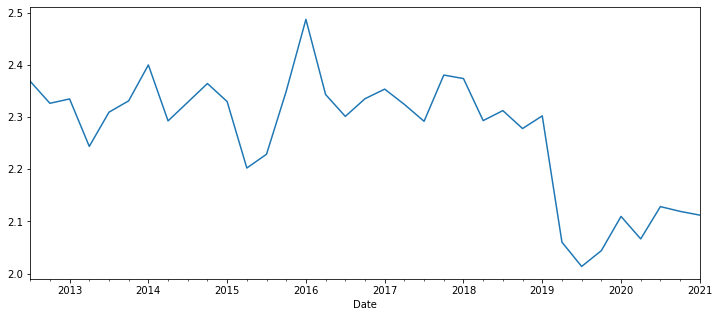

In [ ]:
df1_w[aa].resample('Q').mean().plot(figsize = (12,5))

In [ ]:
avg = df1_w['score'].mean()
std = df1_w['score'].std()

In [ ]:
avg + 2 * std

14.82741223307093

In [ ]:
print(len(df1_w[df1_w['score']<avg + 5*std])/len(df1_w)* 100, '%')

99.37744823726916 %


In [ ]:
df1_w

THC (ppm)  T ( C) 45m  ...      trend     score
Date                                        ...                     
2012-09-01 00:00:00        2.5        14.7  ...  12.666667  2.000000
2012-09-01 01:00:00        2.5        13.5  ...  12.666781  4.375000
2012-09-01 02:00:00        2.5        12.8  ...  12.666894  2.759439
2012-09-01 03:00:00        2.5        12.9  ...  12.667008  6.611111
2012-09-01 04:00:00        2.5        12.7  ...  12.667122  9.867521
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        1.9         8.7  ...  21.245332  4.735714
2021-03-31 20:00:00        1.9         7.4  ...  21.245446  3.724432
2021-03-31 21:00:00        1.9         6.4  ...  21.245560  2.883929
2021-03-31 22:00:00        1.9         6.2  ...  21.245674  5.622024
2021-03-31 23:00:00        1.9         5.2  ...  21.245788  4.041838

[71480 rows x 15 columns]

In [ ]:
df1_w.isna().sum()

THC (ppm)                      0
T ( C) 45m                     0
RH (%) 45m                     0
Std. Dev. of Wind Direction    0
Std. Dev. of Wind Speed        0
Wind Direction                 0
Wind Speed                     0
Incoming Solar Rad. (W/m2)     0
Precip. (mm)                   0
hol                            0
hour                           0
dayofweek_num                  0
Day-year                       0
trend                          0
score                          0
dtype: int64

In [ ]:
df1_w_c = df1_w[[aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
       ]].copy()
df1_w_c.dropna(inplace = True)
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
len(df1_w_c)/len(df1_w)

1.0

In [ ]:
def objectivee(trial):    
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.00001, random_state = 42)
        param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree"]), #",,""gblinear" , "dart"
        "lambda": trial.suggest_loguniform("lambda", 0.1, 10000.0),
        "alpha": trial.suggest_loguniform("alpha", 0.1, 10000.0),
        "score" : trial.suggest_float( 'score', avg + 2*std, avg + 5 * std )
        }

        # if param["booster"] == "gbtree" :
        #     param["n_estimators"] =  trial.suggest_int("n_estimators" , 1, 10000)


        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 10)
            param["eta"] = trial.suggest_loguniform("eta", 0.1, 100000.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 0.1, 100000.0)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-3, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-3, 1.0)


        df_xg =  df1_w[df1_w['score'] < param["score"]].copy()
        df_xg.drop(columns = ['score'], inplace = True)
        Y =  df_xg[aa]
        Y = np.array(Y).reshape(-1,1)
        X = np.array( df_xg[ df_xg.columns[1:]])
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.000000001000, random_state = 42)

        kf = KFold(n_splits=4)
        acc = 0 
        for train_index, test_index in kf.split(X):   
                X_tr, X_tes = X[train_index], X[test_index]
                y_tr, y_tes =  Y[train_index],  Y[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
    
                dtrain = xgb.DMatrix(X_tra, label=y_tra)
                dval = xgb.DMatrix(X_val, label=y_val)
                dtest = xgb.DMatrix(X_tes, label=y_tes)
                
                pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
                bst = xgb.train(param, dtrain, evals=[(dval, "validation")],  early_stopping_rounds=30,
                                callbacks=[pruning_callback],
                               # verbose_eval = False
                               )
                preds = bst.predict(dtest)
                accuracy = mean_squared_error(y_tes, preds)
                acc = acc + accuracy/5
                
        print(acc)
        return acc    

In [ ]:
study2 = optuna.create_study()
study2.optimize(objectivee, n_trials=5000)
print(study2.best_trial)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/XGB_MANNIX_OT_THC_HP_hourly.csv')

[I 2021-05-17 21:27:32,539] A new study created in memory with name: no-name-e85b646f-ee6c-4262-87d0-9287154f199d


[0]	validation-rmse:53.8345
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1647.65
[2]	validation-rmse:50430.3
[3]	validation-rmse:1.54354e+06
[4]	validation-rmse:4.72435e+07
[5]	validation-rmse:1.446e+09
[6]	validation-rmse:4.42582e+10
[7]	validation-rmse:1.35462e+12
[8]	validation-rmse:4.14615e+13
[9]	validation-rmse:1.26902e+15
[0]	validation-rmse:53.7107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1643.96
[2]	validation-rmse:50317.2
[3]	validation-rmse:1.54008e+06
[4]	validation-rmse:4.71377e+07
[5]	validation-rmse:1.44276e+09
[6]	validation-rmse:4.4159e+10
[7]	validation-rmse:1.35159e+12
[8]	validation-rmse:4.13686e+13
[9]	validation-rmse:1.26618e+15
[0]	validation-rmse:53.6899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1643.31
[2]	validation-rmse:50297.3
[3]	validation-rmse:1.53947e+06
[4]	validation-rmse:4.7119e+07
[5]	validation-rmse:1.44219e+09
[6]	validation-rmse

[I 2021-05-17 21:27:33,310] Trial 0 finished with value: 1.3926091848453868e+30 and parameters: {'booster': 'gbtree', 'lambda': 0.388958788910929, 'alpha': 0.14969889325139998, 'score': 21.834117356506308, 'max_depth': 3, 'eta': 31.610082025168655, 'gamma': 15.070402255084828, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 1.3926091848453868e+30.


1.3926091848453868e+30
[0]	validation-rmse:31.4909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:567.438
[2]	validation-rmse:10226.2
[3]	validation-rmse:184293
[4]	validation-rmse:3.32127e+06
[5]	validation-rmse:5.98548e+07
[6]	validation-rmse:1.07868e+09
[7]	validation-rmse:1.94397e+10
[8]	validation-rmse:3.50335e+11
[9]	validation-rmse:6.31362e+12
[0]	validation-rmse:31.4335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:566.473
[2]	validation-rmse:10208.7
[3]	validation-rmse:183979
[4]	validation-rmse:3.3156e+06
[5]	validation-rmse:5.97526e+07
[6]	validation-rmse:1.07684e+09
[7]	validation-rmse:1.94065e+10
[8]	validation-rmse:3.49737e+11
[9]	validation-rmse:6.30284e+12
[0]	validation-rmse:31.4288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:566.388
[2]	validation-rmse:10207.2
[3]	validation-rmse:183951
[4]	validation-rmse:3.3151e+06
[5]	validation-rmse:5.97437e+07
[6]	valid

[I 2021-05-17 21:27:33,825] Trial 1 finished with value: 3.2551468594600597e+25 and parameters: {'booster': 'gbtree', 'lambda': 273.82457878858446, 'alpha': 6.594796579296307, 'score': 20.32328720085356, 'max_depth': 3, 'eta': 19.153130099941325, 'gamma': 2.588612821424839, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 3.2551468594600597e+25.



[0]	validation-rmse:3.99129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:9.04799
[2]	validation-rmse:20.5728
[3]	validation-rmse:46.7949
[4]	validation-rmse:106.457
[5]	validation-rmse:242.185
[6]	validation-rmse:550.969
[7]	validation-rmse:1253.44
[8]	validation-rmse:2851.57
[9]	validation-rmse:6487.27
[0]	validation-rmse:3.98586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:9.03574
[2]	validation-rmse:20.5475
[3]	validation-rmse:46.7359
[4]	validation-rmse:106.325
[5]	validation-rmse:241.882
[6]	validation-rmse:550.282
[7]	validation-rmse:1251.88
[8]	validation-rmse:2848.01
[9]	validation-rmse:6479.17
[0]	validation-rmse:3.98142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:9.03523
[2]	validation-rmse:20.5336
[3]	validation-rmse:46.7157
[4]	validation-rmse:106.267
[5]	validation-rmse:241.762
[6]	validation-rmse:549.997
[7]	validation-rmse:1251.24
[8]	validation-rmse:2846.5

[I 2021-05-17 21:27:34,317] Trial 2 finished with value: 34373323.26159672 and parameters: {'booster': 'gbtree', 'lambda': 426.255469577073, 'alpha': 0.5151981517564899, 'score': 22.21068154959992, 'max_depth': 10, 'eta': 3.31011135272233, 'gamma': 0.1178430251177289, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 34373323.26159672.


34373323.26159672
[0]	validation-rmse:3.03878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.23371
[2]	validation-rmse:9.02758
[3]	validation-rmse:15.6063
[4]	validation-rmse:26.9733
[5]	validation-rmse:46.6428
[6]	validation-rmse:80.6432
[7]	validation-rmse:139.448
[8]	validation-rmse:241.118
[9]	validation-rmse:416.932
[0]	validation-rmse:3.03491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22494
[2]	validation-rmse:9.02078
[3]	validation-rmse:15.5898
[4]	validation-rmse:26.9516
[5]	validation-rmse:46.5997
[6]	validation-rmse:80.575
[7]	validation-rmse:139.324
[8]	validation-rmse:240.91
[9]	validation-rmse:416.567
[0]	validation-rmse:3.02963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22548
[2]	validation-rmse:9.01117
[3]	validation-rmse:15.5833
[4]	validation-rmse:26.9299
[5]	validation-rmse:46.5725
[6]	validation-rmse:80.5176
[7]	validation-rmse:139.235
[8]	validat

[I 2021-05-17 21:27:34,806] Trial 3 finished with value: 142049.94035379053 and parameters: {'booster': 'gbtree', 'lambda': 274.89298255777317, 'alpha': 16.832362040194845, 'score': 18.833536414700994, 'max_depth': 3, 'eta': 2.7481458061254878, 'gamma': 0.8560242090372946, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 142049.94035379053.


142049.94035379053
[0]	validation-rmse:392.524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:88149.3
[2]	validation-rmse:1.97959e+07
[3]	validation-rmse:4.44562e+09
[4]	validation-rmse:9.98364e+11
[5]	validation-rmse:2.24205e+14
[6]	validation-rmse:5.03503e+16
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:391.885
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:88006.2
[2]	validation-rmse:1.97638e+07
[3]	validation-rmse:4.4384e+09
[4]	validation-rmse:9.96744e+11
[5]	validation-rmse:2.23841e+14
[6]	validation-rmse:5.02686e+16
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:391.561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:87934.6
[2]	validation-rmse:1.97477e+07
[3]	validation-rmse:4.43479e+09
[4]	validation-rmse:9.95933e+11
[5]	validation-rmse:2.23659e+14
[6]	validation-rmse:5.02277e+16
[

[I 2021-05-17 21:27:35,349] Trial 4 finished with value: 2.6548234854569597e+47 and parameters: {'booster': 'gbtree', 'lambda': 1.1787523157304578, 'alpha': 1.747204834103188, 'score': 25.649819057916126, 'max_depth': 2, 'eta': 225.57925951397414, 'gamma': 12593.802198214635, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 142049.94035379053.


2.6548234854569597e+47
[0]	validation-rmse:15.146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:133.082
[2]	validation-rmse:1170.83
[3]	validation-rmse:10303.1
[4]	validation-rmse:90665.6
[5]	validation-rmse:797848
[6]	validation-rmse:7.02099e+06
[7]	validation-rmse:6.1784e+07
[8]	validation-rmse:5.43693e+08
[9]	validation-rmse:4.78445e+09
[0]	validation-rmse:15.1453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:133.025
[2]	validation-rmse:1170.39
[3]	validation-rmse:10299.1
[4]	validation-rmse:90630.6
[5]	validation-rmse:797540
[6]	validation-rmse:7.01828e+06
[7]	validation-rmse:6.17601e+07
[8]	validation-rmse:5.43483e+08
[9]	validation-rmse:4.7826e+09
[0]	validation-rmse:15.1409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:132.996
[2]	validation-rmse:1170.12
[3]	validation-rmse:10296.7
[4]	validation-rmse:90610.1
[5]	validation-rmse:797360
[6]	validation-rmse:7.01669e+06
[7

[I 2021-05-17 21:27:35,840] Trial 5 finished with value: 1.8740432758628176e+19 and parameters: {'booster': 'gbtree', 'lambda': 180.5469355292735, 'alpha': 862.8278844562171, 'score': 18.167815386106806, 'max_depth': 2, 'eta': 9.844786563632816, 'gamma': 47.122748139053456, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 142049.94035379053.


[0]	validation-rmse:0.934031
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.561975
[2]	validation-rmse:0.423239
[3]	validation-rmse:0.383745
[4]	validation-rmse:0.372961
[5]	validation-rmse:0.370698
[6]	validation-rmse:0.370013
[7]	validation-rmse:0.369934
[8]	validation-rmse:0.369892
[9]	validation-rmse:0.369893
[0]	validation-rmse:0.928268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.556243
[2]	validation-rmse:0.414475
[3]	validation-rmse:0.37505
[4]	validation-rmse:0.363606
[5]	validation-rmse:0.361502
[6]	validation-rmse:0.360703
[7]	validation-rmse:0.360666
[8]	validation-rmse:0.360606
[9]	validation-rmse:0.360611
[0]	validation-rmse:0.926325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.557637
[2]	validation-rmse:0.413567
[3]	validation-rmse:0.375625
[4]	validation-rmse:0.363425
[5]	validation-rmse:0.361699
[6]	validation-rmse:0.360723
[7]	validation-rmse:0.360765


[I 2021-05-17 21:27:37,556] Trial 6 finished with value: 0.10970658100709017 and parameters: {'booster': 'gbtree', 'lambda': 31.835039674218038, 'alpha': 21.42799260600025, 'score': 22.769415615016058, 'max_depth': 9, 'eta': 1.4933942949027998, 'gamma': 58630.0731145908, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.10970658100709017
[0]	validation-rmse:10.5897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:64.0171
[2]	validation-rmse:387.446
[3]	validation-rmse:2344.71
[4]	validation-rmse:14189.8
[5]	validation-rmse:85873.7
[6]	validation-rmse:519691
[7]	validation-rmse:3.14506e+06
[8]	validation-rmse:1.90333e+07
[9]	validation-rmse:1.15186e+08
[0]	validation-rmse:10.5662
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:63.9047
[2]	validation-rmse:386.739
[3]	validation-rmse:2340.46
[4]	validation-rmse:14164
[5]	validation-rmse:85717.8
[6]	validation-rmse:518747
[7]	validation-rmse:3.13935e+06
[8]	validation-rmse:1.89987e+07
[9]	validation-rmse:1.14977e+08
[0]	validation-rmse:10.5514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:63.8545
[2]	validation-rmse:386.393
[3]	validation-rmse:2338.41
[4]	validation-rmse:14151.5
[5]	validation-rmse:85642.4
[6]	validation-rmse:518291
[7]	validation-r

[I 2021-05-17 21:27:38,088] Trial 7 finished with value: 1.082514347397221e+16 and parameters: {'booster': 'gbtree', 'lambda': 165.6851921002222, 'alpha': 0.5877599700485009, 'score': 24.807344003503395, 'max_depth': 8, 'eta': 7.081125333460384, 'gamma': 879.0909833422916, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


1.082514347397221e+16


[I 2021-05-17 21:27:38,146] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:38,213] Trial 9 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.48357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.23598
[2]	validation-rmse:1.03662
[3]	validation-rmse:0.877288
[4]	validation-rmse:0.751214
[5]	validation-rmse:0.652714
[6]	validation-rmse:0.576933
[7]	validation-rmse:0.519636
[8]	validation-rmse:0.477106
[9]	validation-rmse:0.446098
[0]	validation-rmse:1.47981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.23203
[2]	validation-rmse:1.03233
[3]	validation-rmse:0.872547
[4]	validation-rmse:0.745911
[5]	validation-rmse:0.646773
[6]	validation-rmse:0.570315
[7]	validation-rmse:0.51235
[8]	validation-rmse:0.469199
[9]	validation-rmse:0.437648
[0]	validation-rmse:1.47586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.2278
[2]	validation-rmse:1.02782
[3]	validation-rmse:0.867743
[4]	validation-rmse:0.740816
[5]	validation-rmse:0.641406
[6]	validation-rmse:0.56471
[7]	validation-rmse:0.506557
[8]	validat

[I 2021-05-17 21:27:39,206] Trial 10 finished with value: 0.15733419861024597 and parameters: {'booster': 'gbtree', 'lambda': 15.65464681502642, 'alpha': 109.22942947160502, 'score': 28.617165027564234, 'max_depth': 10, 'eta': 0.18027362308220113, 'gamma': 51421.78215786932, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.15733419861024597
[0]	validation-rmse:1.49568
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.25263
[2]	validation-rmse:1.05599
[3]	validation-rmse:0.898019
[4]	validation-rmse:0.772304
[5]	validation-rmse:0.673438
[6]	validation-rmse:0.596786
[7]	validation-rmse:0.538302
[8]	validation-rmse:0.49443
[9]	validation-rmse:0.462058
[0]	validation-rmse:1.48877
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.24525
[2]	validation-rmse:1.048
[3]	validation-rmse:0.889295
[4]	validation-rmse:0.76275
[5]	validation-rmse:0.662995
[6]	validation-rmse:0.585444
[7]	validation-rmse:0.526105
[8]	validation-rmse:0.48147
[9]	validation-rmse:0.448457
[0]	validation-rmse:1.47679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.23223
[2]	validation-rmse:1.03391
[3]	validation-rmse:0.874132
[4]	validation-rmse:0.746522
[5]	validation-rmse:0.645753
[6]	validation-rmse:0.56729
[7]	validation-rmse:0.5

[I 2021-05-17 21:27:40,109] Trial 11 finished with value: 0.16172123897794147 and parameters: {'booster': 'gbtree', 'lambda': 13.63778678203837, 'alpha': 122.13473572183624, 'score': 28.237417502431445, 'max_depth': 10, 'eta': 0.17646762694502482, 'gamma': 73591.9371733331, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.16172123897794147


[I 2021-05-17 21:27:40,176] Trial 12 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.60462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.44179
[2]	validation-rmse:1.29848
[3]	validation-rmse:1.17257
[4]	validation-rmse:1.06217
[5]	validation-rmse:0.965587
[6]	validation-rmse:0.881325
[7]	validation-rmse:0.808035
[8]	validation-rmse:0.744502
[9]	validation-rmse:0.689628
[0]	validation-rmse:1.6009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.43802
[2]	validation-rmse:1.29462
[3]	validation-rmse:1.16856
[4]	validation-rmse:1.05797
[5]	validation-rmse:0.961167
[6]	validation-rmse:0.876644
[7]	validation-rmse:0.803062
[8]	validation-rmse:0.739212
[9]	validation-rmse:0.684004
[0]	validation-rmse:1.59707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.43403
[2]	validation-rmse:1.29046
[3]	validation-rmse:1.16425
[4]	validation-rmse:1.0535
[5]	validation-rmse:0.956525
[6]	validation-rmse:0.871839
[7]	validation-rmse:0.798096
[8]	validation-r

[I 2021-05-17 21:27:40,757] Trial 13 finished with value: 0.37960054864095194 and parameters: {'booster': 'gbtree', 'lambda': 3385.3733628690775, 'alpha': 2931.181728118193, 'score': 28.60766193109261, 'max_depth': 10, 'eta': 0.12282936722437089, 'gamma': 9419.484551608864, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.37960054864095194
[0]	validation-rmse:1.16338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790607
[2]	validation-rmse:0.58074
[3]	validation-rmse:0.47189
[4]	validation-rmse:0.420159
[5]	validation-rmse:0.397017
[6]	validation-rmse:0.386881
[7]	validation-rmse:0.382389
[8]	validation-rmse:0.38033
[9]	validation-rmse:0.379341
[0]	validation-rmse:1.15318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.777725
[2]	validation-rmse:0.564711
[3]	validation-rmse:0.453163
[4]	validation-rmse:0.399766
[5]	validation-rmse:0.375848
[6]	validation-rmse:0.365422
[7]	validation-rmse:0.360848
[8]	validation-rmse:0.35878
[9]	validation-rmse:0.357802
[0]	validation-rmse:1.1478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.770649
[2]	validation-rmse:0.555819
[3]	validation-rmse:0.44278
[4]	validation-rmse:0.388509
[5]	validation-rmse:0.364227
[6]	validation-rmse:0.353704
[7]	validation-rm

[I 2021-05-17 21:27:41,709] Trial 14 finished with value: 0.11065724376156946 and parameters: {'booster': 'gbtree', 'lambda': 4.400616420956484, 'alpha': 612.301364118561, 'score': 26.798347271500564, 'max_depth': 6, 'eta': 0.3755715764203792, 'gamma': 9803.837295624555, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.11065724376156946
[0]	validation-rmse:0.515799
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.374545
[2]	validation-rmse:0.365317
[3]	validation-rmse:0.36445
[4]	validation-rmse:0.364316
[5]	validation-rmse:0.364291
[6]	validation-rmse:0.364286
[7]	validation-rmse:0.364285
[8]	validation-rmse:0.364285
[9]	validation-rmse:0.364285
[0]	validation-rmse:0.505782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.361715
[2]	validation-rmse:0.352315
[3]	validation-rmse:0.351447
[4]	validation-rmse:0.351315
[5]	validation-rmse:0.35129
[6]	validation-rmse:0.351285
[7]	validation-rmse:0.351284
[8]	validation-rmse:0.351284
[9]	validation-rmse:0.351284
[0]	validation-rmse:0.504454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.360192
[2]	validation-rmse:0.350823
[3]	validation-rmse:0.349965
[4]	validation-rmse:0.349835
[5]	validation-rmse:0.349811
[6]	validation-rmse:0.349806
[7]	valida

[I 2021-05-17 21:27:42,782] Trial 15 finished with value: 0.1103064133487153 and parameters: {'booster': 'gbtree', 'lambda': 3.754866301745677, 'alpha': 778.1649957899685, 'score': 26.607193287438843, 'max_depth': 6, 'eta': 0.8001053120578251, 'gamma': 1296.6073008199585, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.1103064133487153
[0]	validation-rmse:0.357802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.350565
[2]	validation-rmse:0.350608
[3]	validation-rmse:0.350611
[4]	validation-rmse:0.350611
[5]	validation-rmse:0.350611
[6]	validation-rmse:0.350611
[7]	validation-rmse:0.350611
[8]	validation-rmse:0.350611
[9]	validation-rmse:0.350611
[0]	validation-rmse:0.350415
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.342123
[2]	validation-rmse:0.342125
[3]	validation-rmse:0.342126
[4]	validation-rmse:0.342126
[5]	validation-rmse:0.342126
[6]	validation-rmse:0.342126
[7]	validation-rmse:0.342126
[8]	validation-rmse:0.342126
[9]	validation-rmse:0.342126
[0]	validation-rmse:0.365306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.356803
[2]	validation-rmse:0.35678
[3]	validation-rmse:0.356779
[4]	validation-rmse:0.356779
[5]	validation-rmse:0.356779
[6]	validation-rmse:0.356779
[7]	valida

[I 2021-05-17 21:27:44,018] Trial 16 finished with value: 0.1097972830790379 and parameters: {'booster': 'gbtree', 'lambda': 0.11262894843859596, 'alpha': 17.181514880407477, 'score': 24.247378948862256, 'max_depth': 6, 'eta': 0.9553862367261556, 'gamma': 675.9435439284679, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.1097972830790379


[I 2021-05-17 21:27:44,104] Trial 17 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375521
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.356502
[2]	validation-rmse:0.356526
[3]	validation-rmse:0.356534
[4]	validation-rmse:0.356535
[5]	validation-rmse:0.356535
[6]	validation-rmse:0.356535
[7]	validation-rmse:0.356535
[8]	validation-rmse:0.356535
[9]	validation-rmse:0.356535
[0]	validation-rmse:0.370383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.349712
[2]	validation-rmse:0.349633
[3]	validation-rmse:0.349635
[4]	validation-rmse:0.349635
[5]	validation-rmse:0.349635
[6]	validation-rmse:0.349635
[7]	validation-rmse:0.349635
[8]	validation-rmse:0.349635
[9]	validation-rmse:0.349635
[0]	validation-rmse:0.363868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.342626
[2]	validation-rmse:0.342534
[3]	validation-rmse:0.342534
[4]	validation-rmse:0.342534
[5]	validation-rmse:0.342534
[6]	validation-rmse:0.342534
[7]	validation-rmse:0.342534

[I 2021-05-17 21:27:45,543] Trial 18 finished with value: 0.10976653106820156 and parameters: {'booster': 'gbtree', 'lambda': 2476.7230386049405, 'alpha': 4.0054200274559655, 'score': 24.436390512119605, 'max_depth': 7, 'eta': 0.9869817867969177, 'gamma': 4035.8969543245994, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.10970658100709017.


0.10976653106820156


[I 2021-05-17 21:27:45,607] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:45,670] Trial 20 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.731715
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403036
[2]	validation-rmse:0.339277
[3]	validation-rmse:0.328817
[4]	validation-rmse:0.328211
[5]	validation-rmse:0.32791
[6]	validation-rmse:0.327933
[7]	validation-rmse:0.327933
[8]	validation-rmse:0.327933
[9]	validation-rmse:0.327933
[0]	validation-rmse:0.722629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.40846
[2]	validation-rmse:0.33625
[3]	validation-rmse:0.327524
[4]	validation-rmse:0.326257
[5]	validation-rmse:0.326156
[6]	validation-rmse:0.326141
[7]	validation-rmse:0.326141
[8]	validation-rmse:0.326141
[9]	validation-rmse:0.326141
[0]	validation-rmse:0.723465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409397
[2]	validation-rmse:0.33967
[3]	validation-rmse:0.330947
[4]	validation-rmse:0.329725
[5]	validation-rmse:0.329615
[6]	validation-rmse:0.329603
[7]	validation-rmse:0.329603
[8]

[I 2021-05-17 21:27:47,060] Trial 21 finished with value: 0.09574130133030602 and parameters: {'booster': 'gbtree', 'lambda': 0.11152122455034577, 'alpha': 32.03155046197336, 'score': 24.309416822458125, 'max_depth': 7, 'eta': 1.3667103792240645, 'gamma': 156.94090072172344, 'grow_policy': 'depthwise'}. Best is trial 21 with value: 0.09574130133030602.


0.09574130133030602
[0]	validation-rmse:1.18106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792326
[2]	validation-rmse:0.566313
[3]	validation-rmse:0.429383
[4]	validation-rmse:0.370814
[5]	validation-rmse:0.332145
[6]	validation-rmse:0.322113
[7]	validation-rmse:0.316202
[8]	validation-rmse:0.31492
[9]	validation-rmse:0.313788
[0]	validation-rmse:1.17365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788539
[2]	validation-rmse:0.559223
[3]	validation-rmse:0.42375
[4]	validation-rmse:0.363019
[5]	validation-rmse:0.328962
[6]	validation-rmse:0.319311
[7]	validation-rmse:0.31313
[8]	validation-rmse:0.312005
[9]	validation-rmse:0.310777
[0]	validation-rmse:1.16933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795851
[2]	validation-rmse:0.566257
[3]	validation-rmse:0.441155
[4]	validation-rmse:0.369899
[5]	validation-rmse:0.339159
[6]	validation-rmse:0.324143
[7]	validation

[I 2021-05-17 21:27:48,400] Trial 22 finished with value: 0.09999984982896214 and parameters: {'booster': 'gbtree', 'lambda': 67.55934717141162, 'alpha': 48.90127086635589, 'score': 25.643243791669704, 'max_depth': 7, 'eta': 1.6498117819851341, 'gamma': 73.59638022897401, 'grow_policy': 'depthwise'}. Best is trial 21 with value: 0.09574130133030602.


0.09999984982896214


[I 2021-05-17 21:27:48,469] Trial 23 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.09591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.705848
[2]	validation-rmse:0.49367
[3]	validation-rmse:0.387836
[4]	validation-rmse:0.339864
[5]	validation-rmse:0.316862
[6]	validation-rmse:0.308142
[7]	validation-rmse:0.303828
[8]	validation-rmse:0.301991
[9]	validation-rmse:0.299186
[0]	validation-rmse:1.08841
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.695503
[2]	validation-rmse:0.48238
[3]	validation-rmse:0.374682
[4]	validation-rmse:0.32335
[5]	validation-rmse:0.300502
[6]	validation-rmse:0.288635
[7]	validation-rmse:0.285009
[8]	validation-rmse:0.283964
[9]	validation-rmse:0.28361
[0]	validation-rmse:1.08858
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.697747
[2]	validation-rmse:0.486316
[3]	validation-rmse:0.381725
[4]	validation-rmse:0.331746
[5]	validation-rmse:0.312481
[6]	validation-rmse:0.304975
[7]	validation-rmse:0.30027
[8]	val

[I 2021-05-17 21:27:49,753] Trial 24 finished with value: 0.0845079273225268 and parameters: {'booster': 'gbtree', 'lambda': 81.01633793483407, 'alpha': 45.855086793084546, 'score': 27.058715751249824, 'max_depth': 7, 'eta': 0.4073474062721032, 'gamma': 27.049301971169108, 'grow_policy': 'depthwise'}. Best is trial 24 with value: 0.0845079273225268.


0.0845079273225268
[0]	validation-rmse:1.00923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.622122
[2]	validation-rmse:0.439751
[3]	validation-rmse:0.365311
[4]	validation-rmse:0.332254
[5]	validation-rmse:0.315084
[6]	validation-rmse:0.308106
[7]	validation-rmse:0.304912
[8]	validation-rmse:0.298316
[9]	validation-rmse:0.298089
[0]	validation-rmse:1.00147
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.611775
[2]	validation-rmse:0.426786
[3]	validation-rmse:0.349821
[4]	validation-rmse:0.316488
[5]	validation-rmse:0.30375
[6]	validation-rmse:0.29804
[7]	validation-rmse:0.29009
[8]	validation-rmse:0.289629
[9]	validation-rmse:0.28947
[0]	validation-rmse:1.00303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.614809
[2]	validation-rmse:0.431603
[3]	validation-rmse:0.356076
[4]	validation-rmse:0.328336
[5]	validation-rmse:0.312949
[6]	validation-rmse:0.304542
[7]	validation-r

[I 2021-05-17 21:27:50,950] Trial 25 finished with value: 0.09070814674008223 and parameters: {'booster': 'gbtree', 'lambda': 71.61967735000003, 'alpha': 275.576268341681, 'score': 27.21147851791397, 'max_depth': 7, 'eta': 0.4602638782751205, 'gamma': 34.06138059710217, 'grow_policy': 'depthwise'}. Best is trial 24 with value: 0.0845079273225268.


0.09070814674008223


[I 2021-05-17 21:27:51,020] Trial 26 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.17904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811789
[2]	validation-rmse:0.596618
[3]	validation-rmse:0.477845
[4]	validation-rmse:0.416164
[5]	validation-rmse:0.379048
[6]	validation-rmse:0.360374
[7]	validation-rmse:0.348942
[8]	validation-rmse:0.342543
[9]	validation-rmse:0.338636
[0]	validation-rmse:1.17184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803084
[2]	validation-rmse:0.586001
[3]	validation-rmse:0.465407
[4]	validation-rmse:0.402418
[5]	validation-rmse:0.364611
[6]	validation-rmse:0.346337
[7]	validation-rmse:0.33459
[8]	validation-rmse:0.327957
[9]	validation-rmse:0.323836
[0]	validation-rmse:1.17217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804027
[2]	validation-rmse:0.587722
[3]	validation-rmse:0.467931
[4]	validation-rmse:0.405605
[5]	validation-rmse:0.36835
[6]	validation-rmse:0.349317
[7]	validation-rmse:0.33777
[8]	v

[I 2021-05-17 21:27:52,010] Trial 27 finished with value: 0.10502441413084229 and parameters: {'booster': 'gbtree', 'lambda': 70.97200032262005, 'alpha': 2022.298119740706, 'score': 27.266864093392805, 'max_depth': 7, 'eta': 0.36661521067672337, 'gamma': 3.3105249190357915, 'grow_policy': 'lossguide'}. Best is trial 24 with value: 0.0845079273225268.


0.10502441413084229
[0]	validation-rmse:1.18791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81834
[2]	validation-rmse:0.596923
[3]	validation-rmse:0.476301
[4]	validation-rmse:0.411883
[5]	validation-rmse:0.378862
[6]	validation-rmse:0.360066
[7]	validation-rmse:0.348571
[8]	validation-rmse:0.342399
[9]	validation-rmse:0.335749
[0]	validation-rmse:1.17761
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80522
[2]	validation-rmse:0.580457
[3]	validation-rmse:0.456527
[4]	validation-rmse:0.389031
[5]	validation-rmse:0.354626
[6]	validation-rmse:0.334516
[7]	validation-rmse:0.324651
[8]	validation-rmse:0.319558
[9]	validation-rmse:0.311805
[0]	validation-rmse:1.17189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797716
[2]	validation-rmse:0.570931
[3]	validation-rmse:0.445106
[4]	validation-rmse:0.376079
[5]	validation-rmse:0.340949
[6]	validation-rmse:0.320945
[7]	validatio

[I 2021-05-17 21:27:52,873] Trial 28 finished with value: 0.09513736426550808 and parameters: {'booster': 'gbtree', 'lambda': 104.25185124555244, 'alpha': 278.7347454494967, 'score': 27.851029065135016, 'max_depth': 4, 'eta': 0.3591254347974365, 'gamma': 32.38043489246548, 'grow_policy': 'depthwise'}. Best is trial 24 with value: 0.0845079273225268.


0.09513736426550808
[0]	validation-rmse:1.12789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.748706
[2]	validation-rmse:0.544052
[3]	validation-rmse:0.436795
[4]	validation-rmse:0.386736
[5]	validation-rmse:0.363048
[6]	validation-rmse:0.347459
[7]	validation-rmse:0.339614
[8]	validation-rmse:0.3333
[9]	validation-rmse:0.330981
[0]	validation-rmse:1.1176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.734023
[2]	validation-rmse:0.524025
[3]	validation-rmse:0.411739
[4]	validation-rmse:0.357867
[5]	validation-rmse:0.332347
[6]	validation-rmse:0.316575
[7]	validation-rmse:0.307305
[8]	validation-rmse:0.300929
[9]	validation-rmse:0.295363
[0]	validation-rmse:1.11904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.736948
[2]	validation-rmse:0.528791
[3]	validation-rmse:0.418401
[4]	validation-rmse:0.36574
[5]	validation-rmse:0.341053
[6]	validation-rmse:0.32672
[7]	validation-r

[I 2021-05-17 21:27:53,747] Trial 29 finished with value: 0.09378540165423356 and parameters: {'booster': 'gbtree', 'lambda': 656.4654065271679, 'alpha': 287.5421517179649, 'score': 27.774065379911274, 'max_depth': 4, 'eta': 0.39851005741699747, 'gamma': 23.452274945194535, 'grow_policy': 'lossguide'}. Best is trial 24 with value: 0.0845079273225268.


0.09378540165423356


[I 2021-05-17 21:27:53,812] Trial 30 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:53,874] Trial 31 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.12768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.748444
[2]	validation-rmse:0.54491
[3]	validation-rmse:0.43884
[4]	validation-rmse:0.389593
[5]	validation-rmse:0.366461
[6]	validation-rmse:0.351522
[7]	validation-rmse:0.345164
[8]	validation-rmse:0.337179
[9]	validation-rmse:0.335104
[0]	validation-rmse:1.12357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.74313
[2]	validation-rmse:0.537943
[3]	validation-rmse:0.430464
[4]	validation-rmse:0.37912
[5]	validation-rmse:0.355496
[6]	validation-rmse:0.340529
[7]	validation-rmse:0.332095
[8]	validation-rmse:0.327813
[9]	validation-rmse:0.322445
[0]	validation-rmse:1.1192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.738027
[2]	validation-rmse:0.532232
[3]	validation-rmse:0.424529
[4]	validation-rmse:0.373501
[5]	validation-rmse:0.350261
[6]	validation-rmse:0.336211
[7]	validation-rmse:0.329764
[8]	val

[I 2021-05-17 21:27:54,822] Trial 32 finished with value: 0.09423650557293771 and parameters: {'booster': 'gbtree', 'lambda': 531.3193981902374, 'alpha': 330.6295413358194, 'score': 28.651941018652096, 'max_depth': 4, 'eta': 0.3999079848207242, 'gamma': 29.308886928657717, 'grow_policy': 'lossguide'}. Best is trial 24 with value: 0.0845079273225268.


0.09423650557293771
[0]	validation-rmse:0.826832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.470139
[2]	validation-rmse:0.362642
[3]	validation-rmse:0.331009
[4]	validation-rmse:0.323433
[5]	validation-rmse:0.319676
[6]	validation-rmse:0.317081
[7]	validation-rmse:0.314975
[8]	validation-rmse:0.312814
[9]	validation-rmse:0.31109
[0]	validation-rmse:0.821429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.463997
[2]	validation-rmse:0.354436
[3]	validation-rmse:0.323607
[4]	validation-rmse:0.315953
[5]	validation-rmse:0.312475
[6]	validation-rmse:0.310251
[7]	validation-rmse:0.307843
[8]	validation-rmse:0.305901
[9]	validation-rmse:0.304163
[0]	validation-rmse:0.8135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.454293
[2]	validation-rmse:0.344844
[3]	validation-rmse:0.315546
[4]	validation-rmse:0.308219
[5]	validation-rmse:0.305411
[6]	validation-rmse:0.303112
[7]	validat

[I 2021-05-17 21:27:55,446] Trial 33 finished with value: 0.0915733177157378 and parameters: {'booster': 'gbtree', 'lambda': 434.4756745010749, 'alpha': 46.561222156043996, 'score': 27.36232490540787, 'max_depth': 1, 'eta': 0.5806490471095659, 'gamma': 29.677436796145766, 'grow_policy': 'lossguide'}. Best is trial 24 with value: 0.0845079273225268.


0.0915733177157378


[I 2021-05-17 21:27:55,513] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:55,582] Trial 35 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:55,659] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:55,732] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:55,804] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:27:55,872] Trial 39 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.574913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.327912
[2]	validation-rmse:0.287149
[3]	validation-rmse:0.280076
[4]	validation-rmse:0.274456
[5]	validation-rmse:0.273595
[6]	validation-rmse:0.270073
[7]	validation-rmse:0.268529
[8]	validation-rmse:0.267002
[9]	validation-rmse:0.266426
[0]	validation-rmse:0.580586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.335387
[2]	validation-rmse:0.293811
[3]	validation-rmse:0.284881
[4]	validation-rmse:0.280163
[5]	validation-rmse:0.276894
[6]	validation-rmse:0.27467
[7]	validation-rmse:0.272919
[8]	validation-rmse:0.271571
[9]	validation-rmse:0.270868
[0]	validation-rmse:0.579783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.33415
[2]	validation-rmse:0.292265
[3]	validation-rmse:0.281583
[4]	validation-rmse:0.274688
[5]	validation-rmse:0.272891
[6]	validation-rmse:0.270642
[7]	validation-rmse:0.268134
[

[I 2021-05-17 21:27:56,970] Trial 40 finished with value: 0.07918522052902757 and parameters: {'booster': 'gbtree', 'lambda': 175.00017322227376, 'alpha': 0.12242600174376707, 'score': 24.889553623428917, 'max_depth': 5, 'eta': 0.7306665104230432, 'gamma': 0.31536467757084263, 'grow_policy': 'lossguide'}. Best is trial 40 with value: 0.07918522052902757.


0.07918522052902757
[0]	validation-rmse:0.751987
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415896
[2]	validation-rmse:0.327411
[3]	validation-rmse:0.306594
[4]	validation-rmse:0.298335
[5]	validation-rmse:0.297954
[6]	validation-rmse:0.297898
[7]	validation-rmse:0.297889
[8]	validation-rmse:0.297888
[9]	validation-rmse:0.297887
[0]	validation-rmse:0.754325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419855
[2]	validation-rmse:0.329776
[3]	validation-rmse:0.308471
[4]	validation-rmse:0.30429
[5]	validation-rmse:0.303868
[6]	validation-rmse:0.303784
[7]	validation-rmse:0.303763
[8]	validation-rmse:0.303756
[9]	validation-rmse:0.303754
[0]	validation-rmse:0.755723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421285
[2]	validation-rmse:0.333015
[3]	validation-rmse:0.308409
[4]	validation-rmse:0.305885
[5]	validation-rmse:0.305452
[6]	validation-rmse:0.305365
[7]	valid

[I 2021-05-17 21:27:58,055] Trial 41 finished with value: 0.08717527586735638 and parameters: {'booster': 'gbtree', 'lambda': 143.4107836052599, 'alpha': 0.2872011888870493, 'score': 25.129947270115814, 'max_depth': 5, 'eta': 0.6190203701110824, 'gamma': 60.05220010877036, 'grow_policy': 'lossguide'}. Best is trial 40 with value: 0.07918522052902757.


0.08717527586735638
[0]	validation-rmse:0.390777
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292756
[2]	validation-rmse:0.281278
[3]	validation-rmse:0.275399
[4]	validation-rmse:0.272628
[5]	validation-rmse:0.269747
[6]	validation-rmse:0.268147
[7]	validation-rmse:0.267167
[8]	validation-rmse:0.265596
[9]	validation-rmse:0.264371
[0]	validation-rmse:0.38903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288829
[2]	validation-rmse:0.276574
[3]	validation-rmse:0.272346
[4]	validation-rmse:0.269868
[5]	validation-rmse:0.267564
[6]	validation-rmse:0.26486
[7]	validation-rmse:0.263993
[8]	validation-rmse:0.261809
[9]	validation-rmse:0.260324
[0]	validation-rmse:0.392066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292868
[2]	validation-rmse:0.28149
[3]	validation-rmse:0.274264
[4]	validation-rmse:0.270161
[5]	validation-rmse:0.267636
[6]	validation-rmse:0.266952
[7]	validat

[I 2021-05-17 21:27:59,161] Trial 42 finished with value: 0.08183982669528246 and parameters: {'booster': 'gbtree', 'lambda': 164.1375830148724, 'alpha': 0.11999460535426026, 'score': 24.963810272474817, 'max_depth': 5, 'eta': 0.8826264702985771, 'gamma': 0.15438091588126637, 'grow_policy': 'lossguide'}. Best is trial 40 with value: 0.07918522052902757.


0.08183982669528246
[0]	validation-rmse:0.554531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.332749
[2]	validation-rmse:0.298269
[3]	validation-rmse:0.290073
[4]	validation-rmse:0.287495
[5]	validation-rmse:0.284535
[6]	validation-rmse:0.282396
[7]	validation-rmse:0.28058
[8]	validation-rmse:0.278594
[9]	validation-rmse:0.276641
[0]	validation-rmse:0.555601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.335902
[2]	validation-rmse:0.303649
[3]	validation-rmse:0.29594
[4]	validation-rmse:0.292497
[5]	validation-rmse:0.290603
[6]	validation-rmse:0.288513
[7]	validation-rmse:0.286539
[8]	validation-rmse:0.285592
[9]	validation-rmse:0.283481
[0]	validation-rmse:0.551177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.331397
[2]	validation-rmse:0.297546
[3]	validation-rmse:0.289722
[4]	validation-rmse:0.285246
[5]	validation-rmse:0.28336
[6]	validation-rmse:0.281154
[7]	validat

[I 2021-05-17 21:28:00,352] Trial 43 finished with value: 0.07921432031725506 and parameters: {'booster': 'gbtree', 'lambda': 137.99481405739294, 'alpha': 0.12638091676177365, 'score': 21.693729812894297, 'max_depth': 5, 'eta': 0.7569789561992307, 'gamma': 0.1145334957988498, 'grow_policy': 'lossguide'}. Best is trial 40 with value: 0.07918522052902757.


0.07921432031725506


[I 2021-05-17 21:28:00,434] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:00,506] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:00,569] Trial 46 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.629299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.361545
[2]	validation-rmse:0.32222
[3]	validation-rmse:0.314734
[4]	validation-rmse:0.310673
[5]	validation-rmse:0.309391
[6]	validation-rmse:0.308881
[7]	validation-rmse:0.307468
[8]	validation-rmse:0.306443
[9]	validation-rmse:0.30549
[0]	validation-rmse:0.616633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.348516
[2]	validation-rmse:0.307572
[3]	validation-rmse:0.301251
[4]	validation-rmse:0.297692
[5]	validation-rmse:0.296143
[6]	validation-rmse:0.295259
[7]	validation-rmse:0.293995
[8]	validation-rmse:0.292915
[9]	validation-rmse:0.291048
[0]	validation-rmse:0.616339
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.349611
[2]	validation-rmse:0.308715
[3]	validation-rmse:0.300965
[4]	validation-rmse:0.297753
[5]	validation-rmse:0.294732
[6]	validation-rmse:0.293558
[7]	validation-rmse:0.291835
[

[I 2021-05-17 21:28:01,472] Trial 47 finished with value: 0.0812178748202147 and parameters: {'booster': 'gbtree', 'lambda': 22.567779085901915, 'alpha': 0.10629414514727456, 'score': 20.65236817490905, 'max_depth': 3, 'eta': 0.7009023246069798, 'gamma': 0.35338434175957245, 'grow_policy': 'lossguide'}. Best is trial 40 with value: 0.07918522052902757.


0.0812178748202147


[I 2021-05-17 21:28:01,549] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:01,628] Trial 49 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.34909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318229
[2]	validation-rmse:0.313706
[3]	validation-rmse:0.309556
[4]	validation-rmse:0.307023
[5]	validation-rmse:0.306
[6]	validation-rmse:0.304864
[7]	validation-rmse:0.3036
[8]	validation-rmse:0.301101
[9]	validation-rmse:0.30043
[0]	validation-rmse:0.343698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304686
[2]	validation-rmse:0.301038
[3]	validation-rmse:0.298242
[4]	validation-rmse:0.295047
[5]	validation-rmse:0.293399
[6]	validation-rmse:0.289736
[7]	validation-rmse:0.288207
[8]	validation-rmse:0.286398
[9]	validation-rmse:0.285107
[0]	validation-rmse:0.345465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305759
[2]	validation-rmse:0.300255
[3]	validation-rmse:0.298075
[4]	validation-rmse:0.297446
[5]	validation-rmse:0.295325
[6]	validation-rmse:0.293489
[7]	validation-rmse:0.292028
[8]	va

[I 2021-05-17 21:28:02,557] Trial 50 finished with value: 0.09726781309153498 and parameters: {'booster': 'gbtree', 'lambda': 27.433679089613953, 'alpha': 0.4086700974744261, 'score': 20.678354390824623, 'max_depth': 3, 'eta': 1.0660386345704567, 'gamma': 0.9453236912670653, 'grow_policy': 'lossguide'}. Best is trial 40 with value: 0.07918522052902757.


0.09726781309153498
[0]	validation-rmse:0.658483
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.361098
[2]	validation-rmse:0.307884
[3]	validation-rmse:0.296131
[4]	validation-rmse:0.292796
[5]	validation-rmse:0.290383
[6]	validation-rmse:0.284725
[7]	validation-rmse:0.28154
[8]	validation-rmse:0.279281
[9]	validation-rmse:0.277872
[0]	validation-rmse:0.660128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.362142
[2]	validation-rmse:0.30533
[3]	validation-rmse:0.294825
[4]	validation-rmse:0.290666
[5]	validation-rmse:0.28894
[6]	validation-rmse:0.287655
[7]	validation-rmse:0.28658
[8]	validation-rmse:0.284116
[9]	validation-rmse:0.283783
[0]	validation-rmse:0.64772
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.345597
[2]	validation-rmse:0.288726
[3]	validation-rmse:0.27878
[4]	validation-rmse:0.275644
[5]	validation-rmse:0.272811
[6]	validation-rmse:0.271493
[7]	validation

[I 2021-05-17 21:28:03,744] Trial 51 finished with value: 0.0803323078554999 and parameters: {'booster': 'gbtree', 'lambda': 20.88859019020247, 'alpha': 0.20601364688403506, 'score': 19.29247896104769, 'max_depth': 5, 'eta': 0.6763193776935534, 'gamma': 0.13598654732405158, 'grow_policy': 'lossguide'}. Best is trial 40 with value: 0.07918522052902757.


0.0803323078554999


[I 2021-05-17 21:28:03,813] Trial 52 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:03,892] Trial 53 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.5745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.34083
[2]	validation-rmse:0.309154
[3]	validation-rmse:0.300656
[4]	validation-rmse:0.298823
[5]	validation-rmse:0.294677
[6]	validation-rmse:0.292829
[7]	validation-rmse:0.290232
[8]	validation-rmse:0.288243
[9]	validation-rmse:0.287401
[0]	validation-rmse:0.554012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308562
[2]	validation-rmse:0.276263
[3]	validation-rmse:0.269658
[4]	validation-rmse:0.267762
[5]	validation-rmse:0.265675
[6]	validation-rmse:0.262462
[7]	validation-rmse:0.261721
[8]	validation-rmse:0.259948
[9]	validation-rmse:0.258825
[0]	validation-rmse:0.558776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316037
[2]	validation-rmse:0.283118
[3]	validation-rmse:0.273495
[4]	validation-rmse:0.270018
[5]	validation-rmse:0.26861
[6]	validation-rmse:0.267558
[7]	validation-rmse:0.265609
[8]

[I 2021-05-17 21:28:04,875] Trial 54 finished with value: 0.07888819159637098 and parameters: {'booster': 'gbtree', 'lambda': 44.029517341408365, 'alpha': 0.18717690444253324, 'score': 18.82503939403191, 'max_depth': 4, 'eta': 0.7398145900404978, 'gamma': 0.27532722596709075, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.


0.07888819159637098
[0]	validation-rmse:0.372867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314267
[2]	validation-rmse:0.305106
[3]	validation-rmse:0.302389
[4]	validation-rmse:0.299842
[5]	validation-rmse:0.298365
[6]	validation-rmse:0.295409
[7]	validation-rmse:0.293375
[8]	validation-rmse:0.291653
[9]	validation-rmse:0.289162
[0]	validation-rmse:0.369849
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303174
[2]	validation-rmse:0.295282
[3]	validation-rmse:0.290561
[4]	validation-rmse:0.289075
[5]	validation-rmse:0.28812
[6]	validation-rmse:0.285936
[7]	validation-rmse:0.284663
[8]	validation-rmse:0.282982
[9]	validation-rmse:0.281787
[0]	validation-rmse:0.380751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315955
[2]	validation-rmse:0.308876
[3]	validation-rmse:0.305433
[4]	validation-rmse:0.298844
[5]	validation-rmse:0.297488
[6]	validation-rmse:0.296706
[7]	valid

[I 2021-05-17 21:28:05,865] Trial 55 finished with value: 0.08192404280979217 and parameters: {'booster': 'gbtree', 'lambda': 42.89573821406227, 'alpha': 0.10116948578737486, 'score': 19.005340657905215, 'max_depth': 4, 'eta': 0.9129722854406312, 'gamma': 0.30685509429428415, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.
[I 2021-05-17 21:28:05,944] Trial 56 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371602
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317888
[2]	validation-rmse:0.311284
[3]	validation-rmse:0.306499
[4]	validation-rmse:0.299983
[5]	validation-rmse:0.298409
[6]	validation-rmse:0.296553
[7]	validation-rmse:0.294676
[8]	validation-rmse:0.292981
[9]	validation-rmse:0.292517
[0]	validation-rmse:0.353806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294201
[2]	validation-rmse:0.28697
[3]	validation-rmse:0.282711
[4]	validation-rmse:0.280184
[5]	validation-rmse:0.279205
[6]	validation-rmse:0.277244
[7]	validation-rmse:0.275753
[8]	validation-rmse:0.275243
[9]	validation-rmse:0.273606
[0]	validation-rmse:0.354442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296995
[2]	validation-rmse:0.287526
[3]	validation-rmse:0.284057
[4]	validation-rmse:0.282277
[5]	validation-rmse:0.279373
[6]	validation-rmse:0.278999
[7]	validation-rmse:0.277644


[I 2021-05-17 21:28:06,790] Trial 57 finished with value: 0.09057071453940432 and parameters: {'booster': 'gbtree', 'lambda': 19.365001868404196, 'alpha': 0.3999918254341804, 'score': 18.223838429312703, 'max_depth': 3, 'eta': 1.106484911597475, 'gamma': 1.5278253350466529, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.


0.09057071453940432


[I 2021-05-17 21:28:06,863] Trial 58 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.652366
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.363152
[2]	validation-rmse:0.313589
[3]	validation-rmse:0.302123
[4]	validation-rmse:0.298094
[5]	validation-rmse:0.297327
[6]	validation-rmse:0.296405
[7]	validation-rmse:0.294323
[8]	validation-rmse:0.293025
[9]	validation-rmse:0.292425
[0]	validation-rmse:0.636896
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.337576
[2]	validation-rmse:0.284415
[3]	validation-rmse:0.275744
[4]	validation-rmse:0.271026
[5]	validation-rmse:0.269528
[6]	validation-rmse:0.26812
[7]	validation-rmse:0.266931
[8]	validation-rmse:0.266005
[9]	validation-rmse:0.263598
[0]	validation-rmse:0.634386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.33655
[2]	validation-rmse:0.28408
[3]	validation-rmse:0.274938
[4]	validation-rmse:0.271909
[5]	validation-rmse:0.263364
[6]	validation-rmse:0.261956
[7]	validation-rmse:0.26149
[8]

[I 2021-05-17 21:28:07,860] Trial 59 finished with value: 0.10280134211324948 and parameters: {'booster': 'gbtree', 'lambda': 2.79239638833456, 'alpha': 0.18933625821683928, 'score': 19.555469331554676, 'max_depth': 4, 'eta': 0.6787791614038612, 'gamma': 0.14037018731573317, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.


0.10280134211324948


[I 2021-05-17 21:28:07,935] Trial 60 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.484244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.332619
[2]	validation-rmse:0.318819
[3]	validation-rmse:0.310911
[4]	validation-rmse:0.307876
[5]	validation-rmse:0.306136
[6]	validation-rmse:0.304535
[7]	validation-rmse:0.302649
[8]	validation-rmse:0.301746
[9]	validation-rmse:0.300632
[0]	validation-rmse:0.459278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294748
[2]	validation-rmse:0.279632
[3]	validation-rmse:0.275707
[4]	validation-rmse:0.273057
[5]	validation-rmse:0.271061
[6]	validation-rmse:0.27031
[7]	validation-rmse:0.268275
[8]	validation-rmse:0.267721
[9]	validation-rmse:0.266907
[0]	validation-rmse:0.4659
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302094
[2]	validation-rmse:0.287687
[3]	validation-rmse:0.284922
[4]	validation-rmse:0.281319
[5]	validation-rmse:0.278552
[6]	validation-rmse:0.276967
[7]	validation-rmse:0.27586
[8]

[I 2021-05-17 21:28:08,817] Trial 61 finished with value: 0.08090792848632097 and parameters: {'booster': 'gbtree', 'lambda': 47.23988512939306, 'alpha': 0.35637143896390566, 'score': 18.816678246849378, 'max_depth': 3, 'eta': 0.8087701234796785, 'gamma': 0.29832235015232716, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.


0.08090792848632097
[0]	validation-rmse:0.914132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.514395
[2]	validation-rmse:0.375109
[3]	validation-rmse:0.325531
[4]	validation-rmse:0.313872
[5]	validation-rmse:0.308498
[6]	validation-rmse:0.305826
[7]	validation-rmse:0.303603
[8]	validation-rmse:0.30136
[9]	validation-rmse:0.299249
[0]	validation-rmse:0.906139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.505097
[2]	validation-rmse:0.354813
[3]	validation-rmse:0.311919
[4]	validation-rmse:0.300579
[5]	validation-rmse:0.295194
[6]	validation-rmse:0.292493
[7]	validation-rmse:0.290157
[8]	validation-rmse:0.289257
[9]	validation-rmse:0.285195
[0]	validation-rmse:0.911271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.506393
[2]	validation-rmse:0.363286
[3]	validation-rmse:0.318904
[4]	validation-rmse:0.309623
[5]	validation-rmse:0.300373
[6]	validation-rmse:0.296889
[7]	valid

[I 2021-05-17 21:28:09,610] Trial 62 finished with value: 0.08790261813503328 and parameters: {'booster': 'gbtree', 'lambda': 225.0483674832235, 'alpha': 0.313420260893853, 'score': 18.62128052655629, 'max_depth': 2, 'eta': 1.4895460252978618, 'gamma': 0.28523107684953386, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.


0.08790261813503328
[0]	validation-rmse:0.662041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.368376
[2]	validation-rmse:0.314022
[3]	validation-rmse:0.299856
[4]	validation-rmse:0.296092
[5]	validation-rmse:0.293327
[6]	validation-rmse:0.291037
[7]	validation-rmse:0.289537
[8]	validation-rmse:0.288331
[9]	validation-rmse:0.287133
[0]	validation-rmse:0.660981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.360374
[2]	validation-rmse:0.304307
[3]	validation-rmse:0.294969
[4]	validation-rmse:0.29192
[5]	validation-rmse:0.289203
[6]	validation-rmse:0.287515
[7]	validation-rmse:0.285989
[8]	validation-rmse:0.285369
[9]	validation-rmse:0.284544
[0]	validation-rmse:0.65183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.3525
[2]	validation-rmse:0.296222
[3]	validation-rmse:0.286461
[4]	validation-rmse:0.283924
[5]	validation-rmse:0.280805
[6]	validation-rmse:0.278181
[7]	validati

[I 2021-05-17 21:28:10,496] Trial 63 finished with value: 0.08192041112462779 and parameters: {'booster': 'gbtree', 'lambda': 52.320311793248926, 'alpha': 0.10546787724638666, 'score': 19.949204440688533, 'max_depth': 3, 'eta': 0.6754866603861502, 'gamma': 0.45529532817933027, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.


0.08192041112462779


[I 2021-05-17 21:28:10,571] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:10,644] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:10,720] Trial 66 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.61897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.339202
[2]	validation-rmse:0.290886
[3]	validation-rmse:0.280441
[4]	validation-rmse:0.276326
[5]	validation-rmse:0.274696
[6]	validation-rmse:0.272721
[7]	validation-rmse:0.269502
[8]	validation-rmse:0.268816
[9]	validation-rmse:0.265991
[0]	validation-rmse:0.618298
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.33803
[2]	validation-rmse:0.289649
[3]	validation-rmse:0.280742
[4]	validation-rmse:0.278075
[5]	validation-rmse:0.274508
[6]	validation-rmse:0.272147
[7]	validation-rmse:0.270581
[8]	validation-rmse:0.269418
[9]	validation-rmse:0.26805
[0]	validation-rmse:0.615666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.334987
[2]	validation-rmse:0.287242
[3]	validation-rmse:0.279318
[4]	validation-rmse:0.273126
[5]	validation-rmse:0.271692
[6]	validation-rmse:0.270115
[7]	validation-rmse:0.268343
[8

[I 2021-05-17 21:28:11,868] Trial 67 finished with value: 0.07940878309478899 and parameters: {'booster': 'gbtree', 'lambda': 56.22710755964647, 'alpha': 0.846540349043475, 'score': 17.422669833034877, 'max_depth': 5, 'eta': 0.6989204941067079, 'gamma': 1.1020989280770566, 'grow_policy': 'lossguide'}. Best is trial 54 with value: 0.07888819159637098.


0.07940878309478899


[I 2021-05-17 21:28:11,945] Trial 68 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.796819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.438535
[2]	validation-rmse:0.326234
[3]	validation-rmse:0.298812
[4]	validation-rmse:0.28959
[5]	validation-rmse:0.286665
[6]	validation-rmse:0.285026
[7]	validation-rmse:0.282459
[8]	validation-rmse:0.279274
[9]	validation-rmse:0.279119
[0]	validation-rmse:0.794458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434279
[2]	validation-rmse:0.326217
[3]	validation-rmse:0.2984
[4]	validation-rmse:0.290253
[5]	validation-rmse:0.287669
[6]	validation-rmse:0.284063
[7]	validation-rmse:0.283312
[8]	validation-rmse:0.281938
[9]	validation-rmse:0.281276
[0]	validation-rmse:0.793533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432922
[2]	validation-rmse:0.323973
[3]	validation-rmse:0.296349
[4]	validation-rmse:0.288044
[5]	validation-rmse:0.281339
[6]	validation-rmse:0.279596
[7]	validation-rmse:0.278277
[8

[I 2021-05-17 21:28:13,223] Trial 69 finished with value: 0.07653589476184583 and parameters: {'booster': 'gbtree', 'lambda': 50.70206707483616, 'alpha': 0.6081314588605261, 'score': 14.929153168860259, 'max_depth': 5, 'eta': 0.5908731355430027, 'gamma': 2.505725672007598, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07653589476184583


[I 2021-05-17 21:28:13,293] Trial 70 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.80193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.454498
[2]	validation-rmse:0.350273
[3]	validation-rmse:0.321526
[4]	validation-rmse:0.311905
[5]	validation-rmse:0.30658
[6]	validation-rmse:0.302933
[7]	validation-rmse:0.301011
[8]	validation-rmse:0.29891
[9]	validation-rmse:0.29789
[0]	validation-rmse:0.790057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435202
[2]	validation-rmse:0.330387
[3]	validation-rmse:0.299379
[4]	validation-rmse:0.29007
[5]	validation-rmse:0.285924
[6]	validation-rmse:0.283684
[7]	validation-rmse:0.281845
[8]	validation-rmse:0.279827
[9]	validation-rmse:0.278485
[0]	validation-rmse:0.786234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42971
[2]	validation-rmse:0.320976
[3]	validation-rmse:0.291458
[4]	validation-rmse:0.282666
[5]	validation-rmse:0.278695
[6]	validation-rmse:0.274141
[7]	validation-rmse:0.272857
[8]	v

[I 2021-05-17 21:28:14,466] Trial 71 finished with value: 0.07666028909761634 and parameters: {'booster': 'gbtree', 'lambda': 98.04688198926358, 'alpha': 0.21089702311810335, 'score': 14.989838816491739, 'max_depth': 5, 'eta': 0.5943698117073933, 'gamma': 0.8273354187095802, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07666028909761634


[I 2021-05-17 21:28:14,536] Trial 72 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.79013
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433282
[2]	validation-rmse:0.33213
[3]	validation-rmse:0.310237
[4]	validation-rmse:0.307451
[5]	validation-rmse:0.303952
[6]	validation-rmse:0.301517
[7]	validation-rmse:0.30141
[8]	validation-rmse:0.299319
[9]	validation-rmse:0.296323
[0]	validation-rmse:0.783202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419993
[2]	validation-rmse:0.319383
[3]	validation-rmse:0.295843
[4]	validation-rmse:0.291325
[5]	validation-rmse:0.287406
[6]	validation-rmse:0.286104
[7]	validation-rmse:0.285455
[8]	validation-rmse:0.284202
[9]	validation-rmse:0.282781
[0]	validation-rmse:0.781822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422145
[2]	validation-rmse:0.319633
[3]	validation-rmse:0.298116
[4]	validation-rmse:0.29338
[5]	validation-rmse:0.290225
[6]	validation-rmse:0.285319
[7]	validation-rmse:0.285348
[8]

[I 2021-05-17 21:28:15,659] Trial 73 finished with value: 0.09040654406774226 and parameters: {'booster': 'gbtree', 'lambda': 46.89645084874368, 'alpha': 0.32833032075487734, 'score': 15.486976393407204, 'max_depth': 5, 'eta': 1.4133506188217, 'gamma': 2.1310613408108616, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.09040654406774226


[I 2021-05-17 21:28:15,727] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:15,789] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:15,857] Trial 76 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:15,932] Trial 77 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371483
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294739
[2]	validation-rmse:0.291014
[3]	validation-rmse:0.287377
[4]	validation-rmse:0.284089
[5]	validation-rmse:0.281771
[6]	validation-rmse:0.280886
[7]	validation-rmse:0.280368
[8]	validation-rmse:0.279479
[9]	validation-rmse:0.279026
[0]	validation-rmse:0.377352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305175
[2]	validation-rmse:0.300364
[3]	validation-rmse:0.296541
[4]	validation-rmse:0.293559
[5]	validation-rmse:0.292408
[6]	validation-rmse:0.29159
[7]	validation-rmse:0.288217
[8]	validation-rmse:0.287578
[9]	validation-rmse:0.285482
[0]	validation-rmse:0.382051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.31116
[2]	validation-rmse:0.305547
[3]	validation-rmse:0.301941
[4]	validation-rmse:0.299756
[5]	validation-rmse:0.298256
[6]	validation-rmse:0.295233
[7]	validation-rmse:0.294449
[

[I 2021-05-17 21:28:16,900] Trial 78 finished with value: 0.08236869686759739 and parameters: {'booster': 'gbtree', 'lambda': 113.70415439798505, 'alpha': 0.1760609560133493, 'score': 15.648659895629459, 'max_depth': 4, 'eta': 1.094583106490876, 'gamma': 0.2247890274148025, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.
[I 2021-05-17 21:28:16,964] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:17,030] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.540787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317469
[2]	validation-rmse:0.292794
[3]	validation-rmse:0.288681
[4]	validation-rmse:0.28196
[5]	validation-rmse:0.279887
[6]	validation-rmse:0.278161
[7]	validation-rmse:0.276447
[8]	validation-rmse:0.275463
[9]	validation-rmse:0.274529
[0]	validation-rmse:0.540411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314992
[2]	validation-rmse:0.290047
[3]	validation-rmse:0.284546
[4]	validation-rmse:0.282946
[5]	validation-rmse:0.280455
[6]	validation-rmse:0.278867
[7]	validation-rmse:0.27705
[8]	validation-rmse:0.276147
[9]	validation-rmse:0.274267
[0]	validation-rmse:0.544719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.324119
[2]	validation-rmse:0.297122
[3]	validation-rmse:0.290151
[4]	validation-rmse:0.286643
[5]	validation-rmse:0.284829
[6]	validation-rmse:0.282924
[7]	validation-rmse:0.282491
[

[I 2021-05-17 21:28:18,073] Trial 81 finished with value: 0.0813195965103044 and parameters: {'booster': 'gbtree', 'lambda': 19.462424886229233, 'alpha': 0.14517570892810377, 'score': 20.16175724662953, 'max_depth': 4, 'eta': 0.7511480959999727, 'gamma': 0.3424167678616511, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.0813195965103044


[I 2021-05-17 21:28:18,153] Trial 82 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.496937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.326766
[2]	validation-rmse:0.310923
[3]	validation-rmse:0.303734
[4]	validation-rmse:0.300044
[5]	validation-rmse:0.298306
[6]	validation-rmse:0.296988
[7]	validation-rmse:0.294987
[8]	validation-rmse:0.29412
[9]	validation-rmse:0.293541
[0]	validation-rmse:0.495313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313636
[2]	validation-rmse:0.296024
[3]	validation-rmse:0.293007
[4]	validation-rmse:0.291199
[5]	validation-rmse:0.290079
[6]	validation-rmse:0.288906
[7]	validation-rmse:0.287454
[8]	validation-rmse:0.286572
[9]	validation-rmse:0.286029
[0]	validation-rmse:0.495432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318919
[2]	validation-rmse:0.303918
[3]	validation-rmse:0.297776
[4]	validation-rmse:0.295428
[5]	validation-rmse:0.293909
[6]	validation-rmse:0.291184
[7]	validation-rmse:0.290233


[I 2021-05-17 21:28:18,929] Trial 83 finished with value: 0.08121116218107685 and parameters: {'booster': 'gbtree', 'lambda': 15.38211857532727, 'alpha': 0.38030467875056206, 'score': 21.404292972793616, 'max_depth': 2, 'eta': 0.7865696877135641, 'gamma': 2.067819506372327, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08121116218107685
[0]	validation-rmse:0.698434
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.38833
[2]	validation-rmse:0.330032
[3]	validation-rmse:0.316064
[4]	validation-rmse:0.310701
[5]	validation-rmse:0.308618
[6]	validation-rmse:0.308006
[7]	validation-rmse:0.307434
[8]	validation-rmse:0.306289
[9]	validation-rmse:0.304117
[0]	validation-rmse:0.689648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.379369
[2]	validation-rmse:0.317174
[3]	validation-rmse:0.304289
[4]	validation-rmse:0.30009
[5]	validation-rmse:0.298529
[6]	validation-rmse:0.297117
[7]	validation-rmse:0.296584
[8]	validation-rmse:0.29539
[9]	validation-rmse:0.294864
[0]	validation-rmse:0.688265
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.379953
[2]	validation-rmse:0.315785
[3]	validation-rmse:0.304016
[4]	validation-rmse:0.300258
[5]	validation-rmse:0.29922
[6]	validation-rmse:0.296878
[7]	validati

[I 2021-05-17 21:28:19,694] Trial 84 finished with value: 0.08195066936756966 and parameters: {'booster': 'gbtree', 'lambda': 12.105746561705907, 'alpha': 0.7407244107011421, 'score': 23.014754593634674, 'max_depth': 2, 'eta': 1.3500373945924031, 'gamma': 1.8825171581123339, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08195066936756966


[I 2021-05-17 21:28:19,763] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:19,833] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:19,901] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:19,973] Trial 88 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.408744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293588
[2]	validation-rmse:0.289725
[3]	validation-rmse:0.289694
[4]	validation-rmse:0.288592
[5]	validation-rmse:0.282156
[6]	validation-rmse:0.281376
[7]	validation-rmse:0.280415
[8]	validation-rmse:0.279877
[9]	validation-rmse:0.278819
[0]	validation-rmse:0.404767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293348
[2]	validation-rmse:0.287842
[3]	validation-rmse:0.285172
[4]	validation-rmse:0.28403
[5]	validation-rmse:0.280987
[6]	validation-rmse:0.279288
[7]	validation-rmse:0.278109
[8]	validation-rmse:0.276926
[9]	validation-rmse:0.276071
[0]	validation-rmse:0.409588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302941
[2]	validation-rmse:0.296153
[3]	validation-rmse:0.293682
[4]	validation-rmse:0.292143
[5]	validation-rmse:0.289294
[6]	validation-rmse:0.287376
[7]	validation-rmse:0.283571


[I 2021-05-17 21:28:21,205] Trial 89 finished with value: 0.10157279250299606 and parameters: {'booster': 'gbtree', 'lambda': 4.349299547685188, 'alpha': 0.29124368326672817, 'score': 22.504040979390798, 'max_depth': 5, 'eta': 1.1582425460813737, 'gamma': 0.19901931967760547, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.10157279250299606
[0]	validation-rmse:0.589499
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.32921
[2]	validation-rmse:0.290225
[3]	validation-rmse:0.277186
[4]	validation-rmse:0.272632
[5]	validation-rmse:0.269644
[6]	validation-rmse:0.267322
[7]	validation-rmse:0.266716
[8]	validation-rmse:0.26562
[9]	validation-rmse:0.2616
[0]	validation-rmse:0.58181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317088
[2]	validation-rmse:0.275923
[3]	validation-rmse:0.267861
[4]	validation-rmse:0.265215
[5]	validation-rmse:0.262825
[6]	validation-rmse:0.259292
[7]	validation-rmse:0.255558
[8]	validation-rmse:0.253972
[9]	validation-rmse:0.253379
[0]	validation-rmse:0.59208
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.329721
[2]	validation-rmse:0.288339
[3]	validation-rmse:0.27896
[4]	validation-rmse:0.27336
[5]	validation-rmse:0.268962
[6]	validation-rmse:0.267655
[7]	validation-r

[I 2021-05-17 21:28:22,581] Trial 90 finished with value: 0.0777574075303741 and parameters: {'booster': 'gbtree', 'lambda': 28.844956405662696, 'alpha': 0.13391339164733718, 'score': 16.229308070183944, 'max_depth': 6, 'eta': 0.7195325865537998, 'gamma': 0.5197834910376709, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.0777574075303741
[0]	validation-rmse:0.624063
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.34465
[2]	validation-rmse:0.296455
[3]	validation-rmse:0.284809
[4]	validation-rmse:0.281415
[5]	validation-rmse:0.275148
[6]	validation-rmse:0.274658
[7]	validation-rmse:0.27144
[8]	validation-rmse:0.270381
[9]	validation-rmse:0.269113
[0]	validation-rmse:0.621421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.337106
[2]	validation-rmse:0.284757
[3]	validation-rmse:0.274875
[4]	validation-rmse:0.270339
[5]	validation-rmse:0.268197
[6]	validation-rmse:0.266545
[7]	validation-rmse:0.264638
[8]	validation-rmse:0.262831
[9]	validation-rmse:0.261484
[0]	validation-rmse:0.621202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.337059
[2]	validation-rmse:0.28622
[3]	validation-rmse:0.276027
[4]	validation-rmse:0.271131
[5]	validation-rmse:0.268288
[6]	validation-rmse:0.263755
[7]	validati

[I 2021-05-17 21:28:23,967] Trial 91 finished with value: 0.07901773004693535 and parameters: {'booster': 'gbtree', 'lambda': 28.159491039480265, 'alpha': 0.1466103360961639, 'score': 16.435525232110486, 'max_depth': 6, 'eta': 0.6981364649822012, 'gamma': 0.46752739537770743, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07901773004693535


[I 2021-05-17 21:28:24,041] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:24,116] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:24,187] Trial 94 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:24,262] Trial 95 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.468898
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.327309
[2]	validation-rmse:0.304574
[3]	validation-rmse:0.297828
[4]	validation-rmse:0.291402
[5]	validation-rmse:0.287558
[6]	validation-rmse:0.286428
[7]	validation-rmse:0.284634
[8]	validation-rmse:0.282494
[9]	validation-rmse:0.280574
[0]	validation-rmse:0.462793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315807
[2]	validation-rmse:0.295253
[3]	validation-rmse:0.288397
[4]	validation-rmse:0.285163
[5]	validation-rmse:0.281974
[6]	validation-rmse:0.279689
[7]	validation-rmse:0.278297
[8]	validation-rmse:0.277037
[9]	validation-rmse:0.276529
[0]	validation-rmse:0.454204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309601
[2]	validation-rmse:0.289209
[3]	validation-rmse:0.283275
[4]	validation-rmse:0.278619
[5]	validation-rmse:0.276405
[6]	validation-rmse:0.274533
[7]	validation-rmse:0.272523

[I 2021-05-17 21:28:25,527] Trial 96 finished with value: 0.07827461059569221 and parameters: {'booster': 'gbtree', 'lambda': 192.79994955062932, 'alpha': 0.23099373365979148, 'score': 16.617528865035, 'max_depth': 5, 'eta': 0.835510939004863, 'gamma': 0.7928161844411306, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07827461059569221
[0]	validation-rmse:0.353793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299179
[2]	validation-rmse:0.289263
[3]	validation-rmse:0.284735
[4]	validation-rmse:0.281527
[5]	validation-rmse:0.278702
[6]	validation-rmse:0.276432
[7]	validation-rmse:0.274931
[8]	validation-rmse:0.273757
[9]	validation-rmse:0.271926
[0]	validation-rmse:0.348008
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290259
[2]	validation-rmse:0.278995
[3]	validation-rmse:0.273679
[4]	validation-rmse:0.269871
[5]	validation-rmse:0.267839
[6]	validation-rmse:0.267175
[7]	validation-rmse:0.264932
[8]	validation-rmse:0.263408
[9]	validation-rmse:0.263123
[0]	validation-rmse:0.368631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314397
[2]	validation-rmse:0.305593
[3]	validation-rmse:0.298357
[4]	validation-rmse:0.29392
[5]	validation-rmse:0.290541
[6]	validation-rmse:0.289679
[7]	valid

[I 2021-05-17 21:28:26,758] Trial 97 finished with value: 0.08023952273707492 and parameters: {'booster': 'gbtree', 'lambda': 273.3815474025484, 'alpha': 0.25426403417982274, 'score': 16.724553017573314, 'max_depth': 5, 'eta': 0.9969406821920485, 'gamma': 0.8530834118481093, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08023952273707492


[I 2021-05-17 21:28:26,826] Trial 98 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:26,895] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:26,965] Trial 100 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.391942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.311034
[2]	validation-rmse:0.297945
[3]	validation-rmse:0.293127
[4]	validation-rmse:0.288932
[5]	validation-rmse:0.28624
[6]	validation-rmse:0.284057
[7]	validation-rmse:0.282357
[8]	validation-rmse:0.280938
[9]	validation-rmse:0.279619
[0]	validation-rmse:0.369397
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288546
[2]	validation-rmse:0.27658
[3]	validation-rmse:0.271937
[4]	validation-rmse:0.270059
[5]	validation-rmse:0.268073
[6]	validation-rmse:0.265586
[7]	validation-rmse:0.26371
[8]	validation-rmse:0.262475
[9]	validation-rmse:0.261531
[0]	validation-rmse:0.379297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301435
[2]	validation-rmse:0.290277
[3]	validation-rmse:0.28533
[4]	validation-rmse:0.280792
[5]	validation-rmse:0.279214
[6]	validation-rmse:0.278242
[7]	validation-rmse:0.275358
[8]

[I 2021-05-17 21:28:28,157] Trial 101 finished with value: 0.07862437176528578 and parameters: {'booster': 'gbtree', 'lambda': 284.04776868873944, 'alpha': 0.2677554487948653, 'score': 17.455885847565106, 'max_depth': 5, 'eta': 0.9205874434728059, 'gamma': 0.13698102729527978, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07862437176528578
[0]	validation-rmse:0.36937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316225
[2]	validation-rmse:0.305815
[3]	validation-rmse:0.29962
[4]	validation-rmse:0.29631
[5]	validation-rmse:0.293074
[6]	validation-rmse:0.291675
[7]	validation-rmse:0.290387
[8]	validation-rmse:0.289776
[9]	validation-rmse:0.289048
[0]	validation-rmse:0.364926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310066
[2]	validation-rmse:0.301104
[3]	validation-rmse:0.295617
[4]	validation-rmse:0.29347
[5]	validation-rmse:0.292729
[6]	validation-rmse:0.290502
[7]	validation-rmse:0.289457
[8]	validation-rmse:0.287888
[9]	validation-rmse:0.286504
[0]	validation-rmse:0.375615
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.322575
[2]	validation-rmse:0.311739
[3]	validation-rmse:0.307069
[4]	validation-rmse:0.304819
[5]	validation-rmse:0.301041
[6]	validation-rmse:0.2993
[7]	validation

[I 2021-05-17 21:28:29,352] Trial 102 finished with value: 0.08477799114836407 and parameters: {'booster': 'gbtree', 'lambda': 329.4859596893028, 'alpha': 0.17496077648302263, 'score': 17.65519560516993, 'max_depth': 5, 'eta': 0.9798759974729293, 'gamma': 0.5044803902739295, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08477799114836407


[I 2021-05-17 21:28:29,421] Trial 103 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.599101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.327212
[2]	validation-rmse:0.293927
[3]	validation-rmse:0.287157
[4]	validation-rmse:0.282904
[5]	validation-rmse:0.280612
[6]	validation-rmse:0.279646
[7]	validation-rmse:0.279183
[8]	validation-rmse:0.277535
[9]	validation-rmse:0.275731
[0]	validation-rmse:0.594743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.32728
[2]	validation-rmse:0.290002
[3]	validation-rmse:0.283927
[4]	validation-rmse:0.279291
[5]	validation-rmse:0.278019
[6]	validation-rmse:0.276648
[7]	validation-rmse:0.275182
[8]	validation-rmse:0.274031
[9]	validation-rmse:0.272473
[0]	validation-rmse:0.596735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.335443
[2]	validation-rmse:0.299308
[3]	validation-rmse:0.290563
[4]	validation-rmse:0.289379
[5]	validation-rmse:0.287718
[6]	validation-rmse:0.28417
[7]	validation-rmse:0.281182
[

[I 2021-05-17 21:28:30,788] Trial 104 finished with value: 0.08815312112009141 and parameters: {'booster': 'gbtree', 'lambda': 180.97060013039882, 'alpha': 0.11915276018621514, 'score': 16.513700832325963, 'max_depth': 6, 'eta': 1.2930151735075506, 'gamma': 0.8721829989248249, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08815312112009141


[I 2021-05-17 21:28:30,858] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:30,928] Trial 106 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.624334
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:28:31,027] Trial 107 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:28:31,099] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:31,174] Trial 109 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:31,244] Trial 110 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.331351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.280065
[2]	validation-rmse:0.276437
[3]	validation-rmse:0.274009
[4]	validation-rmse:0.26906
[5]	validation-rmse:0.265519
[6]	validation-rmse:0.26413
[7]	validation-rmse:0.262793
[8]	validation-rmse:0.26131
[9]	validation-rmse:0.259887
[0]	validation-rmse:0.352135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305495
[2]	validation-rmse:0.298285
[3]	validation-rmse:0.293173
[4]	validation-rmse:0.291747
[5]	validation-rmse:0.288982
[6]	validation-rmse:0.286582
[7]	validation-rmse:0.284734
[8]	validation-rmse:0.283217
[9]	validation-rmse:0.282954
[0]	validation-rmse:0.352092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310295
[2]	validation-rmse:0.302999
[3]	validation-rmse:0.298129
[4]	validation-rmse:0.293945
[5]	validation-rmse:0.286536
[6]	validation-rmse:0.285395
[7]	validation-rmse:0.284831
[8

[I 2021-05-17 21:28:32,458] Trial 111 finished with value: 0.07931533420446316 and parameters: {'booster': 'gbtree', 'lambda': 92.40184306972195, 'alpha': 0.18223075275215353, 'score': 15.780220087880904, 'max_depth': 5, 'eta': 1.0240390182796837, 'gamma': 0.1306038952960481, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07931533420446316
[0]	validation-rmse:0.371633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298184
[2]	validation-rmse:0.290893
[3]	validation-rmse:0.289371
[4]	validation-rmse:0.287533
[5]	validation-rmse:0.284406
[6]	validation-rmse:0.280975
[7]	validation-rmse:0.279603
[8]	validation-rmse:0.279401
[9]	validation-rmse:0.277998
[0]	validation-rmse:0.362368
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289346
[2]	validation-rmse:0.28352
[3]	validation-rmse:0.282209
[4]	validation-rmse:0.277519
[5]	validation-rmse:0.276886
[6]	validation-rmse:0.275375
[7]	validation-rmse:0.27502
[8]	validation-rmse:0.273359
[9]	validation-rmse:0.272497
[0]	validation-rmse:0.369147
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298466
[2]	validation-rmse:0.292145
[3]	validation-rmse:0.284598
[4]	validation-rmse:0.280933
[5]	validation-rmse:0.280452
[6]	validation-rmse:0.280166
[7]	valida

[I 2021-05-17 21:28:33,648] Trial 112 finished with value: 0.08598819938179908 and parameters: {'booster': 'gbtree', 'lambda': 94.52025888091629, 'alpha': 0.12627245520978936, 'score': 15.731951275930328, 'max_depth': 5, 'eta': 1.0853121221282767, 'gamma': 0.17364715720121637, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.
[I 2021-05-17 21:28:33,717] Trial 113 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:33,785] Trial 114 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.418517
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313259
[2]	validation-rmse:0.293078
[3]	validation-rmse:0.28713
[4]	validation-rmse:0.28348
[5]	validation-rmse:0.281255
[6]	validation-rmse:0.279314
[7]	validation-rmse:0.278602
[8]	validation-rmse:0.275937
[9]	validation-rmse:0.274322
[0]	validation-rmse:0.416213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308746
[2]	validation-rmse:0.289138
[3]	validation-rmse:0.280031
[4]	validation-rmse:0.277376
[5]	validation-rmse:0.275038
[6]	validation-rmse:0.272013
[7]	validation-rmse:0.270018
[8]	validation-rmse:0.268451
[9]	validation-rmse:0.267131
[0]	validation-rmse:0.418409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.31203
[2]	validation-rmse:0.292351
[3]	validation-rmse:0.283272
[4]	validation-rmse:0.278572
[5]	validation-rmse:0.275792
[6]	validation-rmse:0.273701
[7]	validation-rmse:0.271523
[8

[I 2021-05-17 21:28:35,003] Trial 115 finished with value: 0.0783441793439743 and parameters: {'booster': 'gbtree', 'lambda': 451.8011845527353, 'alpha': 0.1572629344494025, 'score': 16.395114810160987, 'max_depth': 5, 'eta': 0.8815973226014587, 'gamma': 0.10667001563630375, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.0783441793439743


[I 2021-05-17 21:28:35,071] Trial 116 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.584084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.358375
[2]	validation-rmse:0.312141
[3]	validation-rmse:0.298517
[4]	validation-rmse:0.291528
[5]	validation-rmse:0.288539
[6]	validation-rmse:0.286498
[7]	validation-rmse:0.282625
[8]	validation-rmse:0.279018
[9]	validation-rmse:0.277275
[0]	validation-rmse:0.578635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.34919
[2]	validation-rmse:0.299685
[3]	validation-rmse:0.284926
[4]	validation-rmse:0.277405
[5]	validation-rmse:0.273766
[6]	validation-rmse:0.269935
[7]	validation-rmse:0.268532
[8]	validation-rmse:0.266761
[9]	validation-rmse:0.26553
[0]	validation-rmse:0.575693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.34827
[2]	validation-rmse:0.301427
[3]	validation-rmse:0.28672
[4]	validation-rmse:0.279528
[5]	validation-rmse:0.274102
[6]	validation-rmse:0.271319
[7]	validation-rmse:0.26941
[8]	

[I 2021-05-17 21:28:36,460] Trial 117 finished with value: 0.0772527214492458 and parameters: {'booster': 'gbtree', 'lambda': 423.654579808329, 'alpha': 0.15125152024677505, 'score': 16.436023356346556, 'max_depth': 6, 'eta': 0.7465914378411252, 'gamma': 0.1397091506833954, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.0772527214492458


[I 2021-05-17 21:28:36,533] Trial 118 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.476793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.34546
[2]	validation-rmse:0.319013
[3]	validation-rmse:0.310501
[4]	validation-rmse:0.30702
[5]	validation-rmse:0.302436
[6]	validation-rmse:0.299049
[7]	validation-rmse:0.296817
[8]	validation-rmse:0.294621
[9]	validation-rmse:0.293884
[0]	validation-rmse:0.454403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323982
[2]	validation-rmse:0.295592
[3]	validation-rmse:0.287633
[4]	validation-rmse:0.282511
[5]	validation-rmse:0.279631
[6]	validation-rmse:0.275412
[7]	validation-rmse:0.274424
[8]	validation-rmse:0.273206
[9]	validation-rmse:0.271
[0]	validation-rmse:0.452653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323518
[2]	validation-rmse:0.297063
[3]	validation-rmse:0.289377
[4]	validation-rmse:0.284132
[5]	validation-rmse:0.28063
[6]	validation-rmse:0.277462
[7]	validation-rmse:0.276067
[8]	v

[I 2021-05-17 21:28:38,147] Trial 119 finished with value: 0.07792190100635457 and parameters: {'booster': 'gbtree', 'lambda': 403.4052957625677, 'alpha': 0.15505691688107096, 'score': 15.850895656810817, 'max_depth': 7, 'eta': 0.8473122387213243, 'gamma': 0.20120379219882775, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07792190100635457


[I 2021-05-17 21:28:38,217] Trial 120 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.462166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.330734
[2]	validation-rmse:0.306521
[3]	validation-rmse:0.296947
[4]	validation-rmse:0.293093
[5]	validation-rmse:0.288068
[6]	validation-rmse:0.284985
[7]	validation-rmse:0.282497
[8]	validation-rmse:0.279974
[9]	validation-rmse:0.279367
[0]	validation-rmse:0.460092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.326802
[2]	validation-rmse:0.303252
[3]	validation-rmse:0.295696
[4]	validation-rmse:0.291993
[5]	validation-rmse:0.288325
[6]	validation-rmse:0.285235
[7]	validation-rmse:0.283397
[8]	validation-rmse:0.281241
[9]	validation-rmse:0.279519
[0]	validation-rmse:0.453597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.321353
[2]	validation-rmse:0.291695
[3]	validation-rmse:0.282879
[4]	validation-rmse:0.276298
[5]	validation-rmse:0.273226
[6]	validation-rmse:0.271482
[7]	validation-rmse:0.268297

[I 2021-05-17 21:28:39,815] Trial 121 finished with value: 0.08014821261173778 and parameters: {'booster': 'gbtree', 'lambda': 338.7400261216199, 'alpha': 0.10187274133315251, 'score': 15.708826400630084, 'max_depth': 7, 'eta': 0.8470292401319186, 'gamma': 0.16676012379728608, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08014821261173778


[I 2021-05-17 21:28:39,885] Trial 122 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.533677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.330128
[2]	validation-rmse:0.309971
[3]	validation-rmse:0.301012
[4]	validation-rmse:0.29541
[5]	validation-rmse:0.293692
[6]	validation-rmse:0.290702
[7]	validation-rmse:0.289843
[8]	validation-rmse:0.286845
[9]	validation-rmse:0.284551
[0]	validation-rmse:0.524244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315999
[2]	validation-rmse:0.295467
[3]	validation-rmse:0.286494
[4]	validation-rmse:0.28373
[5]	validation-rmse:0.281492
[6]	validation-rmse:0.27893
[7]	validation-rmse:0.27802
[8]	validation-rmse:0.275923
[9]	validation-rmse:0.274502
[0]	validation-rmse:0.523969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318596
[2]	validation-rmse:0.300176
[3]	validation-rmse:0.292127
[4]	validation-rmse:0.287376
[5]	validation-rmse:0.284723
[6]	validation-rmse:0.282451
[7]	validation-rmse:0.280303
[8]

[I 2021-05-17 21:28:41,309] Trial 123 finished with value: 0.08677159782361082 and parameters: {'booster': 'gbtree', 'lambda': 619.4367967870394, 'alpha': 0.21171667802262778, 'score': 15.072322335662127, 'max_depth': 6, 'eta': 1.241024691441111, 'gamma': 0.2493753785666628, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08677159782361082
[0]	validation-rmse:0.482667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.34771
[2]	validation-rmse:0.314504
[3]	validation-rmse:0.302131
[4]	validation-rmse:0.29727
[5]	validation-rmse:0.294237
[6]	validation-rmse:0.291055
[7]	validation-rmse:0.286707
[8]	validation-rmse:0.284066
[9]	validation-rmse:0.282325
[0]	validation-rmse:0.470504
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.329746
[2]	validation-rmse:0.297629
[3]	validation-rmse:0.287969
[4]	validation-rmse:0.284263
[5]	validation-rmse:0.281185
[6]	validation-rmse:0.278961
[7]	validation-rmse:0.276471
[8]	validation-rmse:0.274332
[9]	validation-rmse:0.272701
[0]	validation-rmse:0.471095
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.331555
[2]	validation-rmse:0.301885
[3]	validation-rmse:0.291178
[4]	validation-rmse:0.287197
[5]	validation-rmse:0.283865
[6]	validation-rmse:0.280213
[7]	valida

[I 2021-05-17 21:28:42,941] Trial 124 finished with value: 0.0801482438846627 and parameters: {'booster': 'gbtree', 'lambda': 675.6010479326771, 'alpha': 0.14515658825253783, 'score': 15.507120558244143, 'max_depth': 7, 'eta': 0.836846461988641, 'gamma': 0.13678305926226123, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.0801482438846627


[I 2021-05-17 21:28:43,009] Trial 125 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:43,078] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:43,150] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:43,220] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:43,285] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:43,357] Trial 130 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:43,433] Trial 131 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:43,504] Trial 132 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.380548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310694
[2]	validation-rmse:0.301857
[3]	validation-rmse:0.295211
[4]	validation-rmse:0.291749
[5]	validation-rmse:0.289064
[6]	validation-rmse:0.288259
[7]	validation-rmse:0.285999
[8]	validation-rmse:0.284925
[9]	validation-rmse:0.283941
[0]	validation-rmse:0.352529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282772
[2]	validation-rmse:0.274023
[3]	validation-rmse:0.269753
[4]	validation-rmse:0.267139
[5]	validation-rmse:0.266471
[6]	validation-rmse:0.264464
[7]	validation-rmse:0.263193
[8]	validation-rmse:0.261667
[9]	validation-rmse:0.260854
[0]	validation-rmse:0.373029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30794
[2]	validation-rmse:0.299222
[3]	validation-rmse:0.29297
[4]	validation-rmse:0.288834
[5]	validation-rmse:0.287498
[6]	validation-rmse:0.28589
[7]	validation-rmse:0.284653
[8

[I 2021-05-17 21:28:44,813] Trial 133 finished with value: 0.0790957249558727 and parameters: {'booster': 'gbtree', 'lambda': 212.0668309648614, 'alpha': 0.19760915195318107, 'score': 16.26912850932808, 'max_depth': 5, 'eta': 1.0594792952242131, 'gamma': 0.195654539579068, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.0790957249558727
[0]	validation-rmse:0.368411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306879
[2]	validation-rmse:0.298016
[3]	validation-rmse:0.291269
[4]	validation-rmse:0.289253
[5]	validation-rmse:0.287349
[6]	validation-rmse:0.28574
[7]	validation-rmse:0.28507
[8]	validation-rmse:0.284309
[9]	validation-rmse:0.283419
[0]	validation-rmse:0.357286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29598
[2]	validation-rmse:0.287232
[3]	validation-rmse:0.283237
[4]	validation-rmse:0.280395
[5]	validation-rmse:0.277642
[6]	validation-rmse:0.276197
[7]	validation-rmse:0.275249
[8]	validation-rmse:0.274428
[9]	validation-rmse:0.271711
[0]	validation-rmse:0.361626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303226
[2]	validation-rmse:0.292806
[3]	validation-rmse:0.288143
[4]	validation-rmse:0.285453
[5]	validation-rmse:0.284686
[6]	validation-rmse:0.283307
[7]	validati

[I 2021-05-17 21:28:45,915] Trial 134 finished with value: 0.08201687587065679 and parameters: {'booster': 'gbtree', 'lambda': 219.6787195773834, 'alpha': 0.18252223163357595, 'score': 16.342410970695113, 'max_depth': 4, 'eta': 1.0494876383363023, 'gamma': 0.10023546311517031, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.08201687587065679
[0]	validation-rmse:0.525453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323328
[2]	validation-rmse:0.302217
[3]	validation-rmse:0.295487
[4]	validation-rmse:0.290421
[5]	validation-rmse:0.288536
[6]	validation-rmse:0.286578
[7]	validation-rmse:0.283357
[8]	validation-rmse:0.281908
[9]	validation-rmse:0.280956
[0]	validation-rmse:0.509614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302257
[2]	validation-rmse:0.279908
[3]	validation-rmse:0.272568
[4]	validation-rmse:0.269651
[5]	validation-rmse:0.267385
[6]	validation-rmse:0.26472
[7]	validation-rmse:0.263019
[8]	validation-rmse:0.26104
[9]	validation-rmse:0.258979
[0]	validation-rmse:0.517654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320543
[2]	validation-rmse:0.296094
[3]	validation-rmse:0.289101
[4]	validation-rmse:0.284651
[5]	validation-rmse:0.282228
[6]	validation-rmse:0.280468
[7]	valida

[I 2021-05-17 21:28:47,126] Trial 135 finished with value: 0.10110411102949765 and parameters: {'booster': 'gbtree', 'lambda': 451.6705707144322, 'alpha': 0.10207484644499588, 'score': 15.42080377436165, 'max_depth': 5, 'eta': 1.2328912600515542, 'gamma': 0.17635108881359426, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.10110411102949765


[I 2021-05-17 21:28:47,203] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:47,271] Trial 137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.44419
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.312879
[2]	validation-rmse:0.29892
[3]	validation-rmse:0.292878
[4]	validation-rmse:0.288811
[5]	validation-rmse:0.285168
[6]	validation-rmse:0.284114
[7]	validation-rmse:0.283021
[8]	validation-rmse:0.281421
[9]	validation-rmse:0.280108
[0]	validation-rmse:0.435048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302336
[2]	validation-rmse:0.286574
[3]	validation-rmse:0.281558
[4]	validation-rmse:0.276439
[5]	validation-rmse:0.276013
[6]	validation-rmse:0.27473
[7]	validation-rmse:0.273226
[8]	validation-rmse:0.272411
[9]	validation-rmse:0.271287
[0]	validation-rmse:0.435594
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303174
[2]	validation-rmse:0.28721
[3]	validation-rmse:0.280837
[4]	validation-rmse:0.275426
[5]	validation-rmse:0.272225
[6]	validation-rmse:0.270474
[7]	validation-rmse:0.26924
[8]	

[I 2021-05-17 21:28:48,479] Trial 138 finished with value: 0.07784837664667299 and parameters: {'booster': 'gbtree', 'lambda': 131.86062996892844, 'alpha': 0.20124229462280774, 'score': 16.207959872640235, 'max_depth': 5, 'eta': 0.845124635059288, 'gamma': 0.1352550652575997, 'grow_policy': 'depthwise'}. Best is trial 69 with value: 0.07653589476184583.


0.07784837664667299


[I 2021-05-17 21:28:48,563] Trial 139 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.458853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.349227


[I 2021-05-17 21:28:48,682] Trial 140 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.354538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299958
[2]	validation-rmse:0.293759
[3]	validation-rmse:0.289623
[4]	validation-rmse:0.28493
[5]	validation-rmse:0.282533
[6]	validation-rmse:0.281017
[7]	validation-rmse:0.279299
[8]	validation-rmse:0.278683
[9]	validation-rmse:0.277454
[0]	validation-rmse:0.350888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299698
[2]	validation-rmse:0.29152
[3]	validation-rmse:0.286962
[4]	validation-rmse:0.285563
[5]	validation-rmse:0.282252
[6]	validation-rmse:0.279167
[7]	validation-rmse:0.27858
[8]	validation-rmse:0.278309
[9]	validation-rmse:0.276737
[0]	validation-rmse:0.336555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287116
[2]	validation-rmse:0.280252
[3]	validation-rmse:0.276278
[4]	validation-rmse:0.273919
[5]	validation-rmse:0.271536
[6]	validation-rmse:0.269999
[7]	validation-rmse:0.268621
[8

[I 2021-05-17 21:28:49,896] Trial 141 finished with value: 0.07821955741999309 and parameters: {'booster': 'gbtree', 'lambda': 142.27646629136981, 'alpha': 0.20747926908910103, 'score': 15.576463779543671, 'max_depth': 5, 'eta': 0.9611395032092509, 'gamma': 0.1297650660423792, 'grow_policy': 'depthwise'}. Best is trial 69 with value: 0.07653589476184583.
[I 2021-05-17 21:28:49,967] Trial 142 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:50,038] Trial 143 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:50,106] Trial 144 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.412526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310104
[2]	validation-rmse:0.299274
[3]	validation-rmse:0.296717
[4]	validation-rmse:0.290918
[5]	validation-rmse:0.287602
[6]	validation-rmse:0.285535
[7]	validation-rmse:0.284083
[8]	validation-rmse:0.282117
[9]	validation-rmse:0.280197
[0]	validation-rmse:0.399626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295918
[2]	validation-rmse:0.284389
[3]	validation-rmse:0.279543
[4]	validation-rmse:0.275014
[5]	validation-rmse:0.272356
[6]	validation-rmse:0.270909
[7]	validation-rmse:0.269907
[8]	validation-rmse:0.268942
[9]	validation-rmse:0.267731
[0]	validation-rmse:0.392304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286862
[2]	validation-rmse:0.273377
[3]	validation-rmse:0.267832
[4]	validation-rmse:0.265161
[5]	validation-rmse:0.262803
[6]	validation-rmse:0.261301
[7]	validation-rmse:0.259701

[I 2021-05-17 21:28:51,309] Trial 145 finished with value: 0.08106124741353796 and parameters: {'booster': 'gbtree', 'lambda': 113.25658412305832, 'alpha': 0.450541458649482, 'score': 16.298677097197285, 'max_depth': 5, 'eta': 0.8766081393097028, 'gamma': 0.1033567081863005, 'grow_policy': 'depthwise'}. Best is trial 69 with value: 0.07653589476184583.


0.08106124741353796


[I 2021-05-17 21:28:51,381] Trial 146 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.507216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318086
[2]	validation-rmse:0.303489
[3]	validation-rmse:0.295562
[4]	validation-rmse:0.291243
[5]	validation-rmse:0.288452
[6]	validation-rmse:0.285638
[7]	validation-rmse:0.283174
[8]	validation-rmse:0.280786
[9]	validation-rmse:0.279315
[0]	validation-rmse:0.497661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30505
[2]	validation-rmse:0.29132
[3]	validation-rmse:0.285352
[4]	validation-rmse:0.283499
[5]	validation-rmse:0.281395
[6]	validation-rmse:0.278796
[7]	validation-rmse:0.277644
[8]	validation-rmse:0.276717
[9]	validation-rmse:0.27625
[0]	validation-rmse:0.50441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318767
[2]	validation-rmse:0.304043
[3]	validation-rmse:0.299725
[4]	validation-rmse:0.295779
[5]	validation-rmse:0.294548
[6]	validation-rmse:0.293025
[7]	validation-rmse:0.290645
[8]

[I 2021-05-17 21:28:52,786] Trial 147 finished with value: 0.09403827185832749 and parameters: {'booster': 'gbtree', 'lambda': 215.08360059426124, 'alpha': 0.3610322801481423, 'score': 16.6544229556311, 'max_depth': 6, 'eta': 1.2088442965077448, 'gamma': 0.294136369146181, 'grow_policy': 'depthwise'}. Best is trial 69 with value: 0.07653589476184583.


0.09403827185832749


[I 2021-05-17 21:28:52,859] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:52,943] Trial 149 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:53,024] Trial 150 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306026
[2]	validation-rmse:0.298301
[3]	validation-rmse:0.294172
[4]	validation-rmse:0.290668
[5]	validation-rmse:0.287927
[6]	validation-rmse:0.287345
[7]	validation-rmse:0.284735
[8]	validation-rmse:0.282206
[9]	validation-rmse:0.281041
[0]	validation-rmse:0.344878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293095
[2]	validation-rmse:0.285311
[3]	validation-rmse:0.280988
[4]	validation-rmse:0.279885
[5]	validation-rmse:0.276464
[6]	validation-rmse:0.274706
[7]	validation-rmse:0.273027
[8]	validation-rmse:0.272287
[9]	validation-rmse:0.271719
[0]	validation-rmse:0.341428
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296677
[2]	validation-rmse:0.288384
[3]	validation-rmse:0.283363
[4]	validation-rmse:0.282205
[5]	validation-rmse:0.277449
[6]	validation-rmse:0.275974
[7]	validation-rmse:0.274579

[I 2021-05-17 21:28:54,248] Trial 151 finished with value: 0.07774965433579105 and parameters: {'booster': 'gbtree', 'lambda': 105.09716487796528, 'alpha': 0.1850552577444985, 'score': 15.823831974793729, 'max_depth': 5, 'eta': 0.9602918319333618, 'gamma': 0.13576101606684196, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07774965433579105


[I 2021-05-17 21:28:54,326] Trial 152 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:54,395] Trial 153 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.477793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320509
[2]	validation-rmse:0.293855
[3]	validation-rmse:0.286104
[4]	validation-rmse:0.282378
[5]	validation-rmse:0.280446
[6]	validation-rmse:0.278053
[7]	validation-rmse:0.276191
[8]	validation-rmse:0.274738
[9]	validation-rmse:0.273145
[0]	validation-rmse:0.4668
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30338
[2]	validation-rmse:0.280744
[3]	validation-rmse:0.274632
[4]	validation-rmse:0.269956
[5]	validation-rmse:0.26782
[6]	validation-rmse:0.26664
[7]	validation-rmse:0.265715
[8]	validation-rmse:0.265449
[9]	validation-rmse:0.265005
[0]	validation-rmse:0.483302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.32246
[2]	validation-rmse:0.298442
[3]	validation-rmse:0.291394
[4]	validation-rmse:0.287719
[5]	validation-rmse:0.28579
[6]	validation-rmse:0.283949
[7]	validation-rmse:0.280993
[8]	va

[I 2021-05-17 21:28:55,635] Trial 154 finished with value: 0.07768432592763493 and parameters: {'booster': 'gbtree', 'lambda': 193.5887446393097, 'alpha': 0.26232645342597033, 'score': 16.280896510817996, 'max_depth': 5, 'eta': 0.8203658327692114, 'gamma': 0.5634442159049815, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07768432592763493
[0]	validation-rmse:0.41648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323761
[2]	validation-rmse:0.307151
[3]	validation-rmse:0.300317
[4]	validation-rmse:0.296445
[5]	validation-rmse:0.294651
[6]	validation-rmse:0.292121
[7]	validation-rmse:0.291218
[8]	validation-rmse:0.290372
[9]	validation-rmse:0.289171
[0]	validation-rmse:0.406181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309468
[2]	validation-rmse:0.295117
[3]	validation-rmse:0.289838
[4]	validation-rmse:0.287232
[5]	validation-rmse:0.2854
[6]	validation-rmse:0.284567
[7]	validation-rmse:0.281908
[8]	validation-rmse:0.279637
[9]	validation-rmse:0.278183
[0]	validation-rmse:0.425986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.333329
[2]	validation-rmse:0.314558
[3]	validation-rmse:0.310526
[4]	validation-rmse:0.30772
[5]	validation-rmse:0.304141
[6]	validation-rmse:0.30176
[7]	validatio

[I 2021-05-17 21:28:56,710] Trial 155 finished with value: 0.07881102484022932 and parameters: {'booster': 'gbtree', 'lambda': 370.298115347782, 'alpha': 0.2749456513379812, 'score': 16.243326116268133, 'max_depth': 4, 'eta': 0.8924323004239835, 'gamma': 0.5632577107076968, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07881102484022932
[0]	validation-rmse:0.375888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316025
[2]	validation-rmse:0.303441
[3]	validation-rmse:0.29652
[4]	validation-rmse:0.29356
[5]	validation-rmse:0.290713
[6]	validation-rmse:0.289021
[7]	validation-rmse:0.288274
[8]	validation-rmse:0.287051
[9]	validation-rmse:0.285648
[0]	validation-rmse:0.365126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300451
[2]	validation-rmse:0.28828
[3]	validation-rmse:0.283623
[4]	validation-rmse:0.280802
[5]	validation-rmse:0.277427
[6]	validation-rmse:0.274994
[7]	validation-rmse:0.273675
[8]	validation-rmse:0.272144
[9]	validation-rmse:0.271647
[0]	validation-rmse:0.366692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303894
[2]	validation-rmse:0.290361
[3]	validation-rmse:0.287101
[4]	validation-rmse:0.281675
[5]	validation-rmse:0.278579
[6]	validation-rmse:0.276933
[7]	validat

[I 2021-05-17 21:28:57,790] Trial 156 finished with value: 0.0772333883489087 and parameters: {'booster': 'gbtree', 'lambda': 326.2393013615117, 'alpha': 0.34541015893504695, 'score': 16.294352272385186, 'max_depth': 4, 'eta': 0.9497327771599102, 'gamma': 0.6159103011512105, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.



[0]	validation-rmse:0.56694
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:28:57,883] Trial 157 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:28:57,950] Trial 158 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:58,022] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:58,093] Trial 160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310542
[2]	validation-rmse:0.299794
[3]	validation-rmse:0.293745
[4]	validation-rmse:0.288747
[5]	validation-rmse:0.28681
[6]	validation-rmse:0.284768
[7]	validation-rmse:0.282826
[8]	validation-rmse:0.281097
[9]	validation-rmse:0.280478
[0]	validation-rmse:0.350408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296625
[2]	validation-rmse:0.289047
[3]	validation-rmse:0.282597
[4]	validation-rmse:0.278379
[5]	validation-rmse:0.276229
[6]	validation-rmse:0.274744
[7]	validation-rmse:0.273417
[8]	validation-rmse:0.272254
[9]	validation-rmse:0.27106
[0]	validation-rmse:0.364985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313596
[2]	validation-rmse:0.301253
[3]	validation-rmse:0.297931
[4]	validation-rmse:0.294716
[5]	validation-rmse:0.290773
[6]	validation-rmse:0.288636
[7]	validation-rmse:0.288128
[8]

[I 2021-05-17 21:28:59,177] Trial 161 finished with value: 0.07793362395106382 and parameters: {'booster': 'gbtree', 'lambda': 709.9692744899712, 'alpha': 0.25546273308855716, 'score': 16.219090308668246, 'max_depth': 4, 'eta': 1.050220981653552, 'gamma': 0.5434476357842805, 'grow_policy': 'lossguide'}. Best is trial 69 with value: 0.07653589476184583.


0.07793362395106382
[0]	validation-rmse:0.4065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.335819


[I 2021-05-17 21:28:59,305] Trial 162 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:28:59,376] Trial 163 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:59,445] Trial 164 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:59,514] Trial 165 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.382681
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:28:59,613] Trial 166 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:28:59,681] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:59,753] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:28:59,820] Trial 169 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.451469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.338861
[2]	validation-rmse:0.308077
[3]	validation-rmse:0.298953
[4]	validation-rmse:0.294738
[5]	validation-rmse:0.291122
[6]	validation-rmse:0.289291
[7]	validation-rmse:0.287414
[8]	validation-rmse:0.286168
[9]	validation-rmse:0.285047
[0]	validation-rmse:0.447176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.332478
[2]	validation-rmse:0.303638
[3]	validation-rmse:0.295833
[4]	validation-rmse:0.292298
[5]	validation-rmse:0.287423
[6]	validation-rmse:0.285523
[7]	validation-rmse:0.284242
[8]	validation-rmse:0.283104
[9]	validation-rmse:0.281906
[0]	validation-rmse:0.456903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.344969
[2]	validation-rmse:0.317733
[3]	validation-rmse:0.310249
[4]	validation-rmse:0.305597
[5]	validation-rmse:0.303517
[6]	validation-rmse:0.301239
[7]	validation-rmse:0.298771

[I 2021-05-17 21:29:00,919] Trial 170 finished with value: 0.07642750782733612 and parameters: {'booster': 'gbtree', 'lambda': 748.4567277866621, 'alpha': 0.26105389976951016, 'score': 15.681148624752785, 'max_depth': 4, 'eta': 0.8640734501926152, 'gamma': 0.7296400272404443, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07642750782733612
[0]	validation-rmse:0.443059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316768
[2]	validation-rmse:0.290189
[3]	validation-rmse:0.281508
[4]	validation-rmse:0.277313
[5]	validation-rmse:0.27433
[6]	validation-rmse:0.271377
[7]	validation-rmse:0.268935
[8]	validation-rmse:0.267364
[9]	validation-rmse:0.265625
[0]	validation-rmse:0.46121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.343979
[2]	validation-rmse:0.315358
[3]	validation-rmse:0.307161
[4]	validation-rmse:0.302086
[5]	validation-rmse:0.30023
[6]	validation-rmse:0.296311
[7]	validation-rmse:0.294244
[8]	validation-rmse:0.292623
[9]	validation-rmse:0.291092
[0]	validation-rmse:0.461527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.344638
[2]	validation-rmse:0.318914
[3]	validation-rmse:0.310233
[4]	validation-rmse:0.306361
[5]	validation-rmse:0.303348
[6]	validation-rmse:0.29975
[7]	validati

[I 2021-05-17 21:29:01,991] Trial 171 finished with value: 0.0768321175558336 and parameters: {'booster': 'gbtree', 'lambda': 628.8074543653042, 'alpha': 0.279085852987233, 'score': 15.780240756125377, 'max_depth': 4, 'eta': 0.8566725384727986, 'gamma': 0.6337617326775337, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0768321175558336
[0]	validation-rmse:0.457336
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.321731
[2]	validation-rmse:0.293772
[3]	validation-rmse:0.287959
[4]	validation-rmse:0.279824
[5]	validation-rmse:0.278081
[6]	validation-rmse:0.275576
[7]	validation-rmse:0.274612
[8]	validation-rmse:0.273801
[9]	validation-rmse:0.27264
[0]	validation-rmse:0.44904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314058
[2]	validation-rmse:0.285823
[3]	validation-rmse:0.277322
[4]	validation-rmse:0.274139
[5]	validation-rmse:0.270357
[6]	validation-rmse:0.268457
[7]	validation-rmse:0.266988
[8]	validation-rmse:0.265693
[9]	validation-rmse:0.265067
[0]	validation-rmse:0.45154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.3237
[2]	validation-rmse:0.296954
[3]	validation-rmse:0.2898
[4]	validation-rmse:0.284689
[5]	validation-rmse:0.280582
[6]	validation-rmse:0.27736
[7]	validation-rm

[I 2021-05-17 21:29:03,066] Trial 172 finished with value: 0.07816467713230635 and parameters: {'booster': 'gbtree', 'lambda': 553.7097744495654, 'alpha': 0.3638487565838034, 'score': 15.09896519095362, 'max_depth': 4, 'eta': 0.8454690692122816, 'gamma': 0.6048767083309143, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07816467713230635
[0]	validation-rmse:0.371635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318119
[2]	validation-rmse:0.309106


[I 2021-05-17 21:29:03,207] Trial 173 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.548675
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:29:03,304] Trial 174 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:29:03,373] Trial 175 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318446
[2]	validation-rmse:0.294465
[3]	validation-rmse:0.28408
[4]	validation-rmse:0.279991
[5]	validation-rmse:0.276563
[6]	validation-rmse:0.274447
[7]	validation-rmse:0.272365
[8]	validation-rmse:0.270595
[9]	validation-rmse:0.268754
[0]	validation-rmse:0.432417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317675
[2]	validation-rmse:0.288569
[3]	validation-rmse:0.278991
[4]	validation-rmse:0.27456
[5]	validation-rmse:0.271681
[6]	validation-rmse:0.269998
[7]	validation-rmse:0.267901
[8]	validation-rmse:0.266387
[9]	validation-rmse:0.265626
[0]	validation-rmse:0.442628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.3305
[2]	validation-rmse:0.304437
[3]	validation-rmse:0.295483
[4]	validation-rmse:0.291391
[5]	validation-rmse:0.288349
[6]	validation-rmse:0.286095
[7]	validation-rmse:0.284559
[8]

[I 2021-05-17 21:29:04,470] Trial 176 finished with value: 0.07827478938227586 and parameters: {'booster': 'gbtree', 'lambda': 765.377363545334, 'alpha': 0.6772674238471802, 'score': 15.790975099164632, 'max_depth': 4, 'eta': 0.8672764141746621, 'gamma': 0.7766347326946521, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07827478938227586
[0]	validation-rmse:0.540385
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:29:04,569] Trial 177 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:29:04,639] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:04,710] Trial 179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.392982
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323463
[2]	validation-rmse:0.308558


[I 2021-05-17 21:29:04,859] Trial 180 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:29:04,928] Trial 181 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.432384
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.319083
[2]	validation-rmse:0.29157
[3]	validation-rmse:0.282397
[4]	validation-rmse:0.277069
[5]	validation-rmse:0.274097
[6]	validation-rmse:0.272223
[7]	validation-rmse:0.270804
[8]	validation-rmse:0.269829
[9]	validation-rmse:0.268244
[0]	validation-rmse:0.450812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.343123
[2]	validation-rmse:0.315636
[3]	validation-rmse:0.307233
[4]	validation-rmse:0.302125
[5]	validation-rmse:0.299757
[6]	validation-rmse:0.297742
[7]	validation-rmse:0.295448
[8]	validation-rmse:0.292341
[9]	validation-rmse:0.291725
[0]	validation-rmse:0.45112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.343739
[2]	validation-rmse:0.318774
[3]	validation-rmse:0.309832
[4]	validation-rmse:0.305913
[5]	validation-rmse:0.302865
[6]	validation-rmse:0.300124
[7]	validation-rmse:0.298865
[

[I 2021-05-17 21:29:06,019] Trial 182 finished with value: 0.07803631937836228 and parameters: {'booster': 'gbtree', 'lambda': 757.9905747199261, 'alpha': 0.3020758582238384, 'score': 15.78337050337879, 'max_depth': 4, 'eta': 0.8697331875092772, 'gamma': 0.8080462622887119, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07803631937836228


[I 2021-05-17 21:29:06,091] Trial 183 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:06,158] Trial 184 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.423742
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313294
[2]	validation-rmse:0.301793
[3]	validation-rmse:0.298444
[4]	validation-rmse:0.293881
[5]	validation-rmse:0.291978
[6]	validation-rmse:0.290203
[7]	validation-rmse:0.289732


[I 2021-05-17 21:29:06,405] Trial 185 pruned. Trial was pruned at iteration 8.
[I 2021-05-17 21:29:06,486] Trial 186 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.432829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.333519


[I 2021-05-17 21:29:06,616] Trial 187 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:06,687] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:06,755] Trial 189 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.411915
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:29:06,852] Trial 190 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.424213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320632
[2]	validation-rmse:0.304214
[3]	validation-rmse:0.299426
[4]	validation-rmse:0.294981
[5]	validation-rmse:0.292918
[6]	validation-rmse:0.290325
[7]	validation-rmse:0.289681


[I 2021-05-17 21:29:07,140] Trial 191 pruned. Trial was pruned at iteration 8.
[I 2021-05-17 21:29:07,207] Trial 192 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.466617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.331519
[2]	validation-rmse:0.301228
[3]	validation-rmse:0.293533
[4]	validation-rmse:0.289262
[5]	validation-rmse:0.285626
[6]	validation-rmse:0.282617
[7]	validation-rmse:0.280758
[8]	validation-rmse:0.279677
[9]	validation-rmse:0.277551
[0]	validation-rmse:0.459682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.319981
[2]	validation-rmse:0.290057
[3]	validation-rmse:0.281424
[4]	validation-rmse:0.277063
[5]	validation-rmse:0.275304
[6]	validation-rmse:0.272852
[7]	validation-rmse:0.272045
[8]	validation-rmse:0.269853
[9]	validation-rmse:0.268273
[0]	validation-rmse:0.472344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.333624
[2]	validation-rmse:0.304909
[3]	validation-rmse:0.295472
[4]	validation-rmse:0.291845
[5]	validation-rmse:0.289306
[6]	validation-rmse:0.286317
[7]	validation-rmse:0.284008

[I 2021-05-17 21:29:08,301] Trial 193 finished with value: 0.07651852167667612 and parameters: {'booster': 'gbtree', 'lambda': 693.5275135317696, 'alpha': 0.3564590951178648, 'score': 16.181455162944115, 'max_depth': 4, 'eta': 0.8365071882944667, 'gamma': 0.6387940393803198, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07651852167667612


[I 2021-05-17 21:29:08,376] Trial 194 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.456747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320476
[2]	validation-rmse:0.304347
[3]	validation-rmse:0.298812
[4]	validation-rmse:0.295258
[5]	validation-rmse:0.290933
[6]	validation-rmse:0.287986
[7]	validation-rmse:0.287338
[8]	validation-rmse:0.286061
[9]	validation-rmse:0.285375
[0]	validation-rmse:0.451624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314308
[2]	validation-rmse:0.298407
[3]	validation-rmse:0.293264
[4]	validation-rmse:0.287911
[5]	validation-rmse:0.285673
[6]	validation-rmse:0.2836
[7]	validation-rmse:0.282316
[8]	validation-rmse:0.281296
[9]	validation-rmse:0.279626
[0]	validation-rmse:0.452535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317919
[2]	validation-rmse:0.306528
[3]	validation-rmse:0.29809
[4]	validation-rmse:0.292861
[5]	validation-rmse:0.290095
[6]	validation-rmse:0.288675
[7]	validation-rmse:0.287874
[8

[I 2021-05-17 21:29:09,751] Trial 195 finished with value: 0.08714317647807013 and parameters: {'booster': 'gbtree', 'lambda': 1766.254890983893, 'alpha': 0.6401372592272064, 'score': 16.017208778723365, 'max_depth': 5, 'eta': 1.2123389648090592, 'gamma': 0.8683227989989081, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08714317647807013


[I 2021-05-17 21:29:09,825] Trial 196 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.469368
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.334409
[2]	validation-rmse:0.308443
[3]	validation-rmse:0.300046
[4]	validation-rmse:0.295951
[5]	validation-rmse:0.292925
[6]	validation-rmse:0.289622
[7]	validation-rmse:0.28827
[8]	validation-rmse:0.286312
[9]	validation-rmse:0.285688
[0]	validation-rmse:0.460574
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323154
[2]	validation-rmse:0.295628
[3]	validation-rmse:0.287302
[4]	validation-rmse:0.283708
[5]	validation-rmse:0.280338
[6]	validation-rmse:0.27838
[7]	validation-rmse:0.276727
[8]	validation-rmse:0.27501
[9]	validation-rmse:0.274188
[0]	validation-rmse:0.461167
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.327035
[2]	validation-rmse:0.298188
[3]	validation-rmse:0.290518
[4]	validation-rmse:0.286507
[5]	validation-rmse:0.282237
[6]	validation-rmse:0.279959
[7]	validation-rmse:0.277125
[8

[I 2021-05-17 21:29:11,058] Trial 197 finished with value: 0.07795876875250188 and parameters: {'booster': 'gbtree', 'lambda': 535.1143025886394, 'alpha': 0.351094903693546, 'score': 16.213039838315677, 'max_depth': 5, 'eta': 0.8405033388143528, 'gamma': 0.4279828241833781, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07795876875250188


[I 2021-05-17 21:29:11,127] Trial 198 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:11,203] Trial 199 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:11,275] Trial 200 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30674
[2]	validation-rmse:0.300764
[3]	validation-rmse:0.296873
[4]	validation-rmse:0.292175
[5]	validation-rmse:0.29034
[6]	validation-rmse:0.286085
[7]	validation-rmse:0.284339
[8]	validation-rmse:0.28327
[9]	validation-rmse:0.281633
[0]	validation-rmse:0.351743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285517
[2]	validation-rmse:0.276757
[3]	validation-rmse:0.271822
[4]	validation-rmse:0.269614
[5]	validation-rmse:0.268109
[6]	validation-rmse:0.266412
[7]	validation-rmse:0.265995
[8]	validation-rmse:0.264147
[9]	validation-rmse:0.263934
[0]	validation-rmse:0.356296
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293256
[2]	validation-rmse:0.285135
[3]	validation-rmse:0.279348
[4]	validation-rmse:0.277668
[5]	validation-rmse:0.272042
[6]	validation-rmse:0.270564
[7]	validation-rmse:0.26948
[8]

[I 2021-05-17 21:29:12,503] Trial 201 finished with value: 0.07728216890915422 and parameters: {'booster': 'gbtree', 'lambda': 186.1545479353121, 'alpha': 0.24647491622195739, 'score': 16.63469399736769, 'max_depth': 5, 'eta': 0.9524562073089595, 'gamma': 0.30713857652177523, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07728216890915422
[0]	validation-rmse:0.351936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304764
[2]	validation-rmse:0.299398
[3]	validation-rmse:0.290906
[4]	validation-rmse:0.287808
[5]	validation-rmse:0.285871
[6]	validation-rmse:0.281936
[7]	validation-rmse:0.281375
[8]	validation-rmse:0.279707
[9]	validation-rmse:0.279347
[0]	validation-rmse:0.331683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287513
[2]	validation-rmse:0.279942
[3]	validation-rmse:0.274207
[4]	validation-rmse:0.271535
[5]	validation-rmse:0.270281
[6]	validation-rmse:0.2698
[7]	validation-rmse:0.268997
[8]	validation-rmse:0.267393
[9]	validation-rmse:0.266997
[0]	validation-rmse:0.329921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288714
[2]	validation-rmse:0.282006
[3]	validation-rmse:0.277709
[4]	validation-rmse:0.270112
[5]	validation-rmse:0.269337
[6]	validation-rmse:0.266891
[7]	valida

[I 2021-05-17 21:29:13,819] Trial 202 finished with value: 0.08473076686041622 and parameters: {'booster': 'gbtree', 'lambda': 114.39319459100403, 'alpha': 0.21839004102881776, 'score': 16.61223344542358, 'max_depth': 5, 'eta': 1.0162758523217517, 'gamma': 0.288901111430037, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:29:13,898] Trial 203 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:13,970] Trial 204 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:14,041] Trial 205 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.393016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295084
[2]	validation-rmse:0.277212
[3]	validation-rmse:0.268261
[4]	validation-rmse:0.264883
[5]	validation-rmse:0.262024
[6]	validation-rmse:0.260547
[7]	validation-rmse:0.258994
[8]	validation-rmse:0.256749
[9]	validation-rmse:0.254714
[0]	validation-rmse:0.402599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304462
[2]	validation-rmse:0.281123
[3]	validation-rmse:0.272758
[4]	validation-rmse:0.268837
[5]	validation-rmse:0.266276
[6]	validation-rmse:0.26347
[7]	validation-rmse:0.261611
[8]	validation-rmse:0.261106
[9]	validation-rmse:0.258921
[0]	validation-rmse:0.411934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316757
[2]	validation-rmse:0.295285
[3]	validation-rmse:0.286182
[4]	validation-rmse:0.283035
[5]	validation-rmse:0.279463
[6]	validation-rmse:0.276565
[7]	validation-rmse:0.274375


[I 2021-05-17 21:29:15,341] Trial 206 finished with value: 0.0798525772170545 and parameters: {'booster': 'gbtree', 'lambda': 579.982066290047, 'alpha': 0.2333545756506036, 'score': 16.996333787323195, 'max_depth': 5, 'eta': 0.8930144695374813, 'gamma': 0.7735434168038159, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0798525772170545


[I 2021-05-17 21:29:15,422] Trial 207 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:15,496] Trial 208 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.382086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.32696


[I 2021-05-17 21:29:15,627] Trial 209 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:15,699] Trial 210 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437696
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323215
[2]	validation-rmse:0.301917
[3]	validation-rmse:0.29683
[4]	validation-rmse:0.290646
[5]	validation-rmse:0.287823
[6]	validation-rmse:0.284774
[7]	validation-rmse:0.282643
[8]	validation-rmse:0.280804
[9]	validation-rmse:0.278758
[0]	validation-rmse:0.429273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310609
[2]	validation-rmse:0.289621
[3]	validation-rmse:0.28025
[4]	validation-rmse:0.276768
[5]	validation-rmse:0.27412
[6]	validation-rmse:0.272782
[7]	validation-rmse:0.270822
[8]	validation-rmse:0.268767
[9]	validation-rmse:0.268001
[0]	validation-rmse:0.426683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314816
[2]	validation-rmse:0.290843
[3]	validation-rmse:0.282083
[4]	validation-rmse:0.278514
[5]	validation-rmse:0.274936
[6]	validation-rmse:0.27359
[7]	validation-rmse:0.270914
[8]

[I 2021-05-17 21:29:16,981] Trial 211 finished with value: 0.07909809007329233 and parameters: {'booster': 'gbtree', 'lambda': 427.2429357229797, 'alpha': 0.25844863918211536, 'score': 16.438002141808017, 'max_depth': 5, 'eta': 0.8702911256476678, 'gamma': 0.15216985878797623, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07909809007329233


[I 2021-05-17 21:29:17,053] Trial 212 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:17,128] Trial 213 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.422154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.311224
[2]	validation-rmse:0.302363
[3]	validation-rmse:0.297646
[4]	validation-rmse:0.294148
[5]	validation-rmse:0.290305
[6]	validation-rmse:0.287448
[7]	validation-rmse:0.286516
[8]	validation-rmse:0.285279
[9]	validation-rmse:0.284851
[0]	validation-rmse:0.414831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302834
[2]	validation-rmse:0.290633
[3]	validation-rmse:0.286595
[4]	validation-rmse:0.284681
[5]	validation-rmse:0.281699
[6]	validation-rmse:0.280968
[7]	validation-rmse:0.278779
[8]	validation-rmse:0.277147
[9]	validation-rmse:0.275448
[0]	validation-rmse:0.4215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309778
[2]	validation-rmse:0.297086
[3]	validation-rmse:0.290485
[4]	validation-rmse:0.283584
[5]	validation-rmse:0.282413
[6]	validation-rmse:0.279877
[7]	validation-rmse:0.278077
[

[I 2021-05-17 21:29:18,445] Trial 214 finished with value: 0.08091945854225681 and parameters: {'booster': 'gbtree', 'lambda': 98.4123882865623, 'alpha': 0.23916524079561163, 'score': 16.48473389000257, 'max_depth': 5, 'eta': 0.8674311570816363, 'gamma': 0.2880256038132292, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08091945854225681


[I 2021-05-17 21:29:18,524] Trial 215 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:18,604] Trial 216 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.380768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315689
[2]	validation-rmse:0.306387


[I 2021-05-17 21:29:18,767] Trial 217 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:29:18,838] Trial 218 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.454648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316594
[2]	validation-rmse:0.291509
[3]	validation-rmse:0.28645
[4]	validation-rmse:0.28148
[5]	validation-rmse:0.278278
[6]	validation-rmse:0.274592
[7]	validation-rmse:0.273529
[8]	validation-rmse:0.272276
[9]	validation-rmse:0.271153
[0]	validation-rmse:0.450389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308749
[2]	validation-rmse:0.287516
[3]	validation-rmse:0.279809
[4]	validation-rmse:0.27495
[5]	validation-rmse:0.273137
[6]	validation-rmse:0.272106
[7]	validation-rmse:0.27061
[8]	validation-rmse:0.269536
[9]	validation-rmse:0.268519
[0]	validation-rmse:0.449866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310561
[2]	validation-rmse:0.290019
[3]	validation-rmse:0.282719
[4]	validation-rmse:0.277451
[5]	validation-rmse:0.273995
[6]	validation-rmse:0.272064
[7]	validation-rmse:0.270541
[8]

[I 2021-05-17 21:29:20,156] Trial 219 finished with value: 0.07817795521838111 and parameters: {'booster': 'gbtree', 'lambda': 255.0689055941265, 'alpha': 0.42048533200912547, 'score': 15.593788296429377, 'max_depth': 5, 'eta': 0.8443750740947664, 'gamma': 0.4559533887972608, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07817795521838111


[I 2021-05-17 21:29:20,235] Trial 220 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30166
[2]	validation-rmse:0.289072
[3]	validation-rmse:0.285154
[4]	validation-rmse:0.279487
[5]	validation-rmse:0.277491
[6]	validation-rmse:0.27583
[7]	validation-rmse:0.274091
[8]	validation-rmse:0.273247
[9]	validation-rmse:0.272819
[0]	validation-rmse:0.362058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303873
[2]	validation-rmse:0.29255
[3]	validation-rmse:0.287037
[4]	validation-rmse:0.284606
[5]	validation-rmse:0.280766
[6]	validation-rmse:0.279998
[7]	validation-rmse:0.279324
[8]	validation-rmse:0.278916
[9]	validation-rmse:0.277711
[0]	validation-rmse:0.360103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303781
[2]	validation-rmse:0.294012
[3]	validation-rmse:0.288719
[4]	validation-rmse:0.282923
[5]	validation-rmse:0.27959
[6]	validation-rmse:0.278031
[7]	validation-rmse:0.277337
[8]

[I 2021-05-17 21:29:21,550] Trial 221 finished with value: 0.08300530167383491 and parameters: {'booster': 'gbtree', 'lambda': 254.37235696911299, 'alpha': 0.3388315468525404, 'score': 15.72200080495944, 'max_depth': 5, 'eta': 0.9868427915172359, 'gamma': 0.5635949458657259, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08300530167383491


[I 2021-05-17 21:29:21,621] Trial 222 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:21,694] Trial 223 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:21,771] Trial 224 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:21,850] Trial 225 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:21,926] Trial 226 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.319104
[2]	validation-rmse:0.304949


[I 2021-05-17 21:29:22,091] Trial 227 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:29:22,167] Trial 228 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:22,240] Trial 229 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:22,312] Trial 230 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.436229
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.327197
[2]	validation-rmse:0.307881


[I 2021-05-17 21:29:22,475] Trial 231 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.415447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.324675


[I 2021-05-17 21:29:22,604] Trial 232 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.41788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320145


[I 2021-05-17 21:29:22,738] Trial 233 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:22,813] Trial 234 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:22,891] Trial 235 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.403094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309585
[2]	validation-rmse:0.291157
[3]	validation-rmse:0.286091
[4]	validation-rmse:0.282857
[5]	validation-rmse:0.2797
[6]	validation-rmse:0.277271
[7]	validation-rmse:0.275296
[8]	validation-rmse:0.274789
[9]	validation-rmse:0.273812
[0]	validation-rmse:0.399176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304086
[2]	validation-rmse:0.289542
[3]	validation-rmse:0.282956
[4]	validation-rmse:0.279588
[5]	validation-rmse:0.277044
[6]	validation-rmse:0.275562
[7]	validation-rmse:0.27425
[8]	validation-rmse:0.272684
[9]	validation-rmse:0.270295
[0]	validation-rmse:0.420528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.330261
[2]	validation-rmse:0.313973
[3]	validation-rmse:0.306524
[4]	validation-rmse:0.302698
[5]	validation-rmse:0.300059
[6]	validation-rmse:0.29647
[7]	validation-rmse:0.295865
[8]

[I 2021-05-17 21:29:24,188] Trial 236 finished with value: 0.08019794854533299 and parameters: {'booster': 'gbtree', 'lambda': 347.0262248090855, 'alpha': 0.36614289644435477, 'score': 15.655568157837589, 'max_depth': 5, 'eta': 0.9001169932454477, 'gamma': 0.1823096737730708, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08019794854533299


[I 2021-05-17 21:29:24,267] Trial 237 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:24,342] Trial 238 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.392705
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297405
[2]	validation-rmse:0.289657
[3]	validation-rmse:0.286682
[4]	validation-rmse:0.283911
[5]	validation-rmse:0.280829
[6]	validation-rmse:0.279692
[7]	validation-rmse:0.278078
[8]	validation-rmse:0.277025
[9]	validation-rmse:0.275722
[0]	validation-rmse:0.383808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290331
[2]	validation-rmse:0.282307
[3]	validation-rmse:0.278482
[4]	validation-rmse:0.275233
[5]	validation-rmse:0.272352
[6]	validation-rmse:0.27121
[7]	validation-rmse:0.269147
[8]	validation-rmse:0.268992
[9]	validation-rmse:0.268238
[0]	validation-rmse:0.384534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295925
[2]	validation-rmse:0.288476
[3]	validation-rmse:0.2849
[4]	validation-rmse:0.28066
[5]	validation-rmse:0.278995
[6]	validation-rmse:0.275649
[7]	validation-rmse:0.273501
[8]

[I 2021-05-17 21:29:25,444] Trial 239 finished with value: 0.08386563809159456 and parameters: {'booster': 'gbtree', 'lambda': 261.1914646158533, 'alpha': 0.1800536825852643, 'score': 15.25445761424848, 'max_depth': 4, 'eta': 1.1060112371741528, 'gamma': 0.8816439078925902, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08386563809159456


[I 2021-05-17 21:29:25,525] Trial 240 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.381418
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29159
[2]	validation-rmse:0.281189
[3]	validation-rmse:0.278753
[4]	validation-rmse:0.276974
[5]	validation-rmse:0.273335
[6]	validation-rmse:0.271224
[7]	validation-rmse:0.270293
[8]	validation-rmse:0.268962
[9]	validation-rmse:0.268291
[0]	validation-rmse:0.401449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.312417
[2]	validation-rmse:0.30176
[3]	validation-rmse:0.29564
[4]	validation-rmse:0.292997
[5]	validation-rmse:0.29039
[6]	validation-rmse:0.288552
[7]	validation-rmse:0.287592
[8]	validation-rmse:0.286369
[9]	validation-rmse:0.284522
[0]	validation-rmse:0.402495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315898
[2]	validation-rmse:0.306414
[3]	validation-rmse:0.302878
[4]	validation-rmse:0.29544
[5]	validation-rmse:0.29344
[6]	validation-rmse:0.292757
[7]	validation-rmse:0.291973
[8]	v

[I 2021-05-17 21:29:26,627] Trial 241 finished with value: 0.08481074651110959 and parameters: {'booster': 'gbtree', 'lambda': 44.06834846536838, 'alpha': 0.16746287751233382, 'score': 15.7795436591435, 'max_depth': 4, 'eta': 0.8852225312144152, 'gamma': 0.25647435896173293, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08481074651110959


[I 2021-05-17 21:29:26,708] Trial 242 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:26,805] Trial 243 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:26,881] Trial 244 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:26,956] Trial 245 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.351949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304556
[2]	validation-rmse:0.297555
[3]	validation-rmse:0.293686
[4]	validation-rmse:0.288589
[5]	validation-rmse:0.28711
[6]	validation-rmse:0.285137
[7]	validation-rmse:0.282002
[8]	validation-rmse:0.281169
[9]	validation-rmse:0.279874
[0]	validation-rmse:0.340802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291621
[2]	validation-rmse:0.287218
[3]	validation-rmse:0.28105
[4]	validation-rmse:0.278249
[5]	validation-rmse:0.275724
[6]	validation-rmse:0.274111
[7]	validation-rmse:0.270819
[8]	validation-rmse:0.270151
[9]	validation-rmse:0.269169
[0]	validation-rmse:0.337941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29467
[2]	validation-rmse:0.289708
[3]	validation-rmse:0.284539
[4]	validation-rmse:0.282115
[5]	validation-rmse:0.277961
[6]	validation-rmse:0.274235
[7]	validation-rmse:0.273862
[8

[I 2021-05-17 21:29:28,260] Trial 246 finished with value: 0.07702130883080549 and parameters: {'booster': 'gbtree', 'lambda': 36.982576160850485, 'alpha': 0.32931094822365126, 'score': 15.830533346839125, 'max_depth': 5, 'eta': 0.9470558156959719, 'gamma': 0.6236841960187549, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07702130883080549
[0]	validation-rmse:0.338383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289767
[2]	validation-rmse:0.285339
[3]	validation-rmse:0.280564
[4]	validation-rmse:0.277751
[5]	validation-rmse:0.273836
[6]	validation-rmse:0.271214
[7]	validation-rmse:0.269789
[8]	validation-rmse:0.26838
[9]	validation-rmse:0.267665
[0]	validation-rmse:0.327864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283091
[2]	validation-rmse:0.278509
[3]	validation-rmse:0.274288
[4]	validation-rmse:0.272781
[5]	validation-rmse:0.270499
[6]	validation-rmse:0.269643
[7]	validation-rmse:0.267685
[8]	validation-rmse:0.266939
[9]	validation-rmse:0.26568
[0]	validation-rmse:0.324564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.280741
[2]	validation-rmse:0.272058
[3]	validation-rmse:0.268875
[4]	validation-rmse:0.268057
[5]	validation-rmse:0.265343
[6]	validation-rmse:0.262448
[7]	valida

[I 2021-05-17 21:29:29,560] Trial 247 finished with value: 0.08649813294521434 and parameters: {'booster': 'gbtree', 'lambda': 134.37280522216219, 'alpha': 0.4412562680323444, 'score': 15.447833505616892, 'max_depth': 5, 'eta': 1.0315745841565769, 'gamma': 0.6894926070996202, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:29:29,638] Trial 248 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:29,715] Trial 249 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.457595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314816
[2]	validation-rmse:0.301451
[3]	validation-rmse:0.296627


[I 2021-05-17 21:29:29,916] Trial 250 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:29:30,000] Trial 251 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:30,077] Trial 252 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.410139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318996
[2]	validation-rmse:0.301541
[3]	validation-rmse:0.293791
[4]	validation-rmse:0.290274
[5]	validation-rmse:0.286987
[6]	validation-rmse:0.284844
[7]	validation-rmse:0.282883
[8]	validation-rmse:0.27987
[9]	validation-rmse:0.278206
[0]	validation-rmse:0.412016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320598
[2]	validation-rmse:0.301594
[3]	validation-rmse:0.294193
[4]	validation-rmse:0.29088
[5]	validation-rmse:0.287155
[6]	validation-rmse:0.285142
[7]	validation-rmse:0.284031
[8]	validation-rmse:0.283973
[9]	validation-rmse:0.28261
[0]	validation-rmse:0.414313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.328656
[2]	validation-rmse:0.309009
[3]	validation-rmse:0.302841
[4]	validation-rmse:0.300342
[5]	validation-rmse:0.297719
[6]	validation-rmse:0.295134
[7]	validation-rmse:0.292362
[8

[I 2021-05-17 21:29:31,418] Trial 253 finished with value: 0.08686180662219543 and parameters: {'booster': 'gbtree', 'lambda': 487.7432470024963, 'alpha': 0.21533220770751388, 'score': 16.543112355900487, 'max_depth': 5, 'eta': 0.9005720349939174, 'gamma': 0.6090814157580993, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08686180662219543


[I 2021-05-17 21:29:31,500] Trial 254 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:31,581] Trial 255 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.37384
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301003
[2]	validation-rmse:0.289851
[3]	validation-rmse:0.28368
[4]	validation-rmse:0.279055
[5]	validation-rmse:0.277597
[6]	validation-rmse:0.273969
[7]	validation-rmse:0.271782
[8]	validation-rmse:0.270261
[9]	validation-rmse:0.268251
[0]	validation-rmse:0.368407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295448
[2]	validation-rmse:0.284447
[3]	validation-rmse:0.280081
[4]	validation-rmse:0.274796
[5]	validation-rmse:0.272601
[6]	validation-rmse:0.270196
[7]	validation-rmse:0.269002
[8]	validation-rmse:0.2672
[9]	validation-rmse:0.266184
[0]	validation-rmse:0.370938
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300034
[2]	validation-rmse:0.289068
[3]	validation-rmse:0.283565
[4]	validation-rmse:0.281364
[5]	validation-rmse:0.275452
[6]	validation-rmse:0.271399
[7]	validation-rmse:0.269652
[8]

[I 2021-05-17 21:29:33,315] Trial 256 finished with value: 0.07869172091798304 and parameters: {'booster': 'gbtree', 'lambda': 386.6246946768043, 'alpha': 0.1904066561186546, 'score': 16.010084174801648, 'max_depth': 7, 'eta': 1.0666586342053836, 'gamma': 0.15035006829318306, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07869172091798304


[I 2021-05-17 21:29:33,391] Trial 257 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:33,472] Trial 258 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:33,547] Trial 259 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:33,620] Trial 260 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.352414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296664
[2]	validation-rmse:0.285118
[3]	validation-rmse:0.280938
[4]	validation-rmse:0.277788
[5]	validation-rmse:0.275857
[6]	validation-rmse:0.272118
[7]	validation-rmse:0.268931
[8]	validation-rmse:0.267444
[9]	validation-rmse:0.266152
[0]	validation-rmse:0.346092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288719
[2]	validation-rmse:0.276268
[3]	validation-rmse:0.270614
[4]	validation-rmse:0.268255
[5]	validation-rmse:0.265046
[6]	validation-rmse:0.263469
[7]	validation-rmse:0.261793
[8]	validation-rmse:0.260686
[9]	validation-rmse:0.259629
[0]	validation-rmse:0.347463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293207
[2]	validation-rmse:0.282
[3]	validation-rmse:0.277469
[4]	validation-rmse:0.271203
[5]	validation-rmse:0.2697
[6]	validation-rmse:0.267626
[7]	validation-rmse:0.266395
[8]	

[I 2021-05-17 21:29:35,226] Trial 261 finished with value: 0.07671712878976454 and parameters: {'booster': 'gbtree', 'lambda': 481.87707184706295, 'alpha': 0.1421247717581313, 'score': 16.81247589210414, 'max_depth': 6, 'eta': 1.0199154975597162, 'gamma': 0.24168790487386077, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07671712878976454


[I 2021-05-17 21:29:35,301] Trial 262 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:35,374] Trial 263 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:35,448] Trial 264 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.356537
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:29:35,561] Trial 265 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:29:35,637] Trial 266 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.386683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316247
[2]	validation-rmse:0.303525
[3]	validation-rmse:0.296092
[4]	validation-rmse:0.292765
[5]	validation-rmse:0.289848


[I 2021-05-17 21:29:35,897] Trial 267 pruned. Trial was pruned at iteration 6.
[I 2021-05-17 21:29:35,981] Trial 268 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:36,059] Trial 269 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:36,134] Trial 270 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:36,210] Trial 271 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:36,286] Trial 272 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.386376
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299229
[2]	validation-rmse:0.291907
[3]	validation-rmse:0.286272
[4]	validation-rmse:0.283796
[5]	validation-rmse:0.281103
[6]	validation-rmse:0.28029
[7]	validation-rmse:0.279518
[8]	validation-rmse:0.279191
[9]	validation-rmse:0.276228
[0]	validation-rmse:0.372809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286709
[2]	validation-rmse:0.280488
[3]	validation-rmse:0.27783
[4]	validation-rmse:0.274228
[5]	validation-rmse:0.272599
[6]	validation-rmse:0.270147
[7]	validation-rmse:0.268695
[8]	validation-rmse:0.268755
[9]	validation-rmse:0.266818
[0]	validation-rmse:0.37386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28835
[2]	validation-rmse:0.282658
[3]	validation-rmse:0.276989
[4]	validation-rmse:0.275936
[5]	validation-rmse:0.271672
[6]	validation-rmse:0.269689
[7]	validation-rmse:0.268072
[8]

[I 2021-05-17 21:29:37,623] Trial 273 finished with value: 0.08217613634197704 and parameters: {'booster': 'gbtree', 'lambda': 156.70086166590707, 'alpha': 0.35850537793929166, 'score': 16.42791535178537, 'max_depth': 5, 'eta': 1.1061833304957411, 'gamma': 0.20213468807032212, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08217613634197704


[I 2021-05-17 21:29:37,704] Trial 274 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:37,781] Trial 275 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:37,861] Trial 276 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:37,940] Trial 277 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.438281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310404
[2]	validation-rmse:0.28646
[3]	validation-rmse:0.280687
[4]	validation-rmse:0.277689
[5]	validation-rmse:0.274895
[6]	validation-rmse:0.273212
[7]	validation-rmse:0.271603
[8]	validation-rmse:0.271259
[9]	validation-rmse:0.269854
[0]	validation-rmse:0.440922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309719
[2]	validation-rmse:0.291127
[3]	validation-rmse:0.283607
[4]	validation-rmse:0.281054
[5]	validation-rmse:0.276928
[6]	validation-rmse:0.275714
[7]	validation-rmse:0.27436
[8]	validation-rmse:0.273564
[9]	validation-rmse:0.272093
[0]	validation-rmse:0.450711
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.326375
[2]	validation-rmse:0.304552
[3]	validation-rmse:0.298155
[4]	validation-rmse:0.295689
[5]	validation-rmse:0.293537
[6]	validation-rmse:0.289621
[7]	validation-rmse:0.287374
[

[I 2021-05-17 21:29:39,254] Trial 278 finished with value: 0.07664823138926402 and parameters: {'booster': 'gbtree', 'lambda': 327.2708933997353, 'alpha': 0.2986222549068149, 'score': 15.624917830255441, 'max_depth': 5, 'eta': 0.8537765586804166, 'gamma': 0.41042266897342194, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07664823138926402


[I 2021-05-17 21:29:39,332] Trial 279 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:39,408] Trial 280 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.456461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.326232
[2]	validation-rmse:0.300352
[3]	validation-rmse:0.29521
[4]	validation-rmse:0.28809
[5]	validation-rmse:0.28487
[6]	validation-rmse:0.282698
[7]	validation-rmse:0.280483
[8]	validation-rmse:0.278788
[9]	validation-rmse:0.277497
[0]	validation-rmse:0.455454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.326066
[2]	validation-rmse:0.298432
[3]	validation-rmse:0.289163
[4]	validation-rmse:0.284826
[5]	validation-rmse:0.280346
[6]	validation-rmse:0.278104
[7]	validation-rmse:0.277285
[8]	validation-rmse:0.277093
[9]	validation-rmse:0.275741
[0]	validation-rmse:0.447326
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.31589
[2]	validation-rmse:0.28857
[3]	validation-rmse:0.281303
[4]	validation-rmse:0.276642
[5]	validation-rmse:0.273664
[6]	validation-rmse:0.271892
[7]	validation-rmse:0.270852
[8]	

[I 2021-05-17 21:29:40,563] Trial 281 finished with value: 0.07787225893534111 and parameters: {'booster': 'gbtree', 'lambda': 566.694736819103, 'alpha': 0.10016445849050705, 'score': 15.742547215956233, 'max_depth': 4, 'eta': 0.848243519265502, 'gamma': 0.3509003171686508, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07787225893534111


[I 2021-05-17 21:29:40,647] Trial 282 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.400442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315506
[2]	validation-rmse:0.304319


[I 2021-05-17 21:29:40,804] Trial 283 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:29:40,882] Trial 284 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:40,963] Trial 285 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:41,040] Trial 286 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:41,118] Trial 287 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.422258
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:29:41,223] Trial 288 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:29:41,297] Trial 289 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:41,389] Trial 290 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:41,462] Trial 291 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:41,536] Trial 292 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:41,614] Trial 293 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313427
[2]	validation-rmse:0.296703
[3]	validation-rmse:0.291432
[4]	validation-rmse:0.290673
[5]	validation-rmse:0.287194
[6]	validation-rmse:0.286296


[I 2021-05-17 21:29:41,901] Trial 294 pruned. Trial was pruned at iteration 7.
[I 2021-05-17 21:29:41,982] Trial 295 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.356936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310916


[I 2021-05-17 21:29:42,129] Trial 296 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:42,202] Trial 297 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:42,277] Trial 298 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:42,361] Trial 299 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.456145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323488


[I 2021-05-17 21:29:42,495] Trial 300 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:42,581] Trial 301 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:42,661] Trial 302 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.41038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.321996


[I 2021-05-17 21:29:42,790] Trial 303 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:42,866] Trial 304 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:42,945] Trial 305 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:43,018] Trial 306 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:43,102] Trial 307 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.319315


[I 2021-05-17 21:29:43,241] Trial 308 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:43,314] Trial 309 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:43,388] Trial 310 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:43,462] Trial 311 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.373231
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308522
[2]	validation-rmse:0.296204
[3]	validation-rmse:0.291744
[4]	validation-rmse:0.285788
[5]	validation-rmse:0.280663
[6]	validation-rmse:0.276302
[7]	validation-rmse:0.274238
[8]	validation-rmse:0.272837
[9]	validation-rmse:0.272428
[0]	validation-rmse:0.353474
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289769
[2]	validation-rmse:0.278441
[3]	validation-rmse:0.272115
[4]	validation-rmse:0.267851
[5]	validation-rmse:0.264804
[6]	validation-rmse:0.263664
[7]	validation-rmse:0.262993
[8]	validation-rmse:0.261497
[9]	validation-rmse:0.260812
[0]	validation-rmse:0.351592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.2914
[2]	validation-rmse:0.280713
[3]	validation-rmse:0.272245
[4]	validation-rmse:0.269137
[5]	validation-rmse:0.26378
[6]	validation-rmse:0.260374
[7]	validation-rmse:0.259691
[8

[I 2021-05-17 21:29:45,435] Trial 312 finished with value: 0.08031721109304268 and parameters: {'booster': 'gbtree', 'lambda': 209.55881409243509, 'alpha': 0.6282014875082095, 'score': 16.605157514202308, 'max_depth': 8, 'eta': 0.9737457765746551, 'gamma': 0.4092984597312301, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:29:45,513] Trial 313 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:45,595] Trial 314 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:45,666] Trial 315 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:45,738] Trial 316 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.400889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307353
[2]	validation-rmse:0.294544
[3]	validation-rmse:0.292657
[4]	validation-rmse:0.289512
[5]	validation-rmse:0.28696
[6]	validation-rmse:0.286164
[7]	validation-rmse:0.283448
[8]	validation-rmse:0.282648
[9]	validation-rmse:0.281263
[0]	validation-rmse:0.391002
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295955
[2]	validation-rmse:0.286314
[3]	validation-rmse:0.280606
[4]	validation-rmse:0.275784
[5]	validation-rmse:0.272961
[6]	validation-rmse:0.272492
[7]	validation-rmse:0.271418
[8]	validation-rmse:0.270573
[9]	validation-rmse:0.269359
[0]	validation-rmse:0.396421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304926
[2]	validation-rmse:0.293943
[3]	validation-rmse:0.289907
[4]	validation-rmse:0.286169
[5]	validation-rmse:0.28289
[6]	validation-rmse:0.282045
[7]	validation-rmse:0.280337
[

[I 2021-05-17 21:29:47,096] Trial 317 finished with value: 0.07890777529862622 and parameters: {'booster': 'gbtree', 'lambda': 741.7637390923038, 'alpha': 0.4973148109411839, 'score': 16.354387074174003, 'max_depth': 5, 'eta': 1.1237009945123708, 'gamma': 1.3115735863429854, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07890777529862622


[I 2021-05-17 21:29:47,189] Trial 318 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:47,263] Trial 319 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:47,346] Trial 320 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.333035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30073
[2]	validation-rmse:0.293212
[3]	validation-rmse:0.286849
[4]	validation-rmse:0.285117
[5]	validation-rmse:0.28311
[6]	validation-rmse:0.281319
[7]	validation-rmse:0.281341
[8]	validation-rmse:0.280665
[9]	validation-rmse:0.279081
[0]	validation-rmse:0.31483
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.274781
[2]	validation-rmse:0.270258
[3]	validation-rmse:0.265906
[4]	validation-rmse:0.263526
[5]	validation-rmse:0.261832
[6]	validation-rmse:0.261235
[7]	validation-rmse:0.260518
[8]	validation-rmse:0.260619
[9]	validation-rmse:0.260106
[0]	validation-rmse:0.332992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298121
[2]	validation-rmse:0.292766
[3]	validation-rmse:0.290488
[4]	validation-rmse:0.280017
[5]	validation-rmse:0.27884
[6]	validation-rmse:0.277791
[7]	validation-rmse:0.276137
[8]

[I 2021-05-17 21:29:48,669] Trial 321 finished with value: 0.08285923757227821 and parameters: {'booster': 'gbtree', 'lambda': 32.87531851633795, 'alpha': 1.1293842641672331, 'score': 16.378215842496758, 'max_depth': 5, 'eta': 0.9705880142987299, 'gamma': 0.9513076516215077, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:29:48,746] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:48,830] Trial 323 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:48,908] Trial 324 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.461672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307289
[2]	validation-rmse:0.291796
[3]	validation-rmse:0.284104
[4]	validation-rmse:0.280445
[5]	validation-rmse:0.27685
[6]	validation-rmse:0.274795
[7]	validation-rmse:0.271657
[8]	validation-rmse:0.270069
[9]	validation-rmse:0.269017
[0]	validation-rmse:0.454373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299697
[2]	validation-rmse:0.284313
[3]	validation-rmse:0.278075
[4]	validation-rmse:0.274394
[5]	validation-rmse:0.271549
[6]	validation-rmse:0.268208
[7]	validation-rmse:0.266211
[8]	validation-rmse:0.264956
[9]	validation-rmse:0.262689
[0]	validation-rmse:0.454783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305635
[2]	validation-rmse:0.289062
[3]	validation-rmse:0.281583
[4]	validation-rmse:0.276581
[5]	validation-rmse:0.274116
[6]	validation-rmse:0.270977
[7]	validation-rmse:0.269843


[I 2021-05-17 21:29:50,445] Trial 325 finished with value: 0.09487200033470651 and parameters: {'booster': 'gbtree', 'lambda': 980.341733931551, 'alpha': 0.12759725489357462, 'score': 15.22229893715192, 'max_depth': 6, 'eta': 1.1999211924070134, 'gamma': 0.18189407492784668, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.09487200033470651


[I 2021-05-17 21:29:50,521] Trial 326 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:50,607] Trial 327 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:50,679] Trial 328 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.358667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30586
[2]	validation-rmse:0.297713
[3]	validation-rmse:0.29118
[4]	validation-rmse:0.288138
[5]	validation-rmse:0.284722
[6]	validation-rmse:0.28175
[7]	validation-rmse:0.280399
[8]	validation-rmse:0.279951
[9]	validation-rmse:0.280116
[0]	validation-rmse:0.349781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295051
[2]	validation-rmse:0.287325
[3]	validation-rmse:0.283146
[4]	validation-rmse:0.279966
[5]	validation-rmse:0.276942
[6]	validation-rmse:0.275483
[7]	validation-rmse:0.27508
[8]	validation-rmse:0.274487
[9]	validation-rmse:0.271757
[0]	validation-rmse:0.368717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315469
[2]	validation-rmse:0.307608
[3]	validation-rmse:0.301941
[4]	validation-rmse:0.298457
[5]	validation-rmse:0.295605
[6]	validation-rmse:0.295426
[7]	validation-rmse:0.293716
[8]

[I 2021-05-17 21:29:52,086] Trial 329 finished with value: 0.10961087481707779 and parameters: {'booster': 'gbtree', 'lambda': 19.67201987912819, 'alpha': 0.7527843902019331, 'score': 16.237795933563525, 'max_depth': 5, 'eta': 0.9215595837303129, 'gamma': 1.0985851686441714, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.10961087481707779


[I 2021-05-17 21:29:52,169] Trial 330 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:52,249] Trial 331 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:52,326] Trial 332 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:52,404] Trial 333 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.346729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293339
[2]	validation-rmse:0.287996
[3]	validation-rmse:0.282447
[4]	validation-rmse:0.280664
[5]	validation-rmse:0.280115
[6]	validation-rmse:0.277486
[7]	validation-rmse:0.275921
[8]	validation-rmse:0.274084
[9]	validation-rmse:0.272657
[0]	validation-rmse:0.337737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284339
[2]	validation-rmse:0.278353
[3]	validation-rmse:0.275404
[4]	validation-rmse:0.272048
[5]	validation-rmse:0.269997
[6]	validation-rmse:0.268632
[7]	validation-rmse:0.267888
[8]	validation-rmse:0.267076
[9]	validation-rmse:0.266182
[0]	validation-rmse:0.343119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29206
[2]	validation-rmse:0.286145
[3]	validation-rmse:0.281943
[4]	validation-rmse:0.281152
[5]	validation-rmse:0.280483
[6]	validation-rmse:0.278055
[7]	validation-rmse:0.276559


[I 2021-05-17 21:29:53,617] Trial 334 finished with value: 0.08870716679087642 and parameters: {'booster': 'gbtree', 'lambda': 161.6355991215551, 'alpha': 0.2136143296643219, 'score': 16.40556147778936, 'max_depth': 4, 'eta': 1.057761817038939, 'gamma': 0.16415788745790852, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08870716679087642


[I 2021-05-17 21:29:53,708] Trial 335 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:53,788] Trial 336 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:53,870] Trial 337 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:53,954] Trial 338 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.411756
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320253


[I 2021-05-17 21:29:54,123] Trial 339 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:54,208] Trial 340 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:54,292] Trial 341 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.413025
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310317
[2]	validation-rmse:0.299897
[3]	validation-rmse:0.295614
[4]	validation-rmse:0.291256
[5]	validation-rmse:0.28827
[6]	validation-rmse:0.285809
[7]	validation-rmse:0.283037


[I 2021-05-17 21:29:54,624] Trial 342 pruned. Trial was pruned at iteration 8.
[I 2021-05-17 21:29:54,699] Trial 343 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313859


[I 2021-05-17 21:29:54,829] Trial 344 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:29:54,909] Trial 345 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:54,994] Trial 346 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437278
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:29:55,103] Trial 347 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:29:55,180] Trial 348 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:55,254] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:55,328] Trial 350 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:55,409] Trial 351 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:55,490] Trial 352 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:55,570] Trial 353 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.37653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315241
[2]	validation-rmse:0.301236
[3]	validation-rmse:0.295664


[I 2021-05-17 21:29:55,758] Trial 354 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:29:55,840] Trial 355 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:55,914] Trial 356 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:55,995] Trial 357 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:56,071] Trial 358 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.36251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313896
[2]	validation-rmse:0.299358
[3]	validation-rmse:0.295857
[4]	validation-rmse:0.290612
[5]	validation-rmse:0.286755
[6]	validation-rmse:0.284997
[7]	validation-rmse:0.283149
[8]	validation-rmse:0.281592
[9]	validation-rmse:0.280313
[0]	validation-rmse:0.350446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297768
[2]	validation-rmse:0.284561
[3]	validation-rmse:0.280026
[4]	validation-rmse:0.276534
[5]	validation-rmse:0.274442
[6]	validation-rmse:0.272823
[7]	validation-rmse:0.270505
[8]	validation-rmse:0.26963
[9]	validation-rmse:0.268433
[0]	validation-rmse:0.360378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309076
[2]	validation-rmse:0.297214
[3]	validation-rmse:0.290933
[4]	validation-rmse:0.28586
[5]	validation-rmse:0.284093
[6]	validation-rmse:0.282651
[7]	validation-rmse:0.281332
[8

[I 2021-05-17 21:29:57,443] Trial 359 finished with value: 0.07955223020190282 and parameters: {'booster': 'gbtree', 'lambda': 646.7108597814427, 'alpha': 0.5547416761147529, 'score': 16.291534602914847, 'max_depth': 5, 'eta': 1.0231258728133297, 'gamma': 0.3075716319669835, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07955223020190282


[I 2021-05-17 21:29:57,520] Trial 360 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:57,599] Trial 361 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:57,682] Trial 362 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:57,771] Trial 363 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.355735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308889
[2]	validation-rmse:0.301893
[3]	validation-rmse:0.296171
[4]	validation-rmse:0.290838
[5]	validation-rmse:0.288016


[I 2021-05-17 21:29:58,020] Trial 364 pruned. Trial was pruned at iteration 6.
[I 2021-05-17 21:29:58,096] Trial 365 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:58,172] Trial 366 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:58,256] Trial 367 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:58,335] Trial 368 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:29:58,423] Trial 369 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.391205
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314716
[2]	validation-rmse:0.297088
[3]	validation-rmse:0.289624
[4]	validation-rmse:0.284955
[5]	validation-rmse:0.281561
[6]	validation-rmse:0.277719
[7]	validation-rmse:0.275667
[8]	validation-rmse:0.272994
[9]	validation-rmse:0.272467
[0]	validation-rmse:0.375804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299556
[2]	validation-rmse:0.283192
[3]	validation-rmse:0.276304
[4]	validation-rmse:0.272306
[5]	validation-rmse:0.269787
[6]	validation-rmse:0.268316
[7]	validation-rmse:0.266904
[8]	validation-rmse:0.265862
[9]	validation-rmse:0.264265
[0]	validation-rmse:0.36569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290203
[2]	validation-rmse:0.274755
[3]	validation-rmse:0.267896
[4]	validation-rmse:0.262835
[5]	validation-rmse:0.260533
[6]	validation-rmse:0.258804
[7]	validation-rmse:0.257437


[I 2021-05-17 21:29:59,929] Trial 370 finished with value: 0.07893730997304566 and parameters: {'booster': 'gbtree', 'lambda': 592.7618168479858, 'alpha': 0.2764709631104901, 'score': 15.061059855126421, 'max_depth': 6, 'eta': 0.9231719831363598, 'gamma': 0.7895070625812687, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07893730997304566


[I 2021-05-17 21:30:00,012] Trial 371 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:00,093] Trial 372 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:00,181] Trial 373 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295086
[2]	validation-rmse:0.286181
[3]	validation-rmse:0.28018
[4]	validation-rmse:0.276911
[5]	validation-rmse:0.275012
[6]	validation-rmse:0.273745
[7]	validation-rmse:0.271476
[8]	validation-rmse:0.270906
[9]	validation-rmse:0.269931
[0]	validation-rmse:0.357672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286653
[2]	validation-rmse:0.278209
[3]	validation-rmse:0.272379
[4]	validation-rmse:0.270538
[5]	validation-rmse:0.269806
[6]	validation-rmse:0.267401
[7]	validation-rmse:0.265656
[8]	validation-rmse:0.264198
[9]	validation-rmse:0.262382
[0]	validation-rmse:0.375821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310806
[2]	validation-rmse:0.303616
[3]	validation-rmse:0.298989
[4]	validation-rmse:0.296747
[5]	validation-rmse:0.292116
[6]	validation-rmse:0.290591
[7]	validation-rmse:0.289299


[I 2021-05-17 21:30:01,569] Trial 374 finished with value: 0.07712306684229984 and parameters: {'booster': 'gbtree', 'lambda': 444.39620068449335, 'alpha': 0.4410926306900482, 'score': 15.360545287242141, 'max_depth': 5, 'eta': 1.0677789571920404, 'gamma': 0.6288030657074302, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07712306684229984


[I 2021-05-17 21:30:01,651] Trial 375 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.426975
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304329
[2]	validation-rmse:0.295077
[3]	validation-rmse:0.289335
[4]	validation-rmse:0.287086
[5]	validation-rmse:0.285095
[6]	validation-rmse:0.282968
[7]	validation-rmse:0.281952
[8]	validation-rmse:0.280366
[9]	validation-rmse:0.279111
[0]	validation-rmse:0.410934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28808
[2]	validation-rmse:0.279995
[3]	validation-rmse:0.276411
[4]	validation-rmse:0.273422
[5]	validation-rmse:0.270614
[6]	validation-rmse:0.269762
[7]	validation-rmse:0.268368
[8]	validation-rmse:0.266913
[9]	validation-rmse:0.266255
[0]	validation-rmse:0.419754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30461
[2]	validation-rmse:0.296069
[3]	validation-rmse:0.289738
[4]	validation-rmse:0.28777
[5]	validation-rmse:0.285177
[6]	validation-rmse:0.282941
[7]	validation-rmse:0.282546
[8

[I 2021-05-17 21:30:03,001] Trial 376 finished with value: 0.0804427215341268 and parameters: {'booster': 'gbtree', 'lambda': 422.2262997279083, 'alpha': 0.33033963057268123, 'score': 14.852167703979886, 'max_depth': 5, 'eta': 1.1407044553109458, 'gamma': 0.24907092704750403, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0804427215341268


[I 2021-05-17 21:30:03,080] Trial 377 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:03,159] Trial 378 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.374304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307245
[2]	validation-rmse:0.294696
[3]	validation-rmse:0.288324
[4]	validation-rmse:0.283955
[5]	validation-rmse:0.280724
[6]	validation-rmse:0.279811
[7]	validation-rmse:0.277574
[8]	validation-rmse:0.276614
[9]	validation-rmse:0.275621
[0]	validation-rmse:0.371276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300902
[2]	validation-rmse:0.288589
[3]	validation-rmse:0.282814
[4]	validation-rmse:0.277975
[5]	validation-rmse:0.276149
[6]	validation-rmse:0.273398
[7]	validation-rmse:0.272267
[8]	validation-rmse:0.270631
[9]	validation-rmse:0.269873
[0]	validation-rmse:0.376591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308658
[2]	validation-rmse:0.295185
[3]	validation-rmse:0.28978
[4]	validation-rmse:0.284747
[5]	validation-rmse:0.282463
[6]	validation-rmse:0.282059
[7]	validation-rmse:0.281063


[I 2021-05-17 21:30:04,514] Trial 379 finished with value: 0.0795273730731057 and parameters: {'booster': 'gbtree', 'lambda': 473.623438149809, 'alpha': 0.21913138363025356, 'score': 15.949642862075422, 'max_depth': 5, 'eta': 0.9414804343534208, 'gamma': 0.1533854017715506, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0795273730731057


[I 2021-05-17 21:30:04,595] Trial 380 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:04,674] Trial 381 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:04,762] Trial 382 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.406865
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308971
[2]	validation-rmse:0.300966


[I 2021-05-17 21:30:04,949] Trial 383 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:30:05,031] Trial 384 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.410354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298274
[2]	validation-rmse:0.294108
[3]	validation-rmse:0.290105
[4]	validation-rmse:0.287559
[5]	validation-rmse:0.286287
[6]	validation-rmse:0.284815


[I 2021-05-17 21:30:05,344] Trial 385 pruned. Trial was pruned at iteration 7.
[I 2021-05-17 21:30:05,423] Trial 386 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285939
[2]	validation-rmse:0.279321
[3]	validation-rmse:0.274558
[4]	validation-rmse:0.272984
[5]	validation-rmse:0.271759
[6]	validation-rmse:0.268272
[7]	validation-rmse:0.265885
[8]	validation-rmse:0.26404
[9]	validation-rmse:0.263496
[0]	validation-rmse:0.354546
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.276807
[2]	validation-rmse:0.269938
[3]	validation-rmse:0.264054
[4]	validation-rmse:0.262794
[5]	validation-rmse:0.260508
[6]	validation-rmse:0.257666
[7]	validation-rmse:0.255906
[8]	validation-rmse:0.253691
[9]	validation-rmse:0.252174
[0]	validation-rmse:0.364122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292752
[2]	validation-rmse:0.283377
[3]	validation-rmse:0.279936
[4]	validation-rmse:0.277125
[5]	validation-rmse:0.276031
[6]	validation-rmse:0.273815
[7]	validation-rmse:0.272542


[I 2021-05-17 21:30:06,962] Trial 387 finished with value: 0.082553032763928 and parameters: {'booster': 'gbtree', 'lambda': 146.4726241380486, 'alpha': 0.24507103311208936, 'score': 15.569463608067085, 'max_depth': 6, 'eta': 1.0915200258805, 'gamma': 0.3236410044038559, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.082553032763928


[I 2021-05-17 21:30:07,053] Trial 388 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:07,142] Trial 389 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:07,227] Trial 390 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:07,308] Trial 391 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.416635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318374
[2]	validation-rmse:0.296288
[3]	validation-rmse:0.289525
[4]	validation-rmse:0.284576
[5]	validation-rmse:0.281803
[6]	validation-rmse:0.279954
[7]	validation-rmse:0.279358
[8]	validation-rmse:0.277715
[9]	validation-rmse:0.276062
[0]	validation-rmse:0.404269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302622
[2]	validation-rmse:0.279317
[3]	validation-rmse:0.271747
[4]	validation-rmse:0.268105
[5]	validation-rmse:0.264099
[6]	validation-rmse:0.262459
[7]	validation-rmse:0.26126
[8]	validation-rmse:0.260198
[9]	validation-rmse:0.259104
[0]	validation-rmse:0.423451
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.32772
[2]	validation-rmse:0.304012
[3]	validation-rmse:0.296529
[4]	validation-rmse:0.292373
[5]	validation-rmse:0.289112
[6]	validation-rmse:0.286293
[7]	validation-rmse:0.285445
[

[I 2021-05-17 21:30:08,748] Trial 392 finished with value: 0.0806464224338814 and parameters: {'booster': 'gbtree', 'lambda': 645.7286728876686, 'alpha': 0.12265245006771563, 'score': 16.476713712309163, 'max_depth': 5, 'eta': 0.8873813194477232, 'gamma': 0.38746398607176685, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:30:08,865] Trial 393 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:08,963] Trial 394 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.27696
[2]	validation-rmse:0.268734
[3]	validation-rmse:0.263115
[4]	validation-rmse:0.259846
[5]	validation-rmse:0.257889
[6]	validation-rmse:0.256953
[7]	validation-rmse:0.255723
[8]	validation-rmse:0.254769
[9]	validation-rmse:0.253589
[0]	validation-rmse:0.351587
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.276421
[2]	validation-rmse:0.267821
[3]	validation-rmse:0.26223
[4]	validation-rmse:0.260077
[5]	validation-rmse:0.258246
[6]	validation-rmse:0.255533
[7]	validation-rmse:0.255188
[8]	validation-rmse:0.253541
[9]	validation-rmse:0.25193
[0]	validation-rmse:0.376215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310006
[2]	validation-rmse:0.301096
[3]	validation-rmse:0.295753
[4]	validation-rmse:0.293298
[5]	validation-rmse:0.290191
[6]	validation-rmse:0.287494
[7]	validation-rmse:0.286962
[8

[I 2021-05-17 21:30:10,346] Trial 395 finished with value: 0.07996886573604808 and parameters: {'booster': 'gbtree', 'lambda': 404.8136292809188, 'alpha': 0.558469658449974, 'score': 15.628312014667555, 'max_depth': 5, 'eta': 1.0746093580836604, 'gamma': 0.5244243916074369, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07996886573604808


[I 2021-05-17 21:30:10,433] Trial 396 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:10,524] Trial 397 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:10,611] Trial 398 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:10,694] Trial 399 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:10,778] Trial 400 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:10,863] Trial 401 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.348846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29448
[2]	validation-rmse:0.280808
[3]	validation-rmse:0.275307
[4]	validation-rmse:0.272654
[5]	validation-rmse:0.27063
[6]	validation-rmse:0.269207
[7]	validation-rmse:0.266895
[8]	validation-rmse:0.265561
[9]	validation-rmse:0.264662
[0]	validation-rmse:0.345582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288873
[2]	validation-rmse:0.276556
[3]	validation-rmse:0.271375
[4]	validation-rmse:0.26853
[5]	validation-rmse:0.26771
[6]	validation-rmse:0.265455
[7]	validation-rmse:0.263442
[8]	validation-rmse:0.262216
[9]	validation-rmse:0.261287
[0]	validation-rmse:0.354238
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303806
[2]	validation-rmse:0.292893
[3]	validation-rmse:0.286263
[4]	validation-rmse:0.283475
[5]	validation-rmse:0.279866
[6]	validation-rmse:0.277297
[7]	validation-rmse:0.276105
[8]

[I 2021-05-17 21:30:12,247] Trial 402 finished with value: 0.08392194969599254 and parameters: {'booster': 'gbtree', 'lambda': 510.29898134497785, 'alpha': 0.14729783627612755, 'score': 15.41406069501111, 'max_depth': 5, 'eta': 1.0037139248810605, 'gamma': 0.12504283510486966, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08392194969599254


[I 2021-05-17 21:30:12,330] Trial 403 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:12,411] Trial 404 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.31174
[2]	validation-rmse:0.294229
[3]	validation-rmse:0.286047
[4]	validation-rmse:0.283157
[5]	validation-rmse:0.280976
[6]	validation-rmse:0.279808
[7]	validation-rmse:0.278284
[8]	validation-rmse:0.277147
[9]	validation-rmse:0.276554
[0]	validation-rmse:0.425817
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295594
[2]	validation-rmse:0.276238
[3]	validation-rmse:0.267707
[4]	validation-rmse:0.263425
[5]	validation-rmse:0.261912
[6]	validation-rmse:0.260964
[7]	validation-rmse:0.259747
[8]	validation-rmse:0.258426
[9]	validation-rmse:0.257899
[0]	validation-rmse:0.452506
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.329048
[2]	validation-rmse:0.309345
[3]	validation-rmse:0.304281
[4]	validation-rmse:0.299898
[5]	validation-rmse:0.297599
[6]	validation-rmse:0.295108
[7]	validation-rmse:0.292979


[I 2021-05-17 21:30:13,617] Trial 405 finished with value: 0.07881692032959074 and parameters: {'booster': 'gbtree', 'lambda': 355.0292119570337, 'alpha': 0.4962229337949388, 'score': 16.460484912519732, 'max_depth': 4, 'eta': 0.8562586466118293, 'gamma': 0.26167023471765755, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:30:13,706] Trial 406 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:13,790] Trial 407 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371167
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296254
[2]	validation-rmse:0.286944
[3]	validation-rmse:0.279468
[4]	validation-rmse:0.277456
[5]	validation-rmse:0.276139
[6]	validation-rmse:0.274095
[7]	validation-rmse:0.273164
[8]	validation-rmse:0.271513
[9]	validation-rmse:0.269135
[0]	validation-rmse:0.367813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294257
[2]	validation-rmse:0.287909
[3]	validation-rmse:0.2834
[4]	validation-rmse:0.279243
[5]	validation-rmse:0.274366
[6]	validation-rmse:0.273299
[7]	validation-rmse:0.271098
[8]	validation-rmse:0.270797
[9]	validation-rmse:0.269207
[0]	validation-rmse:0.374493
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298389
[2]	validation-rmse:0.292668
[3]	validation-rmse:0.289176
[4]	validation-rmse:0.285617
[5]	validation-rmse:0.284761
[6]	validation-rmse:0.282091
[7]	validation-rmse:0.280703
[

[I 2021-05-17 21:30:15,004] Trial 408 finished with value: 0.09185271420164576 and parameters: {'booster': 'gbtree', 'lambda': 32.21741585858541, 'alpha': 0.1303955096552863, 'score': 15.620206548297885, 'max_depth': 4, 'eta': 1.1109350763056816, 'gamma': 0.19112973514580528, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.09185271420164576


[I 2021-05-17 21:30:15,088] Trial 409 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:15,168] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:15,256] Trial 411 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.391417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.31828


[I 2021-05-17 21:30:15,411] Trial 412 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:15,493] Trial 413 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:15,577] Trial 414 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.42553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30522
[2]	validation-rmse:0.295671
[3]	validation-rmse:0.291798
[4]	validation-rmse:0.288968
[5]	validation-rmse:0.286157
[6]	validation-rmse:0.284346


[I 2021-05-17 21:30:15,815] Trial 415 pruned. Trial was pruned at iteration 7.
[I 2021-05-17 21:30:15,904] Trial 416 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:15,995] Trial 417 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:16,087] Trial 418 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.36343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306701
[2]	validation-rmse:0.29477
[3]	validation-rmse:0.288426
[4]	validation-rmse:0.285454
[5]	validation-rmse:0.283453
[6]	validation-rmse:0.278901
[7]	validation-rmse:0.277225
[8]	validation-rmse:0.276774
[9]	validation-rmse:0.275456
[0]	validation-rmse:0.347215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290032
[2]	validation-rmse:0.278854
[3]	validation-rmse:0.272435
[4]	validation-rmse:0.269211
[5]	validation-rmse:0.266764
[6]	validation-rmse:0.264897
[7]	validation-rmse:0.262778
[8]	validation-rmse:0.262487
[9]	validation-rmse:0.261718
[0]	validation-rmse:0.36005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306627
[2]	validation-rmse:0.295076
[3]	validation-rmse:0.289014
[4]	validation-rmse:0.283345
[5]	validation-rmse:0.281434
[6]	validation-rmse:0.280385
[7]	validation-rmse:0.279226
[8

[I 2021-05-17 21:30:17,478] Trial 419 finished with value: 0.07982042689612816 and parameters: {'booster': 'gbtree', 'lambda': 291.4415554730127, 'alpha': 0.21569281491852774, 'score': 16.160629316811164, 'max_depth': 5, 'eta': 0.9942518097680395, 'gamma': 0.4111021585961893, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07982042689612816


[I 2021-05-17 21:30:17,572] Trial 420 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:17,656] Trial 421 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:17,749] Trial 422 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:17,831] Trial 423 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:17,912] Trial 424 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.408795
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309758
[2]	validation-rmse:0.298037
[3]	validation-rmse:0.291444
[4]	validation-rmse:0.2867
[5]	validation-rmse:0.284095
[6]	validation-rmse:0.280534
[7]	validation-rmse:0.27875
[8]	validation-rmse:0.276356
[9]	validation-rmse:0.275016
[0]	validation-rmse:0.404167
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298885
[2]	validation-rmse:0.283491
[3]	validation-rmse:0.277331
[4]	validation-rmse:0.273872
[5]	validation-rmse:0.272042
[6]	validation-rmse:0.269728
[7]	validation-rmse:0.268866
[8]	validation-rmse:0.267239
[9]	validation-rmse:0.266523
[0]	validation-rmse:0.396355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302379
[2]	validation-rmse:0.289065
[3]	validation-rmse:0.283335
[4]	validation-rmse:0.279754
[5]	validation-rmse:0.277666
[6]	validation-rmse:0.276789
[7]	validation-rmse:0.274043
[8

[I 2021-05-17 21:30:19,327] Trial 425 finished with value: 0.0784216762081463 and parameters: {'booster': 'gbtree', 'lambda': 188.75499295282617, 'alpha': 0.30826642161011963, 'score': 15.800410547286411, 'max_depth': 5, 'eta': 0.8878857902414361, 'gamma': 0.4773806951871105, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0784216762081463


[I 2021-05-17 21:30:19,410] Trial 426 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:19,498] Trial 427 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.388108
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:30:19,623] Trial 428 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:30:19,705] Trial 429 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:19,784] Trial 430 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:19,867] Trial 431 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:19,948] Trial 432 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:20,031] Trial 433 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.380684
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30002
[2]	validation-rmse:0.290381
[3]	validation-rmse:0.28513
[4]	validation-rmse:0.283125
[5]	validation-rmse:0.280473
[6]	validation-rmse:0.278428
[7]	validation-rmse:0.277472
[8]	validation-rmse:0.276517
[9]	validation-rmse:0.276113
[0]	validation-rmse:0.368082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288801
[2]	validation-rmse:0.279998
[3]	validation-rmse:0.277354
[4]	validation-rmse:0.27529
[5]	validation-rmse:0.272225
[6]	validation-rmse:0.270052
[7]	validation-rmse:0.268734
[8]	validation-rmse:0.266792
[9]	validation-rmse:0.266019
[0]	validation-rmse:0.362289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285589
[2]	validation-rmse:0.277165
[3]	validation-rmse:0.273556
[4]	validation-rmse:0.269249
[5]	validation-rmse:0.266433
[6]	validation-rmse:0.263979
[7]	validation-rmse:0.262433
[8

[I 2021-05-17 21:30:21,294] Trial 434 finished with value: 0.08571155159498339 and parameters: {'booster': 'gbtree', 'lambda': 415.71543897406525, 'alpha': 0.1191817600786338, 'score': 17.612721847314475, 'max_depth': 4, 'eta': 1.0881214191928053, 'gamma': 1.0098615083744447, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08571155159498339


[I 2021-05-17 21:30:21,381] Trial 435 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:21,465] Trial 436 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:21,548] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:21,638] Trial 438 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:21,719] Trial 439 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:21,800] Trial 440 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:21,885] Trial 441 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310283


[I 2021-05-17 21:30:22,036] Trial 442 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:22,125] Trial 443 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:22,207] Trial 444 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:22,293] Trial 445 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.390207
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:30:22,406] Trial 446 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:30:22,488] Trial 447 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:22,575] Trial 448 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:22,655] Trial 449 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:22,741] Trial 450 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.340075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.311612


[I 2021-05-17 21:30:22,885] Trial 451 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:22,970] Trial 452 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:23,058] Trial 453 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:23,144] Trial 454 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:23,223] Trial 455 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.419122
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:30:23,339] Trial 456 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:30:23,421] Trial 457 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.43889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.311555


[I 2021-05-17 21:30:23,570] Trial 458 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:23,659] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:23,757] Trial 460 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:23,836] Trial 461 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:23,922] Trial 462 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.377574
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305941
[2]	validation-rmse:0.295232
[3]	validation-rmse:0.290524
[4]	validation-rmse:0.284683
[5]	validation-rmse:0.28108
[6]	validation-rmse:0.279004
[7]	validation-rmse:0.278085
[8]	validation-rmse:0.277006
[9]	validation-rmse:0.275168
[0]	validation-rmse:0.355619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282233
[2]	validation-rmse:0.272228
[3]	validation-rmse:0.26748
[4]	validation-rmse:0.264925
[5]	validation-rmse:0.263764
[6]	validation-rmse:0.261263
[7]	validation-rmse:0.259503
[8]	validation-rmse:0.257688
[9]	validation-rmse:0.257062
[0]	validation-rmse:0.35802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285682
[2]	validation-rmse:0.275944
[3]	validation-rmse:0.26882
[4]	validation-rmse:0.263504
[5]	validation-rmse:0.261988
[6]	validation-rmse:0.261105
[7]	validation-rmse:0.259654
[8]

[I 2021-05-17 21:30:25,534] Trial 463 finished with value: 0.07824906280267935 and parameters: {'booster': 'gbtree', 'lambda': 122.37246403931657, 'alpha': 0.4258658692360231, 'score': 14.836412133169596, 'max_depth': 6, 'eta': 0.9194679173868957, 'gamma': 0.10203858760407315, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07824906280267935
[0]	validation-rmse:0.362338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313728


[I 2021-05-17 21:30:25,726] Trial 464 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:25,808] Trial 465 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:25,897] Trial 466 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.346843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290572
[2]	validation-rmse:0.284573
[3]	validation-rmse:0.278889
[4]	validation-rmse:0.276417
[5]	validation-rmse:0.273848
[6]	validation-rmse:0.270528
[7]	validation-rmse:0.2693
[8]	validation-rmse:0.267742
[9]	validation-rmse:0.26689
[0]	validation-rmse:0.344472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288952
[2]	validation-rmse:0.28237
[3]	validation-rmse:0.275867
[4]	validation-rmse:0.272789
[5]	validation-rmse:0.271491
[6]	validation-rmse:0.270601
[7]	validation-rmse:0.270153
[8]	validation-rmse:0.26808
[9]	validation-rmse:0.267923
[0]	validation-rmse:0.337701
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279346
[2]	validation-rmse:0.271134
[3]	validation-rmse:0.263217
[4]	validation-rmse:0.261371
[5]	validation-rmse:0.258031
[6]	validation-rmse:0.25731
[7]	validation-rmse:0.256516
[8]	v

[I 2021-05-17 21:30:27,479] Trial 467 finished with value: 0.08022879114696496 and parameters: {'booster': 'gbtree', 'lambda': 40.050145442552704, 'alpha': 0.4364785028364315, 'score': 14.881978090249033, 'max_depth': 6, 'eta': 0.9312195323255, 'gamma': 0.10041838235275896, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08022879114696496


[I 2021-05-17 21:30:27,564] Trial 468 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:27,649] Trial 469 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:27,734] Trial 470 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:27,817] Trial 471 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:27,907] Trial 472 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:27,986] Trial 473 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302804
[2]	validation-rmse:0.291973
[3]	validation-rmse:0.28499
[4]	validation-rmse:0.280786
[5]	validation-rmse:0.277112
[6]	validation-rmse:0.274951
[7]	validation-rmse:0.273908
[8]	validation-rmse:0.272906
[9]	validation-rmse:0.269614
[0]	validation-rmse:0.355305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296748
[2]	validation-rmse:0.285202
[3]	validation-rmse:0.281227
[4]	validation-rmse:0.275525
[5]	validation-rmse:0.272969
[6]	validation-rmse:0.270635
[7]	validation-rmse:0.26888
[8]	validation-rmse:0.267125
[9]	validation-rmse:0.265795
[0]	validation-rmse:0.360514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305214
[2]	validation-rmse:0.294525
[3]	validation-rmse:0.287624
[4]	validation-rmse:0.282807
[5]	validation-rmse:0.280316
[6]	validation-rmse:0.279393
[7]	validation-rmse:0.278738
[

[I 2021-05-17 21:30:29,582] Trial 474 finished with value: 0.07944312981278104 and parameters: {'booster': 'gbtree', 'lambda': 494.458824604124, 'alpha': 0.4582690815535672, 'score': 15.945167535826197, 'max_depth': 6, 'eta': 0.9786561496761578, 'gamma': 0.36921906993634485, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07944312981278104


[I 2021-05-17 21:30:29,673] Trial 475 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:29,767] Trial 476 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:29,847] Trial 477 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:29,929] Trial 478 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363324
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290541
[2]	validation-rmse:0.286117
[3]	validation-rmse:0.282503
[4]	validation-rmse:0.28058
[5]	validation-rmse:0.276226
[6]	validation-rmse:0.274081
[7]	validation-rmse:0.272718
[8]	validation-rmse:0.271899
[9]	validation-rmse:0.271344
[0]	validation-rmse:0.35443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285677
[2]	validation-rmse:0.279968
[3]	validation-rmse:0.276982
[4]	validation-rmse:0.273725
[5]	validation-rmse:0.268813
[6]	validation-rmse:0.266755
[7]	validation-rmse:0.265478
[8]	validation-rmse:0.26427
[9]	validation-rmse:0.263466
[0]	validation-rmse:0.349947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.281352
[2]	validation-rmse:0.276046
[3]	validation-rmse:0.272924
[4]	validation-rmse:0.269279
[5]	validation-rmse:0.266632
[6]	validation-rmse:0.265548
[7]	validation-rmse:0.261115
[8

[I 2021-05-17 21:30:31,217] Trial 479 finished with value: 0.0819872952585524 and parameters: {'booster': 'gbtree', 'lambda': 125.00108146571435, 'alpha': 0.2675990735716254, 'score': 15.55140909922555, 'max_depth': 4, 'eta': 1.0869858345754326, 'gamma': 0.21250401044528205, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.0819872952585524


[I 2021-05-17 21:30:31,301] Trial 480 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:31,387] Trial 481 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:31,472] Trial 482 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:31,568] Trial 483 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:31,654] Trial 484 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:31,743] Trial 485 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:31,835] Trial 486 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:31,918] Trial 487 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.372107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304037
[2]	validation-rmse:0.291507
[3]	validation-rmse:0.286741
[4]	validation-rmse:0.282588
[5]	validation-rmse:0.28088
[6]	validation-rmse:0.279182
[7]	validation-rmse:0.276752
[8]	validation-rmse:0.273763
[9]	validation-rmse:0.272474
[0]	validation-rmse:0.36392
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294474
[2]	validation-rmse:0.284505
[3]	validation-rmse:0.280844
[4]	validation-rmse:0.277982
[5]	validation-rmse:0.275325
[6]	validation-rmse:0.27492
[7]	validation-rmse:0.27338
[8]	validation-rmse:0.27268
[9]	validation-rmse:0.271942
[0]	validation-rmse:0.367789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301728
[2]	validation-rmse:0.291551
[3]	validation-rmse:0.286601
[4]	validation-rmse:0.283913
[5]	validation-rmse:0.280528
[6]	validation-rmse:0.279921
[7]	validation-rmse:0.278464
[8]	

[I 2021-05-17 21:30:33,352] Trial 488 finished with value: 0.08189331462881555 and parameters: {'booster': 'gbtree', 'lambda': 234.46156932247152, 'alpha': 0.3952967469673154, 'score': 15.114370281754809, 'max_depth': 5, 'eta': 0.9449410539812533, 'gamma': 0.7376254592277783, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:30:33,439] Trial 489 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:33,521] Trial 490 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:33,609] Trial 491 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.40197
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304223
[2]	validation-rmse:0.295566
[3]	validation-rmse:0.287661
[4]	validation-rmse:0.283705
[5]	validation-rmse:0.281863
[6]	validation-rmse:0.280709
[7]	validation-rmse:0.279298
[8]	validation-rmse:0.27718
[9]	validation-rmse:0.276452
[0]	validation-rmse:0.399177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300757
[2]	validation-rmse:0.290769
[3]	validation-rmse:0.286097
[4]	validation-rmse:0.283255
[5]	validation-rmse:0.281694
[6]	validation-rmse:0.280175
[7]	validation-rmse:0.27882
[8]	validation-rmse:0.277896
[9]	validation-rmse:0.277208
[0]	validation-rmse:0.413828
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320235
[2]	validation-rmse:0.31201
[3]	validation-rmse:0.305655
[4]	validation-rmse:0.303005
[5]	validation-rmse:0.300414
[6]	validation-rmse:0.299009
[7]	validation-rmse:0.297434
[8]

[I 2021-05-17 21:30:35,047] Trial 492 finished with value: 0.0819696664265945 and parameters: {'booster': 'gbtree', 'lambda': 295.67255364066494, 'alpha': 0.2674529332027257, 'score': 16.06131446779576, 'max_depth': 5, 'eta': 1.1114885529180902, 'gamma': 0.9881422393129979, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0819696664265945


[I 2021-05-17 21:30:35,135] Trial 493 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:35,223] Trial 494 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:35,304] Trial 495 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:35,396] Trial 496 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:35,485] Trial 497 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368326
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317208
[2]	validation-rmse:0.298088
[3]	validation-rmse:0.290535
[4]	validation-rmse:0.287341
[5]	validation-rmse:0.284471
[6]	validation-rmse:0.282537
[7]	validation-rmse:0.280743
[8]	validation-rmse:0.279353
[9]	validation-rmse:0.277277
[0]	validation-rmse:0.365068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.312459
[2]	validation-rmse:0.293738
[3]	validation-rmse:0.286171
[4]	validation-rmse:0.2826
[5]	validation-rmse:0.279598
[6]	validation-rmse:0.277644
[7]	validation-rmse:0.27605
[8]	validation-rmse:0.274042
[9]	validation-rmse:0.272869
[0]	validation-rmse:0.370367
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.318792
[2]	validation-rmse:0.300985
[3]	validation-rmse:0.29369
[4]	validation-rmse:0.290377
[5]	validation-rmse:0.286924
[6]	validation-rmse:0.284427
[7]	validation-rmse:0.282874
[8]

[I 2021-05-17 21:30:36,927] Trial 498 finished with value: 0.08198722528615125 and parameters: {'booster': 'gbtree', 'lambda': 1299.098934930646, 'alpha': 0.14230770742818766, 'score': 15.947873633736414, 'max_depth': 5, 'eta': 0.9730563164934177, 'gamma': 0.5042588187884938, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08198722528615125


[I 2021-05-17 21:30:37,012] Trial 499 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:37,100] Trial 500 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:37,184] Trial 501 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:37,267] Trial 502 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:37,354] Trial 503 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:37,454] Trial 504 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:37,538] Trial 505 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.418705
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316101


[I 2021-05-17 21:30:37,694] Trial 506 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:37,778] Trial 507 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:37,872] Trial 508 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.356572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.31676


[I 2021-05-17 21:30:38,050] Trial 509 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:38,134] Trial 510 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:38,223] Trial 511 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:38,303] Trial 512 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.38382
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315661


[I 2021-05-17 21:30:38,460] Trial 513 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:38,543] Trial 514 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:38,633] Trial 515 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:38,716] Trial 516 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:38,796] Trial 517 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:38,879] Trial 518 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:38,962] Trial 519 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:39,046] Trial 520 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.384876
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309384


[I 2021-05-17 21:30:39,201] Trial 521 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:39,286] Trial 522 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.413596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309039


[I 2021-05-17 21:30:39,434] Trial 523 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:39,517] Trial 524 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:39,602] Trial 525 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:39,685] Trial 526 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:39,771] Trial 527 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:39,868] Trial 528 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:39,961] Trial 529 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.274493
[2]	validation-rmse:0.271357
[3]	validation-rmse:0.266065
[4]	validation-rmse:0.262853
[5]	validation-rmse:0.259917
[6]	validation-rmse:0.258112
[7]	validation-rmse:0.256812
[8]	validation-rmse:0.255863
[9]	validation-rmse:0.252476
[0]	validation-rmse:0.314178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.268788
[2]	validation-rmse:0.264669
[3]	validation-rmse:0.260975
[4]	validation-rmse:0.259493
[5]	validation-rmse:0.25697
[6]	validation-rmse:0.256511
[7]	validation-rmse:0.255928
[8]	validation-rmse:0.255585
[9]	validation-rmse:0.255219
[0]	validation-rmse:0.32342
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28134
[2]	validation-rmse:0.275931
[3]	validation-rmse:0.272397
[4]	validation-rmse:0.270173
[5]	validation-rmse:0.269035
[6]	validation-rmse:0.267848
[7]	validation-rmse:0.264431
[8]	

[I 2021-05-17 21:30:41,187] Trial 530 finished with value: 0.08383138983457511 and parameters: {'booster': 'gbtree', 'lambda': 81.70005017575092, 'alpha': 0.23075331848189276, 'score': 17.07289908268957, 'max_depth': 4, 'eta': 1.0266685331686005, 'gamma': 0.9119094295442463, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08383138983457511


[I 2021-05-17 21:30:41,276] Trial 531 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:41,361] Trial 532 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:41,445] Trial 533 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:41,528] Trial 534 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375681
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:30:41,656] Trial 535 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:30:41,741] Trial 536 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:41,829] Trial 537 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:41,922] Trial 538 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:42,017] Trial 539 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.378485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.311539
[2]	validation-rmse:0.29904
[3]	validation-rmse:0.291823
[4]	validation-rmse:0.288121
[5]	validation-rmse:0.286607
[6]	validation-rmse:0.284358
[7]	validation-rmse:0.28168
[8]	validation-rmse:0.278413
[9]	validation-rmse:0.277163
[0]	validation-rmse:0.368168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298056
[2]	validation-rmse:0.286065
[3]	validation-rmse:0.279329
[4]	validation-rmse:0.276223
[5]	validation-rmse:0.273818
[6]	validation-rmse:0.27305
[7]	validation-rmse:0.271588
[8]	validation-rmse:0.270182
[9]	validation-rmse:0.267895
[0]	validation-rmse:0.382056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315387
[2]	validation-rmse:0.301761
[3]	validation-rmse:0.295066
[4]	validation-rmse:0.291927
[5]	validation-rmse:0.290015
[6]	validation-rmse:0.287815
[7]	validation-rmse:0.286065
[8

[I 2021-05-17 21:30:43,421] Trial 540 finished with value: 0.0773218117416828 and parameters: {'booster': 'gbtree', 'lambda': 573.4464496559859, 'alpha': 0.10173550427951387, 'score': 16.19980627833967, 'max_depth': 5, 'eta': 0.9416583206499226, 'gamma': 0.4529153397042808, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0773218117416828


[I 2021-05-17 21:30:43,507] Trial 541 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:43,593] Trial 542 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:43,679] Trial 543 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:43,763] Trial 544 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30973


[I 2021-05-17 21:30:43,920] Trial 545 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:44,006] Trial 546 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:44,094] Trial 547 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:44,179] Trial 548 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:44,268] Trial 549 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:44,355] Trial 550 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:44,443] Trial 551 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.373956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303811
[2]	validation-rmse:0.289832
[3]	validation-rmse:0.283226
[4]	validation-rmse:0.279929
[5]	validation-rmse:0.276701
[6]	validation-rmse:0.273723
[7]	validation-rmse:0.273001
[8]	validation-rmse:0.271807
[9]	validation-rmse:0.270107
[0]	validation-rmse:0.3707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30187
[2]	validation-rmse:0.284256
[3]	validation-rmse:0.2773
[4]	validation-rmse:0.274426
[5]	validation-rmse:0.271899
[6]	validation-rmse:0.269998
[7]	validation-rmse:0.26751
[8]	validation-rmse:0.265976
[9]	validation-rmse:0.264932
[0]	validation-rmse:0.366651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297909
[2]	validation-rmse:0.279643
[3]	validation-rmse:0.271974
[4]	validation-rmse:0.267833
[5]	validation-rmse:0.26613
[6]	validation-rmse:0.264092
[7]	validation-rmse:0.262683
[8]	va

[I 2021-05-17 21:30:45,878] Trial 552 finished with value: 0.07734177666561305 and parameters: {'booster': 'gbtree', 'lambda': 744.0639429226997, 'alpha': 0.10343973231203712, 'score': 16.814885112841722, 'max_depth': 5, 'eta': 0.9360388101634688, 'gamma': 0.9327915149048955, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.07734177666561305


[I 2021-05-17 21:30:45,978] Trial 553 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:46,067] Trial 554 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:46,155] Trial 555 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305944
[2]	validation-rmse:0.296383
[3]	validation-rmse:0.289359
[4]	validation-rmse:0.286427
[5]	validation-rmse:0.284361
[6]	validation-rmse:0.282572
[7]	validation-rmse:0.280913
[8]	validation-rmse:0.279017
[9]	validation-rmse:0.278689
[0]	validation-rmse:0.373916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315876
[2]	validation-rmse:0.301995
[3]	validation-rmse:0.295913
[4]	validation-rmse:0.29302
[5]	validation-rmse:0.290929
[6]	validation-rmse:0.289669
[7]	validation-rmse:0.286447
[8]	validation-rmse:0.285148
[9]	validation-rmse:0.284099
[0]	validation-rmse:0.359785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303313
[2]	validation-rmse:0.289838
[3]	validation-rmse:0.28304
[4]	validation-rmse:0.280314
[5]	validation-rmse:0.276563
[6]	validation-rmse:0.274767
[7]	validation-rmse:0.273576
[

[I 2021-05-17 21:30:47,405] Trial 556 finished with value: 0.08615459562757512 and parameters: {'booster': 'gbtree', 'lambda': 1401.6906000494776, 'alpha': 0.109390689666124, 'score': 17.029481630031324, 'max_depth': 4, 'eta': 1.093278943744129, 'gamma': 0.8116453249390851, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08615459562757512


[I 2021-05-17 21:30:47,497] Trial 557 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:47,585] Trial 558 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:47,670] Trial 559 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:47,755] Trial 560 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:47,841] Trial 561 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28897
[2]	validation-rmse:0.278605
[3]	validation-rmse:0.272696
[4]	validation-rmse:0.268639
[5]	validation-rmse:0.267443
[6]	validation-rmse:0.266239
[7]	validation-rmse:0.263977
[8]	validation-rmse:0.262192
[9]	validation-rmse:0.26123
[0]	validation-rmse:0.360481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288671
[2]	validation-rmse:0.278047
[3]	validation-rmse:0.273652
[4]	validation-rmse:0.269561
[5]	validation-rmse:0.268706
[6]	validation-rmse:0.267427
[7]	validation-rmse:0.266845
[8]	validation-rmse:0.265657
[9]	validation-rmse:0.264397
[0]	validation-rmse:0.358628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290273
[2]	validation-rmse:0.28108
[3]	validation-rmse:0.276754
[4]	validation-rmse:0.272036
[5]	validation-rmse:0.269875
[6]	validation-rmse:0.267791
[7]	validation-rmse:0.266548
[8

[I 2021-05-17 21:30:49,319] Trial 562 finished with value: 0.07995608372402448 and parameters: {'booster': 'gbtree', 'lambda': 378.3046670582035, 'alpha': 1.445806759847852, 'score': 16.796373956118305, 'max_depth': 5, 'eta': 1.0689615320870607, 'gamma': 0.39541401372414764, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07995608372402448


[I 2021-05-17 21:30:49,406] Trial 563 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:49,492] Trial 564 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:49,577] Trial 565 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:49,661] Trial 566 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.391652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309532
[2]	validation-rmse:0.295524
[3]	validation-rmse:0.288872
[4]	validation-rmse:0.285277
[5]	validation-rmse:0.283397
[6]	validation-rmse:0.280549
[7]	validation-rmse:0.278306
[8]	validation-rmse:0.277576
[9]	validation-rmse:0.276827
[0]	validation-rmse:0.377784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292169
[2]	validation-rmse:0.277487
[3]	validation-rmse:0.273009
[4]	validation-rmse:0.270571
[5]	validation-rmse:0.268585
[6]	validation-rmse:0.266434
[7]	validation-rmse:0.265382
[8]	validation-rmse:0.263924
[9]	validation-rmse:0.262827
[0]	validation-rmse:0.395786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30934
[2]	validation-rmse:0.295118
[3]	validation-rmse:0.290304
[4]	validation-rmse:0.285709
[5]	validation-rmse:0.280636
[6]	validation-rmse:0.278943
[7]	validation-rmse:0.278005


[I 2021-05-17 21:30:51,090] Trial 567 finished with value: 0.07891708199656089 and parameters: {'booster': 'gbtree', 'lambda': 298.8565797464492, 'alpha': 0.10151224308971844, 'score': 16.280522194167602, 'max_depth': 5, 'eta': 0.912836744884044, 'gamma': 0.7167543531556805, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07891708199656089


[I 2021-05-17 21:30:51,175] Trial 568 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.374216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313172


[I 2021-05-17 21:30:51,337] Trial 569 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:30:51,425] Trial 570 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:51,522] Trial 571 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:51,610] Trial 572 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:51,691] Trial 573 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:51,780] Trial 574 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:51,874] Trial 575 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:51,959] Trial 576 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:52,046] Trial 577 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.38048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302251
[2]	validation-rmse:0.288415
[3]	validation-rmse:0.283692
[4]	validation-rmse:0.280173
[5]	validation-rmse:0.279341
[6]	validation-rmse:0.276003
[7]	validation-rmse:0.275088
[8]	validation-rmse:0.273624
[9]	validation-rmse:0.273076
[0]	validation-rmse:0.37274
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.2938
[2]	validation-rmse:0.28225
[3]	validation-rmse:0.276075
[4]	validation-rmse:0.273226
[5]	validation-rmse:0.271476
[6]	validation-rmse:0.269747
[7]	validation-rmse:0.268791
[8]	validation-rmse:0.266485
[9]	validation-rmse:0.265815
[0]	validation-rmse:0.371723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294579
[2]	validation-rmse:0.284888
[3]	validation-rmse:0.277725
[4]	validation-rmse:0.275554
[5]	validation-rmse:0.272906
[6]	validation-rmse:0.270991
[7]	validation-rmse:0.269251
[8]	

[I 2021-05-17 21:30:53,494] Trial 578 finished with value: 0.0773643064435293 and parameters: {'booster': 'gbtree', 'lambda': 476.2246383620617, 'alpha': 0.7041271917481814, 'score': 15.587505370059764, 'max_depth': 5, 'eta': 1.090111882048698, 'gamma': 0.23984355838126048, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0773643064435293


[I 2021-05-17 21:30:53,585] Trial 579 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:53,669] Trial 580 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363206
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309821
[2]	validation-rmse:0.296773
[3]	validation-rmse:0.292507


[I 2021-05-17 21:30:53,903] Trial 581 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:30:53,987] Trial 582 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:54,083] Trial 583 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308461
[2]	validation-rmse:0.295203
[3]	validation-rmse:0.289729
[4]	validation-rmse:0.286933
[5]	validation-rmse:0.285754
[6]	validation-rmse:0.283489
[7]	validation-rmse:0.281769


[I 2021-05-17 21:30:54,392] Trial 584 pruned. Trial was pruned at iteration 8.
[I 2021-05-17 21:30:54,479] Trial 585 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:54,565] Trial 586 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:54,652] Trial 587 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:54,744] Trial 588 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.394969
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:30:54,881] Trial 589 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:30:54,966] Trial 590 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:55,052] Trial 591 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:55,153] Trial 592 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368356
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308625
[2]	validation-rmse:0.298037
[3]	validation-rmse:0.292708
[4]	validation-rmse:0.288265
[5]	validation-rmse:0.285771
[6]	validation-rmse:0.283313


[I 2021-05-17 21:30:55,454] Trial 593 pruned. Trial was pruned at iteration 7.
[I 2021-05-17 21:30:55,554] Trial 594 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:55,647] Trial 595 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:55,734] Trial 596 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.353712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296182
[2]	validation-rmse:0.288029
[3]	validation-rmse:0.285551
[4]	validation-rmse:0.283398
[5]	validation-rmse:0.279705
[6]	validation-rmse:0.276378
[7]	validation-rmse:0.275316
[8]	validation-rmse:0.273721
[9]	validation-rmse:0.273008
[0]	validation-rmse:0.335595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.275459
[2]	validation-rmse:0.269576
[3]	validation-rmse:0.26515
[4]	validation-rmse:0.26335
[5]	validation-rmse:0.260398
[6]	validation-rmse:0.260187
[7]	validation-rmse:0.259336
[8]	validation-rmse:0.258377
[9]	validation-rmse:0.257159
[0]	validation-rmse:0.346704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285493
[2]	validation-rmse:0.281239
[3]	validation-rmse:0.275564
[4]	validation-rmse:0.272887
[5]	validation-rmse:0.268619
[6]	validation-rmse:0.264005
[7]	validation-rmse:0.263313
[

[I 2021-05-17 21:30:57,267] Trial 597 finished with value: 0.0820674812040226 and parameters: {'booster': 'gbtree', 'lambda': 36.86002537728082, 'alpha': 0.1693700789576026, 'score': 15.520379785684442, 'max_depth': 5, 'eta': 0.9256591547051516, 'gamma': 0.444072586453522, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0820674812040226


[I 2021-05-17 21:30:57,363] Trial 598 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:57,451] Trial 599 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:57,550] Trial 600 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:57,637] Trial 601 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:57,731] Trial 602 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.405439
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:30:57,859] Trial 603 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:30:57,947] Trial 604 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:58,034] Trial 605 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.392472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306341
[2]	validation-rmse:0.293585
[3]	validation-rmse:0.288799
[4]	validation-rmse:0.28615
[5]	validation-rmse:0.283296
[6]	validation-rmse:0.280307
[7]	validation-rmse:0.277965
[8]	validation-rmse:0.275737
[9]	validation-rmse:0.274817
[0]	validation-rmse:0.384287
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297848
[2]	validation-rmse:0.287603
[3]	validation-rmse:0.28178
[4]	validation-rmse:0.277471
[5]	validation-rmse:0.274971
[6]	validation-rmse:0.274025
[7]	validation-rmse:0.272805
[8]	validation-rmse:0.27195
[9]	validation-rmse:0.27084
[0]	validation-rmse:0.377056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29418
[2]	validation-rmse:0.283754
[3]	validation-rmse:0.278102
[4]	validation-rmse:0.27513
[5]	validation-rmse:0.270453
[6]	validation-rmse:0.267513
[7]	validation-rmse:0.266235
[8]	v

[I 2021-05-17 21:30:59,747] Trial 606 finished with value: 0.07992614529284192 and parameters: {'booster': 'gbtree', 'lambda': 507.172288824127, 'alpha': 0.6731275603595014, 'score': 16.58743861523142, 'max_depth': 6, 'eta': 1.0995539397449219, 'gamma': 0.6450812401359934, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07992614529284192


[I 2021-05-17 21:30:59,838] Trial 607 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:30:59,930] Trial 608 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:00,018] Trial 609 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:00,117] Trial 610 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303354
[2]	validation-rmse:0.292029
[3]	validation-rmse:0.288499
[4]	validation-rmse:0.284225
[5]	validation-rmse:0.280948
[6]	validation-rmse:0.277353
[7]	validation-rmse:0.27649
[8]	validation-rmse:0.274818
[9]	validation-rmse:0.274324
[0]	validation-rmse:0.350608
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297381
[2]	validation-rmse:0.286813
[3]	validation-rmse:0.280774
[4]	validation-rmse:0.278688
[5]	validation-rmse:0.275022
[6]	validation-rmse:0.273735
[7]	validation-rmse:0.271459
[8]	validation-rmse:0.269826
[9]	validation-rmse:0.268791
[0]	validation-rmse:0.355653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305681
[2]	validation-rmse:0.294041
[3]	validation-rmse:0.289494
[4]	validation-rmse:0.286497
[5]	validation-rmse:0.282797
[6]	validation-rmse:0.28095
[7]	validation-rmse:0.279673
[

[I 2021-05-17 21:31:01,558] Trial 611 finished with value: 0.08750375716348167 and parameters: {'booster': 'gbtree', 'lambda': 554.6180969525511, 'alpha': 0.5260466996375309, 'score': 15.947650279720227, 'max_depth': 5, 'eta': 1.0048444024757681, 'gamma': 0.5213085966706498, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:31:01,654] Trial 612 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:01,748] Trial 613 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:01,836] Trial 614 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:01,925] Trial 615 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,011] Trial 616 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.312345


[I 2021-05-17 21:31:02,200] Trial 617 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:02,295] Trial 618 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,385] Trial 619 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,477] Trial 620 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,565] Trial 621 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,651] Trial 622 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,741] Trial 623 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,827] Trial 624 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:02,921] Trial 625 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:03,006] Trial 626 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:03,104] Trial 627 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:03,196] Trial 628 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:03,287] Trial 629 pruned. Trial 

[0]	validation-rmse:0.354713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306988
[2]	validation-rmse:0.293414
[3]	validation-rmse:0.287834
[4]	validation-rmse:0.284569
[5]	validation-rmse:0.281428
[6]	validation-rmse:0.279708
[7]	validation-rmse:0.277653
[8]	validation-rmse:0.27623
[9]	validation-rmse:0.274919
[0]	validation-rmse:0.344341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290695
[2]	validation-rmse:0.27888
[3]	validation-rmse:0.271463
[4]	validation-rmse:0.268356
[5]	validation-rmse:0.264825
[6]	validation-rmse:0.263643
[7]	validation-rmse:0.261293
[8]	validation-rmse:0.259503
[9]	validation-rmse:0.259088
[0]	validation-rmse:0.352591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304836
[2]	validation-rmse:0.292399
[3]	validation-rmse:0.285644
[4]	validation-rmse:0.281545
[5]	validation-rmse:0.279114
[6]	validation-rmse:0.276898
[7]	validation-rmse:0.276239
[

[I 2021-05-17 21:31:04,726] Trial 630 finished with value: 0.07935200549605335 and parameters: {'booster': 'gbtree', 'lambda': 819.0973607503671, 'alpha': 0.4485680408052226, 'score': 15.330125047450386, 'max_depth': 5, 'eta': 0.9997559982575404, 'gamma': 0.25488685369031294, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07935200549605335


[I 2021-05-17 21:31:04,825] Trial 631 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:04,914] Trial 632 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:05,004] Trial 633 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:05,108] Trial 634 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:05,198] Trial 635 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:05,287] Trial 636 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.378766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313458


[I 2021-05-17 21:31:05,449] Trial 637 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:05,538] Trial 638 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:05,623] Trial 639 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:05,715] Trial 640 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:05,801] Trial 641 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.343332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289377
[2]	validation-rmse:0.278695
[3]	validation-rmse:0.2736
[4]	validation-rmse:0.271297
[5]	validation-rmse:0.270039
[6]	validation-rmse:0.268299
[7]	validation-rmse:0.266361
[8]	validation-rmse:0.264931
[9]	validation-rmse:0.263561
[0]	validation-rmse:0.335354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279367
[2]	validation-rmse:0.268069
[3]	validation-rmse:0.262331
[4]	validation-rmse:0.258148
[5]	validation-rmse:0.256633
[6]	validation-rmse:0.255018
[7]	validation-rmse:0.253296
[8]	validation-rmse:0.252058
[9]	validation-rmse:0.251284
[0]	validation-rmse:0.338059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283159
[2]	validation-rmse:0.270999
[3]	validation-rmse:0.266082
[4]	validation-rmse:0.262467
[5]	validation-rmse:0.260363
[6]	validation-rmse:0.258894
[7]	validation-rmse:0.258364
[

[I 2021-05-17 21:31:07,068] Trial 642 finished with value: 0.07858370522752091 and parameters: {'booster': 'gbtree', 'lambda': 206.8651915847543, 'alpha': 0.21381340227917295, 'score': 16.840244095130426, 'max_depth': 4, 'eta': 0.9780870011507006, 'gamma': 0.3640535993570169, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07858370522752091


[I 2021-05-17 21:31:07,160] Trial 643 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:07,252] Trial 644 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:07,351] Trial 645 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.312349
[2]	validation-rmse:0.297727


[I 2021-05-17 21:31:07,551] Trial 646 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:31:07,640] Trial 647 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:07,733] Trial 648 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:07,820] Trial 649 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:07,913] Trial 650 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:08,016] Trial 651 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:08,117] Trial 652 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300525
[2]	validation-rmse:0.293277
[3]	validation-rmse:0.287475
[4]	validation-rmse:0.284254
[5]	validation-rmse:0.280338
[6]	validation-rmse:0.278093
[7]	validation-rmse:0.277172
[8]	validation-rmse:0.276415
[9]	validation-rmse:0.275915
[0]	validation-rmse:0.34582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283945
[2]	validation-rmse:0.275008
[3]	validation-rmse:0.271208
[4]	validation-rmse:0.268032
[5]	validation-rmse:0.267224
[6]	validation-rmse:0.264898
[7]	validation-rmse:0.262641
[8]	validation-rmse:0.262343
[9]	validation-rmse:0.26022
[0]	validation-rmse:0.339884
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279105
[2]	validation-rmse:0.270266
[3]	validation-rmse:0.261731
[4]	validation-rmse:0.258799
[5]	validation-rmse:0.257907
[6]	validation-rmse:0.254702
[7]	validation-rmse:0.254182
[

[I 2021-05-17 21:31:09,652] Trial 653 finished with value: 0.0781159924756992 and parameters: {'booster': 'gbtree', 'lambda': 265.56375330596, 'alpha': 0.6271111572669482, 'score': 17.017187538401107, 'max_depth': 5, 'eta': 1.0367743553873907, 'gamma': 0.592101479205474, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0781159924756992


[I 2021-05-17 21:31:09,748] Trial 654 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.38909
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:09,878] Trial 655 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:09,966] Trial 656 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:10,057] Trial 657 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:10,153] Trial 658 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.351469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292075
[2]	validation-rmse:0.285305
[3]	validation-rmse:0.279195
[4]	validation-rmse:0.276262
[5]	validation-rmse:0.274653
[6]	validation-rmse:0.271673
[7]	validation-rmse:0.269908
[8]	validation-rmse:0.268672
[9]	validation-rmse:0.267279
[0]	validation-rmse:0.345706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284459
[2]	validation-rmse:0.275071
[3]	validation-rmse:0.270954
[4]	validation-rmse:0.269037
[5]	validation-rmse:0.267574
[6]	validation-rmse:0.266784
[7]	validation-rmse:0.264789
[8]	validation-rmse:0.263977
[9]	validation-rmse:0.262416
[0]	validation-rmse:0.345255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285984
[2]	validation-rmse:0.276939
[3]	validation-rmse:0.271871
[4]	validation-rmse:0.269319
[5]	validation-rmse:0.266639
[6]	validation-rmse:0.265187
[7]	validation-rmse:0.264211

[I 2021-05-17 21:31:11,595] Trial 659 finished with value: 0.08165384071669868 and parameters: {'booster': 'gbtree', 'lambda': 208.00568167132354, 'alpha': 15.477863382363777, 'score': 17.14473857536103, 'max_depth': 5, 'eta': 1.0282380976517504, 'gamma': 0.43153784966481046, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08165384071669868


[I 2021-05-17 21:31:11,691] Trial 660 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:11,783] Trial 661 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:11,880] Trial 662 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:11,972] Trial 663 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.398609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301456
[2]	validation-rmse:0.285072
[3]	validation-rmse:0.27963
[4]	validation-rmse:0.275005
[5]	validation-rmse:0.272447
[6]	validation-rmse:0.270847
[7]	validation-rmse:0.269264
[8]	validation-rmse:0.267663
[9]	validation-rmse:0.267094
[0]	validation-rmse:0.396585
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297564
[2]	validation-rmse:0.282774
[3]	validation-rmse:0.27546
[4]	validation-rmse:0.272471
[5]	validation-rmse:0.270998
[6]	validation-rmse:0.269261
[7]	validation-rmse:0.266843
[8]	validation-rmse:0.264886
[9]	validation-rmse:0.264618
[0]	validation-rmse:0.402128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306663
[2]	validation-rmse:0.291257
[3]	validation-rmse:0.284763
[4]	validation-rmse:0.281875
[5]	validation-rmse:0.278053
[6]	validation-rmse:0.275858
[7]	validation-rmse:0.274244
[

[I 2021-05-17 21:31:13,425] Trial 664 finished with value: 0.08084778501057532 and parameters: {'booster': 'gbtree', 'lambda': 332.4098301712642, 'alpha': 0.7861204219328981, 'score': 16.398534825916546, 'max_depth': 5, 'eta': 0.8950779622586695, 'gamma': 0.13452028018861906, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08084778501057532


[I 2021-05-17 21:31:13,528] Trial 665 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:13,622] Trial 666 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:13,716] Trial 667 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:13,820] Trial 668 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.404534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307068
[2]	validation-rmse:0.297493


[I 2021-05-17 21:31:14,020] Trial 669 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:31:14,120] Trial 670 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:14,220] Trial 671 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:14,314] Trial 672 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:14,419] Trial 673 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:14,516] Trial 674 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.397
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309427


[I 2021-05-17 21:31:14,710] Trial 675 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:14,808] Trial 676 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:14,900] Trial 677 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:14,994] Trial 678 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:15,085] Trial 679 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:15,184] Trial 680 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:15,282] Trial 681 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.383228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315623


[I 2021-05-17 21:31:15,485] Trial 682 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:15,585] Trial 683 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:15,679] Trial 684 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305789
[2]	validation-rmse:0.294422
[3]	validation-rmse:0.287688
[4]	validation-rmse:0.285464
[5]	validation-rmse:0.282221
[6]	validation-rmse:0.278796
[7]	validation-rmse:0.277209
[8]	validation-rmse:0.276257
[9]	validation-rmse:0.275946
[0]	validation-rmse:0.338492
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.281613
[2]	validation-rmse:0.271375
[3]	validation-rmse:0.266355
[4]	validation-rmse:0.264432
[5]	validation-rmse:0.262214
[6]	validation-rmse:0.261268
[7]	validation-rmse:0.259464
[8]	validation-rmse:0.258245
[9]	validation-rmse:0.256964
[0]	validation-rmse:0.347853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293114
[2]	validation-rmse:0.283229
[3]	validation-rmse:0.27818
[4]	validation-rmse:0.273244
[5]	validation-rmse:0.270819
[6]	validation-rmse:0.268209
[7]	validation-rmse:0.265789


[I 2021-05-17 21:31:17,187] Trial 685 finished with value: 0.07995769409160122 and parameters: {'booster': 'gbtree', 'lambda': 338.0650895898551, 'alpha': 0.7407982928875891, 'score': 17.883813609205248, 'max_depth': 5, 'eta': 1.0181090576850502, 'gamma': 0.38069977140760164, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07995769409160122


[I 2021-05-17 21:31:17,302] Trial 686 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:17,393] Trial 687 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:17,491] Trial 688 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:17,586] Trial 689 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:17,680] Trial 690 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:17,772] Trial 691 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375354
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:17,905] Trial 692 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:17,995] Trial 693 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:18,099] Trial 694 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:18,189] Trial 695 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306783
[2]	validation-rmse:0.295278
[3]	validation-rmse:0.288948
[4]	validation-rmse:0.28494
[5]	validation-rmse:0.282298
[6]	validation-rmse:0.281726
[7]	validation-rmse:0.27956
[8]	validation-rmse:0.279078
[9]	validation-rmse:0.275812
[0]	validation-rmse:0.361455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307044
[2]	validation-rmse:0.295346
[3]	validation-rmse:0.289276
[4]	validation-rmse:0.286637
[5]	validation-rmse:0.283969
[6]	validation-rmse:0.282541
[7]	validation-rmse:0.281729
[8]	validation-rmse:0.28126
[9]	validation-rmse:0.279726
[0]	validation-rmse:0.354493
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303204
[2]	validation-rmse:0.291466
[3]	validation-rmse:0.285934
[4]	validation-rmse:0.282291
[5]	validation-rmse:0.279595
[6]	validation-rmse:0.277589
[7]	validation-rmse:0.276991
[8

[I 2021-05-17 21:31:19,538] Trial 696 finished with value: 0.07959686708771842 and parameters: {'booster': 'gbtree', 'lambda': 425.34294265389576, 'alpha': 0.2250984391663782, 'score': 21.415762461366786, 'max_depth': 4, 'eta': 0.980673662424936, 'gamma': 0.8346569738839386, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07959686708771842


[I 2021-05-17 21:31:19,640] Trial 697 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:19,736] Trial 698 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:19,824] Trial 699 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:19,916] Trial 700 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:20,014] Trial 701 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:20,110] Trial 702 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371167
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:20,246] Trial 703 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:20,344] Trial 704 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:20,444] Trial 705 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:20,540] Trial 706 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:20,636] Trial 707 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:20,722] Trial 708 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.403471
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307362


[I 2021-05-17 21:31:20,887] Trial 709 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:20,978] Trial 710 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:21,077] Trial 711 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:21,173] Trial 712 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:21,271] Trial 713 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:21,366] Trial 714 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.337028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288643
[2]	validation-rmse:0.273088
[3]	validation-rmse:0.265482
[4]	validation-rmse:0.262774
[5]	validation-rmse:0.259737
[6]	validation-rmse:0.257801
[7]	validation-rmse:0.256193
[8]	validation-rmse:0.254131
[9]	validation-rmse:0.253248
[0]	validation-rmse:0.338343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293272
[2]	validation-rmse:0.275364
[3]	validation-rmse:0.270238
[4]	validation-rmse:0.265814
[5]	validation-rmse:0.263341
[6]	validation-rmse:0.261723
[7]	validation-rmse:0.259594
[8]	validation-rmse:0.258899
[9]	validation-rmse:0.257205
[0]	validation-rmse:0.363106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320699
[2]	validation-rmse:0.304748
[3]	validation-rmse:0.298983
[4]	validation-rmse:0.29614
[5]	validation-rmse:0.293629
[6]	validation-rmse:0.290545
[7]	validation-rmse:0.289432


[I 2021-05-17 21:31:22,865] Trial 715 finished with value: 0.07726964240705123 and parameters: {'booster': 'gbtree', 'lambda': 1335.6472651224194, 'alpha': 0.31979644585045186, 'score': 15.637700135387417, 'max_depth': 5, 'eta': 1.012600978073897, 'gamma': 0.7032409646865244, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:31:22,963] Trial 716 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:23,054] Trial 717 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:23,153] Trial 718 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:23,241] Trial 719 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:23,336] Trial 720 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:23,426] Trial 721 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:23,529] Trial 722 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:23,625] Trial 723 pruned. Trial was pruned at iteration 0.
[I 2021-05-

[0]	validation-rmse:0.377752
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:23,940] Trial 726 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:24,030] Trial 727 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:24,127] Trial 728 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:24,224] Trial 729 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:24,319] Trial 730 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:24,407] Trial 731 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:24,499] Trial 732 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:24,592] Trial 733 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:24,680] Trial 734 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298514
[2]	validation-rmse:0.294247
[3]	validation-rmse:0.290155
[4]	validation-rmse:0.286218
[5]	validation-rmse:0.280211
[6]	validation-rmse:0.278484
[7]	validation-rmse:0.276992
[8]	validation-rmse:0.273752
[9]	validation-rmse:0.272789
[0]	validation-rmse:0.33159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292343
[2]	validation-rmse:0.285912
[3]	validation-rmse:0.281968
[4]	validation-rmse:0.277396
[5]	validation-rmse:0.275471
[6]	validation-rmse:0.274231
[7]	validation-rmse:0.27055
[8]	validation-rmse:0.270025
[9]	validation-rmse:0.268733
[0]	validation-rmse:0.327035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289691
[2]	validation-rmse:0.279085
[3]	validation-rmse:0.276528
[4]	validation-rmse:0.272732
[5]	validation-rmse:0.26862
[6]	validation-rmse:0.267517
[7]	validation-rmse:0.266517
[8]	

[I 2021-05-17 21:31:26,209] Trial 735 finished with value: 0.0890993571545433 and parameters: {'booster': 'gbtree', 'lambda': 22.632735360595415, 'alpha': 0.20112024763538144, 'score': 15.224450478057673, 'max_depth': 5, 'eta': 0.9442118217803763, 'gamma': 0.2118424348979292, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0890993571545433


[I 2021-05-17 21:31:26,312] Trial 736 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:26,405] Trial 737 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:26,506] Trial 738 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:26,601] Trial 739 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:26,697] Trial 740 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:26,787] Trial 741 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:26,881] Trial 742 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:26,986] Trial 743 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.373628
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:27,125] Trial 744 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:27,221] Trial 745 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:27,314] Trial 746 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:27,406] Trial 747 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:27,499] Trial 748 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.357478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305755


[I 2021-05-17 21:31:27,675] Trial 749 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:27,769] Trial 750 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:27,860] Trial 751 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:27,951] Trial 752 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.381005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309511


[I 2021-05-17 21:31:28,116] Trial 753 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:28,208] Trial 754 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:28,306] Trial 755 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:28,398] Trial 756 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:28,492] Trial 757 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:28,596] Trial 758 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.344091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283336
[2]	validation-rmse:0.270813
[3]	validation-rmse:0.266721
[4]	validation-rmse:0.262839
[5]	validation-rmse:0.258601
[6]	validation-rmse:0.254791
[7]	validation-rmse:0.253556
[8]	validation-rmse:0.251911
[9]	validation-rmse:0.250068
[0]	validation-rmse:0.335324
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.278488
[2]	validation-rmse:0.267951
[3]	validation-rmse:0.262474
[4]	validation-rmse:0.259756
[5]	validation-rmse:0.257853
[6]	validation-rmse:0.257635
[7]	validation-rmse:0.256667
[8]	validation-rmse:0.254824
[9]	validation-rmse:0.25344
[0]	validation-rmse:0.329703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.273584
[2]	validation-rmse:0.263295
[3]	validation-rmse:0.2598
[4]	validation-rmse:0.252766
[5]	validation-rmse:0.248008
[6]	validation-rmse:0.247532
[7]	validation-rmse:0.246977
[8

[I 2021-05-17 21:31:30,463] Trial 759 finished with value: 0.08126206087943491 and parameters: {'booster': 'gbtree', 'lambda': 85.74674712639298, 'alpha': 0.20386615874257347, 'score': 15.550928216144998, 'max_depth': 7, 'eta': 1.0493168866337999, 'gamma': 0.2802063063958761, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08126206087943491


[I 2021-05-17 21:31:30,559] Trial 760 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:30,654] Trial 761 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:30,745] Trial 762 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:30,834] Trial 763 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:30,935] Trial 764 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:31,038] Trial 765 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:31,137] Trial 766 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:31,231] Trial 767 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:31,325] Trial 768 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290564
[2]	validation-rmse:0.280495
[3]	validation-rmse:0.277804
[4]	validation-rmse:0.272764
[5]	validation-rmse:0.270374
[6]	validation-rmse:0.268841
[7]	validation-rmse:0.266307
[8]	validation-rmse:0.266043
[9]	validation-rmse:0.265219
[0]	validation-rmse:0.352144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.275519
[2]	validation-rmse:0.267489
[3]	validation-rmse:0.263264
[4]	validation-rmse:0.260117
[5]	validation-rmse:0.25813
[6]	validation-rmse:0.257063
[7]	validation-rmse:0.255406
[8]	validation-rmse:0.253245
[9]	validation-rmse:0.251836
[0]	validation-rmse:0.372825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299553
[2]	validation-rmse:0.289123
[3]	validation-rmse:0.283085
[4]	validation-rmse:0.278787
[5]	validation-rmse:0.276011
[6]	validation-rmse:0.274012
[7]	validation-rmse:0.272738


[I 2021-05-17 21:31:32,853] Trial 769 finished with value: 0.07813937189954465 and parameters: {'booster': 'gbtree', 'lambda': 160.59644192057598, 'alpha': 0.30027623684322985, 'score': 15.328919470365262, 'max_depth': 5, 'eta': 0.9173811568121374, 'gamma': 0.17181103132350303, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07813937189954465


[I 2021-05-17 21:31:32,958] Trial 770 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,050] Trial 771 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,151] Trial 772 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,249] Trial 773 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,342] Trial 774 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.380917
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:33,474] Trial 775 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:33,570] Trial 776 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,668] Trial 777 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,767] Trial 778 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,861] Trial 779 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:33,954] Trial 780 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:34,054] Trial 781 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:34,146] Trial 782 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.356664
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294839
[2]	validation-rmse:0.284928
[3]	validation-rmse:0.277438
[4]	validation-rmse:0.274647
[5]	validation-rmse:0.271479
[6]	validation-rmse:0.269102
[7]	validation-rmse:0.268315
[8]	validation-rmse:0.267441
[9]	validation-rmse:0.266319
[0]	validation-rmse:0.351514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290846
[2]	validation-rmse:0.282416
[3]	validation-rmse:0.275636
[4]	validation-rmse:0.27227
[5]	validation-rmse:0.269759
[6]	validation-rmse:0.268083
[7]	validation-rmse:0.266645
[8]	validation-rmse:0.264964
[9]	validation-rmse:0.264217
[0]	validation-rmse:0.35301
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294041
[2]	validation-rmse:0.283011
[3]	validation-rmse:0.277545
[4]	validation-rmse:0.275366
[5]	validation-rmse:0.27057
[6]	validation-rmse:0.267857
[7]	validation-rmse:0.266102
[8

[I 2021-05-17 21:31:35,865] Trial 783 finished with value: 0.07883639933683387 and parameters: {'booster': 'gbtree', 'lambda': 394.22234113527134, 'alpha': 0.32569022099655576, 'score': 16.351495130810623, 'max_depth': 6, 'eta': 1.0355657918683794, 'gamma': 0.37861347788376637, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07883639933683387


[I 2021-05-17 21:31:35,985] Trial 784 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:36,077] Trial 785 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:36,177] Trial 786 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:36,272] Trial 787 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:36,368] Trial 788 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:36,471] Trial 789 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300431
[2]	validation-rmse:0.288528
[3]	validation-rmse:0.283243
[4]	validation-rmse:0.279556
[5]	validation-rmse:0.276746
[6]	validation-rmse:0.275069
[7]	validation-rmse:0.272699
[8]	validation-rmse:0.271326
[9]	validation-rmse:0.270029
[0]	validation-rmse:0.346367
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284244
[2]	validation-rmse:0.273446
[3]	validation-rmse:0.26764
[4]	validation-rmse:0.263052
[5]	validation-rmse:0.260599
[6]	validation-rmse:0.258877
[7]	validation-rmse:0.257461
[8]	validation-rmse:0.25694
[9]	validation-rmse:0.256029
[0]	validation-rmse:0.365253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307707
[2]	validation-rmse:0.296955
[3]	validation-rmse:0.29237
[4]	validation-rmse:0.288179
[5]	validation-rmse:0.285175
[6]	validation-rmse:0.282887
[7]	validation-rmse:0.281287
[8

[I 2021-05-17 21:31:38,204] Trial 790 finished with value: 0.07986501762923424 and parameters: {'booster': 'gbtree', 'lambda': 742.5817680393593, 'alpha': 0.21275336256865848, 'score': 16.476930111004442, 'max_depth': 6, 'eta': 1.0613513895602065, 'gamma': 0.46029743917797283, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07986501762923424


[I 2021-05-17 21:31:38,308] Trial 791 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:38,403] Trial 792 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:38,498] Trial 793 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:38,590] Trial 794 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.356949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307673
[2]	validation-rmse:0.292558
[3]	validation-rmse:0.286375
[4]	validation-rmse:0.284855
[5]	validation-rmse:0.281543
[6]	validation-rmse:0.279052
[7]	validation-rmse:0.275843
[8]	validation-rmse:0.274987
[9]	validation-rmse:0.272906
[0]	validation-rmse:0.353159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299842
[2]	validation-rmse:0.286377
[3]	validation-rmse:0.281183
[4]	validation-rmse:0.277623
[5]	validation-rmse:0.275516
[6]	validation-rmse:0.273092
[7]	validation-rmse:0.271905
[8]	validation-rmse:0.270703
[9]	validation-rmse:0.268931
[0]	validation-rmse:0.348753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297598
[2]	validation-rmse:0.287931
[3]	validation-rmse:0.281844
[4]	validation-rmse:0.277933
[5]	validation-rmse:0.275753
[6]	validation-rmse:0.273873
[7]	validation-rmse:0.273297

[I 2021-05-17 21:31:40,329] Trial 795 finished with value: 0.08147224610205422 and parameters: {'booster': 'gbtree', 'lambda': 683.7126659913768, 'alpha': 0.6132720209879037, 'score': 16.734857899091445, 'max_depth': 6, 'eta': 1.0116373574396895, 'gamma': 0.6047691586500665, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08147224610205422


[I 2021-05-17 21:31:40,432] Trial 796 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:40,538] Trial 797 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:40,637] Trial 798 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:40,730] Trial 799 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:40,824] Trial 800 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.385698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298125
[2]	validation-rmse:0.286168
[3]	validation-rmse:0.281628
[4]	validation-rmse:0.279134
[5]	validation-rmse:0.279587
[6]	validation-rmse:0.278044
[7]	validation-rmse:0.27658
[8]	validation-rmse:0.276147
[9]	validation-rmse:0.274347
[0]	validation-rmse:0.371516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289571
[2]	validation-rmse:0.28287
[3]	validation-rmse:0.281291
[4]	validation-rmse:0.279517
[5]	validation-rmse:0.278325
[6]	validation-rmse:0.277201
[7]	validation-rmse:0.276339
[8]	validation-rmse:0.273831
[9]	validation-rmse:0.271689
[0]	validation-rmse:0.375984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.2908
[2]	validation-rmse:0.28528
[3]	validation-rmse:0.282968
[4]	validation-rmse:0.279119
[5]	validation-rmse:0.276549
[6]	validation-rmse:0.275683
[7]	validation-rmse:0.274922
[8]	

[I 2021-05-17 21:31:42,360] Trial 801 finished with value: 0.08396561168082473 and parameters: {'booster': 'gbtree', 'lambda': 20.533084249117923, 'alpha': 0.3833130778850793, 'score': 16.193956792283494, 'max_depth': 5, 'eta': 1.1246472599308126, 'gamma': 0.7296818818845535, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:31:42,459] Trial 802 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:42,560] Trial 803 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:42,654] Trial 804 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:42,767] Trial 805 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:42,868] Trial 806 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.385054
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:43,009] Trial 807 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:43,106] Trial 808 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:43,202] Trial 809 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:43,301] Trial 810 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:43,397] Trial 811 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:43,493] Trial 812 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:43,586] Trial 813 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:43,683] Trial 814 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:43,781] Trial 815 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.382291
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:43,918] Trial 816 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:44,022] Trial 817 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:44,117] Trial 818 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:44,219] Trial 819 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:44,315] Trial 820 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:44,411] Trial 821 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.387521
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:44,550] Trial 822 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:44,645] Trial 823 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:44,741] Trial 824 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:44,845] Trial 825 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:44,938] Trial 826 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:45,041] Trial 827 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:45,134] Trial 828 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.330956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299062
[2]	validation-rmse:0.292677
[3]	validation-rmse:0.288616
[4]	validation-rmse:0.284147
[5]	validation-rmse:0.282565
[6]	validation-rmse:0.279998
[7]	validation-rmse:0.276345
[8]	validation-rmse:0.276382
[9]	validation-rmse:0.275208
[0]	validation-rmse:0.311668
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283731
[2]	validation-rmse:0.278858
[3]	validation-rmse:0.275788
[4]	validation-rmse:0.270121
[5]	validation-rmse:0.269557
[6]	validation-rmse:0.268288
[7]	validation-rmse:0.267881
[8]	validation-rmse:0.267063
[9]	validation-rmse:0.26673
[0]	validation-rmse:0.323152
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295235
[2]	validation-rmse:0.289427
[3]	validation-rmse:0.283151
[4]	validation-rmse:0.280616
[5]	validation-rmse:0.278537
[6]	validation-rmse:0.277756
[7]	validation-rmse:0.273464


[I 2021-05-17 21:31:46,497] Trial 829 finished with value: 0.08018461590508019 and parameters: {'booster': 'gbtree', 'lambda': 13.993887692083879, 'alpha': 0.2577179281722789, 'score': 16.230567947769284, 'max_depth': 4, 'eta': 1.0601716670768013, 'gamma': 1.19575926720591, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:31:46,596] Trial 830 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376308
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:46,732] Trial 831 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:46,830] Trial 832 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:46,937] Trial 833 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,035] Trial 834 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,131] Trial 835 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,226] Trial 836 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,326] Trial 837 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,424] Trial 838 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368706
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:47,564] Trial 839 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:47,661] Trial 840 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,756] Trial 841 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,853] Trial 842 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:47,955] Trial 843 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.388269
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:48,101] Trial 844 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:48,204] Trial 845 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:48,298] Trial 846 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:48,391] Trial 847 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.373461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297246
[2]	validation-rmse:0.288129
[3]	validation-rmse:0.285228
[4]	validation-rmse:0.281262
[5]	validation-rmse:0.280197
[6]	validation-rmse:0.280058
[7]	validation-rmse:0.277682
[8]	validation-rmse:0.275745
[9]	validation-rmse:0.275464
[0]	validation-rmse:0.371689
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296578
[2]	validation-rmse:0.288811
[3]	validation-rmse:0.282458
[4]	validation-rmse:0.279594
[5]	validation-rmse:0.278062
[6]	validation-rmse:0.27717
[7]	validation-rmse:0.277343
[8]	validation-rmse:0.276498
[9]	validation-rmse:0.275024
[0]	validation-rmse:0.391372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317954
[2]	validation-rmse:0.307061
[3]	validation-rmse:0.298857
[4]	validation-rmse:0.296555
[5]	validation-rmse:0.294072
[6]	validation-rmse:0.291951
[7]	validation-rmse:0.289454


[I 2021-05-17 21:31:49,938] Trial 848 finished with value: 0.07785060185385063 and parameters: {'booster': 'gbtree', 'lambda': 98.60463149791015, 'alpha': 0.19957458275293527, 'score': 16.05913010255435, 'max_depth': 5, 'eta': 0.9168004119167549, 'gamma': 0.9321995953461404, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07785060185385063


[I 2021-05-17 21:31:50,047] Trial 849 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.334847
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298313
[2]	validation-rmse:0.290099
[3]	validation-rmse:0.288623
[4]	validation-rmse:0.28612
[5]	validation-rmse:0.283088


[I 2021-05-17 21:31:50,382] Trial 850 pruned. Trial was pruned at iteration 6.
[I 2021-05-17 21:31:50,491] Trial 851 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:50,597] Trial 852 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:50,698] Trial 853 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:50,803] Trial 854 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:50,917] Trial 855 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362898
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303494


[I 2021-05-17 21:31:51,096] Trial 856 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:51,200] Trial 857 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:51,305] Trial 858 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.393916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28548
[2]	validation-rmse:0.275782
[3]	validation-rmse:0.270696
[4]	validation-rmse:0.268939
[5]	validation-rmse:0.264772
[6]	validation-rmse:0.263558
[7]	validation-rmse:0.262763
[8]	validation-rmse:0.261403
[9]	validation-rmse:0.259875
[0]	validation-rmse:0.413288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.311943
[2]	validation-rmse:0.300836
[3]	validation-rmse:0.295232
[4]	validation-rmse:0.290072
[5]	validation-rmse:0.289113
[6]	validation-rmse:0.287125
[7]	validation-rmse:0.285574
[8]	validation-rmse:0.284763
[9]	validation-rmse:0.282549
[0]	validation-rmse:0.4135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315564
[2]	validation-rmse:0.303401
[3]	validation-rmse:0.29876
[4]	validation-rmse:0.29081
[5]	validation-rmse:0.288331
[6]	validation-rmse:0.286844
[7]	validation-rmse:0.285321
[8]	

[I 2021-05-17 21:31:52,823] Trial 859 finished with value: 0.08074507869112062 and parameters: {'booster': 'gbtree', 'lambda': 75.69451357637953, 'alpha': 0.1520579985542191, 'score': 15.780505689996566, 'max_depth': 5, 'eta': 0.8804947958447664, 'gamma': 0.12648959967954837, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:31:52,935] Trial 860 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:53,048] Trial 861 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:53,151] Trial 862 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:53,253] Trial 863 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:53,349] Trial 864 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.344298
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286423
[2]	validation-rmse:0.27873
[3]	validation-rmse:0.276249
[4]	validation-rmse:0.273775
[5]	validation-rmse:0.271185
[6]	validation-rmse:0.267103
[7]	validation-rmse:0.263302
[8]	validation-rmse:0.262385
[9]	validation-rmse:0.261338
[0]	validation-rmse:0.333642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279263
[2]	validation-rmse:0.272108
[3]	validation-rmse:0.26795
[4]	validation-rmse:0.264761
[5]	validation-rmse:0.262253
[6]	validation-rmse:0.261391
[7]	validation-rmse:0.261174
[8]	validation-rmse:0.259097
[9]	validation-rmse:0.257333
[0]	validation-rmse:0.368006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315404
[2]	validation-rmse:0.307109
[3]	validation-rmse:0.30022
[4]	validation-rmse:0.299138
[5]	validation-rmse:0.296992
[6]	validation-rmse:0.295246
[7]	validation-rmse:0.2936
[8]	

[I 2021-05-17 21:31:54,887] Trial 865 finished with value: 0.08135953069081701 and parameters: {'booster': 'gbtree', 'lambda': 158.32151792479982, 'alpha': 0.22063594173028653, 'score': 16.05078437381117, 'max_depth': 5, 'eta': 0.9556126661328309, 'gamma': 0.2520976822372394, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.08135953069081701


[I 2021-05-17 21:31:54,996] Trial 866 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,097] Trial 867 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,210] Trial 868 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,309] Trial 869 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,407] Trial 870 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,509] Trial 871 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,614] Trial 872 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,714] Trial 873 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,811] Trial 874 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:55,912] Trial 875 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376068
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:56,071] Trial 876 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:56,179] Trial 877 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:56,286] Trial 878 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:56,389] Trial 879 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:56,499] Trial 880 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.352701
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300114
[2]	validation-rmse:0.294807
[3]	validation-rmse:0.290094


[I 2021-05-17 21:31:56,745] Trial 881 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:31:56,856] Trial 882 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:56,992] Trial 883 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:57,095] Trial 884 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:57,207] Trial 885 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:57,301] Trial 886 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366957
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:57,440] Trial 887 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:57,538] Trial 888 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:57,642] Trial 889 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:57,749] Trial 890 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:57,845] Trial 891 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:57,944] Trial 892 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:58,047] Trial 893 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:58,153] Trial 894 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.380625
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:31:58,293] Trial 895 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:31:58,390] Trial 896 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:58,490] Trial 897 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:58,596] Trial 898 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:58,695] Trial 899 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.385776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304071


[I 2021-05-17 21:31:58,865] Trial 900 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:58,968] Trial 901 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:59,066] Trial 902 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:59,179] Trial 903 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:59,287] Trial 904 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:59,381] Trial 905 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:59,480] Trial 906 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:59,583] Trial 907 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.334259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303422


[I 2021-05-17 21:31:59,758] Trial 908 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:31:59,855] Trial 909 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:31:59,951] Trial 910 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:00,058] Trial 911 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:00,168] Trial 912 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.393395
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:00,312] Trial 913 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:00,414] Trial 914 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:00,517] Trial 915 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:00,621] Trial 916 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:00,725] Trial 917 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.2914
[2]	validation-rmse:0.285296
[3]	validation-rmse:0.282004
[4]	validation-rmse:0.27776
[5]	validation-rmse:0.275611
[6]	validation-rmse:0.273119
[7]	validation-rmse:0.27248
[8]	validation-rmse:0.271972
[9]	validation-rmse:0.270623
[0]	validation-rmse:0.349315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.277377
[2]	validation-rmse:0.267746
[3]	validation-rmse:0.262485
[4]	validation-rmse:0.260689
[5]	validation-rmse:0.259706
[6]	validation-rmse:0.259463
[7]	validation-rmse:0.258759
[8]	validation-rmse:0.25829
[9]	validation-rmse:0.257783
[0]	validation-rmse:0.379103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30999
[2]	validation-rmse:0.303404
[3]	validation-rmse:0.29914
[4]	validation-rmse:0.297422
[5]	validation-rmse:0.294707
[6]	validation-rmse:0.293003
[7]	validation-rmse:0.292391
[8]	va

[I 2021-05-17 21:32:02,252] Trial 918 finished with value: 0.07827331557261658 and parameters: {'booster': 'gbtree', 'lambda': 125.65010088423682, 'alpha': 0.21817523930060065, 'score': 16.46334621120468, 'max_depth': 5, 'eta': 0.9186087657091692, 'gamma': 2.678790965692744, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07827331557261658


[I 2021-05-17 21:32:02,359] Trial 919 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:02,462] Trial 920 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:02,563] Trial 921 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:02,662] Trial 922 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:02,768] Trial 923 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:02,868] Trial 924 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366091
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:03,030] Trial 925 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:03,130] Trial 926 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:03,228] Trial 927 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:03,329] Trial 928 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:03,432] Trial 929 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:03,548] Trial 930 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287449
[2]	validation-rmse:0.281454
[3]	validation-rmse:0.277077
[4]	validation-rmse:0.273027
[5]	validation-rmse:0.271624
[6]	validation-rmse:0.269949
[7]	validation-rmse:0.267727
[8]	validation-rmse:0.266665
[9]	validation-rmse:0.266552
[0]	validation-rmse:0.361398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290448
[2]	validation-rmse:0.284552
[3]	validation-rmse:0.280505
[4]	validation-rmse:0.277511
[5]	validation-rmse:0.275752
[6]	validation-rmse:0.272966
[7]	validation-rmse:0.272141
[8]	validation-rmse:0.271715
[9]	validation-rmse:0.270548
[0]	validation-rmse:0.36349
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292792
[2]	validation-rmse:0.288193
[3]	validation-rmse:0.282554
[4]	validation-rmse:0.280557
[5]	validation-rmse:0.278631
[6]	validation-rmse:0.275682
[7]	validation-rmse:0.273835


[I 2021-05-17 21:32:05,162] Trial 931 finished with value: 0.08087796983086218 and parameters: {'booster': 'gbtree', 'lambda': 161.32838287418835, 'alpha': 0.21263857268617004, 'score': 15.620683696279594, 'max_depth': 5, 'eta': 1.0928376013171426, 'gamma': 0.2530371334423111, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08087796983086218


[I 2021-05-17 21:32:05,271] Trial 932 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:05,377] Trial 933 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:05,478] Trial 934 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:05,579] Trial 935 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.353467
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310604


[I 2021-05-17 21:32:05,759] Trial 936 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:05,865] Trial 937 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:05,962] Trial 938 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,074] Trial 939 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,180] Trial 940 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,287] Trial 941 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,398] Trial 942 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,508] Trial 943 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,613] Trial 944 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,711] Trial 945 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,805] Trial 946 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:06,906] Trial 947 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.386143
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304214
[2]	validation-rmse:0.292131
[3]	validation-rmse:0.288449
[4]	validation-rmse:0.283426
[5]	validation-rmse:0.27977
[6]	validation-rmse:0.27839
[7]	validation-rmse:0.276121
[8]	validation-rmse:0.274812
[9]	validation-rmse:0.27401
[0]	validation-rmse:0.370775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289477
[2]	validation-rmse:0.279602
[3]	validation-rmse:0.273525
[4]	validation-rmse:0.268642
[5]	validation-rmse:0.267611
[6]	validation-rmse:0.265802
[7]	validation-rmse:0.264692
[8]	validation-rmse:0.263826
[9]	validation-rmse:0.26184
[0]	validation-rmse:0.382997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305557
[2]	validation-rmse:0.295873
[3]	validation-rmse:0.288626
[4]	validation-rmse:0.283556
[5]	validation-rmse:0.281492
[6]	validation-rmse:0.279985
[7]	validation-rmse:0.277823
[8]

[I 2021-05-17 21:32:08,661] Trial 948 finished with value: 0.07918551815261918 and parameters: {'booster': 'gbtree', 'lambda': 106.32595106955681, 'alpha': 0.6776307328502936, 'score': 16.062732449816902, 'max_depth': 6, 'eta': 0.9093953456308926, 'gamma': 0.392925056882526, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07918551815261918


[I 2021-05-17 21:32:08,771] Trial 949 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:08,874] Trial 950 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.384048
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:09,030] Trial 951 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:09,138] Trial 952 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,242] Trial 953 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,357] Trial 954 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,474] Trial 955 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,578] Trial 956 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,679] Trial 957 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,785] Trial 958 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,895] Trial 959 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:09,999] Trial 960 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:10,103] Trial 961 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:10,204] Trial 962 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:10,302] Trial 963 pruned. Trial 

[0]	validation-rmse:0.370789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:11,088] Trial 970 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:11,200] Trial 971 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:11,306] Trial 972 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:11,415] Trial 973 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361828
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309876


[I 2021-05-17 21:32:11,602] Trial 974 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:11,708] Trial 975 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:11,808] Trial 976 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:11,912] Trial 977 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:12,014] Trial 978 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294716
[2]	validation-rmse:0.284642
[3]	validation-rmse:0.279266
[4]	validation-rmse:0.277408
[5]	validation-rmse:0.275801
[6]	validation-rmse:0.27451
[7]	validation-rmse:0.273854
[8]	validation-rmse:0.273422
[9]	validation-rmse:0.271423
[0]	validation-rmse:0.378557
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298643
[2]	validation-rmse:0.287981
[3]	validation-rmse:0.283762
[4]	validation-rmse:0.281068
[5]	validation-rmse:0.279132
[6]	validation-rmse:0.277777
[7]	validation-rmse:0.276971
[8]	validation-rmse:0.275333
[9]	validation-rmse:0.274589
[0]	validation-rmse:0.391286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313929
[2]	validation-rmse:0.304728
[3]	validation-rmse:0.299712
[4]	validation-rmse:0.295876
[5]	validation-rmse:0.295326
[6]	validation-rmse:0.29193
[7]	validation-rmse:0.290609
[

[I 2021-05-17 21:32:13,437] Trial 979 finished with value: 0.07954046098524337 and parameters: {'booster': 'gbtree', 'lambda': 154.97716124085207, 'alpha': 0.16754618658329612, 'score': 16.541362579791958, 'max_depth': 4, 'eta': 0.9047509107150296, 'gamma': 0.40391381460989606, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07954046098524337


[I 2021-05-17 21:32:13,543] Trial 980 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:13,647] Trial 981 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:13,752] Trial 982 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.319582
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:13,918] Trial 983 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:14,024] Trial 984 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:14,127] Trial 985 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:14,235] Trial 986 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:14,344] Trial 987 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:14,451] Trial 988 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:14,555] Trial 989 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:14,664] Trial 990 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.387279
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:14,809] Trial 991 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:14,915] Trial 992 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:15,018] Trial 993 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:15,118] Trial 994 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:15,228] Trial 995 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.326699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285939
[2]	validation-rmse:0.282228
[3]	validation-rmse:0.277895
[4]	validation-rmse:0.274758
[5]	validation-rmse:0.273945
[6]	validation-rmse:0.27233
[7]	validation-rmse:0.270332
[8]	validation-rmse:0.27024
[9]	validation-rmse:0.269303
[0]	validation-rmse:0.3183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.277139
[2]	validation-rmse:0.272068
[3]	validation-rmse:0.267631
[4]	validation-rmse:0.266113
[5]	validation-rmse:0.265304
[6]	validation-rmse:0.262736
[7]	validation-rmse:0.262702
[8]	validation-rmse:0.261641
[9]	validation-rmse:0.26055
[0]	validation-rmse:0.316997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.274265
[2]	validation-rmse:0.268276
[3]	validation-rmse:0.265099
[4]	validation-rmse:0.261198
[5]	validation-rmse:0.260969
[6]	validation-rmse:0.258811
[7]	validation-rmse:0.258188
[8]	

[I 2021-05-17 21:32:16,651] Trial 996 finished with value: 0.08186714153429878 and parameters: {'booster': 'gbtree', 'lambda': 85.19170743252161, 'alpha': 0.3834997835024056, 'score': 16.838743173827382, 'max_depth': 4, 'eta': 0.9848249411894914, 'gamma': 0.8191531407409683, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:32:16,767] Trial 997 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:16,877] Trial 998 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:16,991] Trial 999 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:17,108] Trial 1000 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:17,219] Trial 1001 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:17,322] Trial 1002 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303598
[2]	validation-rmse:0.292378
[3]	validation-rmse:0.285546
[4]	validation-rmse:0.283033
[5]	validation-rmse:0.280704
[6]	validation-rmse:0.279702
[7]	validation-rmse:0.277433
[8]	validation-rmse:0.275537
[9]	validation-rmse:0.273563
[0]	validation-rmse:0.366945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294109
[2]	validation-rmse:0.283822
[3]	validation-rmse:0.279572
[4]	validation-rmse:0.274528
[5]	validation-rmse:0.272799
[6]	validation-rmse:0.269878
[7]	validation-rmse:0.268419
[8]	validation-rmse:0.266929
[9]	validation-rmse:0.265868
[0]	validation-rmse:0.368449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298564
[2]	validation-rmse:0.289056
[3]	validation-rmse:0.284168
[4]	validation-rmse:0.280385
[5]	validation-rmse:0.27763
[6]	validation-rmse:0.275252
[7]	validation-rmse:0.272312


[I 2021-05-17 21:32:19,091] Trial 1003 finished with value: 0.08096287762374901 and parameters: {'booster': 'gbtree', 'lambda': 600.6830136937402, 'alpha': 0.3022373081024924, 'score': 15.572330222964336, 'max_depth': 6, 'eta': 1.0780312641815941, 'gamma': 0.15521938836571497, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08096287762374901


[I 2021-05-17 21:32:19,197] Trial 1004 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:19,322] Trial 1005 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:19,430] Trial 1006 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:19,541] Trial 1007 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:19,640] Trial 1008 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292445
[2]	validation-rmse:0.285785
[3]	validation-rmse:0.279446
[4]	validation-rmse:0.275024
[5]	validation-rmse:0.271475
[6]	validation-rmse:0.269004
[7]	validation-rmse:0.267695
[8]	validation-rmse:0.267203
[9]	validation-rmse:0.265511
[0]	validation-rmse:0.365882
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290058
[2]	validation-rmse:0.282651
[3]	validation-rmse:0.277814
[4]	validation-rmse:0.274478
[5]	validation-rmse:0.27129
[6]	validation-rmse:0.26962
[7]	validation-rmse:0.269081
[8]	validation-rmse:0.267379
[9]	validation-rmse:0.266516
[0]	validation-rmse:0.364435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291828
[2]	validation-rmse:0.285429
[3]	validation-rmse:0.280804
[4]	validation-rmse:0.277213
[5]	validation-rmse:0.274624
[6]	validation-rmse:0.271432
[7]	validation-rmse:0.267591
[

[I 2021-05-17 21:32:21,229] Trial 1009 finished with value: 0.07814468309651233 and parameters: {'booster': 'gbtree', 'lambda': 40.21419867345664, 'alpha': 0.16954413934479412, 'score': 17.21753394768209, 'max_depth': 5, 'eta': 0.9040307283736794, 'gamma': 0.9357832563137659, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.07814468309651233


[I 2021-05-17 21:32:21,349] Trial 1010 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:21,456] Trial 1011 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:21,568] Trial 1012 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362008
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299056
[2]	validation-rmse:0.293728
[3]	validation-rmse:0.289406


[I 2021-05-17 21:32:21,786] Trial 1013 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:32:21,898] Trial 1014 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:22,001] Trial 1015 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:22,107] Trial 1016 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:22,215] Trial 1017 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.353449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300089
[2]	validation-rmse:0.287473
[3]	validation-rmse:0.282679
[4]	validation-rmse:0.278906
[5]	validation-rmse:0.27484
[6]	validation-rmse:0.272863
[7]	validation-rmse:0.269895
[8]	validation-rmse:0.268412
[9]	validation-rmse:0.267227
[0]	validation-rmse:0.338402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28153
[2]	validation-rmse:0.269751
[3]	validation-rmse:0.264857
[4]	validation-rmse:0.261361
[5]	validation-rmse:0.259002
[6]	validation-rmse:0.257146
[7]	validation-rmse:0.254952
[8]	validation-rmse:0.254093
[9]	validation-rmse:0.252563
[0]	validation-rmse:0.351573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297828
[2]	validation-rmse:0.286872
[3]	validation-rmse:0.280405
[4]	validation-rmse:0.27607
[5]	validation-rmse:0.274372
[6]	validation-rmse:0.269984
[7]	validation-rmse:0.269048
[8

[I 2021-05-17 21:32:24,211] Trial 1018 finished with value: 0.07908682242860911 and parameters: {'booster': 'gbtree', 'lambda': 729.7600099139628, 'alpha': 0.2565165768492694, 'score': 15.313727844762749, 'max_depth': 7, 'eta': 1.0375024432432933, 'gamma': 0.12673325473552183, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.07908682242860911


[I 2021-05-17 21:32:24,321] Trial 1019 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:24,423] Trial 1020 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:24,528] Trial 1021 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:24,641] Trial 1022 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:24,744] Trial 1023 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:24,851] Trial 1024 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:24,960] Trial 1025 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.39135
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:25,107] Trial 1026 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:25,210] Trial 1027 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:25,311] Trial 1028 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.381565
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:25,472] Trial 1029 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:25,583] Trial 1030 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:25,693] Trial 1031 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:25,800] Trial 1032 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:25,904] Trial 1033 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:26,009] Trial 1034 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:26,111] Trial 1035 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:26,218] Trial 1036 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:26,318] Trial 1037 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:26,435] Trial 1038 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:26,536] Trial 1039 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:26,638] Trial 1040 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.382011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288433
[2]	validation-rmse:0.280135
[3]	validation-rmse:0.27362
[4]	validation-rmse:0.267725
[5]	validation-rmse:0.263365
[6]	validation-rmse:0.261486
[7]	validation-rmse:0.260732
[8]	validation-rmse:0.258387
[9]	validation-rmse:0.256496
[0]	validation-rmse:0.378947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289237
[2]	validation-rmse:0.279284
[3]	validation-rmse:0.27469
[4]	validation-rmse:0.270162
[5]	validation-rmse:0.269483
[6]	validation-rmse:0.268281
[7]	validation-rmse:0.268116
[8]	validation-rmse:0.267506
[9]	validation-rmse:0.267211
[0]	validation-rmse:0.380627
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291638
[2]	validation-rmse:0.279932
[3]	validation-rmse:0.274364
[4]	validation-rmse:0.267249
[5]	validation-rmse:0.26259
[6]	validation-rmse:0.259972
[7]	validation-rmse:0.257778
[8

[I 2021-05-17 21:32:28,608] Trial 1041 finished with value: 0.08514667538231452 and parameters: {'booster': 'gbtree', 'lambda': 59.10130641130037, 'alpha': 0.21268602346115228, 'score': 16.34981172115306, 'max_depth': 7, 'eta': 0.8905121614346813, 'gamma': 0.1243105676983877, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08514667538231452


[I 2021-05-17 21:32:28,723] Trial 1042 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:28,831] Trial 1043 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.378287
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:28,974] Trial 1044 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:29,082] Trial 1045 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:29,185] Trial 1046 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.360205
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303964
[2]	validation-rmse:0.289705
[3]	validation-rmse:0.28287
[4]	validation-rmse:0.278347
[5]	validation-rmse:0.275573
[6]	validation-rmse:0.274157
[7]	validation-rmse:0.272616
[8]	validation-rmse:0.271472
[9]	validation-rmse:0.270166
[0]	validation-rmse:0.35769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303927
[2]	validation-rmse:0.286383
[3]	validation-rmse:0.280516
[4]	validation-rmse:0.277045
[5]	validation-rmse:0.2746
[6]	validation-rmse:0.272999
[7]	validation-rmse:0.270947
[8]	validation-rmse:0.269764
[9]	validation-rmse:0.268572
[0]	validation-rmse:0.366217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316375
[2]	validation-rmse:0.299822
[3]	validation-rmse:0.294839
[4]	validation-rmse:0.291647
[5]	validation-rmse:0.288891
[6]	validation-rmse:0.287093
[7]	validation-rmse:0.28471
[8]	

[I 2021-05-17 21:32:30,568] Trial 1047 finished with value: 0.08103111870654219 and parameters: {'booster': 'gbtree', 'lambda': 980.9135222528002, 'alpha': 0.3721669388070098, 'score': 15.414387653307658, 'max_depth': 4, 'eta': 0.9698372332656715, 'gamma': 0.8020082615758947, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:32:30,684] Trial 1048 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:30,796] Trial 1049 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:30,900] Trial 1050 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:31,005] Trial 1051 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:31,114] Trial 1052 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:31,223] Trial 1053 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:31,327] Trial 1054 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:31,435] Trial 1055 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.385661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30984


[I 2021-05-17 21:32:31,611] Trial 1056 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:31,714] Trial 1057 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:31,827] Trial 1058 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:31,932] Trial 1059 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.348265
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.274264
[2]	validation-rmse:0.266613
[3]	validation-rmse:0.263368
[4]	validation-rmse:0.259954
[5]	validation-rmse:0.258387
[6]	validation-rmse:0.255571
[7]	validation-rmse:0.253126
[8]	validation-rmse:0.252489
[9]	validation-rmse:0.251101
[0]	validation-rmse:0.356564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279989
[2]	validation-rmse:0.269676
[3]	validation-rmse:0.265094
[4]	validation-rmse:0.263103
[5]	validation-rmse:0.260701
[6]	validation-rmse:0.257903
[7]	validation-rmse:0.257003
[8]	validation-rmse:0.25495
[9]	validation-rmse:0.253551
[0]	validation-rmse:0.366856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294385
[2]	validation-rmse:0.285329
[3]	validation-rmse:0.279636
[4]	validation-rmse:0.277519
[5]	validation-rmse:0.271117
[6]	validation-rmse:0.269544
[7]	validation-rmse:0.266997


[I 2021-05-17 21:32:33,500] Trial 1060 finished with value: 0.07870634252016091 and parameters: {'booster': 'gbtree', 'lambda': 113.01150621984057, 'alpha': 0.2723745669116104, 'score': 16.995431394914633, 'max_depth': 5, 'eta': 0.9192838174686473, 'gamma': 1.1181821219358408, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07870634252016091


[I 2021-05-17 21:32:33,604] Trial 1061 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:33,710] Trial 1062 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:33,825] Trial 1063 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:33,926] Trial 1064 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,028] Trial 1065 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,139] Trial 1066 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,246] Trial 1067 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,350] Trial 1068 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,454] Trial 1069 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,562] Trial 1070 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,670] Trial 1071 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,778] Trial 1072 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:34,882] Trial 1073 p

[0]	validation-rmse:0.34398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30811


[I 2021-05-17 21:32:35,279] Trial 1076 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:35,390] Trial 1077 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:35,497] Trial 1078 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:35,605] Trial 1079 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:35,709] Trial 1080 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:35,826] Trial 1081 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:35,933] Trial 1082 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.374778
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:36,088] Trial 1083 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:36,196] Trial 1084 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:36,306] Trial 1085 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:36,412] Trial 1086 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:36,517] Trial 1087 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.380127
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:36,677] Trial 1088 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:36,808] Trial 1089 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:36,925] Trial 1090 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:37,043] Trial 1091 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.349797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305103


[I 2021-05-17 21:32:37,247] Trial 1092 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:37,360] Trial 1093 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:37,473] Trial 1094 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:37,586] Trial 1095 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:37,702] Trial 1096 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:37,811] Trial 1097 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:37,921] Trial 1098 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.388093
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:38,072] Trial 1099 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:38,183] Trial 1100 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:38,297] Trial 1101 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:38,401] Trial 1102 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:38,508] Trial 1103 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:38,618] Trial 1104 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306537
[2]	validation-rmse:0.293235
[3]	validation-rmse:0.288163
[4]	validation-rmse:0.285281


[I 2021-05-17 21:32:38,877] Trial 1105 pruned. Trial was pruned at iteration 5.
[I 2021-05-17 21:32:38,985] Trial 1106 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:39,106] Trial 1107 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:39,211] Trial 1108 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:39,314] Trial 1109 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:39,423] Trial 1110 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365071
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:39,582] Trial 1111 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:39,689] Trial 1112 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:39,803] Trial 1113 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362286
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:39,961] Trial 1114 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:40,073] Trial 1115 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:40,186] Trial 1116 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:40,293] Trial 1117 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:40,398] Trial 1118 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:40,510] Trial 1119 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:40,629] Trial 1120 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.391148
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:40,777] Trial 1121 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:40,898] Trial 1122 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:41,007] Trial 1123 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:41,117] Trial 1124 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:41,233] Trial 1125 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:41,340] Trial 1126 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:41,452] Trial 1127 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:41,564] Trial 1128 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308351


[I 2021-05-17 21:32:41,758] Trial 1129 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:41,865] Trial 1130 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:41,971] Trial 1131 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,076] Trial 1132 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,196] Trial 1133 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,305] Trial 1134 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,424] Trial 1135 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,536] Trial 1136 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,650] Trial 1137 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,760] Trial 1138 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:42,874] Trial 1139 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.374347
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:43,035] Trial 1140 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:43,147] Trial 1141 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:43,257] Trial 1142 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:43,366] Trial 1143 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:43,479] Trial 1144 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:43,585] Trial 1145 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:43,692] Trial 1146 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:43,800] Trial 1147 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.387413
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:43,969] Trial 1148 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:44,089] Trial 1149 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:44,200] Trial 1150 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.358948
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295991
[2]	validation-rmse:0.29429


[I 2021-05-17 21:32:44,448] Trial 1151 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:32:44,556] Trial 1152 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:44,670] Trial 1153 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:44,781] Trial 1154 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:44,889] Trial 1155 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:44,994] Trial 1156 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:45,104] Trial 1157 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:45,211] Trial 1158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367196
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302721
[2]	validation-rmse:0.291036
[3]	validation-rmse:0.284375
[4]	validation-rmse:0.281228
[5]	validation-rmse:0.276959
[6]	validation-rmse:0.27384
[7]	validation-rmse:0.271244
[8]	validation-rmse:0.270493
[9]	validation-rmse:0.269715
[0]	validation-rmse:0.359941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29566
[2]	validation-rmse:0.285473
[3]	validation-rmse:0.280715
[4]	validation-rmse:0.27722
[5]	validation-rmse:0.274337
[6]	validation-rmse:0.272483
[7]	validation-rmse:0.270829
[8]	validation-rmse:0.270513
[9]	validation-rmse:0.269744
[0]	validation-rmse:0.354242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287484
[2]	validation-rmse:0.275027
[3]	validation-rmse:0.27119
[4]	validation-rmse:0.266931
[5]	validation-rmse:0.264005
[6]	validation-rmse:0.262448
[7]	validation-rmse:0.261163
[8]

[I 2021-05-17 21:32:47,016] Trial 1159 finished with value: 0.0808233673035105 and parameters: {'booster': 'gbtree', 'lambda': 298.6869301415966, 'alpha': 0.16880772315813086, 'score': 14.881353265136898, 'max_depth': 6, 'eta': 0.9565681876716186, 'gamma': 0.55035573096158, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:32:47,134] Trial 1160 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:47,248] Trial 1161 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:47,356] Trial 1162 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:47,463] Trial 1163 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.387237
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:47,622] Trial 1164 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.38602
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:47,774] Trial 1165 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:47,885] Trial 1166 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:47,994] Trial 1167 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:48,115] Trial 1168 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:48,221] Trial 1169 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:48,343] Trial 1170 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:48,455] Trial 1171 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:48,561] Trial 1172 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:48,670] Trial 1173 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363411
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:48,820] Trial 1174 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:48,924] Trial 1175 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:49,036] Trial 1176 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:49,150] Trial 1177 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:49,262] Trial 1178 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:49,366] Trial 1179 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:49,479] Trial 1180 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:49,592] Trial 1181 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365052
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308913


[I 2021-05-17 21:32:49,807] Trial 1182 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:49,924] Trial 1183 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:50,030] Trial 1184 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:50,143] Trial 1185 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:50,264] Trial 1186 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:50,381] Trial 1187 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:50,498] Trial 1188 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:50,612] Trial 1189 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305397


[I 2021-05-17 21:32:50,785] Trial 1190 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:32:50,899] Trial 1191 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:51,007] Trial 1192 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:51,127] Trial 1193 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:51,239] Trial 1194 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376802
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:51,406] Trial 1195 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:51,519] Trial 1196 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:51,630] Trial 1197 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:51,757] Trial 1198 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:51,864] Trial 1199 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:51,981] Trial 1200 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:52,097] Trial 1201 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:52,208] Trial 1202 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:52,321] Trial 1203 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:52,437] Trial 1204 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:52,552] Trial 1205 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:52,664] Trial 1206 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:52,774] Trial 1207 p

[0]	validation-rmse:0.382899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298311
[2]	validation-rmse:0.28954
[3]	validation-rmse:0.285866
[4]	validation-rmse:0.281007
[5]	validation-rmse:0.279186
[6]	validation-rmse:0.276978
[7]	validation-rmse:0.276253
[8]	validation-rmse:0.275044
[9]	validation-rmse:0.274481
[0]	validation-rmse:0.379253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296548
[2]	validation-rmse:0.287928
[3]	validation-rmse:0.282749
[4]	validation-rmse:0.278748
[5]	validation-rmse:0.276911
[6]	validation-rmse:0.275564
[7]	validation-rmse:0.274724
[8]	validation-rmse:0.273934
[9]	validation-rmse:0.273407
[0]	validation-rmse:0.370439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288327
[2]	validation-rmse:0.281082
[3]	validation-rmse:0.276093
[4]	validation-rmse:0.271889
[5]	validation-rmse:0.26872
[6]	validation-rmse:0.267033
[7]	validation-rmse:0.26541
[8

[I 2021-05-17 21:32:54,511] Trial 1209 finished with value: 0.08054732138511467 and parameters: {'booster': 'gbtree', 'lambda': 300.5335087490714, 'alpha': 0.22951449532796048, 'score': 15.74276899549084, 'max_depth': 5, 'eta': 1.0878681919722637, 'gamma': 0.242724961533104, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08054732138511467


[I 2021-05-17 21:32:54,628] Trial 1210 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.348281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298913
[2]	validation-rmse:0.293667
[3]	validation-rmse:0.288893


[I 2021-05-17 21:32:54,909] Trial 1211 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:32:55,023] Trial 1212 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:55,135] Trial 1213 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:55,255] Trial 1214 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:55,379] Trial 1215 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:55,492] Trial 1216 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:55,605] Trial 1217 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376637
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:55,760] Trial 1218 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:55,877] Trial 1219 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:55,991] Trial 1220 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:56,108] Trial 1221 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:56,223] Trial 1222 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:56,344] Trial 1223 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:56,454] Trial 1224 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:56,566] Trial 1225 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:56,681] Trial 1226 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.372092
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:56,853] Trial 1227 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:56,988] Trial 1228 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,107] Trial 1229 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,230] Trial 1230 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,348] Trial 1231 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,471] Trial 1232 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,595] Trial 1233 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,713] Trial 1234 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,839] Trial 1235 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:57,964] Trial 1236 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:58,080] Trial 1237 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:58,206] Trial 1238 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.382609
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:58,369] Trial 1239 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:58,489] Trial 1240 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.390416
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:58,659] Trial 1241 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:58,780] Trial 1242 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:58,899] Trial 1243 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:59,020] Trial 1244 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:59,142] Trial 1245 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:59,270] Trial 1246 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376625
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:32:59,437] Trial 1247 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:32:59,558] Trial 1248 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:59,682] Trial 1249 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:59,796] Trial 1250 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:32:59,912] Trial 1251 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:00,038] Trial 1252 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:00,159] Trial 1253 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:00,277] Trial 1254 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:00,391] Trial 1255 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308634


[I 2021-05-17 21:33:00,609] Trial 1256 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:00,731] Trial 1257 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:00,867] Trial 1258 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:00,994] Trial 1259 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:01,111] Trial 1260 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:01,225] Trial 1261 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:01,345] Trial 1262 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:01,467] Trial 1263 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:01,596] Trial 1264 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.378542
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:01,759] Trial 1265 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:01,878] Trial 1266 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:01,997] Trial 1267 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:02,123] Trial 1268 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:02,239] Trial 1269 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:02,351] Trial 1270 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:02,472] Trial 1271 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:02,590] Trial 1272 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.341066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307143


[I 2021-05-17 21:33:02,805] Trial 1273 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:02,924] Trial 1274 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:03,043] Trial 1275 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:03,163] Trial 1276 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302568
[2]	validation-rmse:0.283373
[3]	validation-rmse:0.277176
[4]	validation-rmse:0.274075
[5]	validation-rmse:0.271849
[6]	validation-rmse:0.269269
[7]	validation-rmse:0.267459
[8]	validation-rmse:0.266042
[9]	validation-rmse:0.265411
[0]	validation-rmse:0.381556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.326194
[2]	validation-rmse:0.306456
[3]	validation-rmse:0.29943
[4]	validation-rmse:0.295347
[5]	validation-rmse:0.29218
[6]	validation-rmse:0.290262
[7]	validation-rmse:0.288278
[8]	validation-rmse:0.286625
[9]	validation-rmse:0.285104
[0]	validation-rmse:0.366853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313707
[2]	validation-rmse:0.293342
[3]	validation-rmse:0.285712
[4]	validation-rmse:0.281754
[5]	validation-rmse:0.278263
[6]	validation-rmse:0.276066
[7]	validation-rmse:0.274696
[

[I 2021-05-17 21:33:04,659] Trial 1277 finished with value: 0.07714806844266311 and parameters: {'booster': 'gbtree', 'lambda': 1427.499319456547, 'alpha': 0.1560990193212967, 'score': 16.939094413009, 'max_depth': 4, 'eta': 0.9677232520673726, 'gamma': 0.3611327311502578, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:33:04,782] Trial 1278 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:04,915] Trial 1279 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367569
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:05,079] Trial 1280 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:05,198] Trial 1281 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:05,311] Trial 1282 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:05,427] Trial 1283 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:05,542] Trial 1284 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.385961
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:05,703] Trial 1285 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:05,816] Trial 1286 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:05,930] Trial 1287 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:06,047] Trial 1288 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:06,165] Trial 1289 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.351003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305573
[2]	validation-rmse:0.293369
[3]	validation-rmse:0.286661
[4]	validation-rmse:0.283014
[5]	validation-rmse:0.280921
[6]	validation-rmse:0.278979
[7]	validation-rmse:0.276147
[8]	validation-rmse:0.275293
[9]	validation-rmse:0.274591
[0]	validation-rmse:0.342631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295294
[2]	validation-rmse:0.282972
[3]	validation-rmse:0.27818
[4]	validation-rmse:0.271856
[5]	validation-rmse:0.269891
[6]	validation-rmse:0.268765
[7]	validation-rmse:0.266925
[8]	validation-rmse:0.265448
[9]	validation-rmse:0.264344
[0]	validation-rmse:0.346978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306658
[2]	validation-rmse:0.290608
[3]	validation-rmse:0.28616
[4]	validation-rmse:0.282816
[5]	validation-rmse:0.280657
[6]	validation-rmse:0.279019
[7]	validation-rmse:0.277127
[

[I 2021-05-17 21:33:07,668] Trial 1290 finished with value: 0.0822588624909985 and parameters: {'booster': 'gbtree', 'lambda': 1298.8422813092225, 'alpha': 0.10101976561393644, 'score': 16.69359400155303, 'max_depth': 4, 'eta': 1.0302755698371546, 'gamma': 0.6562134639925864, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.0822588624909985


[I 2021-05-17 21:33:07,787] Trial 1291 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:07,911] Trial 1292 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:08,029] Trial 1293 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:08,144] Trial 1294 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:08,256] Trial 1295 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:08,372] Trial 1296 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:08,483] Trial 1297 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366342
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:08,643] Trial 1298 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:08,762] Trial 1299 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:08,876] Trial 1300 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:08,996] Trial 1301 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,137] Trial 1302 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,261] Trial 1303 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,382] Trial 1304 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,510] Trial 1305 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,632] Trial 1306 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,756] Trial 1307 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,873] Trial 1308 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:09,992] Trial 1309 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:10,114] Trial 1310 p

[0]	validation-rmse:0.3724
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:10,790] Trial 1315 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:10,919] Trial 1316 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,042] Trial 1317 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,168] Trial 1318 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,286] Trial 1319 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,402] Trial 1320 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,520] Trial 1321 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,637] Trial 1322 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,751] Trial 1323 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:11,867] Trial 1324 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.358973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307549
[2]	validation-rmse:0.292169
[3]	validation-rmse:0.28521
[4]	validation-rmse:0.282502
[5]	validation-rmse:0.278825
[6]	validation-rmse:0.276548
[7]	validation-rmse:0.274653
[8]	validation-rmse:0.272315
[9]	validation-rmse:0.27134
[0]	validation-rmse:0.349464
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297148
[2]	validation-rmse:0.284084
[3]	validation-rmse:0.277615
[4]	validation-rmse:0.274166
[5]	validation-rmse:0.271011
[6]	validation-rmse:0.269284
[7]	validation-rmse:0.266972
[8]	validation-rmse:0.265422
[9]	validation-rmse:0.264303
[0]	validation-rmse:0.366195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320727
[2]	validation-rmse:0.303053
[3]	validation-rmse:0.295764
[4]	validation-rmse:0.292491
[5]	validation-rmse:0.288668
[6]	validation-rmse:0.286872
[7]	validation-rmse:0.285726
[

[I 2021-05-17 21:33:14,191] Trial 1325 finished with value: 0.07799458178534671 and parameters: {'booster': 'gbtree', 'lambda': 1023.7544050501853, 'alpha': 0.32620208803192463, 'score': 16.125891059486484, 'max_depth': 8, 'eta': 0.991290106457554, 'gamma': 0.6981847790099222, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07799458178534671


[I 2021-05-17 21:33:14,308] Trial 1326 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:14,425] Trial 1327 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:14,539] Trial 1328 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:14,658] Trial 1329 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.380437
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:14,830] Trial 1330 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:14,949] Trial 1331 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:15,071] Trial 1332 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:15,184] Trial 1333 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:15,301] Trial 1334 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:15,412] Trial 1335 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.36741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309076
[2]	validation-rmse:0.293713
[3]	validation-rmse:0.287126


[I 2021-05-17 21:33:15,672] Trial 1336 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:33:15,794] Trial 1337 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:15,915] Trial 1338 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:16,043] Trial 1339 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:16,160] Trial 1340 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.383837
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:16,325] Trial 1341 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:16,447] Trial 1342 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:16,561] Trial 1343 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:16,678] Trial 1344 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:16,795] Trial 1345 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:16,925] Trial 1346 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:17,046] Trial 1347 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:17,167] Trial 1348 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:17,286] Trial 1349 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:17,408] Trial 1350 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:17,528] Trial 1351 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:17,642] Trial 1352 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:17,758] Trial 1353 p

[0]	validation-rmse:0.334658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286211
[2]	validation-rmse:0.280697
[3]	validation-rmse:0.277439
[4]	validation-rmse:0.276269
[5]	validation-rmse:0.272792
[6]	validation-rmse:0.271024
[7]	validation-rmse:0.26988
[8]	validation-rmse:0.268479
[9]	validation-rmse:0.26826
[0]	validation-rmse:0.330288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.280422
[2]	validation-rmse:0.27451
[3]	validation-rmse:0.269595
[4]	validation-rmse:0.267886
[5]	validation-rmse:0.264804
[6]	validation-rmse:0.262482
[7]	validation-rmse:0.261252
[8]	validation-rmse:0.259813
[9]	validation-rmse:0.25913
[0]	validation-rmse:0.323357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.277638
[2]	validation-rmse:0.269352
[3]	validation-rmse:0.265772
[4]	validation-rmse:0.264302
[5]	validation-rmse:0.261616
[6]	validation-rmse:0.260005
[7]	validation-rmse:0.258139
[8]

[I 2021-05-17 21:33:19,412] Trial 1354 finished with value: 0.07964775230195749 and parameters: {'booster': 'gbtree', 'lambda': 123.504666299918, 'alpha': 0.14684739091620624, 'score': 16.908506721572266, 'max_depth': 5, 'eta': 1.0278109704726486, 'gamma': 1.3425530148211313, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07964775230195749


[I 2021-05-17 21:33:19,539] Trial 1355 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:19,662] Trial 1356 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:19,781] Trial 1357 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:19,898] Trial 1358 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:20,016] Trial 1359 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.360268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308774


[I 2021-05-17 21:33:20,224] Trial 1360 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:20,345] Trial 1361 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:20,466] Trial 1362 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:20,583] Trial 1363 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:20,703] Trial 1364 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.37368
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:20,870] Trial 1365 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:20,989] Trial 1366 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,118] Trial 1367 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,239] Trial 1368 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,358] Trial 1369 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,486] Trial 1370 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,602] Trial 1371 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,724] Trial 1372 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,848] Trial 1373 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:21,973] Trial 1374 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.37369
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:22,135] Trial 1375 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:22,247] Trial 1376 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368395
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:22,417] Trial 1377 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:22,530] Trial 1378 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:22,659] Trial 1379 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:22,772] Trial 1380 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:22,891] Trial 1381 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:23,013] Trial 1382 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.344273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294111
[2]	validation-rmse:0.285475
[3]	validation-rmse:0.279536
[4]	validation-rmse:0.272103
[5]	validation-rmse:0.269662
[6]	validation-rmse:0.26671
[7]	validation-rmse:0.265016
[8]	validation-rmse:0.265626
[9]	validation-rmse:0.26365
[0]	validation-rmse:0.354289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303877
[2]	validation-rmse:0.29475
[3]	validation-rmse:0.291823
[4]	validation-rmse:0.290225
[5]	validation-rmse:0.288887
[6]	validation-rmse:0.28755
[7]	validation-rmse:0.285388
[8]	validation-rmse:0.283698
[9]	validation-rmse:0.281993
[0]	validation-rmse:0.373337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.315648
[2]	validation-rmse:0.311152
[3]	validation-rmse:0.306593
[4]	validation-rmse:0.305089
[5]	validation-rmse:0.302313
[6]	validation-rmse:0.299076
[7]	validation-rmse:0.297846
[8]

[I 2021-05-17 21:33:24,683] Trial 1383 finished with value: 0.08673508485118954 and parameters: {'booster': 'gbtree', 'lambda': 27.301118549563864, 'alpha': 0.11988165346879907, 'score': 15.87924319790615, 'max_depth': 5, 'eta': 1.0843736431763784, 'gamma': 0.1782409177213735, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08673508485118954


[I 2021-05-17 21:33:24,819] Trial 1384 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:24,937] Trial 1385 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:25,057] Trial 1386 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:25,177] Trial 1387 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:25,304] Trial 1388 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:25,430] Trial 1389 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:25,563] Trial 1390 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.360985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301346
[2]	validation-rmse:0.292717
[3]	validation-rmse:0.28644
[4]	validation-rmse:0.283901


[I 2021-05-17 21:33:25,889] Trial 1391 pruned. Trial was pruned at iteration 5.
[I 2021-05-17 21:33:26,006] Trial 1392 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,131] Trial 1393 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,254] Trial 1394 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,383] Trial 1395 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,503] Trial 1396 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,633] Trial 1397 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,752] Trial 1398 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,872] Trial 1399 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:26,988] Trial 1400 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:27,115] Trial 1401 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:27,237] Trial 1402 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:27,358] Trial 1403 p

[0]	validation-rmse:0.365355
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:28,403] Trial 1411 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:28,527] Trial 1412 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:28,660] Trial 1413 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:28,790] Trial 1414 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:28,912] Trial 1415 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:29,034] Trial 1416 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:29,158] Trial 1417 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:29,286] Trial 1418 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:29,404] Trial 1419 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:29,522] Trial 1420 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:29,636] Trial 1421 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:29,757] Trial 1422 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366148
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:29,927] Trial 1423 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:30,052] Trial 1424 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:30,178] Trial 1425 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:30,298] Trial 1426 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:30,423] Trial 1427 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:30,554] Trial 1428 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:30,684] Trial 1429 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307004


[I 2021-05-17 21:33:30,889] Trial 1430 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:31,014] Trial 1431 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:31,141] Trial 1432 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:31,270] Trial 1433 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:31,389] Trial 1434 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:31,509] Trial 1435 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:31,632] Trial 1436 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:31,763] Trial 1437 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306429


[I 2021-05-17 21:33:31,971] Trial 1438 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:32,094] Trial 1439 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:32,217] Trial 1440 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:32,338] Trial 1441 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:32,470] Trial 1442 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:32,595] Trial 1443 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:32,721] Trial 1444 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.369113
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:32,891] Trial 1445 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:33,009] Trial 1446 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:33,134] Trial 1447 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:33,258] Trial 1448 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:33,387] Trial 1449 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:33,512] Trial 1450 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:33,638] Trial 1451 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:33,762] Trial 1452 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:33,885] Trial 1453 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:34,009] Trial 1454 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:34,135] Trial 1455 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.387576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300984


[I 2021-05-17 21:33:34,370] Trial 1456 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:34,498] Trial 1457 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:34,624] Trial 1458 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:34,746] Trial 1459 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:34,869] Trial 1460 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:34,991] Trial 1461 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:35,114] Trial 1462 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:35,232] Trial 1463 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:35,360] Trial 1464 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:35,487] Trial 1465 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:35,610] Trial 1466 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:35,736] Trial 1467 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:35,866] Trial 1468 p

[0]	validation-rmse:0.387953
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:36,179] Trial 1470 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.382226
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:36,345] Trial 1471 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:36,475] Trial 1472 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:36,596] Trial 1473 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:36,723] Trial 1474 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:36,846] Trial 1475 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.343923
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:37,027] Trial 1476 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:37,152] Trial 1477 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:37,273] Trial 1478 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:37,397] Trial 1479 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:37,530] Trial 1480 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:37,651] Trial 1481 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:37,775] Trial 1482 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:37,909] Trial 1483 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:38,043] Trial 1484 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.377261
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:38,228] Trial 1485 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:38,367] Trial 1486 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:38,490] Trial 1487 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:38,613] Trial 1488 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:38,742] Trial 1489 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:38,869] Trial 1490 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:38,994] Trial 1491 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:39,112] Trial 1492 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:39,236] Trial 1493 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:39,369] Trial 1494 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:39,497] Trial 1495 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:39,619] Trial 1496 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:39,747] Trial 1497 p

[0]	validation-rmse:0.34759
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:40,045] Trial 1499 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:40,178] Trial 1500 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:40,311] Trial 1501 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:40,443] Trial 1502 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:40,572] Trial 1503 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:40,696] Trial 1504 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:40,815] Trial 1505 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298889
[2]	validation-rmse:0.28839
[3]	validation-rmse:0.283455
[4]	validation-rmse:0.279394
[5]	validation-rmse:0.278869
[6]	validation-rmse:0.277467
[7]	validation-rmse:0.275996
[8]	validation-rmse:0.274979
[9]	validation-rmse:0.273775
[0]	validation-rmse:0.350164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294913
[2]	validation-rmse:0.284062
[3]	validation-rmse:0.278516
[4]	validation-rmse:0.276725
[5]	validation-rmse:0.274399
[6]	validation-rmse:0.272644
[7]	validation-rmse:0.271296
[8]	validation-rmse:0.270404
[9]	validation-rmse:0.270005
[0]	validation-rmse:0.355128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302807
[2]	validation-rmse:0.294323
[3]	validation-rmse:0.289497
[4]	validation-rmse:0.285501
[5]	validation-rmse:0.283362
[6]	validation-rmse:0.281751
[7]	validation-rmse:0.278831


[I 2021-05-17 21:33:42,519] Trial 1506 finished with value: 0.08066784650092511 and parameters: {'booster': 'gbtree', 'lambda': 375.8065159106078, 'alpha': 0.10031698280657803, 'score': 15.955246203791237, 'max_depth': 5, 'eta': 1.0093698992320843, 'gamma': 0.6751238246848107, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:33:42,653] Trial 1507 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:42,793] Trial 1508 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:42,926] Trial 1509 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30358
[2]	validation-rmse:0.293092


[I 2021-05-17 21:33:43,196] Trial 1510 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:33:43,321] Trial 1511 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:43,451] Trial 1512 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:43,583] Trial 1513 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:43,712] Trial 1514 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:43,847] Trial 1515 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:43,970] Trial 1516 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:44,098] Trial 1517 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:44,229] Trial 1518 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:44,357] Trial 1519 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:44,491] Trial 1520 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:44,620] Trial 1521 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:44,739] Trial 1522 p

[0]	validation-rmse:0.362234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30885


[I 2021-05-17 21:33:45,457] Trial 1527 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:45,582] Trial 1528 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:45,700] Trial 1529 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:45,829] Trial 1530 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:45,950] Trial 1531 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:46,079] Trial 1532 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:46,213] Trial 1533 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:46,347] Trial 1534 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.384565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.3093
[2]	validation-rmse:0.289273
[3]	validation-rmse:0.281597
[4]	validation-rmse:0.279625
[5]	validation-rmse:0.276047
[6]	validation-rmse:0.273079
[7]	validation-rmse:0.270614
[8]	validation-rmse:0.269869
[9]	validation-rmse:0.268324
[0]	validation-rmse:0.378391
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299364
[2]	validation-rmse:0.283825
[3]	validation-rmse:0.27734
[4]	validation-rmse:0.272832
[5]	validation-rmse:0.270862
[6]	validation-rmse:0.268624
[7]	validation-rmse:0.267208
[8]	validation-rmse:0.266479
[9]	validation-rmse:0.265608
[0]	validation-rmse:0.370122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293976
[2]	validation-rmse:0.278463
[3]	validation-rmse:0.272642
[4]	validation-rmse:0.267687
[5]	validation-rmse:0.264623
[6]	validation-rmse:0.263796
[7]	validation-rmse:0.262754
[8

[I 2021-05-17 21:33:48,028] Trial 1535 finished with value: 0.07858957777746116 and parameters: {'booster': 'gbtree', 'lambda': 588.4374733922067, 'alpha': 0.6218577878349717, 'score': 15.552729249356274, 'max_depth': 5, 'eta': 0.929002156438695, 'gamma': 0.3368820668249895, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07858957777746116


[I 2021-05-17 21:33:48,165] Trial 1536 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:48,291] Trial 1537 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:48,422] Trial 1538 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:48,559] Trial 1539 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:48,699] Trial 1540 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:48,826] Trial 1541 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:48,952] Trial 1542 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:49,084] Trial 1543 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285308
[2]	validation-rmse:0.270975
[3]	validation-rmse:0.265923
[4]	validation-rmse:0.263558
[5]	validation-rmse:0.261056
[6]	validation-rmse:0.25909
[7]	validation-rmse:0.258717
[8]	validation-rmse:0.25728
[9]	validation-rmse:0.255333
[0]	validation-rmse:0.363938
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284562
[2]	validation-rmse:0.273273
[3]	validation-rmse:0.268111
[4]	validation-rmse:0.265085
[5]	validation-rmse:0.261181
[6]	validation-rmse:0.259538
[7]	validation-rmse:0.258189
[8]	validation-rmse:0.256506
[9]	validation-rmse:0.255893
[0]	validation-rmse:0.386167
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.3153
[2]	validation-rmse:0.304915
[3]	validation-rmse:0.299106
[4]	validation-rmse:0.294138
[5]	validation-rmse:0.290431
[6]	validation-rmse:0.289032
[7]	validation-rmse:0.28728
[8]	

[I 2021-05-17 21:33:50,858] Trial 1544 finished with value: 0.08875752597071385 and parameters: {'booster': 'gbtree', 'lambda': 961.7785447405973, 'alpha': 0.3873369302636795, 'score': 15.633265876046709, 'max_depth': 5, 'eta': 1.107092399386644, 'gamma': 0.3749142939297852, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08875752597071385


[I 2021-05-17 21:33:50,993] Trial 1545 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:51,119] Trial 1546 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:51,254] Trial 1547 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:51,379] Trial 1548 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.304145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283453
[2]	validation-rmse:0.276213
[3]	validation-rmse:0.272991
[4]	validation-rmse:0.270573
[5]	validation-rmse:0.270038
[6]	validation-rmse:0.269286
[7]	validation-rmse:0.26796
[8]	validation-rmse:0.260496
[9]	validation-rmse:0.259987
[0]	validation-rmse:0.306692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.281028
[2]	validation-rmse:0.275455
[3]	validation-rmse:0.272659
[4]	validation-rmse:0.272305
[5]	validation-rmse:0.269693
[6]	validation-rmse:0.26984
[7]	validation-rmse:0.26859
[8]	validation-rmse:0.266763
[9]	validation-rmse:0.266268
[0]	validation-rmse:0.321884
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298266
[2]	validation-rmse:0.291093
[3]	validation-rmse:0.284713
[4]	validation-rmse:0.283003
[5]	validation-rmse:0.281479
[6]	validation-rmse:0.278113
[7]	validation-rmse:0.277119
[8

[I 2021-05-17 21:33:53,129] Trial 1549 finished with value: 0.09290325612112961 and parameters: {'booster': 'gbtree', 'lambda': 5.983501945357846, 'alpha': 0.309410064228574, 'score': 16.520290446520438, 'max_depth': 5, 'eta': 0.9511765603365703, 'gamma': 0.691425599165523, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:33:53,263] Trial 1550 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:53,387] Trial 1551 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:53,512] Trial 1552 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:53,643] Trial 1553 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:53,761] Trial 1554 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.349124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289306
[2]	validation-rmse:0.278187
[3]	validation-rmse:0.272818
[4]	validation-rmse:0.26885
[5]	validation-rmse:0.2669
[6]	validation-rmse:0.264717
[7]	validation-rmse:0.263121
[8]	validation-rmse:0.261655
[9]	validation-rmse:0.260197
[0]	validation-rmse:0.349569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289188
[2]	validation-rmse:0.279188
[3]	validation-rmse:0.275686
[4]	validation-rmse:0.272115
[5]	validation-rmse:0.26995
[6]	validation-rmse:0.268429
[7]	validation-rmse:0.267142
[8]	validation-rmse:0.265052
[9]	validation-rmse:0.263796
[0]	validation-rmse:0.348962
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292143
[2]	validation-rmse:0.280673
[3]	validation-rmse:0.277333
[4]	validation-rmse:0.275808
[5]	validation-rmse:0.273043
[6]	validation-rmse:0.27035
[7]	validation-rmse:0.26792
[8]	v

[I 2021-05-17 21:33:55,257] Trial 1555 finished with value: 0.07998195377073117 and parameters: {'booster': 'gbtree', 'lambda': 886.2001958098921, 'alpha': 0.23532311490746327, 'score': 15.610195672950224, 'max_depth': 4, 'eta': 1.0716711912617707, 'gamma': 0.21908313358875714, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07998195377073117


[I 2021-05-17 21:33:55,405] Trial 1556 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:55,539] Trial 1557 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:55,677] Trial 1558 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:55,818] Trial 1559 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:55,946] Trial 1560 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371794
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302417
[2]	validation-rmse:0.287347
[3]	validation-rmse:0.282007
[4]	validation-rmse:0.277521
[5]	validation-rmse:0.272999
[6]	validation-rmse:0.269804
[7]	validation-rmse:0.267686
[8]	validation-rmse:0.266461
[9]	validation-rmse:0.264085
[0]	validation-rmse:0.367679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297135
[2]	validation-rmse:0.2838
[3]	validation-rmse:0.277289
[4]	validation-rmse:0.272051
[5]	validation-rmse:0.27
[6]	validation-rmse:0.268058
[7]	validation-rmse:0.266052
[8]	validation-rmse:0.265002
[9]	validation-rmse:0.263796
[0]	validation-rmse:0.389227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.322464
[2]	validation-rmse:0.309187
[3]	validation-rmse:0.303822
[4]	validation-rmse:0.299912
[5]	validation-rmse:0.297649
[6]	validation-rmse:0.294308
[7]	validation-rmse:0.292844
[8]	v

[I 2021-05-17 21:33:58,086] Trial 1561 finished with value: 0.0818001694210003 and parameters: {'booster': 'gbtree', 'lambda': 317.78424828469855, 'alpha': 0.3560697875655577, 'score': 15.650521383824872, 'max_depth': 7, 'eta': 0.9470847595240177, 'gamma': 0.18897799852327263, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.0818001694210003


[I 2021-05-17 21:33:58,217] Trial 1562 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:58,346] Trial 1563 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:58,473] Trial 1564 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:58,607] Trial 1565 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375178
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:33:58,780] Trial 1566 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:33:58,902] Trial 1567 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:59,034] Trial 1568 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:59,165] Trial 1569 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.374289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304089


[I 2021-05-17 21:33:59,376] Trial 1570 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:33:59,511] Trial 1571 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:59,638] Trial 1572 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:59,764] Trial 1573 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:33:59,887] Trial 1574 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:00,023] Trial 1575 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3791
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:00,203] Trial 1576 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:00,333] Trial 1577 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:00,463] Trial 1578 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:00,593] Trial 1579 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:00,720] Trial 1580 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:00,843] Trial 1581 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:00,974] Trial 1582 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:01,098] Trial 1583 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:01,224] Trial 1584 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:01,350] Trial 1585 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:01,475] Trial 1586 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:01,605] Trial 1587 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:01,738] Trial 1588 p

[0]	validation-rmse:0.359281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296956
[2]	validation-rmse:0.281226
[3]	validation-rmse:0.273437
[4]	validation-rmse:0.270285
[5]	validation-rmse:0.268147
[6]	validation-rmse:0.265122
[7]	validation-rmse:0.262889
[8]	validation-rmse:0.261291
[9]	validation-rmse:0.259221
[0]	validation-rmse:0.38144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323414
[2]	validation-rmse:0.302385
[3]	validation-rmse:0.295363
[4]	validation-rmse:0.291679
[5]	validation-rmse:0.287529
[6]	validation-rmse:0.285454
[7]	validation-rmse:0.283284
[8]	validation-rmse:0.281501
[9]	validation-rmse:0.279262
[0]	validation-rmse:0.366737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310212
[2]	validation-rmse:0.290447
[3]	validation-rmse:0.283089
[4]	validation-rmse:0.279749
[5]	validation-rmse:0.27501
[6]	validation-rmse:0.271895
[7]	validation-rmse:0.270205
[

[I 2021-05-17 21:34:04,067] Trial 1592 finished with value: 0.07766122917201765 and parameters: {'booster': 'gbtree', 'lambda': 1124.852390427735, 'alpha': 0.26315712346883496, 'score': 16.936646236752157, 'max_depth': 6, 'eta': 0.9607434037668005, 'gamma': 0.10044322951235894, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07766122917201765


[I 2021-05-17 21:34:04,205] Trial 1593 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:04,339] Trial 1594 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:04,478] Trial 1595 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.376334
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:04,668] Trial 1596 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:04,794] Trial 1597 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:04,923] Trial 1598 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:05,048] Trial 1599 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:05,175] Trial 1600 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:05,299] Trial 1601 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:05,425] Trial 1602 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:05,552] Trial 1603 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:05,683] Trial 1604 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371563
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:05,869] Trial 1605 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:06,002] Trial 1606 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:06,136] Trial 1607 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:06,268] Trial 1608 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:06,392] Trial 1609 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:06,517] Trial 1610 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:06,644] Trial 1611 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.348361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292208
[2]	validation-rmse:0.284002
[3]	validation-rmse:0.279968
[4]	validation-rmse:0.276998
[5]	validation-rmse:0.272731
[6]	validation-rmse:0.271273
[7]	validation-rmse:0.270382
[8]	validation-rmse:0.266804
[9]	validation-rmse:0.265969
[0]	validation-rmse:0.361034
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290937
[2]	validation-rmse:0.279159
[3]	validation-rmse:0.271669
[4]	validation-rmse:0.268591
[5]	validation-rmse:0.265852
[6]	validation-rmse:0.265181
[7]	validation-rmse:0.264503
[8]	validation-rmse:0.262743
[9]	validation-rmse:0.262005
[0]	validation-rmse:0.362633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293962
[2]	validation-rmse:0.282631
[3]	validation-rmse:0.275875
[4]	validation-rmse:0.274279
[5]	validation-rmse:0.271109
[6]	validation-rmse:0.270616
[7]	validation-rmse:0.267633

[I 2021-05-17 21:34:08,536] Trial 1612 finished with value: 0.07977848866736698 and parameters: {'booster': 'gbtree', 'lambda': 184.2288003731673, 'alpha': 0.10015126117893788, 'score': 16.897766582270048, 'max_depth': 6, 'eta': 0.9542765871048683, 'gamma': 0.17388219469754698, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07977848866736698


[I 2021-05-17 21:34:08,664] Trial 1613 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:08,800] Trial 1614 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:08,939] Trial 1615 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:09,067] Trial 1616 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:09,211] Trial 1617 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:09,348] Trial 1618 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:09,488] Trial 1619 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:09,621] Trial 1620 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:09,762] Trial 1621 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366584
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301229
[2]	validation-rmse:0.289993
[3]	validation-rmse:0.284729
[4]	validation-rmse:0.281654
[5]	validation-rmse:0.277456
[6]	validation-rmse:0.275182
[7]	validation-rmse:0.272835
[8]	validation-rmse:0.271081
[9]	validation-rmse:0.268075
[0]	validation-rmse:0.356168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294485
[2]	validation-rmse:0.285714
[3]	validation-rmse:0.279802
[4]	validation-rmse:0.276993
[5]	validation-rmse:0.274417
[6]	validation-rmse:0.273093
[7]	validation-rmse:0.271747
[8]	validation-rmse:0.270779
[9]	validation-rmse:0.270769
[0]	validation-rmse:0.352721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293342
[2]	validation-rmse:0.285912
[3]	validation-rmse:0.283085
[4]	validation-rmse:0.278717
[5]	validation-rmse:0.275919
[6]	validation-rmse:0.274561
[7]	validation-rmse:0.273139

[I 2021-05-17 21:34:11,880] Trial 1622 finished with value: 0.08264490318105024 and parameters: {'booster': 'gbtree', 'lambda': 265.39184475059733, 'alpha': 0.38800246514377246, 'score': 17.25134566423514, 'max_depth': 7, 'eta': 1.0381926609846637, 'gamma': 1.2725852906506416, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08264490318105024


[I 2021-05-17 21:34:12,029] Trial 1623 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:12,172] Trial 1624 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:12,319] Trial 1625 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:12,460] Trial 1626 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:12,600] Trial 1627 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:12,729] Trial 1628 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:12,856] Trial 1629 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:12,984] Trial 1630 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:13,126] Trial 1631 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:13,254] Trial 1632 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:13,393] Trial 1633 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:13,526] Trial 1634 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:13,658] Trial 1635 p

[0]	validation-rmse:0.362533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30708


[I 2021-05-17 21:34:15,243] Trial 1646 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:34:15,373] Trial 1647 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:15,507] Trial 1648 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:15,655] Trial 1649 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:15,789] Trial 1650 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:15,922] Trial 1651 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:16,054] Trial 1652 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362075
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:16,241] Trial 1653 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:16,384] Trial 1654 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:16,513] Trial 1655 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:16,641] Trial 1656 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:16,775] Trial 1657 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:16,906] Trial 1658 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:17,045] Trial 1659 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:17,174] Trial 1660 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:17,308] Trial 1661 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:17,449] Trial 1662 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:17,584] Trial 1663 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:17,720] Trial 1664 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:17,864] Trial 1665 p

[0]	validation-rmse:0.360955
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:18,336] Trial 1668 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:18,472] Trial 1669 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:18,601] Trial 1670 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:18,745] Trial 1671 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:18,884] Trial 1672 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:19,015] Trial 1673 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361808
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:19,203] Trial 1674 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:19,351] Trial 1675 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:19,489] Trial 1676 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:19,628] Trial 1677 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:19,773] Trial 1678 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:19,919] Trial 1679 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363065
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:20,106] Trial 1680 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:20,250] Trial 1681 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:20,390] Trial 1682 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:20,533] Trial 1683 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:20,668] Trial 1684 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:20,805] Trial 1685 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:20,944] Trial 1686 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.378481
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:21,136] Trial 1687 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:21,271] Trial 1688 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:21,406] Trial 1689 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:21,545] Trial 1690 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:21,680] Trial 1691 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:21,812] Trial 1692 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:21,947] Trial 1693 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.369771
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:22,128] Trial 1694 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:22,266] Trial 1695 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:22,407] Trial 1696 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:22,543] Trial 1697 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:22,676] Trial 1698 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:22,807] Trial 1699 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:22,946] Trial 1700 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:23,091] Trial 1701 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:23,226] Trial 1702 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:23,360] Trial 1703 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:23,500] Trial 1704 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:23,630] Trial 1705 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:23,758] Trial 1706 p

[0]	validation-rmse:0.346636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302058
[2]	validation-rmse:0.286513
[3]	validation-rmse:0.278784
[4]	validation-rmse:0.276039
[5]	validation-rmse:0.273997
[6]	validation-rmse:0.271532
[7]	validation-rmse:0.269723
[8]	validation-rmse:0.266601
[9]	validation-rmse:0.265448
[0]	validation-rmse:0.353613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.310826
[2]	validation-rmse:0.293679
[3]	validation-rmse:0.287403
[4]	validation-rmse:0.28223
[5]	validation-rmse:0.280658
[6]	validation-rmse:0.27767
[7]	validation-rmse:0.276351
[8]	validation-rmse:0.27461
[9]	validation-rmse:0.273308
[0]	validation-rmse:0.36078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.319871
[2]	validation-rmse:0.303344
[3]	validation-rmse:0.295816
[4]	validation-rmse:0.291218
[5]	validation-rmse:0.287893
[6]	validation-rmse:0.286176
[7]	validation-rmse:0.285157
[8]

[I 2021-05-17 21:34:25,701] Trial 1707 finished with value: 0.07955532729640746 and parameters: {'booster': 'gbtree', 'lambda': 1349.4839607498286, 'alpha': 0.18191665439041227, 'score': 17.2012257948748, 'max_depth': 6, 'eta': 1.0168982980467232, 'gamma': 0.3159759084364221, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07955532729640746


[I 2021-05-17 21:34:25,839] Trial 1708 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:25,984] Trial 1709 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:26,116] Trial 1710 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:26,252] Trial 1711 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:26,388] Trial 1712 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:26,521] Trial 1713 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:26,661] Trial 1714 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:26,800] Trial 1715 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:26,934] Trial 1716 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:27,082] Trial 1717 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:27,218] Trial 1718 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:27,359] Trial 1719 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:27,508] Trial 1720 p

[0]	validation-rmse:0.367716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297815
[2]	validation-rmse:0.288412
[3]	validation-rmse:0.284807
[4]	validation-rmse:0.279514
[5]	validation-rmse:0.275213
[6]	validation-rmse:0.272251
[7]	validation-rmse:0.269867
[8]	validation-rmse:0.269299
[9]	validation-rmse:0.269305
[0]	validation-rmse:0.349638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.278052
[2]	validation-rmse:0.268419
[3]	validation-rmse:0.26329
[4]	validation-rmse:0.262141
[5]	validation-rmse:0.259481
[6]	validation-rmse:0.258373
[7]	validation-rmse:0.257033
[8]	validation-rmse:0.256293
[9]	validation-rmse:0.255508
[0]	validation-rmse:0.358398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292533
[2]	validation-rmse:0.283612
[3]	validation-rmse:0.277138
[4]	validation-rmse:0.271046
[5]	validation-rmse:0.269928
[6]	validation-rmse:0.269198
[7]	validation-rmse:0.267731


[I 2021-05-17 21:34:30,061] Trial 1727 finished with value: 0.07991411447907473 and parameters: {'booster': 'gbtree', 'lambda': 121.0930638047672, 'alpha': 0.19001665606739307, 'score': 16.326171430359164, 'max_depth': 5, 'eta': 0.9268679252602661, 'gamma': 0.5690792773764771, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:34:30,212] Trial 1728 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:30,349] Trial 1729 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:30,481] Trial 1730 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:30,611] Trial 1731 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362148
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:30,824] Trial 1732 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:30,957] Trial 1733 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:31,090] Trial 1734 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:31,226] Trial 1735 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:31,365] Trial 1736 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:31,502] Trial 1737 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.344777
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286411
[2]	validation-rmse:0.281712
[3]	validation-rmse:0.277455
[4]	validation-rmse:0.276376
[5]	validation-rmse:0.274165
[6]	validation-rmse:0.272135
[7]	validation-rmse:0.271251
[8]	validation-rmse:0.268322
[9]	validation-rmse:0.267777
[0]	validation-rmse:0.33386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.278503
[2]	validation-rmse:0.272974
[3]	validation-rmse:0.267685
[4]	validation-rmse:0.266115
[5]	validation-rmse:0.264923
[6]	validation-rmse:0.264793
[7]	validation-rmse:0.263971
[8]	validation-rmse:0.262985
[9]	validation-rmse:0.262085
[0]	validation-rmse:0.344327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294084
[2]	validation-rmse:0.28662
[3]	validation-rmse:0.282424
[4]	validation-rmse:0.2806
[5]	validation-rmse:0.279873
[6]	validation-rmse:0.277441
[7]	validation-rmse:0.274479
[8]

[I 2021-05-17 21:34:33,251] Trial 1738 finished with value: 0.08013193335039923 and parameters: {'booster': 'gbtree', 'lambda': 95.31637533849498, 'alpha': 0.2030068454642967, 'score': 15.568075231098868, 'max_depth': 5, 'eta': 1.0528937791551647, 'gamma': 0.7309372423376644, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08013193335039923


[I 2021-05-17 21:34:33,383] Trial 1739 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:33,521] Trial 1740 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:33,649] Trial 1741 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:33,784] Trial 1742 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:33,930] Trial 1743 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.370411
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:34,119] Trial 1744 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:34,255] Trial 1745 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:34,384] Trial 1746 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:34,517] Trial 1747 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:34,663] Trial 1748 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:34,800] Trial 1749 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367046
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:34,995] Trial 1750 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:35,135] Trial 1751 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:35,277] Trial 1752 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:35,421] Trial 1753 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:35,567] Trial 1754 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:35,721] Trial 1755 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:35,862] Trial 1756 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:35,999] Trial 1757 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:36,140] Trial 1758 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:36,283] Trial 1759 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:36,417] Trial 1760 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:36,547] Trial 1761 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.34458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295784
[2]	validation-rmse:0.281307
[3]	validation-rmse:0.274561
[4]	validation-rmse:0.270334
[5]	validation-rmse:0.267891
[6]	validation-rmse:0.265773
[7]	validation-rmse:0.263776
[8]	validation-rmse:0.262567
[9]	validation-rmse:0.261054
[0]	validation-rmse:0.343273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29954
[2]	validation-rmse:0.281347
[3]	validation-rmse:0.274881
[4]	validation-rmse:0.271598
[5]	validation-rmse:0.269122
[6]	validation-rmse:0.26703
[7]	validation-rmse:0.265075
[8]	validation-rmse:0.263403
[9]	validation-rmse:0.26259
[0]	validation-rmse:0.338935
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29644
[2]	validation-rmse:0.279159
[3]	validation-rmse:0.271546
[4]	validation-rmse:0.268192
[5]	validation-rmse:0.26498
[6]	validation-rmse:0.26274
[7]	validation-rmse:0.261501
[8]	va

[I 2021-05-17 21:34:38,456] Trial 1762 finished with value: 0.07803662684826487 and parameters: {'booster': 'gbtree', 'lambda': 1700.4573031459909, 'alpha': 0.45158273849749603, 'score': 15.132626056989913, 'max_depth': 6, 'eta': 1.012007745364402, 'gamma': 0.8559202598032707, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07803662684826487


[I 2021-05-17 21:34:38,604] Trial 1763 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:38,742] Trial 1764 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:38,875] Trial 1765 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:39,003] Trial 1766 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:39,154] Trial 1767 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.370342
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:39,332] Trial 1768 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:39,473] Trial 1769 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:39,614] Trial 1770 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:39,749] Trial 1771 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:39,882] Trial 1772 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:40,025] Trial 1773 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:40,177] Trial 1774 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:40,310] Trial 1775 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:40,449] Trial 1776 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:40,584] Trial 1777 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:40,716] Trial 1778 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:40,855] Trial 1779 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:41,003] Trial 1780 p

[0]	validation-rmse:0.375152
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:42,991] Trial 1794 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:43,151] Trial 1795 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:43,298] Trial 1796 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:43,450] Trial 1797 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365282
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:43,646] Trial 1798 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:43,799] Trial 1799 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:43,940] Trial 1800 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:44,081] Trial 1801 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:44,226] Trial 1802 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:44,361] Trial 1803 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:44,501] Trial 1804 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:44,638] Trial 1805 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:44,777] Trial 1806 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:44,915] Trial 1807 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:45,058] Trial 1808 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:45,195] Trial 1809 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:45,332] Trial 1810 p

[0]	validation-rmse:0.370755
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:47,624] Trial 1826 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:47,757] Trial 1827 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:47,898] Trial 1828 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:48,035] Trial 1829 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:48,183] Trial 1830 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:48,317] Trial 1831 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:48,454] Trial 1832 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:48,610] Trial 1833 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:48,773] Trial 1834 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:48,928] Trial 1835 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368786
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:49,137] Trial 1836 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:49,284] Trial 1837 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:49,438] Trial 1838 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:49,587] Trial 1839 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:49,738] Trial 1840 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.373046
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:49,938] Trial 1841 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:50,082] Trial 1842 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:50,226] Trial 1843 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:50,365] Trial 1844 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:50,510] Trial 1845 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:50,656] Trial 1846 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:50,791] Trial 1847 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:50,927] Trial 1848 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:51,085] Trial 1849 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:51,235] Trial 1850 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:51,382] Trial 1851 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:51,535] Trial 1852 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:51,682] Trial 1853 p

[0]	validation-rmse:0.338547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295354
[2]	validation-rmse:0.289511
[3]	validation-rmse:0.28278
[4]	validation-rmse:0.28074
[5]	validation-rmse:0.277852
[6]	validation-rmse:0.276383
[7]	validation-rmse:0.275976
[8]	validation-rmse:0.274391
[9]	validation-rmse:0.273743
[0]	validation-rmse:0.325864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284737
[2]	validation-rmse:0.279961
[3]	validation-rmse:0.275732
[4]	validation-rmse:0.271934
[5]	validation-rmse:0.270445
[6]	validation-rmse:0.26971
[7]	validation-rmse:0.268867
[8]	validation-rmse:0.267501
[9]	validation-rmse:0.266523
[0]	validation-rmse:0.322465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28297
[2]	validation-rmse:0.276197
[3]	validation-rmse:0.270166
[4]	validation-rmse:0.265404
[5]	validation-rmse:0.263264
[6]	validation-rmse:0.26277
[7]	validation-rmse:0.260846
[8]	

[I 2021-05-17 21:34:53,423] Trial 1854 finished with value: 0.08588691372609196 and parameters: {'booster': 'gbtree', 'lambda': 154.11528613359275, 'alpha': 0.10009559173867902, 'score': 15.454765654581719, 'max_depth': 5, 'eta': 1.0136582917787746, 'gamma': 0.17521716724314867, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08588691372609196


[I 2021-05-17 21:34:53,564] Trial 1855 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:53,701] Trial 1856 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:53,842] Trial 1857 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:53,981] Trial 1858 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354023
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:54,175] Trial 1859 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:54,319] Trial 1860 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:54,456] Trial 1861 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:54,601] Trial 1862 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:54,748] Trial 1863 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:54,884] Trial 1864 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354656
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:34:55,064] Trial 1865 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:34:55,207] Trial 1866 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:55,350] Trial 1867 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:55,489] Trial 1868 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:55,629] Trial 1869 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:55,772] Trial 1870 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:55,923] Trial 1871 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301962
[2]	validation-rmse:0.290495
[3]	validation-rmse:0.285487
[4]	validation-rmse:0.281151
[5]	validation-rmse:0.279786
[6]	validation-rmse:0.278086
[7]	validation-rmse:0.276267
[8]	validation-rmse:0.276508


[I 2021-05-17 21:34:56,432] Trial 1872 pruned. Trial was pruned at iteration 9.
[I 2021-05-17 21:34:56,571] Trial 1873 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:56,714] Trial 1874 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:56,855] Trial 1875 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:57,001] Trial 1876 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.319088
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299904
[2]	validation-rmse:0.2921
[3]	validation-rmse:0.288146


[I 2021-05-17 21:34:57,282] Trial 1877 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:34:57,425] Trial 1878 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:57,564] Trial 1879 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:57,704] Trial 1880 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:57,845] Trial 1881 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.345204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289468
[2]	validation-rmse:0.283551
[3]	validation-rmse:0.28018
[4]	validation-rmse:0.276662
[5]	validation-rmse:0.275652
[6]	validation-rmse:0.274271
[7]	validation-rmse:0.271856
[8]	validation-rmse:0.269584
[9]	validation-rmse:0.269013
[0]	validation-rmse:0.368159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304981
[2]	validation-rmse:0.297372
[3]	validation-rmse:0.293883
[4]	validation-rmse:0.28944
[5]	validation-rmse:0.287331
[6]	validation-rmse:0.286801
[7]	validation-rmse:0.285516
[8]	validation-rmse:0.28413
[9]	validation-rmse:0.2824
[0]	validation-rmse:0.372457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313172
[2]	validation-rmse:0.305459
[3]	validation-rmse:0.30209
[4]	validation-rmse:0.29861
[5]	validation-rmse:0.296031
[6]	validation-rmse:0.294934
[7]	validation-rmse:0.293575
[8]	va

[I 2021-05-17 21:34:59,446] Trial 1882 finished with value: 0.08731072134205548 and parameters: {'booster': 'gbtree', 'lambda': 184.43225846519323, 'alpha': 0.1668793773795486, 'score': 25.256466083082476, 'max_depth': 4, 'eta': 1.059169662086248, 'gamma': 0.3133486341286486, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08731072134205548


[I 2021-05-17 21:34:59,597] Trial 1883 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:59,748] Trial 1884 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:34:59,897] Trial 1885 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:00,048] Trial 1886 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:00,199] Trial 1887 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:00,344] Trial 1888 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:00,483] Trial 1889 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:00,623] Trial 1890 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:00,763] Trial 1891 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:00,900] Trial 1892 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375325
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:01,105] Trial 1893 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:01,258] Trial 1894 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:01,401] Trial 1895 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:01,550] Trial 1896 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:01,695] Trial 1897 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:01,837] Trial 1898 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:01,988] Trial 1899 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:02,130] Trial 1900 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:02,271] Trial 1901 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.346462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292986
[2]	validation-rmse:0.280014
[3]	validation-rmse:0.275238
[4]	validation-rmse:0.272935
[5]	validation-rmse:0.269714
[6]	validation-rmse:0.26698
[7]	validation-rmse:0.265403
[8]	validation-rmse:0.264538
[9]	validation-rmse:0.263804
[0]	validation-rmse:0.356686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300972
[2]	validation-rmse:0.28959
[3]	validation-rmse:0.283451
[4]	validation-rmse:0.279329
[5]	validation-rmse:0.277618
[6]	validation-rmse:0.276218
[7]	validation-rmse:0.274718
[8]	validation-rmse:0.272978
[9]	validation-rmse:0.271709
[0]	validation-rmse:0.36634
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313183
[2]	validation-rmse:0.300194
[3]	validation-rmse:0.294902
[4]	validation-rmse:0.290273
[5]	validation-rmse:0.285788
[6]	validation-rmse:0.282958
[7]	validation-rmse:0.281465
[8

[I 2021-05-17 21:35:04,063] Trial 1902 finished with value: 0.07952829350996105 and parameters: {'booster': 'gbtree', 'lambda': 450.4969065617959, 'alpha': 0.14215701449976265, 'score': 17.001669253408906, 'max_depth': 5, 'eta': 0.9905106306731872, 'gamma': 0.2951270115660784, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07952829350996105


[I 2021-05-17 21:35:04,207] Trial 1903 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:04,350] Trial 1904 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:04,502] Trial 1905 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:04,658] Trial 1906 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:04,800] Trial 1907 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:04,943] Trial 1908 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:05,084] Trial 1909 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:05,226] Trial 1910 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:05,371] Trial 1911 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:05,523] Trial 1912 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:05,663] Trial 1913 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:05,805] Trial 1914 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:05,950] Trial 1915 p

[0]	validation-rmse:0.372626
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:06,144] Trial 1916 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:06,292] Trial 1917 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:06,431] Trial 1918 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:06,589] Trial 1919 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:06,735] Trial 1920 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:06,884] Trial 1921 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.35874
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:07,097] Trial 1922 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:07,247] Trial 1923 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:07,403] Trial 1924 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:07,547] Trial 1925 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:07,695] Trial 1926 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:07,842] Trial 1927 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:07,989] Trial 1928 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:08,138] Trial 1929 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:08,291] Trial 1930 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:08,438] Trial 1931 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:08,580] Trial 1932 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:08,727] Trial 1933 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365528
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:08,939] Trial 1934 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:09,094] Trial 1935 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:09,253] Trial 1936 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:09,410] Trial 1937 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:09,569] Trial 1938 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:09,725] Trial 1939 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:09,882] Trial 1940 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:10,036] Trial 1941 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:10,190] Trial 1942 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:10,341] Trial 1943 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.373868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306512


[I 2021-05-17 21:35:10,599] Trial 1944 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:35:10,751] Trial 1945 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:10,891] Trial 1946 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:11,039] Trial 1947 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:11,183] Trial 1948 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.324873
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296114
[2]	validation-rmse:0.290708


[I 2021-05-17 21:35:11,513] Trial 1949 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:35:11,655] Trial 1950 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:11,798] Trial 1951 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:11,943] Trial 1952 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:12,093] Trial 1953 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:12,233] Trial 1954 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:12,378] Trial 1955 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:12,521] Trial 1956 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:12,662] Trial 1957 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:12,801] Trial 1958 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:12,960] Trial 1959 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:13,102] Trial 1960 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:13,246] Trial 1961 p

[0]	validation-rmse:0.343381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286499
[2]	validation-rmse:0.278043
[3]	validation-rmse:0.273679
[4]	validation-rmse:0.269855
[5]	validation-rmse:0.265847
[6]	validation-rmse:0.264268
[7]	validation-rmse:0.262499
[8]	validation-rmse:0.262151
[9]	validation-rmse:0.261339
[0]	validation-rmse:0.34945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289623
[2]	validation-rmse:0.278602
[3]	validation-rmse:0.275933
[4]	validation-rmse:0.272312
[5]	validation-rmse:0.268827
[6]	validation-rmse:0.265895
[7]	validation-rmse:0.264635
[8]	validation-rmse:0.263113
[9]	validation-rmse:0.262503
[0]	validation-rmse:0.339704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.281721
[2]	validation-rmse:0.26539
[3]	validation-rmse:0.263381
[4]	validation-rmse:0.260452
[5]	validation-rmse:0.259551
[6]	validation-rmse:0.258785
[7]	validation-rmse:0.258884
[

[I 2021-05-17 21:35:16,863] Trial 1973 finished with value: 0.08802983484135249 and parameters: {'booster': 'gbtree', 'lambda': 19.85382613676356, 'alpha': 0.3056938505832309, 'score': 15.274106776698817, 'max_depth': 6, 'eta': 0.9142170462485255, 'gamma': 0.21313165970736786, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08802983484135249


[I 2021-05-17 21:35:17,013] Trial 1974 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:17,161] Trial 1975 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:17,307] Trial 1976 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.351295
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:17,496] Trial 1977 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:17,647] Trial 1978 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:17,791] Trial 1979 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:17,939] Trial 1980 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:18,080] Trial 1981 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:18,226] Trial 1982 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:18,377] Trial 1983 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.340267
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303049


[I 2021-05-17 21:35:18,626] Trial 1984 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:35:18,776] Trial 1985 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:18,928] Trial 1986 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:19,071] Trial 1987 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:19,217] Trial 1988 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:19,366] Trial 1989 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:19,511] Trial 1990 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:19,659] Trial 1991 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.377973
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:19,862] Trial 1992 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:20,013] Trial 1993 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:20,159] Trial 1994 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:20,309] Trial 1995 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375588
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:20,516] Trial 1996 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:20,677] Trial 1997 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:20,819] Trial 1998 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:20,968] Trial 1999 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:21,116] Trial 2000 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:21,268] Trial 2001 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.319383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.278452
[2]	validation-rmse:0.2729
[3]	validation-rmse:0.26866
[4]	validation-rmse:0.266354
[5]	validation-rmse:0.26241
[6]	validation-rmse:0.259168
[7]	validation-rmse:0.256319
[8]	validation-rmse:0.255601
[9]	validation-rmse:0.254944
[0]	validation-rmse:0.32403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282215
[2]	validation-rmse:0.275871
[3]	validation-rmse:0.272069
[4]	validation-rmse:0.269945
[5]	validation-rmse:0.266326
[6]	validation-rmse:0.265761
[7]	validation-rmse:0.265472
[8]	validation-rmse:0.265692
[9]	validation-rmse:0.264638
[0]	validation-rmse:0.323938
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283291
[2]	validation-rmse:0.276309
[3]	validation-rmse:0.273752
[4]	validation-rmse:0.270395
[5]	validation-rmse:0.263945
[6]	validation-rmse:0.26249
[7]	validation-rmse:0.259985
[8]	v

[I 2021-05-17 21:35:23,359] Trial 2002 finished with value: 0.08196868641523053 and parameters: {'booster': 'gbtree', 'lambda': 41.64861373061586, 'alpha': 0.17947018299279352, 'score': 15.126740573186668, 'max_depth': 6, 'eta': 0.9703810115421543, 'gamma': 0.24785864459875306, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08196868641523053


[I 2021-05-17 21:35:23,508] Trial 2003 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:23,659] Trial 2004 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:23,816] Trial 2005 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:23,960] Trial 2006 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:24,103] Trial 2007 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:24,248] Trial 2008 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.355274
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:24,441] Trial 2009 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:24,591] Trial 2010 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:24,744] Trial 2011 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:24,896] Trial 2012 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:25,044] Trial 2013 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.379346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303917


[I 2021-05-17 21:35:25,290] Trial 2014 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:35:25,439] Trial 2015 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:25,579] Trial 2016 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.349008
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290655
[2]	validation-rmse:0.276635
[3]	validation-rmse:0.272687
[4]	validation-rmse:0.268494
[5]	validation-rmse:0.266341
[6]	validation-rmse:0.26357
[7]	validation-rmse:0.262697
[8]	validation-rmse:0.261018
[9]	validation-rmse:0.25923
[0]	validation-rmse:0.341923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.281246
[2]	validation-rmse:0.268352
[3]	validation-rmse:0.261992
[4]	validation-rmse:0.258025
[5]	validation-rmse:0.255439
[6]	validation-rmse:0.254512
[7]	validation-rmse:0.25259
[8]	validation-rmse:0.251214
[9]	validation-rmse:0.24938
[0]	validation-rmse:0.359848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304466
[2]	validation-rmse:0.29146
[3]	validation-rmse:0.285179
[4]	validation-rmse:0.282228
[5]	validation-rmse:0.279187
[6]	validation-rmse:0.277514
[7]	validation-rmse:0.275356
[8]	

[I 2021-05-17 21:35:27,881] Trial 2017 finished with value: 0.08351632239238346 and parameters: {'booster': 'gbtree', 'lambda': 795.1288918008919, 'alpha': 0.1808718709083204, 'score': 16.9181543752345, 'max_depth': 7, 'eta': 1.045990297201309, 'gamma': 0.632125068111518, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08351632239238346


[I 2021-05-17 21:35:28,030] Trial 2018 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:28,184] Trial 2019 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:28,329] Trial 2020 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:28,479] Trial 2021 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:28,629] Trial 2022 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:28,781] Trial 2023 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:28,924] Trial 2024 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:29,080] Trial 2025 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:29,226] Trial 2026 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:29,370] Trial 2027 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:29,520] Trial 2028 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:29,677] Trial 2029 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:29,829] Trial 2030 p

[0]	validation-rmse:0.371585
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28875
[2]	validation-rmse:0.2842
[3]	validation-rmse:0.280458
[4]	validation-rmse:0.277388
[5]	validation-rmse:0.275079
[6]	validation-rmse:0.273599
[7]	validation-rmse:0.272945
[8]	validation-rmse:0.272121
[9]	validation-rmse:0.271185
[0]	validation-rmse:0.364319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28019
[2]	validation-rmse:0.276042
[3]	validation-rmse:0.274573
[4]	validation-rmse:0.272237
[5]	validation-rmse:0.271141
[6]	validation-rmse:0.27035
[7]	validation-rmse:0.26829
[8]	validation-rmse:0.267668
[9]	validation-rmse:0.266086
[0]	validation-rmse:0.363761
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282456
[2]	validation-rmse:0.276594
[3]	validation-rmse:0.273104
[4]	validation-rmse:0.271656
[5]	validation-rmse:0.269024
[6]	validation-rmse:0.265557
[7]	validation-rmse:0.264079
[8]	v

[I 2021-05-17 21:35:31,623] Trial 2032 finished with value: 0.08023979093194394 and parameters: {'booster': 'gbtree', 'lambda': 110.79909864729603, 'alpha': 0.24425927580220072, 'score': 17.141832433568602, 'max_depth': 4, 'eta': 1.1003834639901588, 'gamma': 0.2660804194069361, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08023979093194394


[I 2021-05-17 21:35:31,800] Trial 2033 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:31,947] Trial 2034 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:32,103] Trial 2035 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:32,255] Trial 2036 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:32,401] Trial 2037 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:32,555] Trial 2038 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:32,705] Trial 2039 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:32,862] Trial 2040 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:33,018] Trial 2041 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:33,173] Trial 2042 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:33,328] Trial 2043 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:33,476] Trial 2044 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:33,627] Trial 2045 p

[0]	validation-rmse:0.351303
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:34,296] Trial 2049 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:34,451] Trial 2050 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:34,610] Trial 2051 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:34,754] Trial 2052 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.377818
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284415
[2]	validation-rmse:0.275474
[3]	validation-rmse:0.275138
[4]	validation-rmse:0.275999
[5]	validation-rmse:0.271254
[6]	validation-rmse:0.271646
[7]	validation-rmse:0.271134
[8]	validation-rmse:0.270218
[9]	validation-rmse:0.270404
[0]	validation-rmse:0.37761
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284429
[2]	validation-rmse:0.279772
[3]	validation-rmse:0.274341
[4]	validation-rmse:0.273363
[5]	validation-rmse:0.272752
[6]	validation-rmse:0.272908
[7]	validation-rmse:0.272934
[8]	validation-rmse:0.272073
[9]	validation-rmse:0.271029
[0]	validation-rmse:0.401569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309737
[2]	validation-rmse:0.303458
[3]	validation-rmse:0.292306
[4]	validation-rmse:0.289125
[5]	validation-rmse:0.284616
[6]	validation-rmse:0.284699
[7]	validation-rmse:0.283275


[I 2021-05-17 21:35:36,777] Trial 2053 finished with value: 0.10208827034511385 and parameters: {'booster': 'gbtree', 'lambda': 0.7742443695435988, 'alpha': 0.1654711541236805, 'score': 15.655250393047057, 'max_depth': 6, 'eta': 0.8616342224591195, 'gamma': 2.1538179151951296, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.10208827034511385


[I 2021-05-17 21:35:36,941] Trial 2054 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:37,084] Trial 2055 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:37,239] Trial 2056 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:37,390] Trial 2057 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:37,542] Trial 2058 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:37,693] Trial 2059 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.370772
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:37,914] Trial 2060 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:38,067] Trial 2061 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:38,219] Trial 2062 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:38,373] Trial 2063 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:38,535] Trial 2064 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:38,693] Trial 2065 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:38,851] Trial 2066 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:39,013] Trial 2067 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:39,176] Trial 2068 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:39,331] Trial 2069 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:39,504] Trial 2070 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:39,657] Trial 2071 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:39,806] Trial 2072 p

[0]	validation-rmse:0.365954
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:40,025] Trial 2073 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:40,179] Trial 2074 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:40,330] Trial 2075 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:40,491] Trial 2076 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:40,638] Trial 2077 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359157
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:40,845] Trial 2078 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:40,994] Trial 2079 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:41,141] Trial 2080 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:41,291] Trial 2081 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:41,441] Trial 2082 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:41,592] Trial 2083 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:41,745] Trial 2084 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:41,916] Trial 2085 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:42,073] Trial 2086 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361043
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:42,282] Trial 2087 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:42,439] Trial 2088 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:42,599] Trial 2089 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:42,757] Trial 2090 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:42,907] Trial 2091 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:43,065] Trial 2092 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:43,217] Trial 2093 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.357391
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302665
[2]	validation-rmse:0.291092
[3]	validation-rmse:0.285042
[4]	validation-rmse:0.281061
[5]	validation-rmse:0.278796
[6]	validation-rmse:0.276627
[7]	validation-rmse:0.276189
[8]	validation-rmse:0.274877
[9]	validation-rmse:0.274259
[0]	validation-rmse:0.347579
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289723
[2]	validation-rmse:0.277994
[3]	validation-rmse:0.272858
[4]	validation-rmse:0.269514
[5]	validation-rmse:0.267159
[6]	validation-rmse:0.265296
[7]	validation-rmse:0.262778
[8]	validation-rmse:0.261396
[9]	validation-rmse:0.260001
[0]	validation-rmse:0.348977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294463
[2]	validation-rmse:0.281931
[3]	validation-rmse:0.277655
[4]	validation-rmse:0.274246
[5]	validation-rmse:0.271848
[6]	validation-rmse:0.267987
[7]	validation-rmse:0.267001

[I 2021-05-17 21:35:44,895] Trial 2094 finished with value: 0.08512794792981204 and parameters: {'booster': 'gbtree', 'lambda': 390.988873365284, 'alpha': 0.3075644893932648, 'score': 16.87307763104412, 'max_depth': 4, 'eta': 0.977481975677141, 'gamma': 0.5728057635009746, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.08512794792981204


[I 2021-05-17 21:35:45,054] Trial 2095 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:45,203] Trial 2096 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:45,355] Trial 2097 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:45,511] Trial 2098 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:45,659] Trial 2099 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:45,815] Trial 2100 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:45,959] Trial 2101 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:46,112] Trial 2102 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:46,273] Trial 2103 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:46,436] Trial 2104 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:46,600] Trial 2105 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.332172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29901
[2]	validation-rmse:0.287891
[3]	validation-rmse:0.280454
[4]	validation-rmse:0.277324
[5]	validation-rmse:0.276387
[6]	validation-rmse:0.275163
[7]	validation-rmse:0.274179
[8]	validation-rmse:0.271036
[9]	validation-rmse:0.27042
[0]	validation-rmse:0.322179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288442
[2]	validation-rmse:0.282849
[3]	validation-rmse:0.279402
[4]	validation-rmse:0.276717
[5]	validation-rmse:0.27466
[6]	validation-rmse:0.272797
[7]	validation-rmse:0.270725
[8]	validation-rmse:0.268629
[9]	validation-rmse:0.268304
[0]	validation-rmse:0.336702
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.306995
[2]	validation-rmse:0.300481
[3]	validation-rmse:0.294329
[4]	validation-rmse:0.291903
[5]	validation-rmse:0.290047
[6]	validation-rmse:0.288051
[7]	validation-rmse:0.286711
[8

[I 2021-05-17 21:35:48,341] Trial 2106 finished with value: 0.07971367319343547 and parameters: {'booster': 'gbtree', 'lambda': 56.68478017492186, 'alpha': 0.195629010288066, 'score': 16.135089312888528, 'max_depth': 4, 'eta': 0.9795256100087473, 'gamma': 0.7612801020088636, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07971367319343547


[I 2021-05-17 21:35:48,493] Trial 2107 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:48,642] Trial 2108 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:48,796] Trial 2109 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.338374
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:48,981] Trial 2110 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:49,135] Trial 2111 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:49,280] Trial 2112 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:49,437] Trial 2113 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:49,594] Trial 2114 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:49,743] Trial 2115 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:49,894] Trial 2116 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:50,064] Trial 2117 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:50,215] Trial 2118 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:50,370] Trial 2119 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:50,527] Trial 2120 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:50,683] Trial 2121 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:50,841] Trial 2122 p

[0]	validation-rmse:0.334256
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303006


[I 2021-05-17 21:35:51,388] Trial 2125 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:35:51,539] Trial 2126 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:51,698] Trial 2127 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:51,845] Trial 2128 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:52,007] Trial 2129 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:52,172] Trial 2130 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:52,330] Trial 2131 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:52,483] Trial 2132 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:52,636] Trial 2133 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.34258
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286001
[2]	validation-rmse:0.27967
[3]	validation-rmse:0.276094
[4]	validation-rmse:0.273234
[5]	validation-rmse:0.271378
[6]	validation-rmse:0.269052
[7]	validation-rmse:0.266333
[8]	validation-rmse:0.263986
[9]	validation-rmse:0.263458
[0]	validation-rmse:0.330927
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279241
[2]	validation-rmse:0.273252
[3]	validation-rmse:0.271394
[4]	validation-rmse:0.269133
[5]	validation-rmse:0.26744
[6]	validation-rmse:0.265282
[7]	validation-rmse:0.265233
[8]	validation-rmse:0.264447
[9]	validation-rmse:0.263163
[0]	validation-rmse:0.345613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292278
[2]	validation-rmse:0.286602
[3]	validation-rmse:0.277278
[4]	validation-rmse:0.274418
[5]	validation-rmse:0.272191
[6]	validation-rmse:0.271039
[7]	validation-rmse:0.269114
[8

[I 2021-05-17 21:35:54,447] Trial 2134 finished with value: 0.08068540547950293 and parameters: {'booster': 'gbtree', 'lambda': 52.054591911109206, 'alpha': 0.5198097673512285, 'score': 15.046851524463298, 'max_depth': 5, 'eta': 0.9307439132443417, 'gamma': 1.8597977057777033, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08068540547950293


[I 2021-05-17 21:35:54,613] Trial 2135 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:54,773] Trial 2136 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:54,956] Trial 2137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365501
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282087
[2]	validation-rmse:0.267772
[3]	validation-rmse:0.263623
[4]	validation-rmse:0.26141
[5]	validation-rmse:0.260329
[6]	validation-rmse:0.256882
[7]	validation-rmse:0.255354
[8]	validation-rmse:0.254222
[9]	validation-rmse:0.253862
[0]	validation-rmse:0.363184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282485
[2]	validation-rmse:0.270917
[3]	validation-rmse:0.266911
[4]	validation-rmse:0.262404
[5]	validation-rmse:0.260742
[6]	validation-rmse:0.259264
[7]	validation-rmse:0.257327
[8]	validation-rmse:0.256671
[9]	validation-rmse:0.256574
[0]	validation-rmse:0.385467
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.312271
[2]	validation-rmse:0.301126
[3]	validation-rmse:0.296024
[4]	validation-rmse:0.291534
[5]	validation-rmse:0.288949
[6]	validation-rmse:0.286875
[7]	validation-rmse:0.285574


[I 2021-05-17 21:35:57,145] Trial 2138 finished with value: 0.07785365528869964 and parameters: {'booster': 'gbtree', 'lambda': 723.1111948840426, 'alpha': 0.3821391697629179, 'score': 15.636842311251337, 'max_depth': 6, 'eta': 1.0993339116413356, 'gamma': 1.0080934639522676, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07785365528869964


[I 2021-05-17 21:35:57,296] Trial 2139 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:57,444] Trial 2140 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:57,596] Trial 2141 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:57,744] Trial 2142 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:57,898] Trial 2143 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:58,047] Trial 2144 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:58,209] Trial 2145 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:58,357] Trial 2146 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:58,516] Trial 2147 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:58,676] Trial 2148 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3637
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:58,889] Trial 2149 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:59,042] Trial 2150 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:59,195] Trial 2151 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:59,344] Trial 2152 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.375864
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:35:59,554] Trial 2153 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:35:59,703] Trial 2154 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:35:59,858] Trial 2155 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:00,011] Trial 2156 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:00,167] Trial 2157 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.369773
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:00,379] Trial 2158 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:00,536] Trial 2159 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:00,688] Trial 2160 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:00,838] Trial 2161 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:00,988] Trial 2162 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:01,140] Trial 2163 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.351502
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297305
[2]	validation-rmse:0.283714
[3]	validation-rmse:0.27841
[4]	validation-rmse:0.275078
[5]	validation-rmse:0.272004
[6]	validation-rmse:0.269477
[7]	validation-rmse:0.26764
[8]	validation-rmse:0.266994
[9]	validation-rmse:0.266332
[0]	validation-rmse:0.351224
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296264
[2]	validation-rmse:0.283494
[3]	validation-rmse:0.277564
[4]	validation-rmse:0.275681
[5]	validation-rmse:0.274123
[6]	validation-rmse:0.270681
[7]	validation-rmse:0.268872
[8]	validation-rmse:0.26794
[9]	validation-rmse:0.26669
[0]	validation-rmse:0.363294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.312097
[2]	validation-rmse:0.298005
[3]	validation-rmse:0.291333
[4]	validation-rmse:0.288934
[5]	validation-rmse:0.286341
[6]	validation-rmse:0.284332
[7]	validation-rmse:0.282394
[8]

[I 2021-05-17 21:36:03,270] Trial 2164 finished with value: 0.08080868408086539 and parameters: {'booster': 'gbtree', 'lambda': 794.8869821636745, 'alpha': 0.47178589242667984, 'score': 16.516949222270895, 'max_depth': 6, 'eta': 0.9824796419282631, 'gamma': 0.6924608976459686, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08080868408086539


[I 2021-05-17 21:36:03,431] Trial 2165 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:03,588] Trial 2166 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:03,748] Trial 2167 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:03,913] Trial 2168 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:04,075] Trial 2169 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:04,238] Trial 2170 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.352682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291128
[2]	validation-rmse:0.283356
[3]	validation-rmse:0.281225
[4]	validation-rmse:0.278468
[5]	validation-rmse:0.276846
[6]	validation-rmse:0.273439
[7]	validation-rmse:0.271983
[8]	validation-rmse:0.271654
[9]	validation-rmse:0.271212
[0]	validation-rmse:0.34648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283773
[2]	validation-rmse:0.275726
[3]	validation-rmse:0.271708
[4]	validation-rmse:0.269793
[5]	validation-rmse:0.268472
[6]	validation-rmse:0.267578
[7]	validation-rmse:0.266816
[8]	validation-rmse:0.26616
[9]	validation-rmse:0.264775
[0]	validation-rmse:0.347849
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287639
[2]	validation-rmse:0.277337
[3]	validation-rmse:0.272764
[4]	validation-rmse:0.271734
[5]	validation-rmse:0.269837
[6]	validation-rmse:0.268057
[7]	validation-rmse:0.266454
[

[I 2021-05-17 21:36:06,248] Trial 2171 finished with value: 0.0837595150072727 and parameters: {'booster': 'gbtree', 'lambda': 142.81891640737157, 'alpha': 0.28527559818690906, 'score': 16.39474139639643, 'max_depth': 6, 'eta': 1.0649873965076495, 'gamma': 0.984988222567584, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0837595150072727


[I 2021-05-17 21:36:06,408] Trial 2172 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:06,576] Trial 2173 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:06,734] Trial 2174 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:06,881] Trial 2175 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:07,032] Trial 2176 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:07,193] Trial 2177 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:07,354] Trial 2178 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361337
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:07,557] Trial 2179 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:07,714] Trial 2180 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:07,874] Trial 2181 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:08,024] Trial 2182 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:08,185] Trial 2183 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302346


[I 2021-05-17 21:36:08,428] Trial 2184 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:36:08,579] Trial 2185 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:08,729] Trial 2186 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:08,879] Trial 2187 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:09,033] Trial 2188 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:09,183] Trial 2189 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:09,350] Trial 2190 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.357618
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30313
[2]	validation-rmse:0.290065
[3]	validation-rmse:0.28298
[4]	validation-rmse:0.279884
[5]	validation-rmse:0.277906
[6]	validation-rmse:0.275058
[7]	validation-rmse:0.272734
[8]	validation-rmse:0.271279
[9]	validation-rmse:0.269918
[0]	validation-rmse:0.350227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295613
[2]	validation-rmse:0.283551
[3]	validation-rmse:0.278923
[4]	validation-rmse:0.275299
[5]	validation-rmse:0.27337
[6]	validation-rmse:0.271273
[7]	validation-rmse:0.27003
[8]	validation-rmse:0.26842
[9]	validation-rmse:0.266823
[0]	validation-rmse:0.349237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296885
[2]	validation-rmse:0.285681
[3]	validation-rmse:0.28068
[4]	validation-rmse:0.276925
[5]	validation-rmse:0.275437
[6]	validation-rmse:0.273881
[7]	validation-rmse:0.272189
[8]	v

[I 2021-05-17 21:36:11,498] Trial 2191 finished with value: 0.07821782688258144 and parameters: {'booster': 'gbtree', 'lambda': 835.1334748153531, 'alpha': 0.44673607826312106, 'score': 15.597279661936822, 'max_depth': 6, 'eta': 1.0398729147306427, 'gamma': 0.5482431969996331, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:36:11,659] Trial 2192 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:11,812] Trial 2193 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:11,968] Trial 2194 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.369485
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:12,187] Trial 2195 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:12,340] Trial 2196 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:12,501] Trial 2197 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:12,662] Trial 2198 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:12,813] Trial 2199 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:12,965] Trial 2200 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:13,118] Trial 2201 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:13,272] Trial 2202 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:13,434] Trial 2203 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:13,586] Trial 2204 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:13,737] Trial 2205 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:13,900] Trial 2206 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:14,057] Trial 2207 p

[0]	validation-rmse:0.346036
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300783
[2]	validation-rmse:0.286916
[3]	validation-rmse:0.281204
[4]	validation-rmse:0.278134
[5]	validation-rmse:0.275441
[6]	validation-rmse:0.274364
[7]	validation-rmse:0.272595
[8]	validation-rmse:0.271189
[9]	validation-rmse:0.269753
[0]	validation-rmse:0.357636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314181
[2]	validation-rmse:0.302035
[3]	validation-rmse:0.295342
[4]	validation-rmse:0.292908
[5]	validation-rmse:0.288872
[6]	validation-rmse:0.287682
[7]	validation-rmse:0.286338
[8]	validation-rmse:0.284381
[9]	validation-rmse:0.283463
[0]	validation-rmse:0.366907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.323356
[2]	validation-rmse:0.309805
[3]	validation-rmse:0.303432
[4]	validation-rmse:0.299778
[5]	validation-rmse:0.296725
[6]	validation-rmse:0.295086
[7]	validation-rmse:0.293789

[I 2021-05-17 21:36:16,232] Trial 2210 finished with value: 0.08118619397471102 and parameters: {'booster': 'gbtree', 'lambda': 1562.4180303467826, 'alpha': 0.38387921267784586, 'score': 15.641020490438319, 'max_depth': 5, 'eta': 1.0372286904951853, 'gamma': 0.3563039203414094, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08118619397471102


[I 2021-05-17 21:36:16,398] Trial 2211 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:16,555] Trial 2212 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:16,715] Trial 2213 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:16,869] Trial 2214 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:17,023] Trial 2215 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:17,176] Trial 2216 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:17,328] Trial 2217 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:17,486] Trial 2218 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:17,647] Trial 2219 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:17,797] Trial 2220 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:17,957] Trial 2221 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:18,116] Trial 2222 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:18,273] Trial 2223 p

[0]	validation-rmse:0.37502
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:19,600] Trial 2231 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:19,763] Trial 2232 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:19,929] Trial 2233 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:20,100] Trial 2234 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:20,274] Trial 2235 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:20,450] Trial 2236 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:20,623] Trial 2237 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:20,787] Trial 2238 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:20,955] Trial 2239 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:21,137] Trial 2240 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:21,299] Trial 2241 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:21,456] Trial 2242 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:21,620] Trial 2243 p

[0]	validation-rmse:0.361251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295169
[2]	validation-rmse:0.282883
[3]	validation-rmse:0.275984
[4]	validation-rmse:0.272812
[5]	validation-rmse:0.269451
[6]	validation-rmse:0.267009
[7]	validation-rmse:0.26509
[8]	validation-rmse:0.264297
[9]	validation-rmse:0.263036
[0]	validation-rmse:0.351374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285429
[2]	validation-rmse:0.27597
[3]	validation-rmse:0.27112
[4]	validation-rmse:0.267401
[5]	validation-rmse:0.26585
[6]	validation-rmse:0.265671
[7]	validation-rmse:0.264493
[8]	validation-rmse:0.262602
[9]	validation-rmse:0.262231
[0]	validation-rmse:0.357461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297715
[2]	validation-rmse:0.28864
[3]	validation-rmse:0.282444
[4]	validation-rmse:0.276327
[5]	validation-rmse:0.274427
[6]	validation-rmse:0.273753
[7]	validation-rmse:0.272753
[8]	

[I 2021-05-17 21:36:24,589] Trial 2251 finished with value: 0.07925149708850777 and parameters: {'booster': 'gbtree', 'lambda': 184.79958054822964, 'alpha': 0.3358904440155841, 'score': 15.563017435636851, 'max_depth': 5, 'eta': 0.9656388357449361, 'gamma': 0.7661556362003002, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07925149708850777


[I 2021-05-17 21:36:24,751] Trial 2252 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:24,905] Trial 2253 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:25,066] Trial 2254 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:25,228] Trial 2255 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:25,383] Trial 2256 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:25,548] Trial 2257 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:25,708] Trial 2258 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:25,858] Trial 2259 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.358857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30573


[I 2021-05-17 21:36:26,110] Trial 2260 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:36:26,280] Trial 2261 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:26,435] Trial 2262 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.329373
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:26,666] Trial 2263 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:26,825] Trial 2264 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:26,977] Trial 2265 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:27,133] Trial 2266 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:27,301] Trial 2267 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:27,478] Trial 2268 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:27,659] Trial 2269 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:27,829] Trial 2270 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:28,008] Trial 2271 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:28,183] Trial 2272 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:28,345] Trial 2273 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:28,503] Trial 2274 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:28,659] Trial 2275 p

[0]	validation-rmse:0.372635
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:29,191] Trial 2278 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:29,351] Trial 2279 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:29,509] Trial 2280 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:29,663] Trial 2281 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:29,830] Trial 2282 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:29,985] Trial 2283 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:30,141] Trial 2284 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:30,309] Trial 2285 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:30,466] Trial 2286 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:30,621] Trial 2287 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:30,776] Trial 2288 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:30,939] Trial 2289 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:31,099] Trial 2290 p

[0]	validation-rmse:0.35289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296085
[2]	validation-rmse:0.290888
[3]	validation-rmse:0.281431
[4]	validation-rmse:0.27966
[5]	validation-rmse:0.279137
[6]	validation-rmse:0.277461
[7]	validation-rmse:0.275626
[8]	validation-rmse:0.274835
[9]	validation-rmse:0.273242
[0]	validation-rmse:0.342238
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283595
[2]	validation-rmse:0.276243
[3]	validation-rmse:0.273468
[4]	validation-rmse:0.272505
[5]	validation-rmse:0.271807
[6]	validation-rmse:0.270284
[7]	validation-rmse:0.269188
[8]	validation-rmse:0.267844
[9]	validation-rmse:0.267661
[0]	validation-rmse:0.357461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294839
[2]	validation-rmse:0.289185
[3]	validation-rmse:0.280579
[4]	validation-rmse:0.277501
[5]	validation-rmse:0.274823
[6]	validation-rmse:0.272171
[7]	validation-rmse:0.270724
[

[I 2021-05-17 21:36:34,316] Trial 2299 finished with value: 0.0816062850131783 and parameters: {'booster': 'gbtree', 'lambda': 30.71106119968099, 'alpha': 0.18706009212651253, 'score': 16.49480994441632, 'max_depth': 5, 'eta': 1.0862953595541767, 'gamma': 0.7235763683178341, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0816062850131783


[I 2021-05-17 21:36:34,487] Trial 2300 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:34,654] Trial 2301 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:34,810] Trial 2302 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:34,970] Trial 2303 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.340085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290267
[2]	validation-rmse:0.285245
[3]	validation-rmse:0.280048
[4]	validation-rmse:0.2777
[5]	validation-rmse:0.276454
[6]	validation-rmse:0.275252
[7]	validation-rmse:0.273802
[8]	validation-rmse:0.273322
[9]	validation-rmse:0.272338
[0]	validation-rmse:0.332062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283253
[2]	validation-rmse:0.278816
[3]	validation-rmse:0.275365
[4]	validation-rmse:0.271117
[5]	validation-rmse:0.267448
[6]	validation-rmse:0.266755
[7]	validation-rmse:0.265193
[8]	validation-rmse:0.264372
[9]	validation-rmse:0.264081
[0]	validation-rmse:0.336459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29126
[2]	validation-rmse:0.286486
[3]	validation-rmse:0.282462
[4]	validation-rmse:0.280451
[5]	validation-rmse:0.279152
[6]	validation-rmse:0.276943
[7]	validation-rmse:0.276047
[8

[I 2021-05-17 21:36:36,697] Trial 2304 finished with value: 0.08409052890634451 and parameters: {'booster': 'gbtree', 'lambda': 83.54386064594715, 'alpha': 0.2882757117401665, 'score': 16.692190212499362, 'max_depth': 4, 'eta': 0.9603552354711997, 'gamma': 1.2467931629507285, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08409052890634451


[I 2021-05-17 21:36:36,858] Trial 2305 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:37,013] Trial 2306 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:37,175] Trial 2307 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:37,332] Trial 2308 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:37,494] Trial 2309 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.343619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282719
[2]	validation-rmse:0.2745
[3]	validation-rmse:0.269635
[4]	validation-rmse:0.266006
[5]	validation-rmse:0.263393
[6]	validation-rmse:0.261251
[7]	validation-rmse:0.259337
[8]	validation-rmse:0.258558
[9]	validation-rmse:0.25854
[0]	validation-rmse:0.353651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295577
[2]	validation-rmse:0.285663
[3]	validation-rmse:0.281083
[4]	validation-rmse:0.279649
[5]	validation-rmse:0.278343
[6]	validation-rmse:0.277411
[7]	validation-rmse:0.276571
[8]	validation-rmse:0.275246
[9]	validation-rmse:0.275249
[0]	validation-rmse:0.373747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.317364
[2]	validation-rmse:0.309125
[3]	validation-rmse:0.302123
[4]	validation-rmse:0.29829
[5]	validation-rmse:0.297074
[6]	validation-rmse:0.295899
[7]	validation-rmse:0.294692
[8]

[I 2021-05-17 21:36:39,533] Trial 2310 finished with value: 0.0851669866474215 and parameters: {'booster': 'gbtree', 'lambda': 191.3653398440964, 'alpha': 0.24812038487185736, 'score': 16.048510540420843, 'max_depth': 6, 'eta': 0.990735381999996, 'gamma': 2.01798706625436, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:36:39,695] Trial 2311 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:39,851] Trial 2312 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:40,011] Trial 2313 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:40,170] Trial 2314 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:40,333] Trial 2315 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:40,501] Trial 2316 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:40,661] Trial 2317 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304934


[I 2021-05-17 21:36:40,922] Trial 2318 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:36:41,078] Trial 2319 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:41,238] Trial 2320 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:41,409] Trial 2321 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:41,568] Trial 2322 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:41,738] Trial 2323 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:41,898] Trial 2324 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:42,061] Trial 2325 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:42,215] Trial 2326 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:42,371] Trial 2327 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:42,542] Trial 2328 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:42,702] Trial 2329 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:42,857] Trial 2330 p

[0]	validation-rmse:0.370657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298956
[2]	validation-rmse:0.291781
[3]	validation-rmse:0.286235


[I 2021-05-17 21:36:44,054] Trial 2336 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:36:44,231] Trial 2337 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:44,412] Trial 2338 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:44,592] Trial 2339 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:44,775] Trial 2340 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:44,951] Trial 2341 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:45,139] Trial 2342 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:45,306] Trial 2343 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:45,476] Trial 2344 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.327393
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290426
[2]	validation-rmse:0.283489
[3]	validation-rmse:0.272345
[4]	validation-rmse:0.268237
[5]	validation-rmse:0.265722
[6]	validation-rmse:0.262346
[7]	validation-rmse:0.260448
[8]	validation-rmse:0.259858
[9]	validation-rmse:0.26
[0]	validation-rmse:0.327879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287519
[2]	validation-rmse:0.278306
[3]	validation-rmse:0.275022
[4]	validation-rmse:0.274802
[5]	validation-rmse:0.274558
[6]	validation-rmse:0.273455
[7]	validation-rmse:0.272303
[8]	validation-rmse:0.271122
[9]	validation-rmse:0.270152
[0]	validation-rmse:0.33257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292733
[2]	validation-rmse:0.286438
[3]	validation-rmse:0.284244
[4]	validation-rmse:0.274342
[5]	validation-rmse:0.271333
[6]	validation-rmse:0.269553
[7]	validation-rmse:0.268423
[8]	

[I 2021-05-17 21:36:47,621] Trial 2345 finished with value: 0.087346361068395 and parameters: {'booster': 'gbtree', 'lambda': 34.47671211428699, 'alpha': 0.18704327038876034, 'score': 15.947451476872317, 'max_depth': 6, 'eta': 1.0349739050103408, 'gamma': 0.1622668854958256, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.087346361068395


[I 2021-05-17 21:36:47,788] Trial 2346 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:47,949] Trial 2347 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:48,104] Trial 2348 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:48,268] Trial 2349 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:48,428] Trial 2350 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:48,591] Trial 2351 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:48,751] Trial 2352 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:48,913] Trial 2353 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305558
[2]	validation-rmse:0.291854
[3]	validation-rmse:0.28371
[4]	validation-rmse:0.280362
[5]	validation-rmse:0.277385
[6]	validation-rmse:0.274443
[7]	validation-rmse:0.272442
[8]	validation-rmse:0.270728
[9]	validation-rmse:0.269554
[0]	validation-rmse:0.357189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293277
[2]	validation-rmse:0.280333
[3]	validation-rmse:0.273908
[4]	validation-rmse:0.272201
[5]	validation-rmse:0.269555
[6]	validation-rmse:0.267124
[7]	validation-rmse:0.265868
[8]	validation-rmse:0.265051
[9]	validation-rmse:0.26481
[0]	validation-rmse:0.369329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30853
[2]	validation-rmse:0.295046
[3]	validation-rmse:0.288097
[4]	validation-rmse:0.284208
[5]	validation-rmse:0.28038
[6]	validation-rmse:0.278944
[7]	validation-rmse:0.277443
[8]

[I 2021-05-17 21:36:51,033] Trial 2354 finished with value: 0.08413827092988756 and parameters: {'booster': 'gbtree', 'lambda': 578.391817885297, 'alpha': 0.45640821786698726, 'score': 17.267731888331106, 'max_depth': 6, 'eta': 0.9511724681961873, 'gamma': 0.6525172789860951, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08413827092988756


[I 2021-05-17 21:36:51,204] Trial 2355 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:51,371] Trial 2356 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:51,529] Trial 2357 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:51,692] Trial 2358 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:51,857] Trial 2359 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:52,021] Trial 2360 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:52,185] Trial 2361 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:52,340] Trial 2362 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367358
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:52,559] Trial 2363 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:52,722] Trial 2364 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:52,888] Trial 2365 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:53,051] Trial 2366 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:53,211] Trial 2367 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:53,384] Trial 2368 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:53,547] Trial 2369 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:53,712] Trial 2370 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:53,871] Trial 2371 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:54,050] Trial 2372 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:54,217] Trial 2373 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:54,378] Trial 2374 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:54,545] Trial 2375 p

[0]	validation-rmse:0.365795
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:36:54,949] Trial 2377 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:36:55,118] Trial 2378 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:55,289] Trial 2379 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:55,456] Trial 2380 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:55,618] Trial 2381 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:55,773] Trial 2382 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.328528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28823
[2]	validation-rmse:0.284373
[3]	validation-rmse:0.280844
[4]	validation-rmse:0.277737
[5]	validation-rmse:0.276802
[6]	validation-rmse:0.27516
[7]	validation-rmse:0.274097
[8]	validation-rmse:0.273452
[9]	validation-rmse:0.272887
[0]	validation-rmse:0.318077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.278038
[2]	validation-rmse:0.272143
[3]	validation-rmse:0.268313
[4]	validation-rmse:0.265961
[5]	validation-rmse:0.263505
[6]	validation-rmse:0.262493
[7]	validation-rmse:0.261823
[8]	validation-rmse:0.260727
[9]	validation-rmse:0.259788
[0]	validation-rmse:0.324501
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28631
[2]	validation-rmse:0.279324
[3]	validation-rmse:0.276066
[4]	validation-rmse:0.274143
[5]	validation-rmse:0.2725
[6]	validation-rmse:0.270026
[7]	validation-rmse:0.26868
[8]	v

[I 2021-05-17 21:36:57,490] Trial 2383 finished with value: 0.08843876760867996 and parameters: {'booster': 'gbtree', 'lambda': 119.09479217129004, 'alpha': 0.2567944017021336, 'score': 16.9786097742547, 'max_depth': 4, 'eta': 1.0218168362793234, 'gamma': 0.5421855434969507, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.08843876760867996


[I 2021-05-17 21:36:57,653] Trial 2384 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:57,816] Trial 2385 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:57,977] Trial 2386 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:58,154] Trial 2387 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:58,320] Trial 2388 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:58,486] Trial 2389 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:58,655] Trial 2390 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:58,815] Trial 2391 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:58,980] Trial 2392 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:59,146] Trial 2393 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:59,312] Trial 2394 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:59,472] Trial 2395 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:36:59,630] Trial 2396 p

[0]	validation-rmse:0.348254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29728
[2]	validation-rmse:0.290619


[I 2021-05-17 21:37:02,092] Trial 2410 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:37:02,259] Trial 2411 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:02,422] Trial 2412 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:02,588] Trial 2413 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.345655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299668
[2]	validation-rmse:0.291036
[3]	validation-rmse:0.286333


[I 2021-05-17 21:37:02,956] Trial 2414 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:37:03,134] Trial 2415 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:03,312] Trial 2416 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:03,490] Trial 2417 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:03,667] Trial 2418 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:03,850] Trial 2419 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:04,032] Trial 2420 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:04,210] Trial 2421 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:04,394] Trial 2422 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:04,578] Trial 2423 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:04,747] Trial 2424 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:04,916] Trial 2425 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:05,097] Trial 2426 p

[0]	validation-rmse:0.367135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297034
[2]	validation-rmse:0.287869
[3]	validation-rmse:0.28102
[4]	validation-rmse:0.278525
[5]	validation-rmse:0.27555
[6]	validation-rmse:0.274797
[7]	validation-rmse:0.273587
[8]	validation-rmse:0.272018
[9]	validation-rmse:0.269886
[0]	validation-rmse:0.36199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291231
[2]	validation-rmse:0.281006
[3]	validation-rmse:0.276415
[4]	validation-rmse:0.273008
[5]	validation-rmse:0.26926
[6]	validation-rmse:0.267766
[7]	validation-rmse:0.265935
[8]	validation-rmse:0.264992
[9]	validation-rmse:0.264267
[0]	validation-rmse:0.362254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295099
[2]	validation-rmse:0.28661
[3]	validation-rmse:0.280955
[4]	validation-rmse:0.277828
[5]	validation-rmse:0.275635
[6]	validation-rmse:0.274703
[7]	validation-rmse:0.274139
[8]	

[I 2021-05-17 21:37:08,110] Trial 2433 finished with value: 0.07970761267014818 and parameters: {'booster': 'gbtree', 'lambda': 352.9398393991409, 'alpha': 0.43983491989359047, 'score': 17.10121529629102, 'max_depth': 5, 'eta': 1.0651569083120653, 'gamma': 0.45197710766059673, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:37:08,308] Trial 2434 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:08,491] Trial 2435 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:08,651] Trial 2436 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:08,823] Trial 2437 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.358406
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:09,060] Trial 2438 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:09,224] Trial 2439 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:09,391] Trial 2440 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:09,574] Trial 2441 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:09,753] Trial 2442 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:09,947] Trial 2443 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:10,127] Trial 2444 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:10,291] Trial 2445 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.353459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288983
[2]	validation-rmse:0.282847
[3]	validation-rmse:0.27794
[4]	validation-rmse:0.275485
[5]	validation-rmse:0.273698
[6]	validation-rmse:0.27187
[7]	validation-rmse:0.271198
[8]	validation-rmse:0.270728
[9]	validation-rmse:0.268556
[0]	validation-rmse:0.354077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293211
[2]	validation-rmse:0.287766
[3]	validation-rmse:0.283733
[4]	validation-rmse:0.282198
[5]	validation-rmse:0.281133
[6]	validation-rmse:0.280574
[7]	validation-rmse:0.278807
[8]	validation-rmse:0.277413
[9]	validation-rmse:0.276908
[0]	validation-rmse:0.352144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.2914
[2]	validation-rmse:0.286015
[3]	validation-rmse:0.283045
[4]	validation-rmse:0.280476
[5]	validation-rmse:0.275642
[6]	validation-rmse:0.273888
[7]	validation-rmse:0.272462
[8]

[I 2021-05-17 21:37:12,215] Trial 2446 finished with value: 0.08192695069449249 and parameters: {'booster': 'gbtree', 'lambda': 92.31659203710281, 'alpha': 0.12397595180215863, 'score': 21.702165177269904, 'max_depth': 5, 'eta': 1.069279003597167, 'gamma': 0.6983798304945795, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.08192695069449249


[I 2021-05-17 21:37:12,384] Trial 2447 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:12,547] Trial 2448 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:12,711] Trial 2449 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291719
[2]	validation-rmse:0.28446
[3]	validation-rmse:0.282096
[4]	validation-rmse:0.279218
[5]	validation-rmse:0.277277
[6]	validation-rmse:0.275922
[7]	validation-rmse:0.273852
[8]	validation-rmse:0.272318
[9]	validation-rmse:0.271652
[0]	validation-rmse:0.343671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.272836
[2]	validation-rmse:0.265952
[3]	validation-rmse:0.260619
[4]	validation-rmse:0.259556
[5]	validation-rmse:0.258294
[6]	validation-rmse:0.257849
[7]	validation-rmse:0.25752
[8]	validation-rmse:0.257519
[9]	validation-rmse:0.256441
[0]	validation-rmse:0.374161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.308056
[2]	validation-rmse:0.299881
[3]	validation-rmse:0.296529
[4]	validation-rmse:0.293448
[5]	validation-rmse:0.285484
[6]	validation-rmse:0.282112
[7]	validation-rmse:0.281571
[

[I 2021-05-17 21:37:14,657] Trial 2450 finished with value: 0.08280262212050085 and parameters: {'booster': 'gbtree', 'lambda': 49.80252111058558, 'alpha': 0.2931258004085609, 'score': 16.463941914796354, 'max_depth': 5, 'eta': 0.9120021616970978, 'gamma': 0.8896765669073445, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08280262212050085


[I 2021-05-17 21:37:14,830] Trial 2451 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:14,993] Trial 2452 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:15,169] Trial 2453 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:15,336] Trial 2454 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:15,502] Trial 2455 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:15,660] Trial 2456 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:15,827] Trial 2457 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:16,000] Trial 2458 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361168
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:16,224] Trial 2459 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:16,390] Trial 2460 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:16,564] Trial 2461 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:16,736] Trial 2462 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:16,901] Trial 2463 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:17,067] Trial 2464 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:17,241] Trial 2465 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:17,405] Trial 2466 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:17,574] Trial 2467 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:17,732] Trial 2468 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367654
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:17,949] Trial 2469 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:18,113] Trial 2470 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:18,287] Trial 2471 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:18,453] Trial 2472 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:18,628] Trial 2473 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:18,794] Trial 2474 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:18,964] Trial 2475 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:19,134] Trial 2476 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:19,313] Trial 2477 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:19,479] Trial 2478 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:19,638] Trial 2479 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:19,808] Trial 2480 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.353239
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299842
[2]	validation-rmse:0.28442
[3]	validation-rmse:0.279297
[4]	validation-rmse:0.274664
[5]	validation-rmse:0.272014
[6]	validation-rmse:0.269072
[7]	validation-rmse:0.268124
[8]	validation-rmse:0.266943
[9]	validation-rmse:0.265192
[0]	validation-rmse:0.351337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296783
[2]	validation-rmse:0.284082
[3]	validation-rmse:0.279493
[4]	validation-rmse:0.276432
[5]	validation-rmse:0.273574
[6]	validation-rmse:0.271603
[7]	validation-rmse:0.269696
[8]	validation-rmse:0.268122
[9]	validation-rmse:0.267132
[0]	validation-rmse:0.358982
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.307956
[2]	validation-rmse:0.29591
[3]	validation-rmse:0.289654
[4]	validation-rmse:0.285261
[5]	validation-rmse:0.283142
[6]	validation-rmse:0.280147
[7]	validation-rmse:0.277964
[

[I 2021-05-17 21:37:21,761] Trial 2481 finished with value: 0.08222022242576825 and parameters: {'booster': 'gbtree', 'lambda': 899.9384457649486, 'alpha': 0.1000586731503168, 'score': 17.12034219084838, 'max_depth': 5, 'eta': 1.042417876562662, 'gamma': 0.1993989344861519, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08222022242576825


[I 2021-05-17 21:37:21,937] Trial 2482 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:22,111] Trial 2483 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:22,284] Trial 2484 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:22,450] Trial 2485 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367911
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:22,679] Trial 2486 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:22,851] Trial 2487 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:23,024] Trial 2488 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:23,189] Trial 2489 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:23,353] Trial 2490 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:23,519] Trial 2491 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:23,684] Trial 2492 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:23,851] Trial 2493 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:24,023] Trial 2494 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:24,195] Trial 2495 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:24,356] Trial 2496 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:24,524] Trial 2497 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:24,692] Trial 2498 p

[0]	validation-rmse:0.310402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288359
[2]	validation-rmse:0.284019
[3]	validation-rmse:0.276762
[4]	validation-rmse:0.272921
[5]	validation-rmse:0.271826
[6]	validation-rmse:0.270761
[7]	validation-rmse:0.265617
[8]	validation-rmse:0.265375
[9]	validation-rmse:0.26506
[0]	validation-rmse:0.296278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.272259
[2]	validation-rmse:0.266897
[3]	validation-rmse:0.262856
[4]	validation-rmse:0.260529
[5]	validation-rmse:0.258771
[6]	validation-rmse:0.259175
[7]	validation-rmse:0.258811
[8]	validation-rmse:0.258616
[9]	validation-rmse:0.25813
[0]	validation-rmse:0.331039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304075
[2]	validation-rmse:0.298004
[3]	validation-rmse:0.294779
[4]	validation-rmse:0.289796
[5]	validation-rmse:0.287782
[6]	validation-rmse:0.284221
[7]	validation-rmse:0.283213
[

[I 2021-05-17 21:37:26,662] Trial 2499 finished with value: 0.08613603435563405 and parameters: {'booster': 'gbtree', 'lambda': 23.418609685166828, 'alpha': 0.17987170876876318, 'score': 16.4665819915782, 'max_depth': 5, 'eta': 0.9899672029270016, 'gamma': 1.2631982894919491, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08613603435563405


[I 2021-05-17 21:37:26,827] Trial 2500 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:26,993] Trial 2501 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:27,175] Trial 2502 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:27,355] Trial 2503 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:27,534] Trial 2504 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:27,710] Trial 2505 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:27,888] Trial 2506 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:28,071] Trial 2507 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:28,251] Trial 2508 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:28,439] Trial 2509 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:28,624] Trial 2510 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:28,798] Trial 2511 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:28,988] Trial 2512 p

[0]	validation-rmse:0.34308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289968
[2]	validation-rmse:0.283153
[3]	validation-rmse:0.278554
[4]	validation-rmse:0.275982
[5]	validation-rmse:0.274625
[6]	validation-rmse:0.273624
[7]	validation-rmse:0.271625
[8]	validation-rmse:0.271174
[9]	validation-rmse:0.270031
[0]	validation-rmse:0.340435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290143
[2]	validation-rmse:0.281713
[3]	validation-rmse:0.278303
[4]	validation-rmse:0.276314
[5]	validation-rmse:0.274522
[6]	validation-rmse:0.272593
[7]	validation-rmse:0.270826
[8]	validation-rmse:0.269899
[9]	validation-rmse:0.2698
[0]	validation-rmse:0.340078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291242
[2]	validation-rmse:0.284296
[3]	validation-rmse:0.280611
[4]	validation-rmse:0.275826
[5]	validation-rmse:0.274649
[6]	validation-rmse:0.272997
[7]	validation-rmse:0.27034
[8]

[I 2021-05-17 21:37:31,618] Trial 2518 finished with value: 0.0814900958469077 and parameters: {'booster': 'gbtree', 'lambda': 173.87428365859708, 'alpha': 0.1563614096418924, 'score': 17.59878386749901, 'max_depth': 4, 'eta': 0.9564706650540039, 'gamma': 0.28487990441168, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.0814900958469077


[I 2021-05-17 21:37:31,806] Trial 2519 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:31,973] Trial 2520 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.341175
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294579
[2]	validation-rmse:0.28797
[3]	validation-rmse:0.283828
[4]	validation-rmse:0.280053
[5]	validation-rmse:0.276754
[6]	validation-rmse:0.276025
[7]	validation-rmse:0.274153
[8]	validation-rmse:0.273069
[9]	validation-rmse:0.272261
[0]	validation-rmse:0.328468
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284831
[2]	validation-rmse:0.276984
[3]	validation-rmse:0.274257
[4]	validation-rmse:0.269757
[5]	validation-rmse:0.269728
[6]	validation-rmse:0.268104
[7]	validation-rmse:0.26683
[8]	validation-rmse:0.265637
[9]	validation-rmse:0.265554
[0]	validation-rmse:0.332023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290446
[2]	validation-rmse:0.284764
[3]	validation-rmse:0.2815
[4]	validation-rmse:0.274764
[5]	validation-rmse:0.273234
[6]	validation-rmse:0.272421
[7]	validation-rmse:0.26981
[8]	

[I 2021-05-17 21:37:33,991] Trial 2521 finished with value: 0.07969957153444737 and parameters: {'booster': 'gbtree', 'lambda': 123.25623502944109, 'alpha': 0.47430080865213636, 'score': 15.431935458900076, 'max_depth': 5, 'eta': 0.9885418201771978, 'gamma': 0.4576139171146492, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07969957153444737


[I 2021-05-17 21:37:34,197] Trial 2522 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:34,371] Trial 2523 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:34,555] Trial 2524 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:34,731] Trial 2525 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:34,899] Trial 2526 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.370177
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:35,125] Trial 2527 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:35,303] Trial 2528 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:35,475] Trial 2529 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:35,642] Trial 2530 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:35,814] Trial 2531 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:35,985] Trial 2532 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:36,150] Trial 2533 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:36,328] Trial 2534 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:36,501] Trial 2535 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:36,673] Trial 2536 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:36,843] Trial 2537 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:37,007] Trial 2538 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:37,182] Trial 2539 p

[0]	validation-rmse:0.361478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300541


[I 2021-05-17 21:37:41,059] Trial 2561 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:37:41,236] Trial 2562 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:41,411] Trial 2563 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:41,584] Trial 2564 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:41,752] Trial 2565 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:41,916] Trial 2566 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:42,091] Trial 2567 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:42,261] Trial 2568 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:42,424] Trial 2569 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:42,595] Trial 2570 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.331809
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:42,834] Trial 2571 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:43,006] Trial 2572 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:43,169] Trial 2573 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:43,338] Trial 2574 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:43,510] Trial 2575 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:43,678] Trial 2576 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:43,845] Trial 2577 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:44,017] Trial 2578 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361574
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:44,260] Trial 2579 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:44,437] Trial 2580 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:44,609] Trial 2581 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:44,781] Trial 2582 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:44,954] Trial 2583 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:45,132] Trial 2584 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:45,307] Trial 2585 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.369678
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:45,542] Trial 2586 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:45,722] Trial 2587 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:45,902] Trial 2588 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:46,094] Trial 2589 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:46,273] Trial 2590 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:46,452] Trial 2591 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:46,644] Trial 2592 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:46,829] Trial 2593 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:47,019] Trial 2594 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:47,200] Trial 2595 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:47,384] Trial 2596 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:47,569] Trial 2597 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:47,748] Trial 2598 p

[0]	validation-rmse:0.364796
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:51,709] Trial 2620 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:51,883] Trial 2621 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:52,055] Trial 2622 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:52,227] Trial 2623 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:52,401] Trial 2624 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:52,583] Trial 2625 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:52,754] Trial 2626 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.370964
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:52,994] Trial 2627 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:53,171] Trial 2628 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:53,346] Trial 2629 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:53,527] Trial 2630 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:53,703] Trial 2631 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.357787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284461
[2]	validation-rmse:0.273359
[3]	validation-rmse:0.269636
[4]	validation-rmse:0.267271
[5]	validation-rmse:0.265642
[6]	validation-rmse:0.262203
[7]	validation-rmse:0.260711
[8]	validation-rmse:0.259276
[9]	validation-rmse:0.258741
[0]	validation-rmse:0.355455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284834
[2]	validation-rmse:0.278375
[3]	validation-rmse:0.272776
[4]	validation-rmse:0.271563
[5]	validation-rmse:0.270878
[6]	validation-rmse:0.270598
[7]	validation-rmse:0.269115
[8]	validation-rmse:0.267806
[9]	validation-rmse:0.267593
[0]	validation-rmse:0.353286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286149
[2]	validation-rmse:0.280408
[3]	validation-rmse:0.276375
[4]	validation-rmse:0.272247
[5]	validation-rmse:0.271244
[6]	validation-rmse:0.264121
[7]	validation-rmse:0.26386


[I 2021-05-17 21:37:55,722] Trial 2632 finished with value: 0.0851022840912445 and parameters: {'booster': 'gbtree', 'lambda': 50.77131025148002, 'alpha': 0.3810046283809521, 'score': 16.804349863318464, 'max_depth': 5, 'eta': 1.095903318638513, 'gamma': 0.48786337584596645, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0851022840912445


[I 2021-05-17 21:37:55,914] Trial 2633 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:56,091] Trial 2634 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:56,267] Trial 2635 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:56,443] Trial 2636 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:56,628] Trial 2637 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:56,808] Trial 2638 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:56,978] Trial 2639 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:57,154] Trial 2640 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:57,326] Trial 2641 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:57,501] Trial 2642 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.371122
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:37:57,737] Trial 2643 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:37:57,912] Trial 2644 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:58,085] Trial 2645 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:58,256] Trial 2646 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:58,424] Trial 2647 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:58,595] Trial 2648 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:58,768] Trial 2649 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:58,943] Trial 2650 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:37:59,125] Trial 2651 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.323071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287286
[2]	validation-rmse:0.277412
[3]	validation-rmse:0.27112
[4]	validation-rmse:0.268682
[5]	validation-rmse:0.265772
[6]	validation-rmse:0.264695
[7]	validation-rmse:0.264547
[8]	validation-rmse:0.262582
[9]	validation-rmse:0.261489
[0]	validation-rmse:0.323013
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288314
[2]	validation-rmse:0.2812
[3]	validation-rmse:0.277442
[4]	validation-rmse:0.274522
[5]	validation-rmse:0.271701
[6]	validation-rmse:0.271486
[7]	validation-rmse:0.270243
[8]	validation-rmse:0.270214
[9]	validation-rmse:0.267815
[0]	validation-rmse:0.319153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282041
[2]	validation-rmse:0.267268
[3]	validation-rmse:0.264324
[4]	validation-rmse:0.262372
[5]	validation-rmse:0.259469
[6]	validation-rmse:0.256583
[7]	validation-rmse:0.255585
[8

[I 2021-05-17 21:38:01,107] Trial 2652 finished with value: 0.09134210612099912 and parameters: {'booster': 'gbtree', 'lambda': 25.750816372487964, 'alpha': 0.19079762484791254, 'score': 15.60619413080186, 'max_depth': 5, 'eta': 1.0526142264403697, 'gamma': 0.5550266537863572, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.09134210612099912


[I 2021-05-17 21:38:01,294] Trial 2653 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:01,471] Trial 2654 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:01,657] Trial 2655 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:01,835] Trial 2656 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:02,003] Trial 2657 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:02,184] Trial 2658 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:02,355] Trial 2659 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:02,527] Trial 2660 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.369914
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:38:02,755] Trial 2661 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:38:02,935] Trial 2662 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:03,110] Trial 2663 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:03,284] Trial 2664 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.358499
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285784
[2]	validation-rmse:0.275115
[3]	validation-rmse:0.270081
[4]	validation-rmse:0.265719
[5]	validation-rmse:0.261955
[6]	validation-rmse:0.259776
[7]	validation-rmse:0.257721
[8]	validation-rmse:0.256318
[9]	validation-rmse:0.255785
[0]	validation-rmse:0.379109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.31055
[2]	validation-rmse:0.298286
[3]	validation-rmse:0.292643
[4]	validation-rmse:0.288946
[5]	validation-rmse:0.285665
[6]	validation-rmse:0.283817
[7]	validation-rmse:0.281506
[8]	validation-rmse:0.27952
[9]	validation-rmse:0.278606
[0]	validation-rmse:0.379256
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.313999
[2]	validation-rmse:0.301206
[3]	validation-rmse:0.294931
[4]	validation-rmse:0.291784
[5]	validation-rmse:0.289605
[6]	validation-rmse:0.28756
[7]	validation-rmse:0.285422
[8

[I 2021-05-17 21:38:05,428] Trial 2665 finished with value: 0.08009985954270774 and parameters: {'booster': 'gbtree', 'lambda': 180.21760435879565, 'alpha': 0.5279139701897887, 'score': 15.77956791930701, 'max_depth': 6, 'eta': 0.928164345219518, 'gamma': 0.47723969304974817, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08009985954270774


[I 2021-05-17 21:38:05,609] Trial 2666 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:05,787] Trial 2667 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:05,968] Trial 2668 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:06,142] Trial 2669 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:06,313] Trial 2670 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:06,494] Trial 2671 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:06,678] Trial 2672 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:06,876] Trial 2673 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:07,075] Trial 2674 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:07,260] Trial 2675 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:07,441] Trial 2676 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:07,619] Trial 2677 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:07,794] Trial 2678 p

[0]	validation-rmse:0.367609
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:38:13,279] Trial 2707 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:38:13,456] Trial 2708 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:13,638] Trial 2709 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:13,818] Trial 2710 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:13,995] Trial 2711 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.352242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295314
[2]	validation-rmse:0.280935
[3]	validation-rmse:0.275587
[4]	validation-rmse:0.271851
[5]	validation-rmse:0.267842
[6]	validation-rmse:0.265176
[7]	validation-rmse:0.263398
[8]	validation-rmse:0.261883
[9]	validation-rmse:0.260716
[0]	validation-rmse:0.347525
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292641
[2]	validation-rmse:0.281432
[3]	validation-rmse:0.276252
[4]	validation-rmse:0.272988
[5]	validation-rmse:0.271319
[6]	validation-rmse:0.269795
[7]	validation-rmse:0.26851
[8]	validation-rmse:0.266721
[9]	validation-rmse:0.265606
[0]	validation-rmse:0.352331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301981
[2]	validation-rmse:0.291517
[3]	validation-rmse:0.286643
[4]	validation-rmse:0.283814
[5]	validation-rmse:0.2807
[6]	validation-rmse:0.279542
[7]	validation-rmse:0.277665
[8

[I 2021-05-17 21:38:16,204] Trial 2712 finished with value: 0.07770354471403089 and parameters: {'booster': 'gbtree', 'lambda': 593.8829210759908, 'alpha': 0.5708590968677654, 'score': 17.39362323155735, 'max_depth': 6, 'eta': 1.005844899542226, 'gamma': 0.4043892669736525, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07770354471403089


[I 2021-05-17 21:38:16,384] Trial 2713 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:16,562] Trial 2714 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:16,739] Trial 2715 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:16,924] Trial 2716 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:17,108] Trial 2717 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:17,283] Trial 2718 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:17,459] Trial 2719 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:17,635] Trial 2720 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:17,811] Trial 2721 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.3237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285743
[2]	validation-rmse:0.275028
[3]	validation-rmse:0.272648
[4]	validation-rmse:0.271542
[5]	validation-rmse:0.268943
[6]	validation-rmse:0.266652
[7]	validation-rmse:0.262697
[8]	validation-rmse:0.261906
[9]	validation-rmse:0.261619
[0]	validation-rmse:0.313646
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279098
[2]	validation-rmse:0.275473
[3]	validation-rmse:0.270896
[4]	validation-rmse:0.269344
[5]	validation-rmse:0.268172
[6]	validation-rmse:0.265727
[7]	validation-rmse:0.265022
[8]	validation-rmse:0.263573
[9]	validation-rmse:0.263725
[0]	validation-rmse:0.319299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285465
[2]	validation-rmse:0.279024
[3]	validation-rmse:0.277195
[4]	validation-rmse:0.27389
[5]	validation-rmse:0.271017
[6]	validation-rmse:0.262357
[7]	validation-rmse:0.258299
[8

[I 2021-05-17 21:38:20,006] Trial 2722 finished with value: 0.07918230376765337 and parameters: {'booster': 'gbtree', 'lambda': 58.66564319429893, 'alpha': 1.3708761542808099, 'score': 17.47138056242137, 'max_depth': 6, 'eta': 0.9780627300512315, 'gamma': 0.9484147015375676, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07918230376765337


[I 2021-05-17 21:38:20,196] Trial 2723 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:20,375] Trial 2724 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:20,558] Trial 2725 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:20,736] Trial 2726 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301554
[2]	validation-rmse:0.290704
[3]	validation-rmse:0.285522
[4]	validation-rmse:0.280311
[5]	validation-rmse:0.277662
[6]	validation-rmse:0.275537
[7]	validation-rmse:0.273611
[8]	validation-rmse:0.272277
[9]	validation-rmse:0.270134
[0]	validation-rmse:0.34476
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288727
[2]	validation-rmse:0.275729
[3]	validation-rmse:0.271273
[4]	validation-rmse:0.268011
[5]	validation-rmse:0.266215
[6]	validation-rmse:0.263467
[7]	validation-rmse:0.262269
[8]	validation-rmse:0.260537
[9]	validation-rmse:0.258425
[0]	validation-rmse:0.336427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282396
[2]	validation-rmse:0.270803
[3]	validation-rmse:0.263114
[4]	validation-rmse:0.259821
[5]	validation-rmse:0.25768
[6]	validation-rmse:0.255894
[7]	validation-rmse:0.252999
[

[I 2021-05-17 21:38:22,948] Trial 2727 finished with value: 0.07915168319320758 and parameters: {'booster': 'gbtree', 'lambda': 520.5440684542897, 'alpha': 0.914277685825064, 'score': 16.850523439974623, 'max_depth': 6, 'eta': 1.012703773544707, 'gamma': 0.4971966061266826, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07915168319320758


[I 2021-05-17 21:38:23,136] Trial 2728 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.343014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294155
[2]	validation-rmse:0.287097
[3]	validation-rmse:0.283709
[4]	validation-rmse:0.280533
[5]	validation-rmse:0.278784
[6]	validation-rmse:0.2758
[7]	validation-rmse:0.273479
[8]	validation-rmse:0.272625
[9]	validation-rmse:0.272493
[0]	validation-rmse:0.327362
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282949
[2]	validation-rmse:0.276008
[3]	validation-rmse:0.271571
[4]	validation-rmse:0.268618
[5]	validation-rmse:0.266567
[6]	validation-rmse:0.264715
[7]	validation-rmse:0.263706
[8]	validation-rmse:0.262957
[9]	validation-rmse:0.261733
[0]	validation-rmse:0.317294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.276409
[2]	validation-rmse:0.269953
[3]	validation-rmse:0.267743
[4]	validation-rmse:0.264336
[5]	validation-rmse:0.26171
[6]	validation-rmse:0.258703
[7]	validation-rmse:0.257444
[8

[I 2021-05-17 21:38:25,369] Trial 2729 finished with value: 0.08394072769630051 and parameters: {'booster': 'gbtree', 'lambda': 96.89520969040926, 'alpha': 0.7928658490872986, 'score': 17.585323997288786, 'max_depth': 6, 'eta': 1.0042746928531354, 'gamma': 0.6517489803156039, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08394072769630051


[I 2021-05-17 21:38:25,555] Trial 2730 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:25,744] Trial 2731 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:25,925] Trial 2732 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:26,111] Trial 2733 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:26,293] Trial 2734 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:26,482] Trial 2735 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:26,673] Trial 2736 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:26,861] Trial 2737 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:27,051] Trial 2738 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:27,248] Trial 2739 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:27,443] Trial 2740 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365493
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30343


[I 2021-05-17 21:38:27,746] Trial 2741 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:38:27,947] Trial 2742 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:28,143] Trial 2743 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:28,327] Trial 2744 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:28,515] Trial 2745 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:28,704] Trial 2746 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:28,890] Trial 2747 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:29,075] Trial 2748 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:29,269] Trial 2749 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:29,451] Trial 2750 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:29,634] Trial 2751 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:29,813] Trial 2752 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:30,000] Trial 2753 p

[0]	validation-rmse:0.356164
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:38:30,605] Trial 2756 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:38:30,784] Trial 2757 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:30,961] Trial 2758 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:31,139] Trial 2759 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:31,333] Trial 2760 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:31,508] Trial 2761 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.358769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282557
[2]	validation-rmse:0.274359
[3]	validation-rmse:0.270949
[4]	validation-rmse:0.267272
[5]	validation-rmse:0.261601
[6]	validation-rmse:0.261202
[7]	validation-rmse:0.26108
[8]	validation-rmse:0.260007
[9]	validation-rmse:0.258072
[0]	validation-rmse:0.35237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.273107
[2]	validation-rmse:0.263362
[3]	validation-rmse:0.258132
[4]	validation-rmse:0.256331
[5]	validation-rmse:0.254768
[6]	validation-rmse:0.254407
[7]	validation-rmse:0.25143
[8]	validation-rmse:0.24944
[9]	validation-rmse:0.247858
[0]	validation-rmse:0.351139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.27316
[2]	validation-rmse:0.264984
[3]	validation-rmse:0.260524
[4]	validation-rmse:0.257008
[5]	validation-rmse:0.250785
[6]	validation-rmse:0.248613
[7]	validation-rmse:0.246235
[8]	

[I 2021-05-17 21:38:33,722] Trial 2762 finished with value: 0.08129902578443846 and parameters: {'booster': 'gbtree', 'lambda': 58.584967913797236, 'alpha': 0.2993420849841468, 'score': 16.839243286838016, 'max_depth': 6, 'eta': 0.9051510016393236, 'gamma': 0.10106437547910081, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.08129902578443846


[I 2021-05-17 21:38:33,906] Trial 2763 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:34,094] Trial 2764 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:34,275] Trial 2765 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:34,455] Trial 2766 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:34,634] Trial 2767 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:34,830] Trial 2768 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:35,007] Trial 2769 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.360399
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295518
[2]	validation-rmse:0.28365
[3]	validation-rmse:0.276645
[4]	validation-rmse:0.273039
[5]	validation-rmse:0.270038
[6]	validation-rmse:0.267613
[7]	validation-rmse:0.265101
[8]	validation-rmse:0.263961
[9]	validation-rmse:0.262834
[0]	validation-rmse:0.352736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286128
[2]	validation-rmse:0.273808
[3]	validation-rmse:0.268264
[4]	validation-rmse:0.263124
[5]	validation-rmse:0.260567
[6]	validation-rmse:0.258365
[7]	validation-rmse:0.25684
[8]	validation-rmse:0.256186
[9]	validation-rmse:0.254862
[0]	validation-rmse:0.356744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293603
[2]	validation-rmse:0.28319
[3]	validation-rmse:0.276818
[4]	validation-rmse:0.273008
[5]	validation-rmse:0.271292
[6]	validation-rmse:0.269372
[7]	validation-rmse:0.268027
[8

[I 2021-05-17 21:38:37,251] Trial 2770 finished with value: 0.08234885651575544 and parameters: {'booster': 'gbtree', 'lambda': 307.28410195563634, 'alpha': 0.26562011497450644, 'score': 16.693525534158894, 'max_depth': 6, 'eta': 0.9588934888927936, 'gamma': 0.2622275926896936, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08234885651575544


[I 2021-05-17 21:38:37,442] Trial 2771 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:37,632] Trial 2772 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:37,814] Trial 2773 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:37,998] Trial 2774 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:38,195] Trial 2775 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293573
[2]	validation-rmse:0.284225
[3]	validation-rmse:0.280025
[4]	validation-rmse:0.278268
[5]	validation-rmse:0.275959
[6]	validation-rmse:0.274644
[7]	validation-rmse:0.273476
[8]	validation-rmse:0.272632
[9]	validation-rmse:0.272441
[0]	validation-rmse:0.352259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282587
[2]	validation-rmse:0.272798
[3]	validation-rmse:0.268391
[4]	validation-rmse:0.266342
[5]	validation-rmse:0.26436
[6]	validation-rmse:0.263129
[7]	validation-rmse:0.26158
[8]	validation-rmse:0.261409
[9]	validation-rmse:0.259792
[0]	validation-rmse:0.355337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288725
[2]	validation-rmse:0.279479
[3]	validation-rmse:0.274193
[4]	validation-rmse:0.271948
[5]	validation-rmse:0.268258
[6]	validation-rmse:0.266543
[7]	validation-rmse:0.266258
[

[I 2021-05-17 21:38:40,326] Trial 2776 finished with value: 0.08510519545641212 and parameters: {'booster': 'gbtree', 'lambda': 795.6363261415015, 'alpha': 0.23794173447849, 'score': 17.151729760993394, 'max_depth': 5, 'eta': 1.075402819928473, 'gamma': 1.6287570923510617, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08510519545641212


[I 2021-05-17 21:38:40,537] Trial 2777 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:40,728] Trial 2778 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:40,912] Trial 2779 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:41,099] Trial 2780 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:41,284] Trial 2781 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:41,474] Trial 2782 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:41,660] Trial 2783 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:41,834] Trial 2784 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.350179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291919
[2]	validation-rmse:0.281712
[3]	validation-rmse:0.278064
[4]	validation-rmse:0.272978
[5]	validation-rmse:0.269558
[6]	validation-rmse:0.267366
[7]	validation-rmse:0.264828
[8]	validation-rmse:0.263716
[9]	validation-rmse:0.262643
[0]	validation-rmse:0.360815
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300823
[2]	validation-rmse:0.287373
[3]	validation-rmse:0.281021
[4]	validation-rmse:0.277633
[5]	validation-rmse:0.275225
[6]	validation-rmse:0.273297
[7]	validation-rmse:0.270592
[8]	validation-rmse:0.269653
[9]	validation-rmse:0.268163
[0]	validation-rmse:0.349347
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291646
[2]	validation-rmse:0.279675
[3]	validation-rmse:0.271872
[4]	validation-rmse:0.267637
[5]	validation-rmse:0.264504
[6]	validation-rmse:0.26325
[7]	validation-rmse:0.262801


[I 2021-05-17 21:38:44,100] Trial 2785 finished with value: 0.08013649337359767 and parameters: {'booster': 'gbtree', 'lambda': 320.0600019989031, 'alpha': 0.2207986418660998, 'score': 16.987065437411957, 'max_depth': 6, 'eta': 0.985088089522583, 'gamma': 0.14834953386391062, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:38:44,294] Trial 2786 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:44,481] Trial 2787 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:44,661] Trial 2788 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:44,848] Trial 2789 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:45,036] Trial 2790 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:45,223] Trial 2791 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:45,400] Trial 2792 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:45,585] Trial 2793 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:45,773] Trial 2794 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:45,952] Trial 2795 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:46,136] Trial 2796 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:46,320] Trial 2797 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:46,501] Trial 2798 p

[0]	validation-rmse:0.356188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297505
[2]	validation-rmse:0.288782
[3]	validation-rmse:0.282653
[4]	validation-rmse:0.279175
[5]	validation-rmse:0.27646
[6]	validation-rmse:0.275239
[7]	validation-rmse:0.273506
[8]	validation-rmse:0.271078
[9]	validation-rmse:0.270117
[0]	validation-rmse:0.364468
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.304991
[2]	validation-rmse:0.294213
[3]	validation-rmse:0.287932
[4]	validation-rmse:0.284712
[5]	validation-rmse:0.281717
[6]	validation-rmse:0.279097
[7]	validation-rmse:0.27843
[8]	validation-rmse:0.276424
[9]	validation-rmse:0.274748
[0]	validation-rmse:0.349408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291984
[2]	validation-rmse:0.283045
[3]	validation-rmse:0.277621
[4]	validation-rmse:0.273398
[5]	validation-rmse:0.27124
[6]	validation-rmse:0.268092
[7]	validation-rmse:0.266784
[8

[I 2021-05-17 21:38:48,534] Trial 2799 finished with value: 0.08300518602084526 and parameters: {'booster': 'gbtree', 'lambda': 410.85093487981976, 'alpha': 0.19532947134744075, 'score': 17.0283156402994, 'max_depth': 5, 'eta': 1.0368054532119604, 'gamma': 0.10205808998980832, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08300518602084526


[I 2021-05-17 21:38:48,740] Trial 2800 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:48,938] Trial 2801 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:49,139] Trial 2802 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:49,336] Trial 2803 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:49,536] Trial 2804 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:49,726] Trial 2805 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:49,916] Trial 2806 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:50,108] Trial 2807 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:50,296] Trial 2808 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:50,497] Trial 2809 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:50,687] Trial 2810 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:50,877] Trial 2811 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:51,076] Trial 2812 p

[0]	validation-rmse:0.363221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29374
[2]	validation-rmse:0.282619
[3]	validation-rmse:0.276824
[4]	validation-rmse:0.273311
[5]	validation-rmse:0.271448
[6]	validation-rmse:0.268872
[7]	validation-rmse:0.267611
[8]	validation-rmse:0.265789
[9]	validation-rmse:0.263214
[0]	validation-rmse:0.361032
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29358
[2]	validation-rmse:0.280714
[3]	validation-rmse:0.275922
[4]	validation-rmse:0.273536
[5]	validation-rmse:0.272003
[6]	validation-rmse:0.26912
[7]	validation-rmse:0.267809
[8]	validation-rmse:0.26606
[9]	validation-rmse:0.265517
[0]	validation-rmse:0.368553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303298
[2]	validation-rmse:0.293922
[3]	validation-rmse:0.289982
[4]	validation-rmse:0.28669
[5]	validation-rmse:0.283518
[6]	validation-rmse:0.279542
[7]	validation-rmse:0.277469
[8]	

[I 2021-05-17 21:38:55,683] Trial 2826 finished with value: 0.08539902313277074 and parameters: {'booster': 'gbtree', 'lambda': 530.3067805014085, 'alpha': 0.2100120065268953, 'score': 17.119884094705455, 'max_depth': 6, 'eta': 1.0655934261471622, 'gamma': 0.9495104641940922, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:38:55,877] Trial 2827 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:56,066] Trial 2828 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:56,248] Trial 2829 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:56,429] Trial 2830 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:56,611] Trial 2831 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:56,804] Trial 2832 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:56,981] Trial 2833 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303675


[I 2021-05-17 21:38:57,278] Trial 2834 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:38:57,459] Trial 2835 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:57,641] Trial 2836 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:57,823] Trial 2837 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:58,009] Trial 2838 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:58,193] Trial 2839 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:58,373] Trial 2840 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:58,559] Trial 2841 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:58,740] Trial 2842 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:58,925] Trial 2843 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:59,115] Trial 2844 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.350507
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300181


[I 2021-05-17 21:38:59,410] Trial 2845 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:38:59,595] Trial 2846 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:59,775] Trial 2847 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:38:59,963] Trial 2848 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:00,152] Trial 2849 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:00,334] Trial 2850 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:00,518] Trial 2851 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.36686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303805


[I 2021-05-17 21:39:00,812] Trial 2852 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:39:01,001] Trial 2853 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:01,186] Trial 2854 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:01,363] Trial 2855 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:01,544] Trial 2856 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:01,726] Trial 2857 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:01,909] Trial 2858 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:02,100] Trial 2859 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:02,283] Trial 2860 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:02,467] Trial 2861 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:02,651] Trial 2862 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:02,833] Trial 2863 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:03,015] Trial 2864 p

[0]	validation-rmse:0.360129
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:03,441] Trial 2866 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:03,621] Trial 2867 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:03,808] Trial 2868 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:03,995] Trial 2869 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:04,173] Trial 2870 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:04,362] Trial 2871 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300804
[2]	validation-rmse:0.29029
[3]	validation-rmse:0.284629
[4]	validation-rmse:0.281038
[5]	validation-rmse:0.277899
[6]	validation-rmse:0.275847
[7]	validation-rmse:0.275117
[8]	validation-rmse:0.27321
[9]	validation-rmse:0.272018
[0]	validation-rmse:0.344935
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279568
[2]	validation-rmse:0.269141
[3]	validation-rmse:0.263826
[4]	validation-rmse:0.260824
[5]	validation-rmse:0.257928
[6]	validation-rmse:0.25565
[7]	validation-rmse:0.253788
[8]	validation-rmse:0.253128
[9]	validation-rmse:0.25237
[0]	validation-rmse:0.344748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283368
[2]	validation-rmse:0.273127
[3]	validation-rmse:0.266016
[4]	validation-rmse:0.262531
[5]	validation-rmse:0.25908
[6]	validation-rmse:0.257443
[7]	validation-rmse:0.25561
[8]	v

[I 2021-05-17 21:39:06,656] Trial 2872 finished with value: 0.07917897492292086 and parameters: {'booster': 'gbtree', 'lambda': 469.49061571249604, 'alpha': 0.41581389041156885, 'score': 15.170188004300094, 'max_depth': 6, 'eta': 1.051684292038449, 'gamma': 0.29065483385716756, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07917897492292086


[I 2021-05-17 21:39:06,848] Trial 2873 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:07,035] Trial 2874 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:07,218] Trial 2875 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:07,420] Trial 2876 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:07,625] Trial 2877 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:07,817] Trial 2878 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.369831
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:08,077] Trial 2879 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:08,273] Trial 2880 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:08,477] Trial 2881 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:08,685] Trial 2882 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:08,881] Trial 2883 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:09,083] Trial 2884 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:09,282] Trial 2885 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:09,485] Trial 2886 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:09,687] Trial 2887 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:09,884] Trial 2888 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:10,087] Trial 2889 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.370143
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:10,346] Trial 2890 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:10,541] Trial 2891 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:10,733] Trial 2892 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:10,925] Trial 2893 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:11,117] Trial 2894 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:11,300] Trial 2895 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:11,484] Trial 2896 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:11,671] Trial 2897 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362411
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:11,924] Trial 2898 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:12,116] Trial 2899 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:12,314] Trial 2900 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:12,514] Trial 2901 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:12,726] Trial 2902 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:12,917] Trial 2903 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.370012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287936
[2]	validation-rmse:0.280946
[3]	validation-rmse:0.277363
[4]	validation-rmse:0.277176
[5]	validation-rmse:0.274788
[6]	validation-rmse:0.271245
[7]	validation-rmse:0.268576
[8]	validation-rmse:0.267374
[9]	validation-rmse:0.266168
[0]	validation-rmse:0.36652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289284
[2]	validation-rmse:0.283037
[3]	validation-rmse:0.279496
[4]	validation-rmse:0.276916
[5]	validation-rmse:0.273393
[6]	validation-rmse:0.272805
[7]	validation-rmse:0.272414
[8]	validation-rmse:0.271697
[9]	validation-rmse:0.270998
[0]	validation-rmse:0.381775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.314509
[2]	validation-rmse:0.308882
[3]	validation-rmse:0.302776
[4]	validation-rmse:0.301691
[5]	validation-rmse:0.297398
[6]	validation-rmse:0.295241
[7]	validation-rmse:0.291647


[I 2021-05-17 21:39:14,984] Trial 2904 finished with value: 0.07998844836449177 and parameters: {'booster': 'gbtree', 'lambda': 100.41811193136057, 'alpha': 0.5790260144656925, 'score': 15.658726410059863, 'max_depth': 5, 'eta': 1.0909364251549345, 'gamma': 0.6812589049705242, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07998844836449177


[I 2021-05-17 21:39:15,182] Trial 2905 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:15,366] Trial 2906 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:15,545] Trial 2907 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:15,732] Trial 2908 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:15,915] Trial 2909 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:16,107] Trial 2910 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:16,293] Trial 2911 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:16,486] Trial 2912 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:16,674] Trial 2913 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:16,853] Trial 2914 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:17,041] Trial 2915 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:17,232] Trial 2916 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:17,410] Trial 2917 p

[0]	validation-rmse:0.363836
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:18,414] Trial 2922 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:18,600] Trial 2923 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:18,789] Trial 2924 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:18,973] Trial 2925 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366337
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:19,212] Trial 2926 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:19,401] Trial 2927 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:19,585] Trial 2928 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:19,776] Trial 2929 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:19,968] Trial 2930 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:20,151] Trial 2931 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:20,342] Trial 2932 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:20,526] Trial 2933 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:20,715] Trial 2934 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:20,909] Trial 2935 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:21,094] Trial 2936 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:21,286] Trial 2937 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:21,479] Trial 2938 p

[0]	validation-rmse:0.369756
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:26,077] Trial 2962 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:26,264] Trial 2963 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:26,464] Trial 2964 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368161
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:26,720] Trial 2965 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:26,910] Trial 2966 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:27,097] Trial 2967 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:27,290] Trial 2968 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:27,479] Trial 2969 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:27,663] Trial 2970 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:27,845] Trial 2971 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:28,038] Trial 2972 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:28,230] Trial 2973 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:28,417] Trial 2974 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:28,605] Trial 2975 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:28,807] Trial 2976 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:29,009] Trial 2977 p

[0]	validation-rmse:0.353942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303694


[I 2021-05-17 21:39:30,147] Trial 2982 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:39:30,352] Trial 2983 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:30,552] Trial 2984 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:30,756] Trial 2985 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:30,955] Trial 2986 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:31,151] Trial 2987 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:31,349] Trial 2988 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:31,542] Trial 2989 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:31,740] Trial 2990 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:31,947] Trial 2991 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.351171
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299845


[I 2021-05-17 21:39:32,270] Trial 2992 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:39:32,473] Trial 2993 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:32,675] Trial 2994 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:32,862] Trial 2995 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:33,051] Trial 2996 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:33,243] Trial 2997 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:33,430] Trial 2998 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:33,617] Trial 2999 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:33,812] Trial 3000 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:34,000] Trial 3001 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:34,201] Trial 3002 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:34,392] Trial 3003 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:34,587] Trial 3004 p

[0]	validation-rmse:0.360439
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:39:37,544] Trial 3019 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:39:37,736] Trial 3020 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:37,931] Trial 3021 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:38,127] Trial 3022 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:38,323] Trial 3023 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:38,512] Trial 3024 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:38,713] Trial 3025 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:38,901] Trial 3026 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:39,098] Trial 3027 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.339076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297125
[2]	validation-rmse:0.28382
[3]	validation-rmse:0.279258
[4]	validation-rmse:0.277112
[5]	validation-rmse:0.274192
[6]	validation-rmse:0.273091
[7]	validation-rmse:0.269907
[8]	validation-rmse:0.267823
[9]	validation-rmse:0.267749
[0]	validation-rmse:0.325468
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282914
[2]	validation-rmse:0.276558
[3]	validation-rmse:0.273909
[4]	validation-rmse:0.268392
[5]	validation-rmse:0.267154
[6]	validation-rmse:0.266407
[7]	validation-rmse:0.265846
[8]	validation-rmse:0.265295
[9]	validation-rmse:0.264786
[0]	validation-rmse:0.326093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285666
[2]	validation-rmse:0.278199
[3]	validation-rmse:0.2722
[4]	validation-rmse:0.270908
[5]	validation-rmse:0.267993
[6]	validation-rmse:0.263943
[7]	validation-rmse:0.262008
[8

[I 2021-05-17 21:39:41,383] Trial 3028 finished with value: 0.07890553520543363 and parameters: {'booster': 'gbtree', 'lambda': 49.02753068637366, 'alpha': 0.27018869257741474, 'score': 16.433340705967634, 'max_depth': 6, 'eta': 1.0292021798072148, 'gamma': 0.20815298876500118, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07890553520543363


[I 2021-05-17 21:39:41,585] Trial 3029 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:41,777] Trial 3030 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:41,968] Trial 3031 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:42,169] Trial 3032 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:42,359] Trial 3033 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:42,552] Trial 3034 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:42,745] Trial 3035 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:42,939] Trial 3036 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:43,139] Trial 3037 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:43,338] Trial 3038 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:43,537] Trial 3039 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:43,731] Trial 3040 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:43,927] Trial 3041 p

[0]	validation-rmse:0.343746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297967


[I 2021-05-17 21:39:47,200] Trial 3057 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:39:47,389] Trial 3058 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:47,584] Trial 3059 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:47,783] Trial 3060 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:47,972] Trial 3061 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:48,171] Trial 3062 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:48,377] Trial 3063 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:48,600] Trial 3064 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:48,816] Trial 3065 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:49,034] Trial 3066 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:49,248] Trial 3067 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:49,451] Trial 3068 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:49,655] Trial 3069 p

[0]	validation-rmse:0.342042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292585
[2]	validation-rmse:0.286732
[3]	validation-rmse:0.281921
[4]	validation-rmse:0.277456
[5]	validation-rmse:0.277889
[6]	validation-rmse:0.275249
[7]	validation-rmse:0.273786
[8]	validation-rmse:0.272902
[9]	validation-rmse:0.271857
[0]	validation-rmse:0.340616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295292
[2]	validation-rmse:0.288107
[3]	validation-rmse:0.281973
[4]	validation-rmse:0.280642
[5]	validation-rmse:0.280488
[6]	validation-rmse:0.279393
[7]	validation-rmse:0.277735
[8]	validation-rmse:0.275399
[9]	validation-rmse:0.274573
[0]	validation-rmse:0.339361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297912
[2]	validation-rmse:0.290928
[3]	validation-rmse:0.287391
[4]	validation-rmse:0.286766
[5]	validation-rmse:0.284255
[6]	validation-rmse:0.279036
[7]	validation-rmse:0.276736

[I 2021-05-17 21:39:52,148] Trial 3072 finished with value: 0.07986963320364365 and parameters: {'booster': 'gbtree', 'lambda': 85.72764409300147, 'alpha': 0.8217711954054466, 'score': 15.75359482170862, 'max_depth': 5, 'eta': 1.0115963803048962, 'gamma': 0.6549477529528602, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07986963320364365


[I 2021-05-17 21:39:52,352] Trial 3073 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:52,549] Trial 3074 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:52,750] Trial 3075 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:52,940] Trial 3076 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:53,156] Trial 3077 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.343644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.280397
[2]	validation-rmse:0.271292
[3]	validation-rmse:0.266409
[4]	validation-rmse:0.262144
[5]	validation-rmse:0.259557
[6]	validation-rmse:0.258059
[7]	validation-rmse:0.2572
[8]	validation-rmse:0.254984
[9]	validation-rmse:0.252612
[0]	validation-rmse:0.335006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.270331
[2]	validation-rmse:0.262222
[3]	validation-rmse:0.256693
[4]	validation-rmse:0.252397
[5]	validation-rmse:0.251168
[6]	validation-rmse:0.250383
[7]	validation-rmse:0.24882
[8]	validation-rmse:0.246858
[9]	validation-rmse:0.246449
[0]	validation-rmse:0.337464
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.273746
[2]	validation-rmse:0.265257
[3]	validation-rmse:0.259825
[4]	validation-rmse:0.258536
[5]	validation-rmse:0.256786
[6]	validation-rmse:0.253504
[7]	validation-rmse:0.250329
[8

[I 2021-05-17 21:39:55,472] Trial 3078 finished with value: 0.08222633910485264 and parameters: {'booster': 'gbtree', 'lambda': 198.29625443595046, 'alpha': 0.1465522601036978, 'score': 16.841619606963686, 'max_depth': 6, 'eta': 1.029025588872691, 'gamma': 0.2873594121335244, 'grow_policy': 'depthwise'}. Best is trial 170 with value: 0.07642750782733612.


0.08222633910485264


[I 2021-05-17 21:39:55,675] Trial 3079 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:55,871] Trial 3080 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:56,064] Trial 3081 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:56,263] Trial 3082 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:56,451] Trial 3083 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:56,642] Trial 3084 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:56,832] Trial 3085 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:57,036] Trial 3086 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:57,230] Trial 3087 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:57,420] Trial 3088 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:57,606] Trial 3089 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:57,797] Trial 3090 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:39:57,994] Trial 3091 p

[0]	validation-rmse:0.368625
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302436
[2]	validation-rmse:0.282594
[3]	validation-rmse:0.275114
[4]	validation-rmse:0.270816
[5]	validation-rmse:0.268789
[6]	validation-rmse:0.265598
[7]	validation-rmse:0.263743
[8]	validation-rmse:0.262491
[9]	validation-rmse:0.261095
[0]	validation-rmse:0.371374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303299
[2]	validation-rmse:0.286599
[3]	validation-rmse:0.278754
[4]	validation-rmse:0.2745
[5]	validation-rmse:0.271697
[6]	validation-rmse:0.269767
[7]	validation-rmse:0.267123
[8]	validation-rmse:0.265177
[9]	validation-rmse:0.264259
[0]	validation-rmse:0.360272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297197
[2]	validation-rmse:0.278414
[3]	validation-rmse:0.273507
[4]	validation-rmse:0.267854
[5]	validation-rmse:0.265427
[6]	validation-rmse:0.262527
[7]	validation-rmse:0.261173
[

[I 2021-05-17 21:40:01,654] Trial 3099 finished with value: 0.07968881413094223 and parameters: {'booster': 'gbtree', 'lambda': 720.9950982628071, 'alpha': 0.562368535937714, 'score': 15.60891365879802, 'max_depth': 6, 'eta': 0.9475142381893671, 'gamma': 0.40829237959889814, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07968881413094223


[I 2021-05-17 21:40:01,862] Trial 3100 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:02,056] Trial 3101 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:02,269] Trial 3102 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:02,468] Trial 3103 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:02,676] Trial 3104 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:02,868] Trial 3105 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:03,063] Trial 3106 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367386
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:40:03,326] Trial 3107 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:40:03,527] Trial 3108 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:03,725] Trial 3109 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:03,921] Trial 3110 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:04,124] Trial 3111 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:04,321] Trial 3112 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:04,510] Trial 3113 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:04,710] Trial 3114 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:04,903] Trial 3115 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:05,100] Trial 3116 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:05,311] Trial 3117 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:05,505] Trial 3118 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:05,700] Trial 3119 p

[0]	validation-rmse:0.332894
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29104
[2]	validation-rmse:0.285611
[3]	validation-rmse:0.280459
[4]	validation-rmse:0.277111
[5]	validation-rmse:0.275751
[6]	validation-rmse:0.27373
[7]	validation-rmse:0.272798
[8]	validation-rmse:0.269945
[9]	validation-rmse:0.268288
[0]	validation-rmse:0.344114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303376
[2]	validation-rmse:0.296667
[3]	validation-rmse:0.292462
[4]	validation-rmse:0.290588
[5]	validation-rmse:0.289241
[6]	validation-rmse:0.288426
[7]	validation-rmse:0.285979
[8]	validation-rmse:0.284699
[9]	validation-rmse:0.283473
[0]	validation-rmse:0.356126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316609
[2]	validation-rmse:0.311153
[3]	validation-rmse:0.306251
[4]	validation-rmse:0.304952
[5]	validation-rmse:0.302186
[6]	validation-rmse:0.300967
[7]	validation-rmse:0.30006
[8

[I 2021-05-17 21:40:12,946] Trial 3146 finished with value: 0.08222724582241443 and parameters: {'booster': 'gbtree', 'lambda': 123.09011251196473, 'alpha': 0.40528535773612406, 'score': 15.88073585672266, 'max_depth': 4, 'eta': 1.0301216209782307, 'gamma': 0.42942904843850066, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08222724582241443


[I 2021-05-17 21:40:13,160] Trial 3147 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:13,363] Trial 3148 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:13,574] Trial 3149 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:13,769] Trial 3150 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:13,969] Trial 3151 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:14,158] Trial 3152 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:14,348] Trial 3153 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:14,546] Trial 3154 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:14,752] Trial 3155 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:14,954] Trial 3156 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:15,149] Trial 3157 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:15,349] Trial 3158 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:15,548] Trial 3159 p

[0]	validation-rmse:0.348556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300583


[I 2021-05-17 21:40:16,259] Trial 3162 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:40:16,462] Trial 3163 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:16,660] Trial 3164 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:16,859] Trial 3165 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295402
[2]	validation-rmse:0.287716
[3]	validation-rmse:0.281424
[4]	validation-rmse:0.280653
[5]	validation-rmse:0.278449


[I 2021-05-17 21:40:17,401] Trial 3166 pruned. Trial was pruned at iteration 6.
[I 2021-05-17 21:40:17,602] Trial 3167 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:17,803] Trial 3168 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:18,001] Trial 3169 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:18,203] Trial 3170 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:18,395] Trial 3171 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:18,598] Trial 3172 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:18,797] Trial 3173 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:19,020] Trial 3174 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:19,222] Trial 3175 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:19,418] Trial 3176 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:19,619] Trial 3177 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:19,812] Trial 3178 p

[0]	validation-rmse:0.336786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287654
[2]	validation-rmse:0.280274
[3]	validation-rmse:0.276471
[4]	validation-rmse:0.272058
[5]	validation-rmse:0.271011
[6]	validation-rmse:0.268383
[7]	validation-rmse:0.267524
[8]	validation-rmse:0.266261
[9]	validation-rmse:0.265642
[0]	validation-rmse:0.326221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.280184
[2]	validation-rmse:0.273132
[3]	validation-rmse:0.2675
[4]	validation-rmse:0.265738
[5]	validation-rmse:0.2624
[6]	validation-rmse:0.260923
[7]	validation-rmse:0.259553
[8]	validation-rmse:0.258834
[9]	validation-rmse:0.258333
[0]	validation-rmse:0.346021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.305414
[2]	validation-rmse:0.299052
[3]	validation-rmse:0.28953
[4]	validation-rmse:0.286098
[5]	validation-rmse:0.285061
[6]	validation-rmse:0.283281
[7]	validation-rmse:0.281772
[8]	

[I 2021-05-17 21:40:23,315] Trial 3185 finished with value: 0.07691124758973288 and parameters: {'booster': 'gbtree', 'lambda': 139.7934342645502, 'alpha': 0.1472809233052279, 'score': 15.358805054858347, 'max_depth': 6, 'eta': 1.0214717870108605, 'gamma': 0.21592584237110354, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07691124758973288


[I 2021-05-17 21:40:23,526] Trial 3186 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:23,724] Trial 3187 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:23,925] Trial 3188 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:24,122] Trial 3189 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:24,320] Trial 3190 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:24,527] Trial 3191 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.357251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300671


[I 2021-05-17 21:40:24,829] Trial 3192 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:40:25,031] Trial 3193 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:25,229] Trial 3194 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:25,424] Trial 3195 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.352082
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:40:25,686] Trial 3196 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:40:25,882] Trial 3197 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:26,082] Trial 3198 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:26,286] Trial 3199 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:26,490] Trial 3200 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:26,695] Trial 3201 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:26,899] Trial 3202 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:27,103] Trial 3203 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:27,304] Trial 3204 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:27,515] Trial 3205 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:27,715] Trial 3206 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:27,914] Trial 3207 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.368593
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:40:28,180] Trial 3208 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:40:28,378] Trial 3209 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:28,587] Trial 3210 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:28,781] Trial 3211 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:28,981] Trial 3212 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:29,189] Trial 3213 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:29,389] Trial 3214 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:29,603] Trial 3215 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:29,812] Trial 3216 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.343078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294578
[2]	validation-rmse:0.285729
[3]	validation-rmse:0.28153
[4]	validation-rmse:0.278989
[5]	validation-rmse:0.27505
[6]	validation-rmse:0.273571
[7]	validation-rmse:0.270638
[8]	validation-rmse:0.268212
[9]	validation-rmse:0.266843
[0]	validation-rmse:0.331682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285077
[2]	validation-rmse:0.277633
[3]	validation-rmse:0.273624
[4]	validation-rmse:0.272409
[5]	validation-rmse:0.2689
[6]	validation-rmse:0.266363
[7]	validation-rmse:0.263751
[8]	validation-rmse:0.262865
[9]	validation-rmse:0.26242
[0]	validation-rmse:0.337249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29309
[2]	validation-rmse:0.285782
[3]	validation-rmse:0.280705
[4]	validation-rmse:0.277311
[5]	validation-rmse:0.274547
[6]	validation-rmse:0.273085
[7]	validation-rmse:0.269253
[8]	v

[I 2021-05-17 21:40:32,085] Trial 3217 finished with value: 0.08226008310852284 and parameters: {'booster': 'gbtree', 'lambda': 107.18993351209986, 'alpha': 0.20320393423918323, 'score': 16.341124784501563, 'max_depth': 6, 'eta': 1.02225578283722, 'gamma': 0.170909322506976, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08226008310852284


[I 2021-05-17 21:40:32,299] Trial 3218 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:32,506] Trial 3219 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:32,712] Trial 3220 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:32,908] Trial 3221 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:33,111] Trial 3222 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.338644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287743
[2]	validation-rmse:0.279244
[3]	validation-rmse:0.274057
[4]	validation-rmse:0.270288
[5]	validation-rmse:0.269763
[6]	validation-rmse:0.267993
[7]	validation-rmse:0.266679
[8]	validation-rmse:0.266502
[9]	validation-rmse:0.26611
[0]	validation-rmse:0.34481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299223
[2]	validation-rmse:0.291953
[3]	validation-rmse:0.287662
[4]	validation-rmse:0.28545
[5]	validation-rmse:0.281701
[6]	validation-rmse:0.279928
[7]	validation-rmse:0.278873
[8]	validation-rmse:0.276938
[9]	validation-rmse:0.275136
[0]	validation-rmse:0.32978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289912
[2]	validation-rmse:0.283916
[3]	validation-rmse:0.279281
[4]	validation-rmse:0.272869
[5]	validation-rmse:0.271447
[6]	validation-rmse:0.268972
[7]	validation-rmse:0.267012
[8]

[I 2021-05-17 21:40:35,224] Trial 3223 finished with value: 0.08277386465946687 and parameters: {'booster': 'gbtree', 'lambda': 124.29422039091014, 'alpha': 0.19081623469301387, 'score': 16.139377522702866, 'max_depth': 5, 'eta': 0.9755326517114187, 'gamma': 0.30057629630855753, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:40:35,445] Trial 3224 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:35,662] Trial 3225 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:35,863] Trial 3226 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:36,065] Trial 3227 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:36,271] Trial 3228 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.350841
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292286
[2]	validation-rmse:0.281451
[3]	validation-rmse:0.276213
[4]	validation-rmse:0.27251
[5]	validation-rmse:0.271139
[6]	validation-rmse:0.267912
[7]	validation-rmse:0.266407
[8]	validation-rmse:0.26452
[9]	validation-rmse:0.263895
[0]	validation-rmse:0.340804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.2843
[2]	validation-rmse:0.275683
[3]	validation-rmse:0.270494
[4]	validation-rmse:0.26782
[5]	validation-rmse:0.26631
[6]	validation-rmse:0.264275
[7]	validation-rmse:0.262363
[8]	validation-rmse:0.260685
[9]	validation-rmse:0.259755
[0]	validation-rmse:0.347457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29611
[2]	validation-rmse:0.288284
[3]	validation-rmse:0.283677
[4]	validation-rmse:0.281825
[5]	validation-rmse:0.274976
[6]	validation-rmse:0.272736
[7]	validation-rmse:0.269576
[8]	va

[I 2021-05-17 21:40:38,773] Trial 3229 finished with value: 0.0807185922531368 and parameters: {'booster': 'gbtree', 'lambda': 107.42146764365202, 'alpha': 0.10064866090221729, 'score': 16.18550789385185, 'max_depth': 7, 'eta': 0.9518061496745638, 'gamma': 0.29618973620906425, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0807185922531368


[I 2021-05-17 21:40:38,984] Trial 3230 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:39,202] Trial 3231 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:39,405] Trial 3232 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:39,597] Trial 3233 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:39,808] Trial 3234 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:40,008] Trial 3235 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:40,214] Trial 3236 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:40,416] Trial 3237 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:40,620] Trial 3238 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:40,820] Trial 3239 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.341413
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296593
[2]	validation-rmse:0.289733
[3]	validation-rmse:0.28453


[I 2021-05-17 21:40:41,246] Trial 3240 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:40:41,452] Trial 3241 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:41,651] Trial 3242 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:41,854] Trial 3243 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:42,065] Trial 3244 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:42,270] Trial 3245 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:42,470] Trial 3246 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:42,678] Trial 3247 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:42,880] Trial 3248 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:43,083] Trial 3249 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.343619
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:40:43,361] Trial 3250 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:40:43,565] Trial 3251 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:43,768] Trial 3252 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:43,967] Trial 3253 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:44,174] Trial 3254 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.335945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30121


[I 2021-05-17 21:40:44,485] Trial 3255 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:40:44,690] Trial 3256 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:44,897] Trial 3257 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:45,102] Trial 3258 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:45,301] Trial 3259 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:45,498] Trial 3260 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:45,698] Trial 3261 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:45,897] Trial 3262 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:46,099] Trial 3263 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:46,303] Trial 3264 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.356471
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295874
[2]	validation-rmse:0.287337
[3]	validation-rmse:0.283501
[4]	validation-rmse:0.280498
[5]	validation-rmse:0.276834
[6]	validation-rmse:0.274329
[7]	validation-rmse:0.272191
[8]	validation-rmse:0.271703
[9]	validation-rmse:0.270544
[0]	validation-rmse:0.337251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.27903
[2]	validation-rmse:0.271457
[3]	validation-rmse:0.266525
[4]	validation-rmse:0.264363
[5]	validation-rmse:0.262142
[6]	validation-rmse:0.261517
[7]	validation-rmse:0.260623
[8]	validation-rmse:0.259197
[9]	validation-rmse:0.257722
[0]	validation-rmse:0.344002
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286349
[2]	validation-rmse:0.27858
[3]	validation-rmse:0.2704
[4]	validation-rmse:0.268112
[5]	validation-rmse:0.266923
[6]	validation-rmse:0.265863
[7]	validation-rmse:0.263894
[8]

[I 2021-05-17 21:40:48,620] Trial 3265 finished with value: 0.07835069626472632 and parameters: {'booster': 'gbtree', 'lambda': 154.83189391529714, 'alpha': 0.10053157600905176, 'score': 15.31779095723375, 'max_depth': 6, 'eta': 0.942917635287511, 'gamma': 0.439225571116555, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07835069626472632


[I 2021-05-17 21:40:48,841] Trial 3266 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:49,047] Trial 3267 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:49,250] Trial 3268 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:49,454] Trial 3269 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:49,655] Trial 3270 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:49,865] Trial 3271 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:50,064] Trial 3272 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:50,271] Trial 3273 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:50,469] Trial 3274 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:50,671] Trial 3275 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361938
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:40:50,942] Trial 3276 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:40:51,161] Trial 3277 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:51,382] Trial 3278 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:51,601] Trial 3279 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:51,832] Trial 3280 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:52,074] Trial 3281 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:52,318] Trial 3282 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:52,548] Trial 3283 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:52,772] Trial 3284 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:52,989] Trial 3285 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.328331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289953
[2]	validation-rmse:0.280294
[3]	validation-rmse:0.275544
[4]	validation-rmse:0.273181
[5]	validation-rmse:0.272732
[6]	validation-rmse:0.270993
[7]	validation-rmse:0.26732
[8]	validation-rmse:0.265029
[9]	validation-rmse:0.264352
[0]	validation-rmse:0.323889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288169
[2]	validation-rmse:0.280559
[3]	validation-rmse:0.2776
[4]	validation-rmse:0.27447
[5]	validation-rmse:0.270563
[6]	validation-rmse:0.267611
[7]	validation-rmse:0.266367
[8]	validation-rmse:0.266415
[9]	validation-rmse:0.266705
[0]	validation-rmse:0.328922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293757
[2]	validation-rmse:0.285129
[3]	validation-rmse:0.280821
[4]	validation-rmse:0.276134
[5]	validation-rmse:0.275986
[6]	validation-rmse:0.274079
[7]	validation-rmse:0.269116
[8]

[I 2021-05-17 21:40:55,344] Trial 3286 finished with value: 0.0802052908952906 and parameters: {'booster': 'gbtree', 'lambda': 46.738153975646625, 'alpha': 0.2878457959880884, 'score': 15.952516009854946, 'max_depth': 6, 'eta': 0.9919279909362596, 'gamma': 0.5297712889246903, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0802052908952906


[I 2021-05-17 21:40:55,545] Trial 3287 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:55,748] Trial 3288 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:55,961] Trial 3289 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:56,171] Trial 3290 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:56,374] Trial 3291 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:56,582] Trial 3292 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:56,782] Trial 3293 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.350226
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294905
[2]	validation-rmse:0.288454
[3]	validation-rmse:0.282063
[4]	validation-rmse:0.278708
[5]	validation-rmse:0.274735
[6]	validation-rmse:0.271237
[7]	validation-rmse:0.270283
[8]	validation-rmse:0.268882
[9]	validation-rmse:0.267975
[0]	validation-rmse:0.341345
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.2839
[2]	validation-rmse:0.275863
[3]	validation-rmse:0.271341
[4]	validation-rmse:0.267276
[5]	validation-rmse:0.26472
[6]	validation-rmse:0.262236
[7]	validation-rmse:0.261091
[8]	validation-rmse:0.260054
[9]	validation-rmse:0.258937
[0]	validation-rmse:0.33211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.276718
[2]	validation-rmse:0.268498
[3]	validation-rmse:0.260738
[4]	validation-rmse:0.258742
[5]	validation-rmse:0.256471
[6]	validation-rmse:0.255926
[7]	validation-rmse:0.253526
[8]

[I 2021-05-17 21:40:59,114] Trial 3294 finished with value: 0.07969848773951962 and parameters: {'booster': 'gbtree', 'lambda': 83.89875308271625, 'alpha': 17.75932788912656, 'score': 16.852459207049662, 'max_depth': 6, 'eta': 0.9458496030914713, 'gamma': 0.26389875122234246, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07969848773951962


[I 2021-05-17 21:40:59,331] Trial 3295 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:59,537] Trial 3296 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:59,751] Trial 3297 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:40:59,960] Trial 3298 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:00,164] Trial 3299 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:00,367] Trial 3300 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:00,571] Trial 3301 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:00,770] Trial 3302 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:00,975] Trial 3303 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:01,185] Trial 3304 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:01,583] Trial 3305 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:01,791] Trial 3306 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:01,995] Trial 3307 p

[0]	validation-rmse:0.327757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.278471
[2]	validation-rmse:0.271607
[3]	validation-rmse:0.268129
[4]	validation-rmse:0.263632
[5]	validation-rmse:0.260981
[6]	validation-rmse:0.258433
[7]	validation-rmse:0.257722
[8]	validation-rmse:0.256717
[9]	validation-rmse:0.254086
[0]	validation-rmse:0.321101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.271573
[2]	validation-rmse:0.265077
[3]	validation-rmse:0.259077
[4]	validation-rmse:0.254639
[5]	validation-rmse:0.252602
[6]	validation-rmse:0.25084
[7]	validation-rmse:0.249888
[8]	validation-rmse:0.249373
[9]	validation-rmse:0.248658
[0]	validation-rmse:0.340382
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293021
[2]	validation-rmse:0.285022
[3]	validation-rmse:0.27915
[4]	validation-rmse:0.276597
[5]	validation-rmse:0.274937
[6]	validation-rmse:0.274279
[7]	validation-rmse:0.271811
[

[I 2021-05-17 21:41:04,958] Trial 3311 finished with value: 0.08409441594360065 and parameters: {'booster': 'gbtree', 'lambda': 125.92561370134527, 'alpha': 0.15376759666515402, 'score': 16.92534416046385, 'max_depth': 6, 'eta': 0.9861704362619742, 'gamma': 0.6693953476640808, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08409441594360065


[I 2021-05-17 21:41:05,176] Trial 3312 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:05,377] Trial 3313 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:05,580] Trial 3314 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:05,780] Trial 3315 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366618
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.287236
[2]	validation-rmse:0.275682
[3]	validation-rmse:0.270952
[4]	validation-rmse:0.269319
[5]	validation-rmse:0.267548
[6]	validation-rmse:0.263653
[7]	validation-rmse:0.262872
[8]	validation-rmse:0.261479
[9]	validation-rmse:0.260916
[0]	validation-rmse:0.354603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279136
[2]	validation-rmse:0.272534
[3]	validation-rmse:0.268844
[4]	validation-rmse:0.267302
[5]	validation-rmse:0.265421
[6]	validation-rmse:0.26304
[7]	validation-rmse:0.261287
[8]	validation-rmse:0.260449
[9]	validation-rmse:0.259417
[0]	validation-rmse:0.36971
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293348
[2]	validation-rmse:0.286626
[3]	validation-rmse:0.282034
[4]	validation-rmse:0.274019
[5]	validation-rmse:0.272486
[6]	validation-rmse:0.269477
[7]	validation-rmse:0.26785
[8

[I 2021-05-17 21:41:07,920] Trial 3316 finished with value: 0.07894652934744659 and parameters: {'booster': 'gbtree', 'lambda': 48.29174569363927, 'alpha': 0.7942113352329668, 'score': 15.046728537832971, 'max_depth': 5, 'eta': 0.8984259110983426, 'gamma': 0.13028899047495296, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


[I 2021-05-17 21:41:08,138] Trial 3317 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:08,366] Trial 3318 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:08,568] Trial 3319 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:08,770] Trial 3320 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367575
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:09,064] Trial 3321 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:09,271] Trial 3322 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:09,478] Trial 3323 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:09,682] Trial 3324 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:09,892] Trial 3325 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:10,114] Trial 3326 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.345866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286263
[2]	validation-rmse:0.278348
[3]	validation-rmse:0.273723
[4]	validation-rmse:0.271535
[5]	validation-rmse:0.269848
[6]	validation-rmse:0.268864
[7]	validation-rmse:0.269118
[8]	validation-rmse:0.267685
[9]	validation-rmse:0.266403
[0]	validation-rmse:0.334748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.274896
[2]	validation-rmse:0.269265
[3]	validation-rmse:0.265933
[4]	validation-rmse:0.263773
[5]	validation-rmse:0.262091
[6]	validation-rmse:0.260951
[7]	validation-rmse:0.260348
[8]	validation-rmse:0.25919
[9]	validation-rmse:0.257955
[0]	validation-rmse:0.341515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286648
[2]	validation-rmse:0.280399
[3]	validation-rmse:0.277298
[4]	validation-rmse:0.275581
[5]	validation-rmse:0.273418
[6]	validation-rmse:0.270241
[7]	validation-rmse:0.268173


[I 2021-05-17 21:41:12,285] Trial 3327 finished with value: 0.0783686250271603 and parameters: {'booster': 'gbtree', 'lambda': 96.58521853486126, 'alpha': 0.3857877938497803, 'score': 16.332469173596383, 'max_depth': 5, 'eta': 0.9443703833367272, 'gamma': 0.2993429878830125, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0783686250271603


[I 2021-05-17 21:41:12,506] Trial 3328 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:12,717] Trial 3329 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:12,931] Trial 3330 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.322422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298488
[2]	validation-rmse:0.288902


[I 2021-05-17 21:41:13,310] Trial 3331 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:41:13,524] Trial 3332 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:13,727] Trial 3333 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:13,925] Trial 3334 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:14,129] Trial 3335 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:14,329] Trial 3336 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:14,536] Trial 3337 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:14,733] Trial 3338 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:14,932] Trial 3339 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:15,139] Trial 3340 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:15,342] Trial 3341 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:15,549] Trial 3342 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:15,744] Trial 3343 p

[0]	validation-rmse:0.359308
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:16,458] Trial 3346 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:16,661] Trial 3347 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:16,865] Trial 3348 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:17,072] Trial 3349 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:17,280] Trial 3350 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:17,491] Trial 3351 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:17,700] Trial 3352 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:17,903] Trial 3353 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:18,105] Trial 3354 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:18,313] Trial 3355 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:18,528] Trial 3356 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:18,730] Trial 3357 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:18,932] Trial 3358 p

[0]	validation-rmse:0.335676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289827
[2]	validation-rmse:0.286289
[3]	validation-rmse:0.284074
[4]	validation-rmse:0.279988
[5]	validation-rmse:0.276312
[6]	validation-rmse:0.274855
[7]	validation-rmse:0.274279
[8]	validation-rmse:0.272972
[9]	validation-rmse:0.271989
[0]	validation-rmse:0.32667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.282989
[2]	validation-rmse:0.277183
[3]	validation-rmse:0.272665
[4]	validation-rmse:0.270654
[5]	validation-rmse:0.269076
[6]	validation-rmse:0.267387
[7]	validation-rmse:0.267005
[8]	validation-rmse:0.264011
[9]	validation-rmse:0.263767
[0]	validation-rmse:0.331516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291328
[2]	validation-rmse:0.286154
[3]	validation-rmse:0.2832
[4]	validation-rmse:0.280237
[5]	validation-rmse:0.279231
[6]	validation-rmse:0.277176
[7]	validation-rmse:0.276159
[8

[I 2021-05-17 21:41:21,489] Trial 3362 finished with value: 0.07805012991924232 and parameters: {'booster': 'gbtree', 'lambda': 108.13995564580352, 'alpha': 0.12369465050062457, 'score': 16.695132267418117, 'max_depth': 4, 'eta': 1.031230950241876, 'gamma': 0.8309230385213644, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07805012991924232


[I 2021-05-17 21:41:21,711] Trial 3363 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:21,919] Trial 3364 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:22,130] Trial 3365 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364871
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:22,403] Trial 3366 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:22,611] Trial 3367 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:22,824] Trial 3368 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:23,034] Trial 3369 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:23,240] Trial 3370 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:23,446] Trial 3371 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:23,649] Trial 3372 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:23,852] Trial 3373 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:24,054] Trial 3374 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:24,273] Trial 3375 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:24,477] Trial 3376 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:24,703] Trial 3377 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.351761
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:25,005] Trial 3378 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:25,228] Trial 3379 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:25,431] Trial 3380 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:25,639] Trial 3381 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:25,843] Trial 3382 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:26,049] Trial 3383 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:26,252] Trial 3384 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:26,459] Trial 3385 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:26,667] Trial 3386 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:26,873] Trial 3387 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.367556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285611
[2]	validation-rmse:0.279546
[3]	validation-rmse:0.27652
[4]	validation-rmse:0.272491
[5]	validation-rmse:0.27101
[6]	validation-rmse:0.267501
[7]	validation-rmse:0.265925
[8]	validation-rmse:0.262255
[9]	validation-rmse:0.262287
[0]	validation-rmse:0.379007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292466
[2]	validation-rmse:0.283662
[3]	validation-rmse:0.280325
[4]	validation-rmse:0.277001
[5]	validation-rmse:0.275151
[6]	validation-rmse:0.272733
[7]	validation-rmse:0.267251
[8]	validation-rmse:0.266063
[9]	validation-rmse:0.263999
[0]	validation-rmse:0.365698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285211
[2]	validation-rmse:0.278229
[3]	validation-rmse:0.273348
[4]	validation-rmse:0.270849
[5]	validation-rmse:0.264908
[6]	validation-rmse:0.26373
[7]	validation-rmse:0.263615
[8

[I 2021-05-17 21:41:29,226] Trial 3388 finished with value: 0.08986884634179743 and parameters: {'booster': 'gbtree', 'lambda': 39.54191611740199, 'alpha': 0.2289853315259697, 'score': 15.272290311095167, 'max_depth': 6, 'eta': 0.8943142064441022, 'gamma': 0.5921565486527225, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08986884634179743


[I 2021-05-17 21:41:29,454] Trial 3389 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:29,652] Trial 3390 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354432
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:29,918] Trial 3391 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:30,128] Trial 3392 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:30,348] Trial 3393 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:30,553] Trial 3394 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:30,761] Trial 3395 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:30,967] Trial 3396 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:31,175] Trial 3397 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.331081
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294305
[2]	validation-rmse:0.289363
[3]	validation-rmse:0.283114
[4]	validation-rmse:0.280306
[5]	validation-rmse:0.2769
[6]	validation-rmse:0.275934
[7]	validation-rmse:0.272232
[8]	validation-rmse:0.270184
[9]	validation-rmse:0.269159
[0]	validation-rmse:0.324292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286365
[2]	validation-rmse:0.282457
[3]	validation-rmse:0.277664
[4]	validation-rmse:0.274234
[5]	validation-rmse:0.271551
[6]	validation-rmse:0.269605
[7]	validation-rmse:0.268322
[8]	validation-rmse:0.266617
[9]	validation-rmse:0.264396
[0]	validation-rmse:0.31732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.281962
[2]	validation-rmse:0.276894
[3]	validation-rmse:0.27089
[4]	validation-rmse:0.268376
[5]	validation-rmse:0.266349
[6]	validation-rmse:0.263899
[7]	validation-rmse:0.261911
[8]

[I 2021-05-17 21:41:33,245] Trial 3398 finished with value: 0.07665774899945987 and parameters: {'booster': 'gbtree', 'lambda': 61.2252045949999, 'alpha': 0.4975437160080793, 'score': 15.553203938857271, 'max_depth': 4, 'eta': 1.0433728788646917, 'gamma': 0.16392551958448395, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07665774899945987


[I 2021-05-17 21:41:33,482] Trial 3399 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:33,705] Trial 3400 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:33,930] Trial 3401 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:34,156] Trial 3402 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:34,386] Trial 3403 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:34,611] Trial 3404 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:34,824] Trial 3405 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:35,036] Trial 3406 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365898
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296184
[2]	validation-rmse:0.289477
[3]	validation-rmse:0.282138
[4]	validation-rmse:0.28026
[5]	validation-rmse:0.277974
[6]	validation-rmse:0.273737
[7]	validation-rmse:0.271469
[8]	validation-rmse:0.268987
[9]	validation-rmse:0.268108
[0]	validation-rmse:0.361412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291586
[2]	validation-rmse:0.287259
[3]	validation-rmse:0.283602
[4]	validation-rmse:0.280186
[5]	validation-rmse:0.277838
[6]	validation-rmse:0.275106
[7]	validation-rmse:0.273007
[8]	validation-rmse:0.27257
[9]	validation-rmse:0.270661
[0]	validation-rmse:0.362868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297913
[2]	validation-rmse:0.293651
[3]	validation-rmse:0.288298
[4]	validation-rmse:0.284619
[5]	validation-rmse:0.281043
[6]	validation-rmse:0.275604
[7]	validation-rmse:0.273946
[

[I 2021-05-17 21:41:37,080] Trial 3407 finished with value: 0.07927533876207885 and parameters: {'booster': 'gbtree', 'lambda': 42.74634546145879, 'alpha': 0.5575211746427678, 'score': 15.096082013804542, 'max_depth': 4, 'eta': 1.0963512498364862, 'gamma': 0.12553103719938147, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07927533876207885


[I 2021-05-17 21:41:37,302] Trial 3408 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:37,514] Trial 3409 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.350473
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:37,784] Trial 3410 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:37,996] Trial 3411 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:38,205] Trial 3412 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:38,412] Trial 3413 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:38,630] Trial 3414 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:38,849] Trial 3415 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:39,055] Trial 3416 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:39,265] Trial 3417 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:39,475] Trial 3418 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:39,686] Trial 3419 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364609
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:39,966] Trial 3420 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:40,185] Trial 3421 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:40,397] Trial 3422 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:40,615] Trial 3423 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:40,825] Trial 3424 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:41,045] Trial 3425 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.347868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301827


[I 2021-05-17 21:41:41,361] Trial 3426 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:41:41,586] Trial 3427 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:41,796] Trial 3428 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:42,013] Trial 3429 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:42,227] Trial 3430 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:42,439] Trial 3431 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:42,659] Trial 3432 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:42,888] Trial 3433 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:43,104] Trial 3434 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:43,323] Trial 3435 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:43,531] Trial 3436 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:43,737] Trial 3437 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:43,955] Trial 3438 p

[0]	validation-rmse:0.363948
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:44,430] Trial 3440 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:44,640] Trial 3441 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:44,852] Trial 3442 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:45,061] Trial 3443 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.35805
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:45,336] Trial 3444 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:45,541] Trial 3445 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:45,753] Trial 3446 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:45,967] Trial 3447 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:46,173] Trial 3448 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:46,390] Trial 3449 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:46,600] Trial 3450 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:46,812] Trial 3451 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:47,029] Trial 3452 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:47,241] Trial 3453 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:47,445] Trial 3454 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:47,654] Trial 3455 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:47,860] Trial 3456 p

[0]	validation-rmse:0.349203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300993


[I 2021-05-17 21:41:48,616] Trial 3459 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:41:48,831] Trial 3460 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:49,051] Trial 3461 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:49,263] Trial 3462 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:49,475] Trial 3463 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:49,681] Trial 3464 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:49,898] Trial 3465 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:50,106] Trial 3466 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:50,320] Trial 3467 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:50,530] Trial 3468 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:50,740] Trial 3469 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:50,953] Trial 3470 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:51,168] Trial 3471 p

[0]	validation-rmse:0.363996
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:41:52,382] Trial 3476 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:41:52,613] Trial 3477 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:52,839] Trial 3478 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:53,053] Trial 3479 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.356015
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301647
[2]	validation-rmse:0.289296
[3]	validation-rmse:0.282306
[4]	validation-rmse:0.279192
[5]	validation-rmse:0.27572
[6]	validation-rmse:0.273687
[7]	validation-rmse:0.27176
[8]	validation-rmse:0.269549
[9]	validation-rmse:0.268382
[0]	validation-rmse:0.355726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296838
[2]	validation-rmse:0.286573
[3]	validation-rmse:0.281343
[4]	validation-rmse:0.278874
[5]	validation-rmse:0.277361
[6]	validation-rmse:0.274487
[7]	validation-rmse:0.272775
[8]	validation-rmse:0.272219
[9]	validation-rmse:0.271915
[0]	validation-rmse:0.35833
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303195
[2]	validation-rmse:0.292374
[3]	validation-rmse:0.285516
[4]	validation-rmse:0.282203
[5]	validation-rmse:0.280192
[6]	validation-rmse:0.279402
[7]	validation-rmse:0.277699
[8

[I 2021-05-17 21:41:55,426] Trial 3480 finished with value: 0.07996872488017294 and parameters: {'booster': 'gbtree', 'lambda': 392.56914116266205, 'alpha': 23.88182579878613, 'score': 15.581419675859632, 'max_depth': 6, 'eta': 0.9761463097069606, 'gamma': 0.24834333734291414, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07996872488017294


[I 2021-05-17 21:41:55,651] Trial 3481 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:55,864] Trial 3482 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:56,079] Trial 3483 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:56,291] Trial 3484 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:56,506] Trial 3485 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:56,717] Trial 3486 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:56,924] Trial 3487 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:57,137] Trial 3488 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:57,349] Trial 3489 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:57,553] Trial 3490 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:57,764] Trial 3491 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:57,970] Trial 3492 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:41:58,175] Trial 3493 p

[0]	validation-rmse:0.364751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301237


[I 2021-05-17 21:42:03,869] Trial 3519 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:42:04,089] Trial 3520 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:04,318] Trial 3521 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:04,532] Trial 3522 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:04,747] Trial 3523 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:04,957] Trial 3524 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:05,165] Trial 3525 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:05,372] Trial 3526 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297315
[2]	validation-rmse:0.286689
[3]	validation-rmse:0.282079
[4]	validation-rmse:0.279371


[I 2021-05-17 21:42:05,862] Trial 3527 pruned. Trial was pruned at iteration 5.
[I 2021-05-17 21:42:06,071] Trial 3528 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:06,288] Trial 3529 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:06,509] Trial 3530 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:06,720] Trial 3531 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:06,930] Trial 3532 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:07,145] Trial 3533 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:07,358] Trial 3534 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:07,569] Trial 3535 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:07,792] Trial 3536 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:08,011] Trial 3537 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:08,232] Trial 3538 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:08,463] Trial 3539 p

[0]	validation-rmse:0.351977
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:09,426] Trial 3543 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:09,649] Trial 3544 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:09,878] Trial 3545 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:10,101] Trial 3546 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:10,322] Trial 3547 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:10,550] Trial 3548 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:10,767] Trial 3549 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:10,986] Trial 3550 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:11,210] Trial 3551 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:11,426] Trial 3552 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.357342
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:11,719] Trial 3553 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:11,941] Trial 3554 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:12,175] Trial 3555 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:12,395] Trial 3556 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:12,613] Trial 3557 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:12,840] Trial 3558 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:13,071] Trial 3559 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:13,300] Trial 3560 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:13,539] Trial 3561 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:13,769] Trial 3562 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:13,996] Trial 3563 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:14,225] Trial 3564 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:14,454] Trial 3565 p

[0]	validation-rmse:0.365787
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:21,932] Trial 3599 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:22,152] Trial 3600 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:22,374] Trial 3601 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:22,605] Trial 3602 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:22,821] Trial 3603 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:23,042] Trial 3604 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:23,264] Trial 3605 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:23,477] Trial 3606 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:23,689] Trial 3607 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:23,899] Trial 3608 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:24,119] Trial 3609 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:24,337] Trial 3610 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:24,565] Trial 3611 p

[0]	validation-rmse:0.345752
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299202
[2]	validation-rmse:0.286558
[3]	validation-rmse:0.27911
[4]	validation-rmse:0.276124
[5]	validation-rmse:0.272533
[6]	validation-rmse:0.270539
[7]	validation-rmse:0.267701
[8]	validation-rmse:0.266388
[9]	validation-rmse:0.265318
[0]	validation-rmse:0.336856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29321
[2]	validation-rmse:0.275873
[3]	validation-rmse:0.270102
[4]	validation-rmse:0.266254
[5]	validation-rmse:0.2631
[6]	validation-rmse:0.260412
[7]	validation-rmse:0.257847
[8]	validation-rmse:0.256152
[9]	validation-rmse:0.25523
[0]	validation-rmse:0.342837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.302308
[2]	validation-rmse:0.285593
[3]	validation-rmse:0.277684
[4]	validation-rmse:0.274135
[5]	validation-rmse:0.270147
[6]	validation-rmse:0.268268
[7]	validation-rmse:0.266262
[8]	

[I 2021-05-17 21:42:31,467] Trial 3632 finished with value: 0.08222572114894479 and parameters: {'booster': 'gbtree', 'lambda': 1601.4078901930932, 'alpha': 0.15998321071336757, 'score': 16.979283061537505, 'max_depth': 6, 'eta': 1.034112652168599, 'gamma': 0.27389534124252884, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08222572114894479


[I 2021-05-17 21:42:31,692] Trial 3633 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:31,911] Trial 3634 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:32,128] Trial 3635 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:32,358] Trial 3636 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:32,594] Trial 3637 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:32,829] Trial 3638 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:33,067] Trial 3639 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354421
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:33,364] Trial 3640 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:33,607] Trial 3641 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:33,837] Trial 3642 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:34,062] Trial 3643 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:34,302] Trial 3644 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354088
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:34,605] Trial 3645 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:34,828] Trial 3646 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:35,057] Trial 3647 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:35,292] Trial 3648 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:35,507] Trial 3649 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:35,723] Trial 3650 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:35,940] Trial 3651 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:36,163] Trial 3652 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:36,383] Trial 3653 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:36,610] Trial 3654 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:36,830] Trial 3655 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:37,045] Trial 3656 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:37,263] Trial 3657 p

[0]	validation-rmse:0.357307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293234
[2]	validation-rmse:0.287931


[I 2021-05-17 21:42:39,598] Trial 3667 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:42:39,825] Trial 3668 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:40,047] Trial 3669 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:40,268] Trial 3670 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:40,489] Trial 3671 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:40,705] Trial 3672 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:40,920] Trial 3673 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:41,144] Trial 3674 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:41,367] Trial 3675 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:41,592] Trial 3676 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.331993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28976
[2]	validation-rmse:0.278049
[3]	validation-rmse:0.275676
[4]	validation-rmse:0.274578
[5]	validation-rmse:0.268953
[6]	validation-rmse:0.266781
[7]	validation-rmse:0.264419
[8]	validation-rmse:0.26338
[9]	validation-rmse:0.262159
[0]	validation-rmse:0.327249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279147
[2]	validation-rmse:0.27328
[3]	validation-rmse:0.270649
[4]	validation-rmse:0.265995
[5]	validation-rmse:0.261819
[6]	validation-rmse:0.259834
[7]	validation-rmse:0.258485
[8]	validation-rmse:0.257614
[9]	validation-rmse:0.255548
[0]	validation-rmse:0.331597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.278086
[2]	validation-rmse:0.272693
[3]	validation-rmse:0.25928
[4]	validation-rmse:0.257747
[5]	validation-rmse:0.257131
[6]	validation-rmse:0.256813
[7]	validation-rmse:0.253757
[8]

[I 2021-05-17 21:42:44,019] Trial 3677 finished with value: 0.08253275242408106 and parameters: {'booster': 'gbtree', 'lambda': 25.616175107977828, 'alpha': 0.36280312909732537, 'score': 15.452093620527009, 'max_depth': 6, 'eta': 0.9392318695384441, 'gamma': 0.10076614115144061, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08253275242408106


[I 2021-05-17 21:42:44,243] Trial 3678 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:44,477] Trial 3679 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:44,702] Trial 3680 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:44,917] Trial 3681 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:45,131] Trial 3682 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:45,353] Trial 3683 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:45,578] Trial 3684 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:45,796] Trial 3685 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:46,011] Trial 3686 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:46,229] Trial 3687 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366586
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:46,514] Trial 3688 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:46,738] Trial 3689 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:46,950] Trial 3690 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:47,169] Trial 3691 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:47,388] Trial 3692 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365089
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300694


[I 2021-05-17 21:42:47,726] Trial 3693 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:42:47,944] Trial 3694 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:48,166] Trial 3695 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:48,385] Trial 3696 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:48,614] Trial 3697 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:48,842] Trial 3698 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364546
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:49,131] Trial 3699 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:49,347] Trial 3700 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:49,568] Trial 3701 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:49,788] Trial 3702 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366585
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:50,096] Trial 3703 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:50,320] Trial 3704 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:50,544] Trial 3705 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:50,762] Trial 3706 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:50,980] Trial 3707 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:51,202] Trial 3708 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:51,423] Trial 3709 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:51,643] Trial 3710 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:51,868] Trial 3711 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:52,092] Trial 3712 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:52,329] Trial 3713 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:52,549] Trial 3714 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:52,775] Trial 3715 p

[0]	validation-rmse:0.361919
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:55,176] Trial 3725 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:55,420] Trial 3726 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:55,657] Trial 3727 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:55,886] Trial 3728 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:56,115] Trial 3729 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.345529
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:56,415] Trial 3730 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:56,644] Trial 3731 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:56,877] Trial 3732 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:57,122] Trial 3733 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:57,351] Trial 3734 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:57,579] Trial 3735 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:57,796] Trial 3736 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:58,017] Trial 3737 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:58,238] Trial 3738 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:58,458] Trial 3739 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:58,680] Trial 3740 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.337616
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:42:58,964] Trial 3741 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:42:59,190] Trial 3742 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:59,418] Trial 3743 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:59,641] Trial 3744 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:42:59,862] Trial 3745 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:00,090] Trial 3746 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:00,314] Trial 3747 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:00,535] Trial 3748 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:00,759] Trial 3749 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:00,981] Trial 3750 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.352037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299489
[2]	validation-rmse:0.287044
[3]	validation-rmse:0.280849
[4]	validation-rmse:0.276841
[5]	validation-rmse:0.274888
[6]	validation-rmse:0.272104
[7]	validation-rmse:0.270679
[8]	validation-rmse:0.269768
[9]	validation-rmse:0.269015
[0]	validation-rmse:0.347326
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.294796
[2]	validation-rmse:0.282601
[3]	validation-rmse:0.277852
[4]	validation-rmse:0.274699
[5]	validation-rmse:0.273571
[6]	validation-rmse:0.272481
[7]	validation-rmse:0.271101
[8]	validation-rmse:0.269129
[9]	validation-rmse:0.268316
[0]	validation-rmse:0.352193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.3043
[2]	validation-rmse:0.292122
[3]	validation-rmse:0.28858
[4]	validation-rmse:0.28472
[5]	validation-rmse:0.283763
[6]	validation-rmse:0.280727
[7]	validation-rmse:0.279735
[8]

[I 2021-05-17 21:43:03,223] Trial 3751 finished with value: 0.07663821796827643 and parameters: {'booster': 'gbtree', 'lambda': 711.5734824147684, 'alpha': 0.1761926352004679, 'score': 17.392051157563532, 'max_depth': 5, 'eta': 1.0115702510244422, 'gamma': 0.8975509685279617, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07663821796827643


[I 2021-05-17 21:43:03,459] Trial 3752 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:03,675] Trial 3753 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:03,895] Trial 3754 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:04,122] Trial 3755 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:04,370] Trial 3756 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:04,616] Trial 3757 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:04,847] Trial 3758 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:05,081] Trial 3759 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:05,306] Trial 3760 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:05,528] Trial 3761 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:05,756] Trial 3762 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:05,972] Trial 3763 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:06,197] Trial 3764 p

[0]	validation-rmse:0.36473
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:07,386] Trial 3769 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:07,627] Trial 3770 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:07,857] Trial 3771 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:08,083] Trial 3772 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:08,311] Trial 3773 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:08,528] Trial 3774 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:08,748] Trial 3775 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:08,964] Trial 3776 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:09,186] Trial 3777 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:09,405] Trial 3778 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:09,632] Trial 3779 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:09,861] Trial 3780 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:10,101] Trial 3781 p

[0]	validation-rmse:0.353692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.29351
[2]	validation-rmse:0.284552
[3]	validation-rmse:0.279942
[4]	validation-rmse:0.276426
[5]	validation-rmse:0.273008
[6]	validation-rmse:0.270122
[7]	validation-rmse:0.269319
[8]	validation-rmse:0.26768
[9]	validation-rmse:0.266347
[0]	validation-rmse:0.352214
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.292222
[2]	validation-rmse:0.284041
[3]	validation-rmse:0.2794
[4]	validation-rmse:0.276458
[5]	validation-rmse:0.275264
[6]	validation-rmse:0.273222
[7]	validation-rmse:0.272231
[8]	validation-rmse:0.271216
[9]	validation-rmse:0.270231
[0]	validation-rmse:0.33939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284022
[2]	validation-rmse:0.275488
[3]	validation-rmse:0.270129
[4]	validation-rmse:0.267571
[5]	validation-rmse:0.262926
[6]	validation-rmse:0.261608
[7]	validation-rmse:0.260307
[8]	

[I 2021-05-17 21:43:29,485] Trial 3857 finished with value: 0.08165247132257869 and parameters: {'booster': 'gbtree', 'lambda': 347.1782358511877, 'alpha': 0.2653328834640749, 'score': 15.584849651032656, 'max_depth': 5, 'eta': 1.029250653441819, 'gamma': 0.7699960355834261, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08165247132257869


[I 2021-05-17 21:43:29,728] Trial 3858 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:29,955] Trial 3859 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:30,186] Trial 3860 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:30,414] Trial 3861 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365969
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:30,719] Trial 3862 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:30,955] Trial 3863 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:31,182] Trial 3864 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:31,417] Trial 3865 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:31,646] Trial 3866 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:31,873] Trial 3867 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:32,108] Trial 3868 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:32,333] Trial 3869 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:32,557] Trial 3870 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:32,786] Trial 3871 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:33,015] Trial 3872 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:33,242] Trial 3873 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:33,465] Trial 3874 p

[0]	validation-rmse:0.333488
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:33,993] Trial 3876 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:34,246] Trial 3877 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:34,495] Trial 3878 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:34,756] Trial 3879 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:34,998] Trial 3880 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:35,253] Trial 3881 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:35,499] Trial 3882 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:35,750] Trial 3883 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363388
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:36,053] Trial 3884 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:36,306] Trial 3885 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:36,556] Trial 3886 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:36,817] Trial 3887 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:37,060] Trial 3888 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364221
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:37,374] Trial 3889 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:37,619] Trial 3890 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:37,869] Trial 3891 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:38,107] Trial 3892 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:38,343] Trial 3893 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:38,576] Trial 3894 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:38,814] Trial 3895 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.363263
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:39,118] Trial 3896 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:39,346] Trial 3897 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:39,568] Trial 3898 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:39,802] Trial 3899 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:40,037] Trial 3900 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:40,280] Trial 3901 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:40,512] Trial 3902 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:40,745] Trial 3903 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.325494
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:41,077] Trial 3904 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:41,316] Trial 3905 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:41,541] Trial 3906 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:41,771] Trial 3907 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:42,007] Trial 3908 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:42,238] Trial 3909 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:42,472] Trial 3910 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:42,719] Trial 3911 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:42,951] Trial 3912 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:43,185] Trial 3913 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:43,430] Trial 3914 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:43,660] Trial 3915 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:43,890] Trial 3916 p

[0]	validation-rmse:0.366829
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:45,593] Trial 3923 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:45,836] Trial 3924 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:46,075] Trial 3925 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:46,315] Trial 3926 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:46,557] Trial 3927 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:46,799] Trial 3928 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:47,033] Trial 3929 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:47,266] Trial 3930 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:47,499] Trial 3931 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:47,731] Trial 3932 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:47,976] Trial 3933 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:48,202] Trial 3934 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:48,431] Trial 3935 p

[0]	validation-rmse:0.362933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286268
[2]	validation-rmse:0.279002
[3]	validation-rmse:0.275939
[4]	validation-rmse:0.272157
[5]	validation-rmse:0.269906
[6]	validation-rmse:0.267244
[7]	validation-rmse:0.266318
[8]	validation-rmse:0.266136
[9]	validation-rmse:0.265133
[0]	validation-rmse:0.37198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299123
[2]	validation-rmse:0.290335
[3]	validation-rmse:0.284244
[4]	validation-rmse:0.28182
[5]	validation-rmse:0.280071
[6]	validation-rmse:0.279447
[7]	validation-rmse:0.278443
[8]	validation-rmse:0.278113
[9]	validation-rmse:0.277901
[0]	validation-rmse:0.385243
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.316235
[2]	validation-rmse:0.307994
[3]	validation-rmse:0.304148
[4]	validation-rmse:0.300075
[5]	validation-rmse:0.297991
[6]	validation-rmse:0.29798
[7]	validation-rmse:0.29798
[8]

[I 2021-05-17 21:43:54,675] Trial 3952 finished with value: 0.07896004497047152 and parameters: {'booster': 'gbtree', 'lambda': 243.28633504693568, 'alpha': 0.449620810574803, 'score': 16.524931093934402, 'max_depth': 6, 'eta': 1.0689185140155175, 'gamma': 3.0035173852990336, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07896004497047152


[I 2021-05-17 21:43:54,940] Trial 3953 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:55,190] Trial 3954 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:55,435] Trial 3955 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:55,674] Trial 3956 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:55,913] Trial 3957 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:56,154] Trial 3958 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:56,406] Trial 3959 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:56,644] Trial 3960 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:56,881] Trial 3961 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:57,121] Trial 3962 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361936
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:43:57,411] Trial 3963 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:43:57,641] Trial 3964 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:57,880] Trial 3965 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:58,123] Trial 3966 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:58,361] Trial 3967 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:58,599] Trial 3968 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:58,832] Trial 3969 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:59,059] Trial 3970 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:59,296] Trial 3971 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:59,525] Trial 3972 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:59,755] Trial 3973 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:43:59,987] Trial 3974 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:00,225] Trial 3975 p

[0]	validation-rmse:0.365881
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:03,836] Trial 3990 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:04,083] Trial 3991 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:04,318] Trial 3992 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:04,563] Trial 3993 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:04,798] Trial 3994 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:05,040] Trial 3995 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:05,276] Trial 3996 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:05,511] Trial 3997 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:05,746] Trial 3998 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:05,973] Trial 3999 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:06,211] Trial 4000 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:06,448] Trial 4001 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:06,685] Trial 4002 p

[0]	validation-rmse:0.35844
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:16,298] Trial 4042 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:16,564] Trial 4043 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:16,822] Trial 4044 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:17,078] Trial 4045 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:17,331] Trial 4046 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:17,585] Trial 4047 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:17,837] Trial 4048 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:18,094] Trial 4049 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:18,344] Trial 4050 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.366055
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299325
[2]	validation-rmse:0.289449


[I 2021-05-17 21:44:18,780] Trial 4051 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:44:19,033] Trial 4052 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:19,273] Trial 4053 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:19,511] Trial 4054 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:19,753] Trial 4055 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:19,985] Trial 4056 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:20,227] Trial 4057 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:20,465] Trial 4058 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:20,696] Trial 4059 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:20,942] Trial 4060 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:21,187] Trial 4061 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:21,425] Trial 4062 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:21,662] Trial 4063 p

[0]	validation-rmse:0.365088
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:24,616] Trial 4075 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:24,858] Trial 4076 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:25,100] Trial 4077 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365204
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:25,418] Trial 4078 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:25,648] Trial 4079 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:25,886] Trial 4080 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:26,132] Trial 4081 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:26,374] Trial 4082 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.305613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290971
[2]	validation-rmse:0.281398
[3]	validation-rmse:0.27598
[4]	validation-rmse:0.275206
[5]	validation-rmse:0.274655
[6]	validation-rmse:0.271604
[7]	validation-rmse:0.268464
[8]	validation-rmse:0.268648
[9]	validation-rmse:0.265938
[0]	validation-rmse:0.292287
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.276514
[2]	validation-rmse:0.270011
[3]	validation-rmse:0.265582
[4]	validation-rmse:0.263316
[5]	validation-rmse:0.262966
[6]	validation-rmse:0.261612
[7]	validation-rmse:0.261892
[8]	validation-rmse:0.261316
[9]	validation-rmse:0.260524
[0]	validation-rmse:0.304447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290226
[2]	validation-rmse:0.285898
[3]	validation-rmse:0.283666
[4]	validation-rmse:0.276389
[5]	validation-rmse:0.275069
[6]	validation-rmse:0.274223
[7]	validation-rmse:0.271047


[I 2021-05-17 21:44:28,632] Trial 4083 finished with value: 0.09300527936032908 and parameters: {'booster': 'gbtree', 'lambda': 4.774303837823395, 'alpha': 0.3533649957311106, 'score': 16.22135010591454, 'max_depth': 5, 'eta': 0.9726372093780155, 'gamma': 0.23696339269837505, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.09300527936032908


[I 2021-05-17 21:44:28,878] Trial 4084 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:29,131] Trial 4085 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:29,367] Trial 4086 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:29,607] Trial 4087 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:29,841] Trial 4088 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:30,089] Trial 4089 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:30,331] Trial 4090 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:30,570] Trial 4091 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:30,810] Trial 4092 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:31,047] Trial 4093 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:31,284] Trial 4094 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:31,522] Trial 4095 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:31,767] Trial 4096 p

[0]	validation-rmse:0.356404
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:37,525] Trial 4119 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:37,772] Trial 4120 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:38,013] Trial 4121 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:38,261] Trial 4122 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.355667
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:38,573] Trial 4123 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:38,825] Trial 4124 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:39,071] Trial 4125 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:39,312] Trial 4126 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:39,554] Trial 4127 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:39,791] Trial 4128 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:40,031] Trial 4129 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:40,272] Trial 4130 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:40,520] Trial 4131 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:40,764] Trial 4132 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:40,998] Trial 4133 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:41,243] Trial 4134 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:41,483] Trial 4135 p

[0]	validation-rmse:0.3494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300631


[I 2021-05-17 21:44:43,349] Trial 4142 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:44:43,589] Trial 4143 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:43,835] Trial 4144 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:44,072] Trial 4145 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:44,319] Trial 4146 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:44,568] Trial 4147 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:44,808] Trial 4148 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:45,052] Trial 4149 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:45,300] Trial 4150 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:45,545] Trial 4151 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:45,782] Trial 4152 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:46,022] Trial 4153 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.327642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288714
[2]	validation-rmse:0.277834
[3]	validation-rmse:0.268534
[4]	validation-rmse:0.267815
[5]	validation-rmse:0.265617
[6]	validation-rmse:0.262853
[7]	validation-rmse:0.262801
[8]	validation-rmse:0.262917
[9]	validation-rmse:0.262451
[0]	validation-rmse:0.327932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284739
[2]	validation-rmse:0.279035
[3]	validation-rmse:0.274331
[4]	validation-rmse:0.273213
[5]	validation-rmse:0.268004
[6]	validation-rmse:0.267352
[7]	validation-rmse:0.267207
[8]	validation-rmse:0.26678
[9]	validation-rmse:0.265774
[0]	validation-rmse:0.328597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288306
[2]	validation-rmse:0.278476
[3]	validation-rmse:0.274138
[4]	validation-rmse:0.268869
[5]	validation-rmse:0.262454
[6]	validation-rmse:0.261191
[7]	validation-rmse:0.261245


[I 2021-05-17 21:44:48,754] Trial 4154 finished with value: 0.0801931804462777 and parameters: {'booster': 'gbtree', 'lambda': 28.858968206169948, 'alpha': 0.21668354707157103, 'score': 15.42945408503749, 'max_depth': 7, 'eta': 0.962280547153825, 'gamma': 0.6866575020755904, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0801931804462777


[I 2021-05-17 21:44:49,010] Trial 4155 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:49,257] Trial 4156 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:49,496] Trial 4157 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:49,745] Trial 4158 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:49,983] Trial 4159 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:50,220] Trial 4160 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:50,464] Trial 4161 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:50,708] Trial 4162 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:50,945] Trial 4163 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:51,190] Trial 4164 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:51,444] Trial 4165 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:51,681] Trial 4166 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:51,922] Trial 4167 p

[0]	validation-rmse:0.364286
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:53,221] Trial 4172 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:53,470] Trial 4173 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:53,722] Trial 4174 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:53,972] Trial 4175 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:54,212] Trial 4176 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:54,449] Trial 4177 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:54,704] Trial 4178 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299373
[2]	validation-rmse:0.28331
[3]	validation-rmse:0.276336
[4]	validation-rmse:0.271629
[5]	validation-rmse:0.268372
[6]	validation-rmse:0.26502
[7]	validation-rmse:0.263251
[8]	validation-rmse:0.261422
[9]	validation-rmse:0.25977
[0]	validation-rmse:0.363468
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299719
[2]	validation-rmse:0.284284
[3]	validation-rmse:0.277855
[4]	validation-rmse:0.274406
[5]	validation-rmse:0.271459
[6]	validation-rmse:0.269146
[7]	validation-rmse:0.267397
[8]	validation-rmse:0.265685
[9]	validation-rmse:0.265003
[0]	validation-rmse:0.362388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.301853
[2]	validation-rmse:0.284504
[3]	validation-rmse:0.277693
[4]	validation-rmse:0.274857
[5]	validation-rmse:0.271899
[6]	validation-rmse:0.269601
[7]	validation-rmse:0.268199
[8

[I 2021-05-17 21:44:57,241] Trial 4179 finished with value: 0.07878904097213166 and parameters: {'booster': 'gbtree', 'lambda': 778.486728267482, 'alpha': 0.19254210855477802, 'score': 16.803560181382228, 'max_depth': 6, 'eta': 0.9527369637788575, 'gamma': 0.5679221254110477, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.
[I 2021-05-17 21:44:57,502] Trial 4180 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:57,765] Trial 4181 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:58,018] Trial 4182 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:58,272] Trial 4183 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.36108
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:44:58,607] Trial 4184 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:44:58,872] Trial 4185 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:59,130] Trial 4186 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:44:59,386] Trial 4187 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300741


[I 2021-05-17 21:44:59,763] Trial 4188 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:45:00,012] Trial 4189 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:00,257] Trial 4190 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:00,498] Trial 4191 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:00,738] Trial 4192 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:00,979] Trial 4193 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:01,222] Trial 4194 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:01,471] Trial 4195 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:01,707] Trial 4196 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:01,949] Trial 4197 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:02,205] Trial 4198 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:02,457] Trial 4199 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297589
[2]	validation-rmse:0.287332
[3]	validation-rmse:0.282196
[4]	validation-rmse:0.278169
[5]	validation-rmse:0.275886
[6]	validation-rmse:0.2737
[7]	validation-rmse:0.272711
[8]	validation-rmse:0.270656
[9]	validation-rmse:0.269072
[0]	validation-rmse:0.374685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30032
[2]	validation-rmse:0.28647
[3]	validation-rmse:0.280817
[4]	validation-rmse:0.278151
[5]	validation-rmse:0.276146
[6]	validation-rmse:0.273896
[7]	validation-rmse:0.271142
[8]	validation-rmse:0.26965
[9]	validation-rmse:0.267849
[0]	validation-rmse:0.394488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.320865
[2]	validation-rmse:0.309348
[3]	validation-rmse:0.301479
[4]	validation-rmse:0.300057
[5]	validation-rmse:0.295103
[6]	validation-rmse:0.293036
[7]	validation-rmse:0.291651
[8]	

[I 2021-05-17 21:45:05,083] Trial 4200 finished with value: 0.08080432415822439 and parameters: {'booster': 'gbtree', 'lambda': 183.2766840125768, 'alpha': 0.17946365468796896, 'score': 16.059124495434073, 'max_depth': 6, 'eta': 0.9382599249975636, 'gamma': 0.1451347037785784, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08080432415822439


[I 2021-05-17 21:45:05,334] Trial 4201 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:05,580] Trial 4202 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:05,834] Trial 4203 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:06,079] Trial 4204 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:06,326] Trial 4205 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:06,576] Trial 4206 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:06,826] Trial 4207 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:07,085] Trial 4208 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:07,329] Trial 4209 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:07,578] Trial 4210 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:07,832] Trial 4211 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:08,088] Trial 4212 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:08,335] Trial 4213 p

[0]	validation-rmse:0.36639
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:45:13,370] Trial 4233 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:45:13,616] Trial 4234 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:13,873] Trial 4235 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:14,117] Trial 4236 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:14,371] Trial 4237 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:14,615] Trial 4238 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:14,865] Trial 4239 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:15,116] Trial 4240 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:15,366] Trial 4241 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:15,616] Trial 4242 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:15,887] Trial 4243 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:16,149] Trial 4244 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:16,409] Trial 4245 p

[0]	validation-rmse:0.328529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.283055
[2]	validation-rmse:0.276963
[3]	validation-rmse:0.26761
[4]	validation-rmse:0.265553
[5]	validation-rmse:0.262054
[6]	validation-rmse:0.260258
[7]	validation-rmse:0.259036
[8]	validation-rmse:0.256951
[9]	validation-rmse:0.256032
[0]	validation-rmse:0.312874
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.27099
[2]	validation-rmse:0.266116
[3]	validation-rmse:0.262746
[4]	validation-rmse:0.258303
[5]	validation-rmse:0.256113
[6]	validation-rmse:0.255704
[7]	validation-rmse:0.253246
[8]	validation-rmse:0.252553
[9]	validation-rmse:0.251352
[0]	validation-rmse:0.326151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.284631
[2]	validation-rmse:0.278548
[3]	validation-rmse:0.271447
[4]	validation-rmse:0.269258
[5]	validation-rmse:0.266694
[6]	validation-rmse:0.264277
[7]	validation-rmse:0.262335
[

[I 2021-05-17 21:45:25,629] Trial 4272 finished with value: 0.08677342838632016 and parameters: {'booster': 'gbtree', 'lambda': 30.246927538417815, 'alpha': 0.22003051859130549, 'score': 17.724275427910435, 'max_depth': 6, 'eta': 0.9573324378765796, 'gamma': 0.25064727621078664, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08677342838632016


[I 2021-05-17 21:45:25,888] Trial 4273 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:26,153] Trial 4274 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:26,396] Trial 4275 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:26,643] Trial 4276 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:26,889] Trial 4277 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:27,157] Trial 4278 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:27,403] Trial 4279 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:27,652] Trial 4280 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:27,903] Trial 4281 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:28,150] Trial 4282 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:28,403] Trial 4283 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:28,657] Trial 4284 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:28,902] Trial 4285 p

[0]	validation-rmse:0.354113
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:45:31,456] Trial 4295 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:45:31,716] Trial 4296 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:31,966] Trial 4297 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:32,216] Trial 4298 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:32,463] Trial 4299 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:32,716] Trial 4300 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:32,968] Trial 4301 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.337253
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:45:33,302] Trial 4302 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:45:33,547] Trial 4303 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:33,793] Trial 4304 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:34,047] Trial 4305 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:34,306] Trial 4306 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:34,554] Trial 4307 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:34,814] Trial 4308 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:35,063] Trial 4309 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:35,305] Trial 4310 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:35,554] Trial 4311 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:35,809] Trial 4312 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:36,058] Trial 4313 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:36,313] Trial 4314 p

[0]	validation-rmse:0.327046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297885


[I 2021-05-17 21:45:38,289] Trial 4321 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:45:38,557] Trial 4322 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:38,821] Trial 4323 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:39,072] Trial 4324 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:39,343] Trial 4325 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:39,612] Trial 4326 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:39,873] Trial 4327 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:40,124] Trial 4328 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:40,389] Trial 4329 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:40,650] Trial 4330 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:40,898] Trial 4331 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:41,144] Trial 4332 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:41,395] Trial 4333 p

[0]	validation-rmse:0.327836
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:45:43,748] Trial 4342 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:45:44,006] Trial 4343 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:44,259] Trial 4344 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:44,511] Trial 4345 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:44,772] Trial 4346 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:45,024] Trial 4347 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:45,274] Trial 4348 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:45,535] Trial 4349 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:45,789] Trial 4350 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:46,039] Trial 4351 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:46,282] Trial 4352 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:46,535] Trial 4353 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:46,780] Trial 4354 p

[0]	validation-rmse:0.339806
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:45:55,988] Trial 4390 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:45:56,242] Trial 4391 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:56,495] Trial 4392 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:56,770] Trial 4393 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:57,040] Trial 4394 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:57,321] Trial 4395 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:57,606] Trial 4396 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:57,875] Trial 4397 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:58,144] Trial 4398 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:58,412] Trial 4399 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:58,675] Trial 4400 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:58,936] Trial 4401 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:45:59,194] Trial 4402 p

[0]	validation-rmse:0.36226
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:46:01,305] Trial 4410 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:46:01,556] Trial 4411 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:01,806] Trial 4412 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:02,057] Trial 4413 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:02,316] Trial 4414 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:02,564] Trial 4415 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:02,815] Trial 4416 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.362149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290026
[2]	validation-rmse:0.282815
[3]	validation-rmse:0.279893
[4]	validation-rmse:0.279588
[5]	validation-rmse:0.276747
[6]	validation-rmse:0.274106
[7]	validation-rmse:0.269228
[8]	validation-rmse:0.266487
[9]	validation-rmse:0.26458
[0]	validation-rmse:0.367341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293879
[2]	validation-rmse:0.285773
[3]	validation-rmse:0.280434
[4]	validation-rmse:0.277766
[5]	validation-rmse:0.276863
[6]	validation-rmse:0.27624
[7]	validation-rmse:0.274353
[8]	validation-rmse:0.272325
[9]	validation-rmse:0.272327
[0]	validation-rmse:0.366146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.300351
[2]	validation-rmse:0.294249
[3]	validation-rmse:0.291122
[4]	validation-rmse:0.283646
[5]	validation-rmse:0.28208
[6]	validation-rmse:0.281021
[7]	validation-rmse:0.280594
[8

[I 2021-05-17 21:46:05,225] Trial 4417 finished with value: 0.08880398987768293 and parameters: {'booster': 'gbtree', 'lambda': 34.49689622872, 'alpha': 0.20546640804086627, 'score': 15.752083569199145, 'max_depth': 5, 'eta': 1.0957045349193453, 'gamma': 0.9341987368610825, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08880398987768293


[I 2021-05-17 21:46:05,495] Trial 4418 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:05,750] Trial 4419 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:06,003] Trial 4420 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:06,249] Trial 4421 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:06,495] Trial 4422 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:06,751] Trial 4423 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:07,003] Trial 4424 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:07,260] Trial 4425 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:07,511] Trial 4426 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:07,768] Trial 4427 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:08,027] Trial 4428 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:08,281] Trial 4429 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:08,542] Trial 4430 p

[0]	validation-rmse:0.348705
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:46:10,692] Trial 4438 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:46:10,944] Trial 4439 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:11,198] Trial 4440 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:11,458] Trial 4441 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:11,716] Trial 4442 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:11,970] Trial 4443 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:12,220] Trial 4444 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:12,471] Trial 4445 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:12,730] Trial 4446 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:12,986] Trial 4447 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:13,247] Trial 4448 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:13,503] Trial 4449 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:13,760] Trial 4450 p

[0]	validation-rmse:0.356442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.290612
[2]	validation-rmse:0.278957
[3]	validation-rmse:0.272491
[4]	validation-rmse:0.271534
[5]	validation-rmse:0.269395
[6]	validation-rmse:0.268143
[7]	validation-rmse:0.267425
[8]	validation-rmse:0.266944
[9]	validation-rmse:0.266944
[0]	validation-rmse:0.357317
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.286062
[2]	validation-rmse:0.271273
[3]	validation-rmse:0.265675
[4]	validation-rmse:0.264571
[5]	validation-rmse:0.262965
[6]	validation-rmse:0.261655
[7]	validation-rmse:0.260896
[8]	validation-rmse:0.260597
[9]	validation-rmse:0.260495
[0]	validation-rmse:0.366377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.303611
[2]	validation-rmse:0.28442
[3]	validation-rmse:0.279808
[4]	validation-rmse:0.277338
[5]	validation-rmse:0.275193
[6]	validation-rmse:0.272759
[7]	validation-rmse:0.269601


[I 2021-05-17 21:46:26,134] Trial 4489 finished with value: 0.08149283705228143 and parameters: {'booster': 'gbtree', 'lambda': 31.9985921891816, 'alpha': 140.98887770378815, 'score': 17.0740688438322, 'max_depth': 4, 'eta': 0.9247578463406184, 'gamma': 0.7066292068244701, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08149283705228143


[I 2021-05-17 21:46:26,402] Trial 4490 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:26,663] Trial 4491 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:26,928] Trial 4492 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:27,186] Trial 4493 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:27,449] Trial 4494 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:27,705] Trial 4495 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:27,973] Trial 4496 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:28,240] Trial 4497 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:28,500] Trial 4498 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:28,769] Trial 4499 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:29,032] Trial 4500 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:29,284] Trial 4501 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:29,552] Trial 4502 p

[0]	validation-rmse:0.342418
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.285666
[2]	validation-rmse:0.279654
[3]	validation-rmse:0.275055
[4]	validation-rmse:0.270742
[5]	validation-rmse:0.268546
[6]	validation-rmse:0.267456
[7]	validation-rmse:0.266116
[8]	validation-rmse:0.264852
[9]	validation-rmse:0.263995
[0]	validation-rmse:0.358375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.291771
[2]	validation-rmse:0.282674
[3]	validation-rmse:0.278371
[4]	validation-rmse:0.274782
[5]	validation-rmse:0.272239
[6]	validation-rmse:0.270208
[7]	validation-rmse:0.268624
[8]	validation-rmse:0.26709
[9]	validation-rmse:0.266087
[0]	validation-rmse:0.359739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296381
[2]	validation-rmse:0.288874
[3]	validation-rmse:0.281464
[4]	validation-rmse:0.278748
[5]	validation-rmse:0.277999
[6]	validation-rmse:0.276885
[7]	validation-rmse:0.275256


[I 2021-05-17 21:46:37,674] Trial 4525 finished with value: 0.08369068953659813 and parameters: {'booster': 'gbtree', 'lambda': 186.356977127133, 'alpha': 0.3619453665285124, 'score': 15.614114795068947, 'max_depth': 5, 'eta': 1.053581982786828, 'gamma': 0.8082928841345107, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08369068953659813


[I 2021-05-17 21:46:37,945] Trial 4526 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:38,207] Trial 4527 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:38,470] Trial 4528 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:38,740] Trial 4529 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:38,998] Trial 4530 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:39,259] Trial 4531 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:39,521] Trial 4532 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.348319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.298144


[I 2021-05-17 21:46:39,902] Trial 4533 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:46:40,177] Trial 4534 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:40,441] Trial 4535 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:40,697] Trial 4536 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:40,956] Trial 4537 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:41,218] Trial 4538 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:41,476] Trial 4539 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:41,742] Trial 4540 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:42,006] Trial 4541 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:42,269] Trial 4542 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:42,534] Trial 4543 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361127
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:46:42,863] Trial 4544 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:46:43,118] Trial 4545 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:43,385] Trial 4546 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:43,645] Trial 4547 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:43,910] Trial 4548 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.365863
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.288781
[2]	validation-rmse:0.283671
[3]	validation-rmse:0.282358
[4]	validation-rmse:0.280255


[I 2021-05-17 21:46:44,431] Trial 4549 pruned. Trial was pruned at iteration 5.
[I 2021-05-17 21:46:44,689] Trial 4550 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:44,952] Trial 4551 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:45,222] Trial 4552 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:45,482] Trial 4553 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:45,737] Trial 4554 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:45,994] Trial 4555 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:46,267] Trial 4556 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:46,524] Trial 4557 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:46,795] Trial 4558 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.364336
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:46:47,133] Trial 4559 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:46:47,403] Trial 4560 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:47,661] Trial 4561 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:47,914] Trial 4562 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:48,176] Trial 4563 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:48,432] Trial 4564 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:48,698] Trial 4565 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:48,962] Trial 4566 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:49,223] Trial 4567 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:49,474] Trial 4568 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:49,736] Trial 4569 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:49,990] Trial 4570 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:50,255] Trial 4571 p

[0]	validation-rmse:0.359293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297607


[I 2021-05-17 21:46:51,441] Trial 4575 pruned. Trial was pruned at iteration 2.
[I 2021-05-17 21:46:51,697] Trial 4576 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:51,963] Trial 4577 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:52,219] Trial 4578 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:52,490] Trial 4579 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:52,757] Trial 4580 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:53,019] Trial 4581 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:53,288] Trial 4582 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:53,547] Trial 4583 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:53,803] Trial 4584 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:54,062] Trial 4585 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:54,320] Trial 4586 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:46:54,581] Trial 4587 p

[0]	validation-rmse:0.339273
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:05,492] Trial 4628 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:05,756] Trial 4629 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:06,013] Trial 4630 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:06,285] Trial 4631 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:06,549] Trial 4632 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.349247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295868
[2]	validation-rmse:0.284118
[3]	validation-rmse:0.277634
[4]	validation-rmse:0.272669
[5]	validation-rmse:0.268283
[6]	validation-rmse:0.265897
[7]	validation-rmse:0.26423
[8]	validation-rmse:0.262687
[9]	validation-rmse:0.26142
[0]	validation-rmse:0.353619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297604
[2]	validation-rmse:0.284307
[3]	validation-rmse:0.279808
[4]	validation-rmse:0.275924
[5]	validation-rmse:0.272963
[6]	validation-rmse:0.271556
[7]	validation-rmse:0.269639
[8]	validation-rmse:0.268099
[9]	validation-rmse:0.267443
[0]	validation-rmse:0.361947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.309269
[2]	validation-rmse:0.296979
[3]	validation-rmse:0.290392
[4]	validation-rmse:0.285583
[5]	validation-rmse:0.283466
[6]	validation-rmse:0.280007
[7]	validation-rmse:0.277972
[

[I 2021-05-17 21:47:09,228] Trial 4633 finished with value: 0.0774336066118889 and parameters: {'booster': 'gbtree', 'lambda': 796.860265117494, 'alpha': 0.3926812387384438, 'score': 17.00262663986415, 'max_depth': 6, 'eta': 1.0414350260130245, 'gamma': 0.3187571780337719, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.0774336066118889


[I 2021-05-17 21:47:09,497] Trial 4634 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:09,760] Trial 4635 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:10,021] Trial 4636 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:10,318] Trial 4637 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:10,596] Trial 4638 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:10,869] Trial 4639 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:11,136] Trial 4640 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:11,393] Trial 4641 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:11,657] Trial 4642 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:11,918] Trial 4643 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:12,182] Trial 4644 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:12,450] Trial 4645 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:12,707] Trial 4646 p

[0]	validation-rmse:0.362037
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:15,427] Trial 4656 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.353
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299255
[2]	validation-rmse:0.285149
[3]	validation-rmse:0.277222
[4]	validation-rmse:0.272931
[5]	validation-rmse:0.269741
[6]	validation-rmse:0.266437
[7]	validation-rmse:0.264598
[8]	validation-rmse:0.262118
[9]	validation-rmse:0.260295
[0]	validation-rmse:0.340376
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.281647
[2]	validation-rmse:0.268194
[3]	validation-rmse:0.261994
[4]	validation-rmse:0.25882
[5]	validation-rmse:0.255789
[6]	validation-rmse:0.253373
[7]	validation-rmse:0.252199
[8]	validation-rmse:0.250742
[9]	validation-rmse:0.249527
[0]	validation-rmse:0.34957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.295788
[2]	validation-rmse:0.283217
[3]	validation-rmse:0.276606
[4]	validation-rmse:0.270803
[5]	validation-rmse:0.268034
[6]	validation-rmse:0.266362
[7]	validation-rmse:0.263094
[8]	

[I 2021-05-17 21:47:18,292] Trial 4657 finished with value: 0.07972151644035894 and parameters: {'booster': 'gbtree', 'lambda': 644.0316330962517, 'alpha': 0.3817093509083815, 'score': 17.051188439539803, 'max_depth': 7, 'eta': 0.9928675887628088, 'gamma': 0.31009158340476367, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07972151644035894


[I 2021-05-17 21:47:18,565] Trial 4658 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.345697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293277
[2]	validation-rmse:0.280557
[3]	validation-rmse:0.27455
[4]	validation-rmse:0.271398
[5]	validation-rmse:0.269208
[6]	validation-rmse:0.266371
[7]	validation-rmse:0.264971
[8]	validation-rmse:0.263105
[9]	validation-rmse:0.262671
[0]	validation-rmse:0.339138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28234
[2]	validation-rmse:0.27164
[3]	validation-rmse:0.264057
[4]	validation-rmse:0.261177
[5]	validation-rmse:0.259167
[6]	validation-rmse:0.257438
[7]	validation-rmse:0.255455
[8]	validation-rmse:0.253437
[9]	validation-rmse:0.252094
[0]	validation-rmse:0.357569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30601
[2]	validation-rmse:0.292964
[3]	validation-rmse:0.287605
[4]	validation-rmse:0.282863
[5]	validation-rmse:0.280653
[6]	validation-rmse:0.277371
[7]	validation-rmse:0.27623
[8]	

[I 2021-05-17 21:47:20,969] Trial 4659 finished with value: 0.08391901486190564 and parameters: {'booster': 'gbtree', 'lambda': 679.1496551184067, 'alpha': 0.4571488176892771, 'score': 16.920439302118766, 'max_depth': 5, 'eta': 1.02144452337451, 'gamma': 0.12219233365998716, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08391901486190564


[I 2021-05-17 21:47:21,247] Trial 4660 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:21,513] Trial 4661 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:21,777] Trial 4662 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:22,035] Trial 4663 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:22,300] Trial 4664 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:22,567] Trial 4665 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.361913
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:22,898] Trial 4666 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:23,174] Trial 4667 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:23,442] Trial 4668 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:23,701] Trial 4669 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:23,968] Trial 4670 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:24,240] Trial 4671 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:24,506] Trial 4672 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:24,768] Trial 4673 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:25,036] Trial 4674 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:25,297] Trial 4675 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:25,571] Trial 4676 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:25,836] Trial 4677 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:26,098] Trial 4678 p

[0]	validation-rmse:0.352021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.297933
[2]	validation-rmse:0.284415
[3]	validation-rmse:0.280432
[4]	validation-rmse:0.276432
[5]	validation-rmse:0.273487
[6]	validation-rmse:0.271341
[7]	validation-rmse:0.270073
[8]	validation-rmse:0.268357
[9]	validation-rmse:0.267107
[0]	validation-rmse:0.346216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.28751
[2]	validation-rmse:0.277049
[3]	validation-rmse:0.271899
[4]	validation-rmse:0.269561
[5]	validation-rmse:0.266923
[6]	validation-rmse:0.265303
[7]	validation-rmse:0.263979
[8]	validation-rmse:0.262037
[9]	validation-rmse:0.2617
[0]	validation-rmse:0.345763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289492
[2]	validation-rmse:0.277557
[3]	validation-rmse:0.27496
[4]	validation-rmse:0.270506
[5]	validation-rmse:0.267092
[6]	validation-rmse:0.264937
[7]	validation-rmse:0.263212
[8]

[I 2021-05-17 21:47:29,639] Trial 4683 finished with value: 0.08061000151349647 and parameters: {'booster': 'gbtree', 'lambda': 818.1954958525861, 'alpha': 0.43522970048464715, 'score': 17.13759871276955, 'max_depth': 5, 'eta': 1.0463557572871787, 'gamma': 0.3634927645157539, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08061000151349647


[I 2021-05-17 21:47:29,913] Trial 4684 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:30,180] Trial 4685 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:30,447] Trial 4686 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:30,708] Trial 4687 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:30,974] Trial 4688 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:31,238] Trial 4689 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:31,499] Trial 4690 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:31,768] Trial 4691 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354136
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:32,101] Trial 4692 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:32,368] Trial 4693 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:32,636] Trial 4694 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:32,895] Trial 4695 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:33,163] Trial 4696 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:33,425] Trial 4697 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:33,688] Trial 4698 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:33,962] Trial 4699 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:34,231] Trial 4700 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:34,496] Trial 4701 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:34,765] Trial 4702 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:35,023] Trial 4703 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:35,294] Trial 4704 p

[0]	validation-rmse:0.364367
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:37,526] Trial 4712 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:37,797] Trial 4713 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:38,059] Trial 4714 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:38,326] Trial 4715 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:38,606] Trial 4716 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:38,870] Trial 4717 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:39,136] Trial 4718 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:39,401] Trial 4719 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:39,671] Trial 4720 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:39,942] Trial 4721 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:40,210] Trial 4722 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:40,470] Trial 4723 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:40,737] Trial 4724 p

[0]	validation-rmse:0.365431
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:43,240] Trial 4733 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:43,506] Trial 4734 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:43,768] Trial 4735 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:44,034] Trial 4736 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:44,307] Trial 4737 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:44,587] Trial 4738 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:44,857] Trial 4739 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:45,131] Trial 4740 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:45,399] Trial 4741 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:45,660] Trial 4742 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.359591
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:46,006] Trial 4743 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:46,280] Trial 4744 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:46,549] Trial 4745 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:46,825] Trial 4746 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:47,091] Trial 4747 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:47,365] Trial 4748 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.355557
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:47,734] Trial 4749 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:48,008] Trial 4750 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:48,286] Trial 4751 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:48,549] Trial 4752 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:48,829] Trial 4753 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:49,112] Trial 4754 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:49,382] Trial 4755 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:49,654] Trial 4756 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:49,929] Trial 4757 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:50,199] Trial 4758 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:50,469] Trial 4759 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:50,754] Trial 4760 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:51,020] Trial 4761 p

[0]	validation-rmse:0.354833
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:47:53,009] Trial 4768 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:47:53,287] Trial 4769 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:53,559] Trial 4770 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:53,843] Trial 4771 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:54,117] Trial 4772 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:54,388] Trial 4773 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:54,660] Trial 4774 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:54,930] Trial 4775 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.349299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299378
[2]	validation-rmse:0.287914
[3]	validation-rmse:0.283005


[I 2021-05-17 21:47:55,408] Trial 4776 pruned. Trial was pruned at iteration 4.
[I 2021-05-17 21:47:55,678] Trial 4777 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:55,953] Trial 4778 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:56,226] Trial 4779 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:56,500] Trial 4780 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:56,764] Trial 4781 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:57,026] Trial 4782 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:47:57,308] Trial 4783 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.340878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.289352
[2]	validation-rmse:0.280183
[3]	validation-rmse:0.274537
[4]	validation-rmse:0.273265
[5]	validation-rmse:0.271013
[6]	validation-rmse:0.269375
[7]	validation-rmse:0.268475
[8]	validation-rmse:0.266544
[9]	validation-rmse:0.264325
[0]	validation-rmse:0.333804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.279669
[2]	validation-rmse:0.267238
[3]	validation-rmse:0.263758
[4]	validation-rmse:0.2599
[5]	validation-rmse:0.256649
[6]	validation-rmse:0.254343
[7]	validation-rmse:0.253708
[8]	validation-rmse:0.253354
[9]	validation-rmse:0.251675
[0]	validation-rmse:0.342811
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293526
[2]	validation-rmse:0.28241
[3]	validation-rmse:0.277839
[4]	validation-rmse:0.273644
[5]	validation-rmse:0.272217
[6]	validation-rmse:0.269917
[7]	validation-rmse:0.26863
[8]

[I 2021-05-17 21:47:59,627] Trial 4784 finished with value: 0.08163619492542719 and parameters: {'booster': 'gbtree', 'lambda': 319.84265116548966, 'alpha': 0.20339465918571117, 'score': 17.019603624572852, 'max_depth': 4, 'eta': 1.0132537797044663, 'gamma': 0.49843665341898763, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.08163619492542719


[I 2021-05-17 21:47:59,911] Trial 4785 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:00,180] Trial 4786 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:00,458] Trial 4787 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:00,732] Trial 4788 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:01,002] Trial 4789 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:01,276] Trial 4790 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:01,548] Trial 4791 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:01,813] Trial 4792 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:02,103] Trial 4793 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:02,389] Trial 4794 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:02,664] Trial 4795 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:02,935] Trial 4796 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:03,203] Trial 4797 p

[0]	validation-rmse:0.363689
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:04,925] Trial 4803 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:05,199] Trial 4804 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:05,471] Trial 4805 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:05,744] Trial 4806 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:06,013] Trial 4807 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:06,286] Trial 4808 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:06,558] Trial 4809 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:06,823] Trial 4810 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:07,103] Trial 4811 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:07,385] Trial 4812 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:07,663] Trial 4813 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:07,953] Trial 4814 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:08,234] Trial 4815 p

[0]	validation-rmse:0.356688
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:11,613] Trial 4827 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:11,891] Trial 4828 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:12,163] Trial 4829 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:12,436] Trial 4830 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:12,718] Trial 4831 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:12,994] Trial 4832 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:13,264] Trial 4833 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.35642
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:13,615] Trial 4834 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:13,886] Trial 4835 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:14,163] Trial 4836 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:14,426] Trial 4837 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:14,700] Trial 4838 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:14,977] Trial 4839 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:15,254] Trial 4840 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:15,529] Trial 4841 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:15,805] Trial 4842 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:16,081] Trial 4843 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:16,361] Trial 4844 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:16,640] Trial 4845 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:16,909] Trial 4846 p

[0]	validation-rmse:0.359004
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:20,818] Trial 4860 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:21,098] Trial 4861 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:21,378] Trial 4862 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:21,651] Trial 4863 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:21,926] Trial 4864 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:22,206] Trial 4865 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:22,477] Trial 4866 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:22,758] Trial 4867 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:23,037] Trial 4868 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:23,309] Trial 4869 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:23,588] Trial 4870 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:24,062] Trial 4871 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:24,347] Trial 4872 p

[0]	validation-rmse:0.34418
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.296004
[2]	validation-rmse:0.287335


[I 2021-05-17 21:48:27,837] Trial 4884 pruned. Trial was pruned at iteration 3.
[I 2021-05-17 21:48:28,114] Trial 4885 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:28,391] Trial 4886 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:28,673] Trial 4887 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:28,954] Trial 4888 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:29,233] Trial 4889 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.34305
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:29,556] Trial 4890 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:29,836] Trial 4891 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:30,106] Trial 4892 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:30,379] Trial 4893 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:30,652] Trial 4894 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:30,926] Trial 4895 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:31,203] Trial 4896 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:31,478] Trial 4897 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:31,751] Trial 4898 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:32,017] Trial 4899 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:32,306] Trial 4900 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:32,577] Trial 4901 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:32,850] Trial 4902 p

[0]	validation-rmse:0.354305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.293625
[2]	validation-rmse:0.280122
[3]	validation-rmse:0.275347
[4]	validation-rmse:0.272487
[5]	validation-rmse:0.269011
[6]	validation-rmse:0.266338
[7]	validation-rmse:0.265408
[8]	validation-rmse:0.264561
[9]	validation-rmse:0.26306
[0]	validation-rmse:0.361312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.299207
[2]	validation-rmse:0.286709
[3]	validation-rmse:0.280879
[4]	validation-rmse:0.278448
[5]	validation-rmse:0.275821
[6]	validation-rmse:0.275155
[7]	validation-rmse:0.274304
[8]	validation-rmse:0.273455
[9]	validation-rmse:0.271978
[0]	validation-rmse:0.368616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.30873
[2]	validation-rmse:0.298033
[3]	validation-rmse:0.292422
[4]	validation-rmse:0.286744
[5]	validation-rmse:0.285218
[6]	validation-rmse:0.282843
[7]	validation-rmse:0.281066
[

[I 2021-05-17 21:48:38,424] Trial 4914 finished with value: 0.07905207798470507 and parameters: {'booster': 'gbtree', 'lambda': 307.02047885222674, 'alpha': 0.32377691961720817, 'score': 17.207844786517047, 'max_depth': 5, 'eta': 0.9607986572057549, 'gamma': 1.5441734338827284, 'grow_policy': 'lossguide'}. Best is trial 170 with value: 0.07642750782733612.


0.07905207798470507


[I 2021-05-17 21:48:38,718] Trial 4915 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:38,992] Trial 4916 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:39,273] Trial 4917 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:39,547] Trial 4918 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:39,824] Trial 4919 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:40,094] Trial 4920 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:40,366] Trial 4921 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:40,645] Trial 4922 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:40,922] Trial 4923 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:41,205] Trial 4924 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.357687
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:41,556] Trial 4925 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:41,832] Trial 4926 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:42,109] Trial 4927 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:42,399] Trial 4928 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:42,694] Trial 4929 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:42,972] Trial 4930 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:43,251] Trial 4931 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:43,537] Trial 4932 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:43,814] Trial 4933 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:44,103] Trial 4934 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:44,386] Trial 4935 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:44,671] Trial 4936 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:44,952] Trial 4937 p

[0]	validation-rmse:0.362895
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:45,299] Trial 4938 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:45,578] Trial 4939 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:45,853] Trial 4940 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:46,128] Trial 4941 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:46,407] Trial 4942 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:46,691] Trial 4943 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:46,969] Trial 4944 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.354969
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:47,315] Trial 4945 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:47,599] Trial 4946 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:47,873] Trial 4947 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:48,156] Trial 4948 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:48,443] Trial 4949 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:48,721] Trial 4950 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:49,012] Trial 4951 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:49,296] Trial 4952 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:49,573] Trial 4953 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:49,851] Trial 4954 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:50,130] Trial 4955 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:50,406] Trial 4956 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:50,697] Trial 4957 p

[0]	validation-rmse:0.358723
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-17 21:48:56,378] Trial 4977 pruned. Trial was pruned at iteration 1.
[I 2021-05-17 21:48:56,671] Trial 4978 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:56,947] Trial 4979 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:57,239] Trial 4980 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:57,521] Trial 4981 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:57,797] Trial 4982 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:58,081] Trial 4983 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:58,368] Trial 4984 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:58,652] Trial 4985 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:58,939] Trial 4986 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:59,221] Trial 4987 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:59,505] Trial 4988 pruned. Trial was pruned at iteration 0.
[I 2021-05-17 21:48:59,789] Trial 4989 p

FrozenTrial(number=170, values=[0.07642750782733612], datetime_start=datetime.datetime(2021, 5, 17, 21, 28, 59, 827137), datetime_complete=datetime.datetime(2021, 5, 17, 21, 29, 0, 919396), params={'booster': 'gbtree', 'lambda': 748.4567277866621, 'alpha': 0.26105389976951016, 'score': 15.681148624752785, 'max_depth': 4, 'eta': 0.8640734501926152, 'gamma': 0.7296400272404443, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=10000.0, low=0.1), 'alpha': LogUniformDistribution(high=10000.0, low=0.1), 'score': UniformDistribution(high=28.751850574334135, low=14.82741223307093), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.451469, 1: 0.338861, 

In [ ]:
study2.best_params

{'alpha': 0.26105389976951016,
 'booster': 'gbtree',
 'eta': 0.8640734501926152,
 'gamma': 0.7296400272404443,
 'grow_policy': 'lossguide',
 'lambda': 748.4567277866621,
 'max_depth': 4,
 'score': 15.681148624752785}

In [ ]:
study2.best_trials

[FrozenTrial(number=170, values=[0.07642750782733612], datetime_start=datetime.datetime(2021, 5, 17, 21, 28, 59, 827137), datetime_complete=datetime.datetime(2021, 5, 17, 21, 29, 0, 919396), params={'booster': 'gbtree', 'lambda': 748.4567277866621, 'alpha': 0.26105389976951016, 'score': 15.681148624752785, 'max_depth': 4, 'eta': 0.8640734501926152, 'gamma': 0.7296400272404443, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=10000.0, low=0.1), 'alpha': LogUniformDistribution(high=10000.0, low=0.1), 'score': UniformDistribution(high=28.751850574334135, low=14.82741223307093), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.451469, 1: 0.338861,

In [ ]:
# best_params = {'alpha': 0.24398072676206928,
#  'booster': 'gbtree',
#  'eta': 0.41698505911578965,
#  'gamma': 1.2245941631690316,
#  'grow_policy': 'depthwise',
#  'lambda': 18.23461473399891,
#  'max_depth': 10,
#  'score': 16.038519992397422}

In [ ]:
best_params = {'alpha': 0.26105389976951016,
 'booster': 'gbtree',
 'eta': 0.8640734501926152,
 'gamma': 0.7296400272404443,
 'grow_policy': 'lossguide',
 'lambda': 748.4567277866621,
 'max_depth': 4,
 'score': 15.681148624752785}

#non edited
score = best_params ['score']
booster = best_params['booster']
lambdaa =best_params['lambda']
alpha = best_params['alpha']
# n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']
eta = best_params['eta']
gamma=best_params['gamma']
grow_policy= best_params['grow_policy']
#sample_type=study.best_params['sample_type']
#normalize_type= study.best_params['normalize_type']
#rate_drop=study.best_params['rate_drop']
#skip_drop=study.best_params['skip_drop']
        
df1_w_c=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_THC_Dataset.csv')

df1_w_c.drop(columns = ['score'], inplace = True)
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


In [ ]:
# df1_w_c

[0]	validation_0-rmse:1.62772
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.47578
[2]	validation_0-rmse:1.33953
[3]	validation_0-rmse:1.21749
[4]	validation_0-rmse:1.10834
[5]	validation_0-rmse:1.01089
[6]	validation_0-rmse:0.924063
[7]	validation_0-rmse:0.846894
[8]	validation_0-rmse:0.7783
[9]	validation_0-rmse:0.717478
[10]	validation_0-rmse:0.663726
[11]	validation_0-rmse:0.616517
[12]	validation_0-rmse:0.574797
[13]	validation_0-rmse:0.538376
[14]	validation_0-rmse:0.50649
[15]	validation_0-rmse:0.478711
[16]	validation_0-rmse:0.454318
[17]	validation_0-rmse:0.433177
[18]	validation_0-rmse:0.414998
[19]	validation_0-rmse:0.398639
[20]	validation_0-rmse:0.384475
[21]	validation_0-rmse:0.372404
[22]	validation_0-rmse:0.361603
[23]	validation_0-rmse:0.352284
[24]	validation_0-rmse:0.344362
[25]	validation_0-rmse:0.337263
[26]	validation_0-rmse:0.331012
[27]	validation_0-rmse:0.325491
[28]	validation_0-rmse:0.320635
[29]	validation_0-rmse:0.3

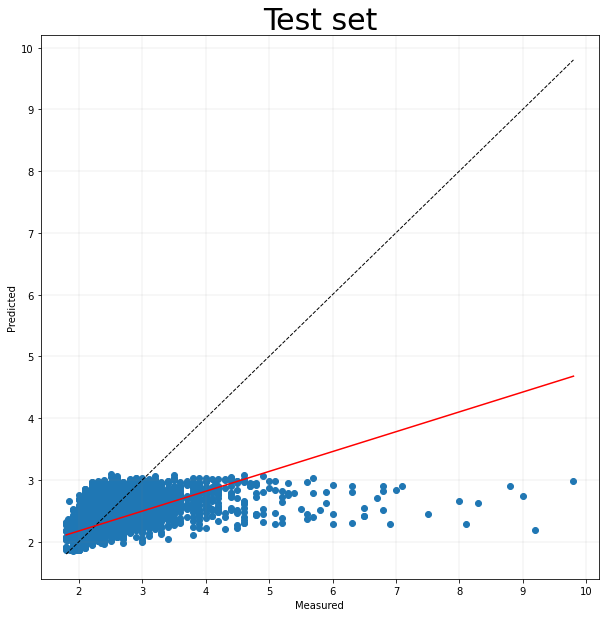

[0.32120634 1.53227505]
RMSE
[0.29833859]
R2
0.3606421955925089


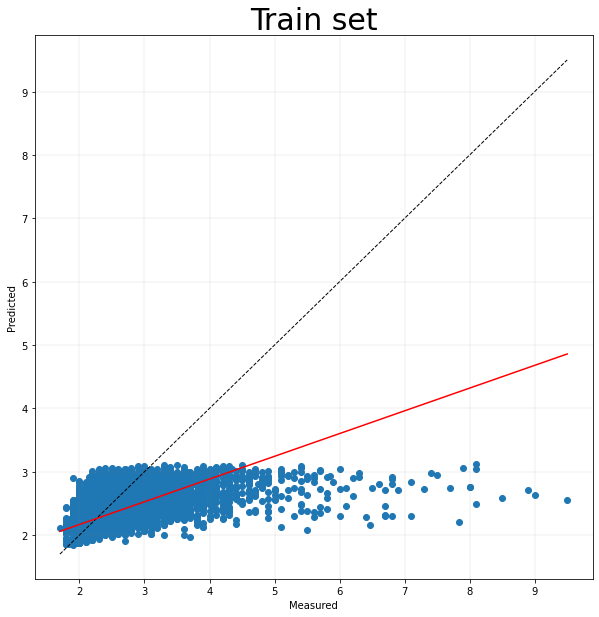

[0.35887954 1.4491666 ]
RMSE
[0.27199729]
R2
0.3987884279840128


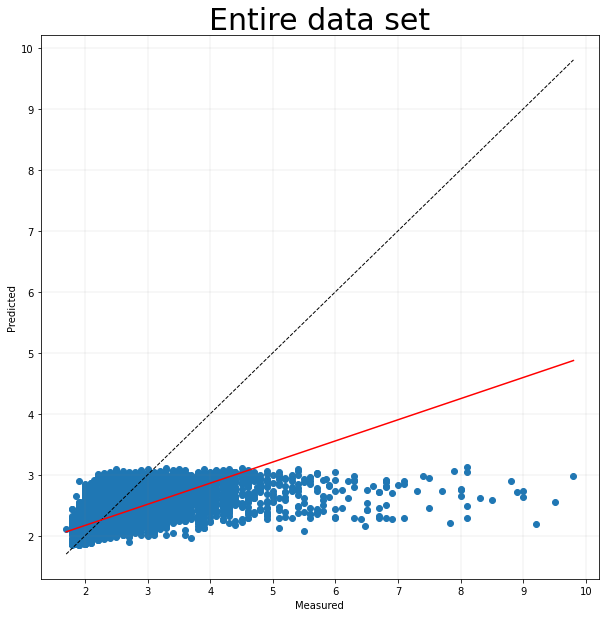

[0.34655949 1.47636707]
RMSE
[0.28016016]
R2
0.3863559231993178


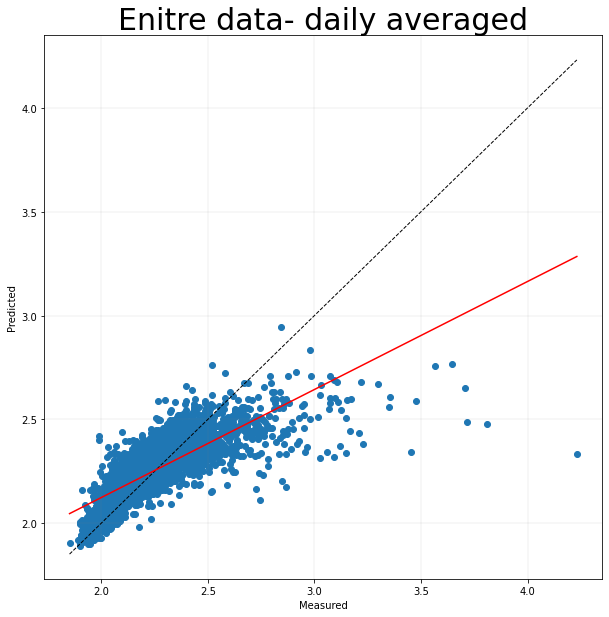

[0.52028878 1.08333376]
RMSE
[0.13987268]
R2
0.5963306884567918


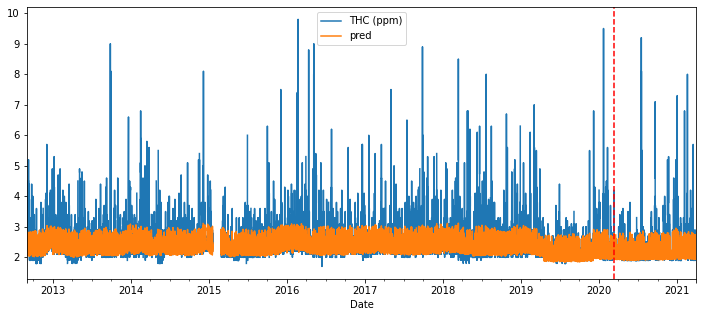

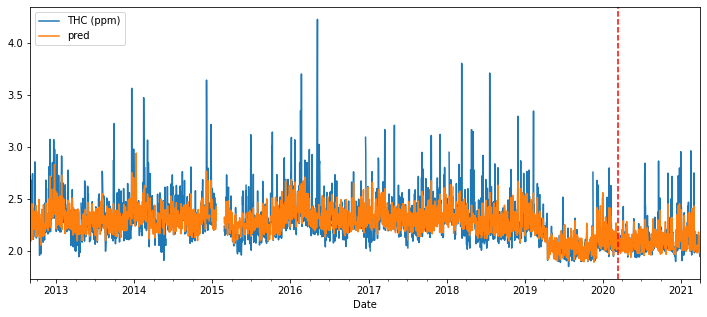

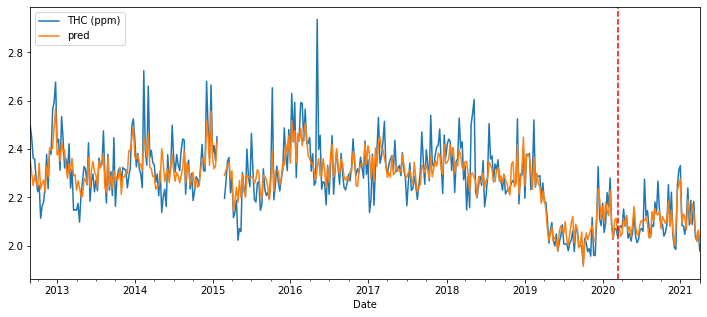

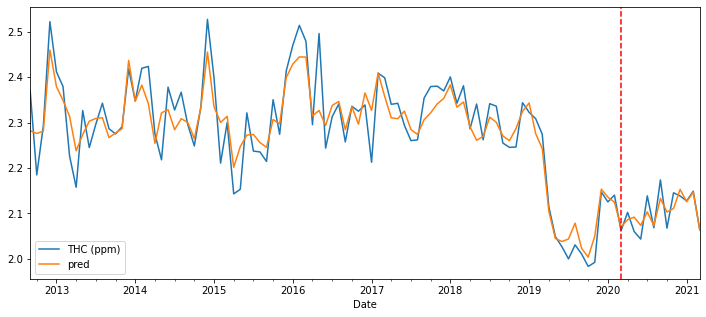

In [ ]:
model= xgb.XGBRegressor(booster = booster, reg_lambda=lambdaa, alpha=alpha,  
                          max_depth = max_depth, eta = eta, gamma = gamma,
                          grow_policy = grow_policy,
                          # n_estimators=n_estimators,
                          objective ='reg:squarederror', 
                          #normalize_type=normalize_type,sample_type=sample_type,rate_drop=rate_drop,skip_drop=skip_drop,
                          random_state=42)

eval_set = [(X_val, y_val)]
model.fit(X_traine, y_traine, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set)


preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))


# df3= df3.copy()
df4 = df1_w_c.copy()
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean().copy()
df10.dropna(inplace= True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(df10[aa]).reshape(-1,1)
y_pred = np.array(df10['pred']).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Enitre data- daily averaged',fontsize=30)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()
print(par)
print('RMSE')
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))



df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4

THC (ppm)  T ( C) 45m  ...      trend      pred
Date                                        ...                     
2012-09-01 00:00:00        2.5        14.7  ...  12.666667  2.500503
2012-09-01 01:00:00        2.5        13.5  ...  12.666781  2.566383
2012-09-01 02:00:00        2.5        12.8  ...  12.666894  2.467278
2012-09-01 03:00:00        2.5        12.9  ...  12.667008  2.530187
2012-09-01 04:00:00        2.5        12.7  ...  12.667122  2.492093
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        1.9         8.7  ...  21.245332  1.984213
2021-03-31 20:00:00        1.9         7.4  ...  21.245446  1.976623
2021-03-31 21:00:00        1.9         6.4  ...  21.245560  1.955798
2021-03-31 22:00:00        1.9         6.2  ...  21.245674  1.981776
2021-03-31 23:00:00        1.9         5.2  ...  21.245788  1.988281

[69464 rows x 15 columns]

In [ ]:
df4.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_THC_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_THC_Test.csv')

[0.27199729]
0.3987884279840128
[0.29833859]
0.3606421955925089


In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

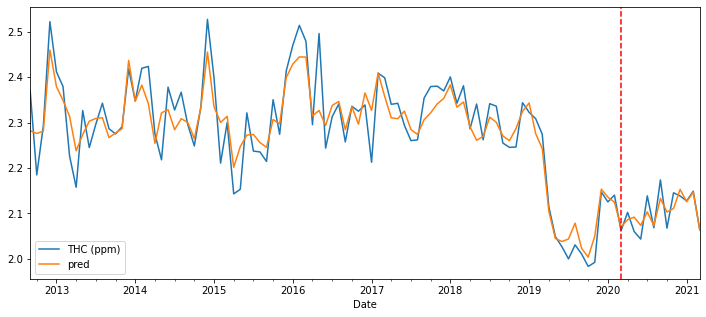

In [ ]:
df4_h[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

Streaming output truncated to the last 5000 lines.
212
2.1663098335266113
2021-01-19 11:00:00
213
2.160393714904785
2021-01-19 14:00:00
214
2.1693928241729736
2021-01-19 15:00:00
222
2.1564431190490723
2021-01-19 16:00:00
224
2.152440309524536
2021-01-19 17:00:00
226
2.13936710357666
2021-01-19 18:00:00
227
2.1389825344085693
2021-01-19 19:00:00
227
2.142463445663452
2021-01-19 20:00:00
229
2.148898124694824
2021-01-19 21:00:00
226
2.1432197093963623
2021-01-19 22:00:00
221
2.1466517448425293
2021-01-19 23:00:00
222
2.134298324584961
2021-01-20 00:00:00
219
2.1322989463806152
2021-01-20 02:00:00
213
2.140482187271118
2021-01-20 03:00:00
212
2.1343729496002197
2021-01-20 04:00:00
212
2.1414859294891357
2021-01-20 05:00:00
211
2.1491212844848633
2021-01-20 06:00:00
212
2.170649766921997
2021-01-20 07:00:00
209
2.1749916076660156
2021-01-20 08:00:00
209
2.1607954502105713
2021-01-20 10:00:00
212
2.169401168823242
2021-01-20 11:00:00
212
2.1659276485443115
2021-01-20 12:00:00
214
2.1623344

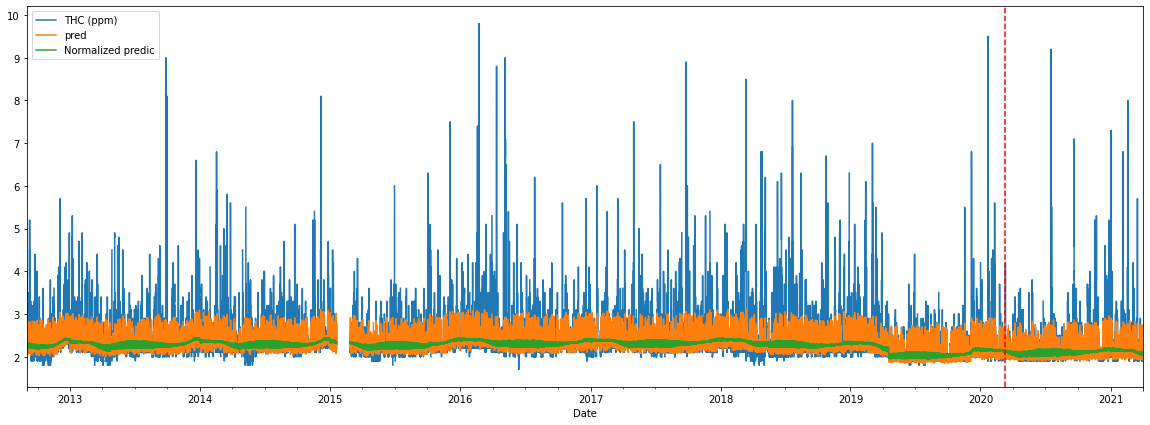

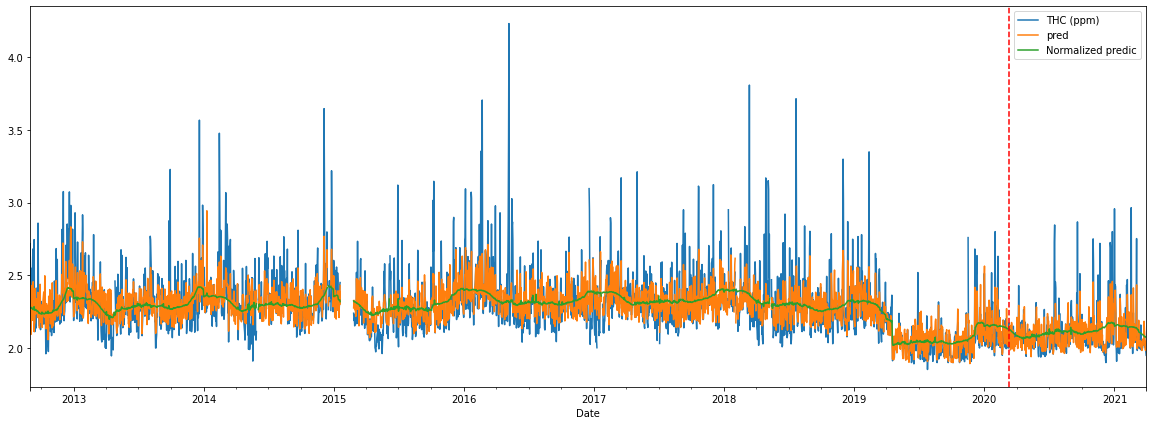

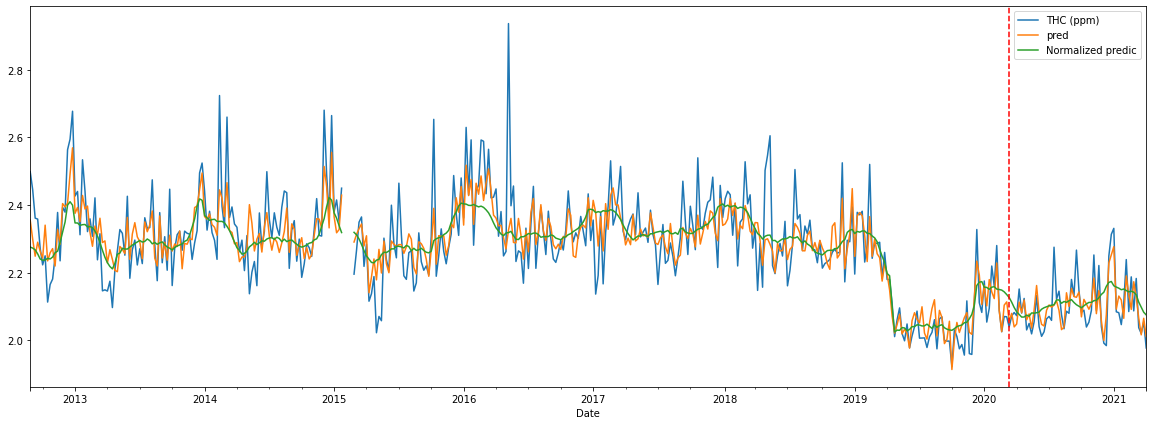

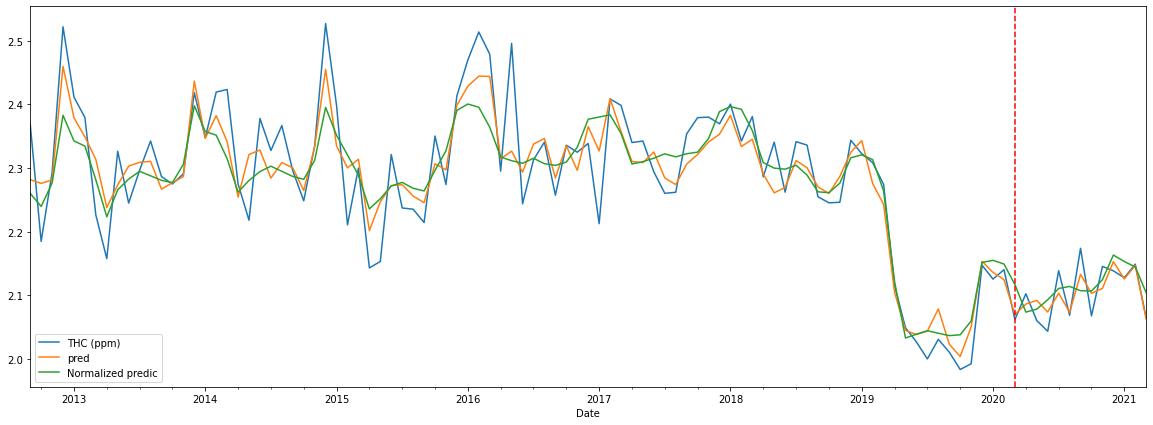

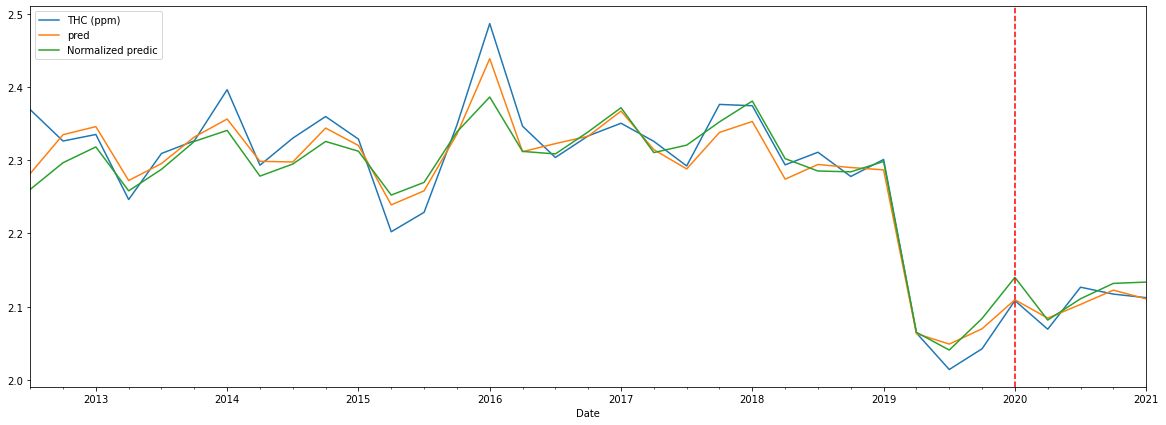

In [ ]:
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()

df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_THC_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_THC_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_THC_Monthly_normalized_pred.csv')


for i in ['H', 'D', 'W', 'M', 'Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
##################################################################################################NN

In [ ]:
best_params["score"]

15.681148624752785

In [ ]:
df1_w

THC (ppm)  T ( C) 45m  ...      trend     score
Date                                        ...                     
2012-09-01 00:00:00        2.5        14.7  ...  12.666667  2.000000
2012-09-01 01:00:00        2.5        13.5  ...  12.666781  4.375000
2012-09-01 02:00:00        2.5        12.8  ...  12.666894  2.759439
2012-09-01 03:00:00        2.5        12.9  ...  12.667008  6.611111
2012-09-01 04:00:00        2.5        12.7  ...  12.667122  9.867521
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        1.9         8.7  ...  21.245332  4.735714
2021-03-31 20:00:00        1.9         7.4  ...  21.245446  3.724432
2021-03-31 21:00:00        1.9         6.4  ...  21.245560  2.883929
2021-03-31 22:00:00        1.9         6.2  ...  21.245674  5.622024
2021-03-31 23:00:00        1.9         5.2  ...  21.245788  4.041838

[71480 rows x 15 columns]

In [ ]:
maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

avg = df1_w['score'].mean()
std = df1_w['score'].std()

print(avg,std)

5.544453338895459 4.641479447087735


In [ ]:
df1_w.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
class Objective(object):
    def __init__(self,df1_w, max_epochs, learn_rate_epochs,
                  ):
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs

        self.df1_w = df1_w.copy()
        self.n_features = len(self.df1_w.columns)-1
    def __call__(self, trial):        
       
        dict_params = {
                        'score' : trial.suggest_float( 'score', avg + 2 * std, avg + 5 * std ),
                        'delta': trial.suggest_float(  'delta',40, 100),
                        'layers': trial.suggest_int('layers', 2,3),
                       'alpha': trial.suggest_float('alpha', 0.01,0.9),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                       'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 30,40),
                       'learning_rate': trial.suggest_float( 'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.05, 0.3)}  

        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 5,40)
        dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.05, 0.3)
        if dict_params['layers'] == 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,40)
            dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.05, 0.3)

        self.df_nn =  self.df1_w[self.df1_w['score'] <  dict_params["score"]].copy()
        self.df_nn.drop(columns = ['score'], inplace = True)
        self.Y =   self.df_nn[aa]
        self.Y = np.array(self.Y).reshape(-1,1)
        self.X = np.array(  self.df_nn[  self.df_nn.columns[1:]])
        self.X_train,  self.X_test,  self.y_train, self.y_test = train_test_split( self.X,   self.Y, test_size=0.000000001, random_state = 42)

        maximum_epochs = 250
        early_stop_epochs= 60
        learning_rate_epochs = 30
        optimizer_direction = 'minimize'
        number_of_random_points = 30  # random searches to start opt process
        maximum_time = 8*60*60  # seconds
                  
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(dict_params['alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params['alpha'])) 
        model.add(Dropout(dict_params['drop_out2']))
        if dict_params['layers'] == 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params['alpha'])) 
            model.add(Dropout(dict_params['drop_out3']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params['alpha'])) 

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss=
                      # 'mse',
                      tf.keras.losses.Huber( delta=dict_params[ 'delta']),
                      # 'mse'
                          optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/MANIX_THC_2l" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]

        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 


        print(acc)
        return acc    

In [ ]:
# objective = Objective(df1_w,maximum_epochs,learning_rate_epochs)
# study = optuna.create_study(direction=optimizer_direction, study_name='Mannix_2013_2layer_THC_OT', storage='sqlite:///Mannix_2015_THC_2layers_OT.db',
#                             load_if_exists=True)
# study.optimize(objective, n_trials=500)
df_results = study.trials_dataframe()
# df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/Mannix_SO2_2013_HP.csv') #ghabli
df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NN_Mannix_THC_2013_HP_2l_hourly_outlier.csv')

In [ ]:
# print(study.best_params)
study.best_trials

[FrozenTrial(number=482, values=[0.0661806949168137], datetime_start=datetime.datetime(2021, 5, 18, 17, 8, 9, 129843), datetime_complete=datetime.datetime(2021, 5, 18, 17, 10, 24, 927380), params={'score': 27.26822711047835, 'delta': 60.21944621656523, 'layers': 3, 'alpha': 0.06952728050953756, 'batchsize': 1600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.01821841591518978, 'drop_out1': 0.07342311946466103, 'num_dense_nodes2': 40, 'drop_out2': 0.05461551223440134, 'num_dense_nodes3': 32, 'drop_out3': 0.20276919731401835}, distributions={'score': UniformDistribution(high=28.751850574334135, low=14.82741223307093), 'delta': UniformDistribution(high=100.0, low=40.0), 'layers': IntUniformDistribution(high=3, low=2, step=1), 'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=4600.0, low=100.0, q=500.0), 'num_dense_nodes1': IntUniformDistribution(high=40, low=30, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'drop_out1': Un

In [ ]:
study.best_params

{'alpha': 0.06952728050953756,
 'batchsize': 1600.0,
 'delta': 60.21944621656523,
 'drop_out1': 0.07342311946466103,
 'drop_out2': 0.05461551223440134,
 'drop_out3': 0.20276919731401835,
 'layers': 3,
 'learning_rate': 0.01821841591518978,
 'num_dense_nodes1': 40,
 'num_dense_nodes2': 40,
 'num_dense_nodes3': 32,
 'score': 27.26822711047835}

In [ ]:
#  ERROR2:Trial 533 finished with value: 17.947620692459207 and parameters: {'score': 16.736297981359147, 'delta': 48.01704814945821, 'layers': 2, 'alpha': 0.010660186759221701, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'learning_rate': 0.039588037740573775, 'drop_out1': 0.06158372221142019, 'num_dense_nodes2': 37, 'drop_out2': 0.053878597160021885}. Best is trial 533 with value: 17.947620692459207.

In [ ]:
# best_params = 
# {'alpha': 0.026196341809027104,
#  'batchsize': 2600.0,
#  'drop_out1': 0.06423319599547957,
#  'drop_out2': 0.05617949776762677,
#  'drop_out3': 0.1663945098938146,
#  'learning_rate': 0.013129870153458227,
#  'num_dense_nodes1': 38,
#  'num_dense_nodes2': 40,
#  'num_dense_nodes3': 10}. #rmse ghablie

In [ ]:
best_params_nn = {'alpha': 0.06952728050953756,
            'batchsize': 1600.0,
            'delta': 60.21944621656523,
            'drop_out1': 0.07342311946466103,
            'drop_out2': 0.05461551223440134,
            'drop_out3': 0.20276919731401835,
            'layers': 3,
            'learning_rate': 0.01821841591518978,
            'num_dense_nodes1': 40,
            'num_dense_nodes2': 40,
            'num_dense_nodes3': 32,
            'score': 27.26822711047835} # number=482, values=[0.0661806949168137]


# best_params_nn = study.best_params
df1_w_n=  df1_w[df1_w['score'] <  best_params_nn["score"]].copy()
df1_w_n.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Mannix_THC_Dataset.csv')
df1_w_n.drop(columns = ["score"], inplace = True)

In [ ]:
# best_params_nn ={'alpha': 0.011380628665322173,
#  'batchsize': 4100.0,
#  'drop_out1': 0.06374957957163459,
#  'drop_out2': 0.09795083125856888,
#  'layers': 2,
#  'learning_rate': 0.07387545322740646,
#  'num_dense_nodes1': 35,
#  'num_dense_nodes2': 40,
#  'score': 16.276138428959957} # number=275, values=[18.28920503987821]


# df1_w_n=  df1_w[df1_w['score'] <  best_params_nn["score"]].copy()
# df1_w_n.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Mannix_outlier_Dataset.csv')
# df1_w_n.drop(columns = ["score"], inplace = True)

In [ ]:
# df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NOX_Edmonton_East_Hyperparams-fixed.csv')

In [ ]:
# best_params = {'num_dense_nodes1': 29, 
#                'drop_out1': 0.005699067789286083, 
#                'num_dense_nodes2': 19, 'drop_out2': 0.07103058617619092, 
#                'batchsize': 300.0}

In [ ]:
# best_params = {'batchsize': 1300.0,
#  'drop_out1': 0.00012869242717143095,
#  'num_dense_nodes1': 28}

In [ ]:
print(len(df1_w_n)/len(df1_w))

0.9929910464465584


In [ ]:
Y = df1_w_n[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_n[df1_w_n.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

Epoch 1/250
24/24 - 3s - loss: 0.7317 - val_loss: 0.6632
Epoch 2/250
24/24 - 0s - loss: 0.1059 - val_loss: 0.1425
Epoch 3/250
24/24 - 0s - loss: 0.0827 - val_loss: 0.0764
Epoch 4/250
24/24 - 0s - loss: 0.0755 - val_loss: 0.0712
Epoch 5/250
24/24 - 0s - loss: 0.0707 - val_loss: 0.0651
Epoch 6/250
24/24 - 0s - loss: 0.0692 - val_loss: 0.0606
Epoch 7/250
24/24 - 0s - loss: 0.0694 - val_loss: 0.0566
Epoch 8/250
24/24 - 0s - loss: 0.0677 - val_loss: 0.0563
Epoch 9/250
24/24 - 0s - loss: 0.0672 - val_loss: 0.0559
Epoch 10/250
24/24 - 0s - loss: 0.0664 - val_loss: 0.0529
Epoch 11/250
24/24 - 0s - loss: 0.0655 - val_loss: 0.0534
Epoch 12/250
24/24 - 0s - loss: 0.0663 - val_loss: 0.0517
Epoch 13/250
24/24 - 0s - loss: 0.0643 - val_loss: 0.0528
Epoch 14/250
24/24 - 0s - loss: 0.0641 - val_loss: 0.0507
Epoch 15/250
24/24 - 0s - loss: 0.0642 - val_loss: 0.0517
Epoch 16/250
24/24 - 0s - loss: 0.0628 - val_loss: 0.0513
Epoch 17/250
24/24 - 0s - loss: 0.0625 - val_loss: 0.0517
Epoch 18/250
24/24 - 0s

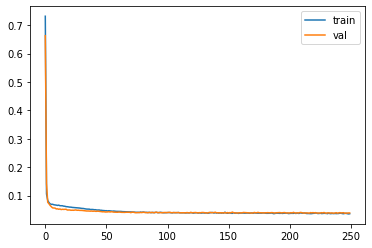

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 40)                560       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 40)                0         
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0

In [ ]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(best_params_nn ['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(best_params_nn ['alpha'])) 
model.add(Dropout(best_params_nn ['drop_out1']))
# if best_params_nn ['layers'] == 2 or best_params_nn ['layers'] == 3 :
model.add(Dense(best_params_nn ['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 
model.add(Dropout(best_params_nn ['drop_out2']))
if best_params_nn ['layers'] == 3 :
    model.add(Dense(best_params_nn ['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 
    model.add(Dropout(best_params_nn ['drop_out3']))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 

# instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=best_params_nn [ 'learning_rate'])
model.compile(loss=
              # 'mse',
              tf.keras.losses.Huber(  delta=best_params_nn [ 'delta']),
                                                                # 'mse'
                                                      optimizer=opt)

fn = "gdrive/My Drive/Colab Notebooks/Stations/Training_THC_Mannix.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer
callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params_nn ['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
model.summary()


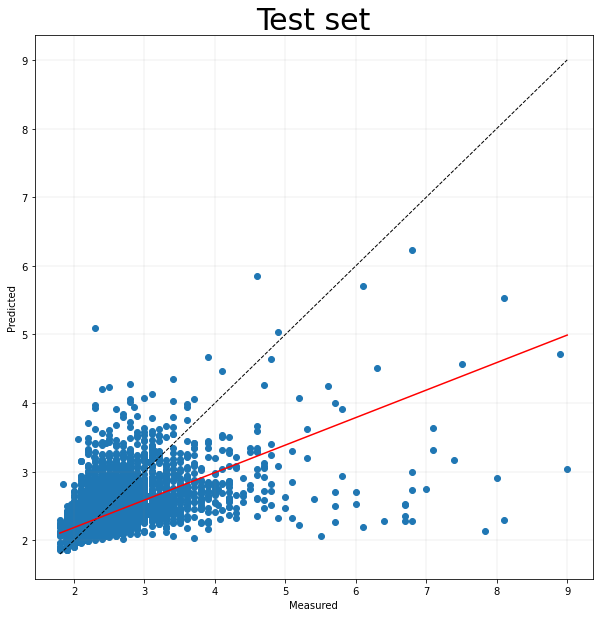

[0.40058538 1.38550856]
RMSE
[0.27807065]
R2
0.39861984414783114


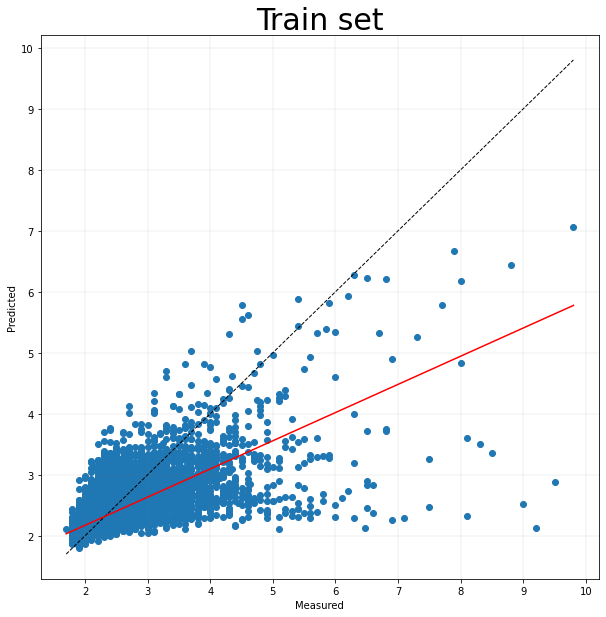

[0.46215646 1.24707082]
RMSE
[0.25713322]
R2
0.4885886872383691


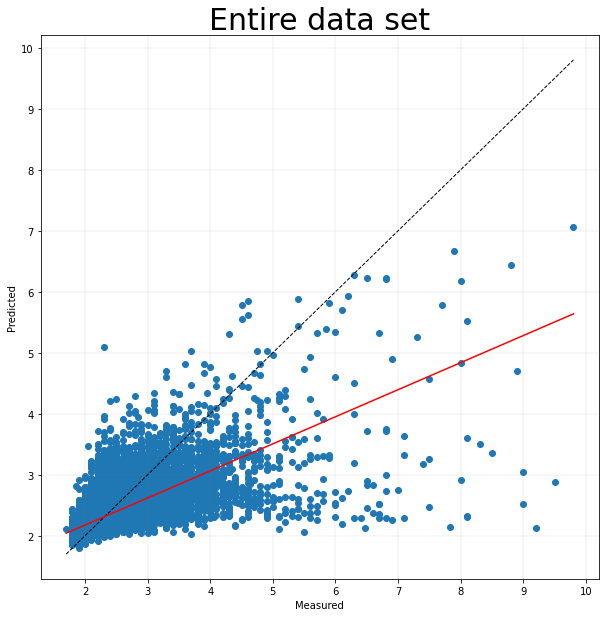

[0.44375855 1.28845786]
RMSE
[0.26358923]
R2
0.4617038291496336


In [ ]:
model.load_weights(fn)
precovid_model = 'gdrive/My Drive/Colab Notebooks/Mannix_THC.h5'
model.save(precovid_model )
preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

In [ ]:
model = load_model(precovid_model )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 40)                560       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 40)                0         
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0

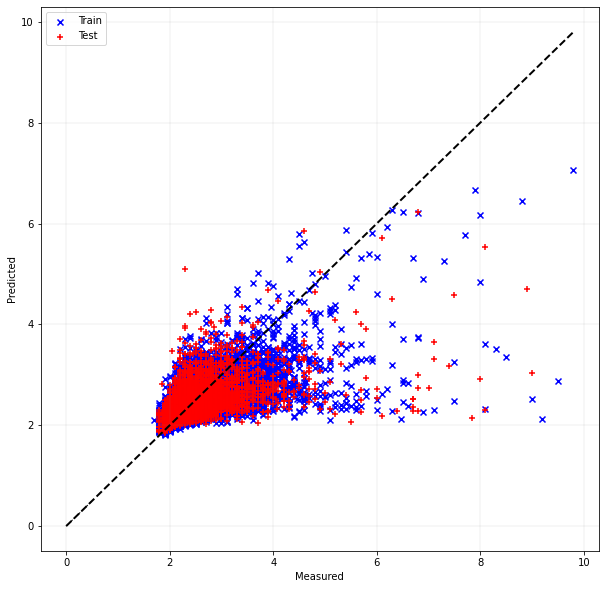

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.5], [0,0.5], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
# df2_w

In [ ]:
# df3= df3.copy()
df4 = df1_w_n.copy()
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

In [ ]:
df4.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

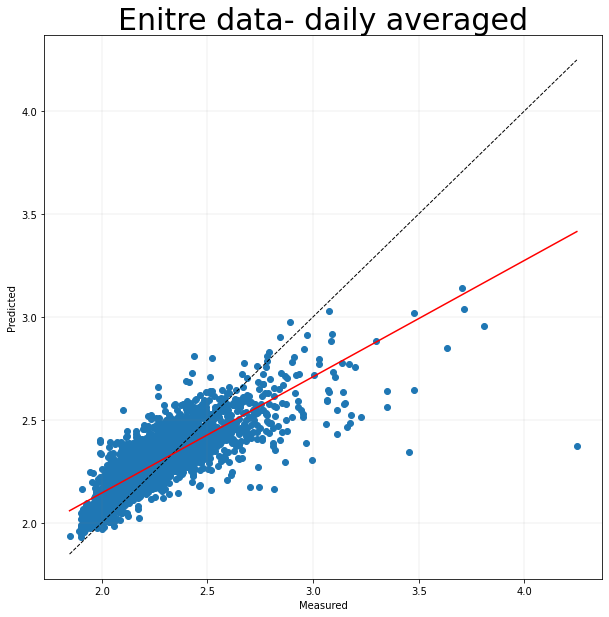

[0.56490062 1.01457211]
RMSE
[0.13402924]
R2
0.6292368829294772


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10[aa]).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


In [ ]:
df4.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

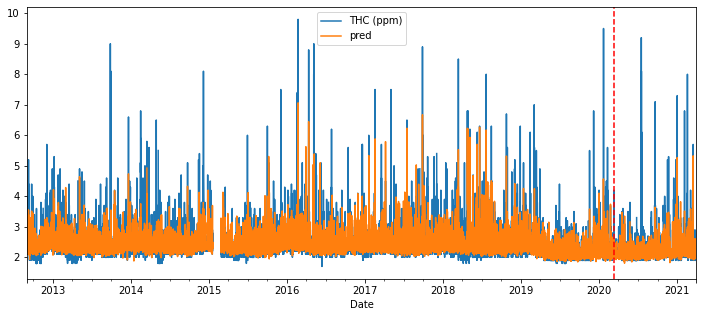

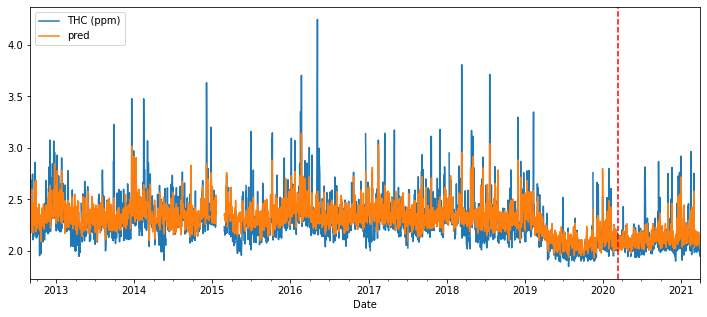

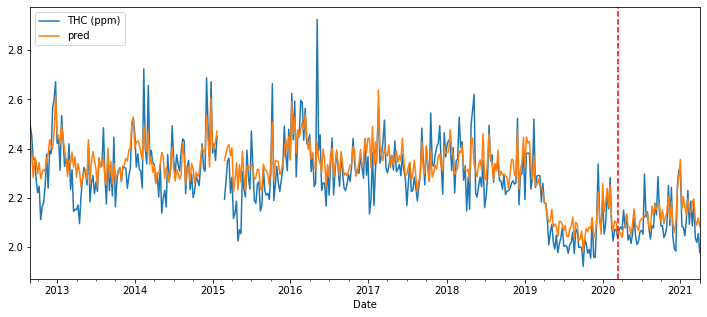

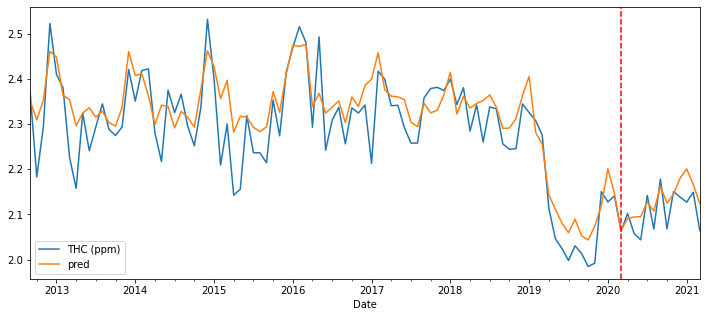

In [ ]:
df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
preds1 = model.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[0.25713322]
0.4885886872383691


In [ ]:
preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[0.27807065]
0.39861984414783114


In [ ]:
df4.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[ aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_THC_Mannix_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_THC_Mannix_Test.csv')

[0.25713322]
0.4885886872383691
[0.27807065]
0.39861984414783114


In [ ]:
df4.columns

Index(['THC (ppm)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

In [ ]:
# df4_D = df4_h.resample('D').mean()
# df4_M = df4_h.resample('M').mean()
# df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/Mannix_SO2_hourly_pred.csv')
# df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/Mannix_SO_monthly_pred.csv')

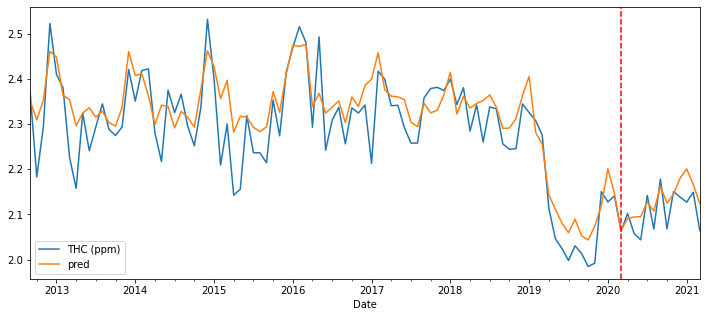

In [ ]:
df4_h[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4

THC (ppm)  T ( C) 45m  ...  Day-year      trend
Date                                        ...                     
2012-09-01 00:00:00        2.5        14.7  ...     245.0  12.666667
2012-09-01 01:00:00        2.5        13.5  ...     245.0  12.666781
2012-09-01 02:00:00        2.5        12.8  ...     245.0  12.666894
2012-09-01 03:00:00        2.5        12.9  ...     245.0  12.667008
2012-09-01 04:00:00        2.5        12.7  ...     245.0  12.667122
...                        ...         ...  ...       ...        ...
2021-03-31 19:00:00        1.9         8.7  ...      90.0  21.245332
2021-03-31 20:00:00        1.9         7.4  ...      90.0  21.245446
2021-03-31 21:00:00        1.9         6.4  ...      90.0  21.245560
2021-03-31 22:00:00        1.9         6.2  ...      90.0  21.245674
2021-03-31 23:00:00        1.9         5.2  ...      90.0  21.245788

[70979 rows x 14 columns]

In [ ]:
df4_h

THC (ppm)  T ( C) 45m  ...      trend      pred
Date                                        ...                     
2012-09-01 00:00:00        2.5        14.7  ...  12.666667  2.519747
2012-09-01 01:00:00        2.5        13.5  ...  12.666781  2.534404
2012-09-01 02:00:00        2.5        12.8  ...  12.666894  2.484072
2012-09-01 03:00:00        2.5        12.9  ...  12.667008  2.537259
2012-09-01 04:00:00        2.5        12.7  ...  12.667122  2.504220
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        1.9         8.7  ...  21.245332  2.021601
2021-03-31 20:00:00        1.9         7.4  ...  21.245446  2.037016
2021-03-31 21:00:00        1.9         6.4  ...  21.245560  2.006143
2021-03-31 22:00:00        1.9         6.2  ...  21.245674  2.050256
2021-03-31 23:00:00        1.9         5.2  ...  21.245788  2.064329

[70979 rows x 15 columns]

In [ ]:
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
224
2.225132703781128
2021-01-20 23:00:00
223
2.1980466842651367
2021-01-21 00:00:00
219
2.1731910705566406
2021-01-21 01:00:00
219
2.1845688819885254
2021-01-21 02:00:00
217
2.181365966796875
2021-01-21 03:00:00
215
2.1850266456604004
2021-01-21 04:00:00
217
2.1919493675231934
2021-01-21 05:00:00
211
2.2045252323150635
2021-01-21 06:00:00
211
2.224940299987793
2021-01-21 07:00:00
213
2.2309553623199463
2021-01-21 08:00:00
212
2.216540575027466
2021-01-21 09:00:00
214
2.2116198539733887
2021-01-21 10:00:00
216
2.213280200958252
2021-01-21 11:00:00
213
2.20493221282959
2021-01-21 12:00:00
214
2.2066805362701416
2021-01-21 15:00:00
226
2.2097599506378174
2021-01-21 16:00:00
225
2.2252235412597656
2021-01-21 17:00:00
227
2.2289936542510986
2021-01-21 18:00:00
227
2.2150399684906006
2021-01-21 19:00:00
227
2.2089710235595703
2021-01-21 20:00:00
227
2.2316417694091797
2021-01-21 21:00:00
225
2.2195842266082764
2021-01-21 22:00:00
223
2.2230

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()

df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_THC_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_THC_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_THC_Monthly_normalized_pred.csv')

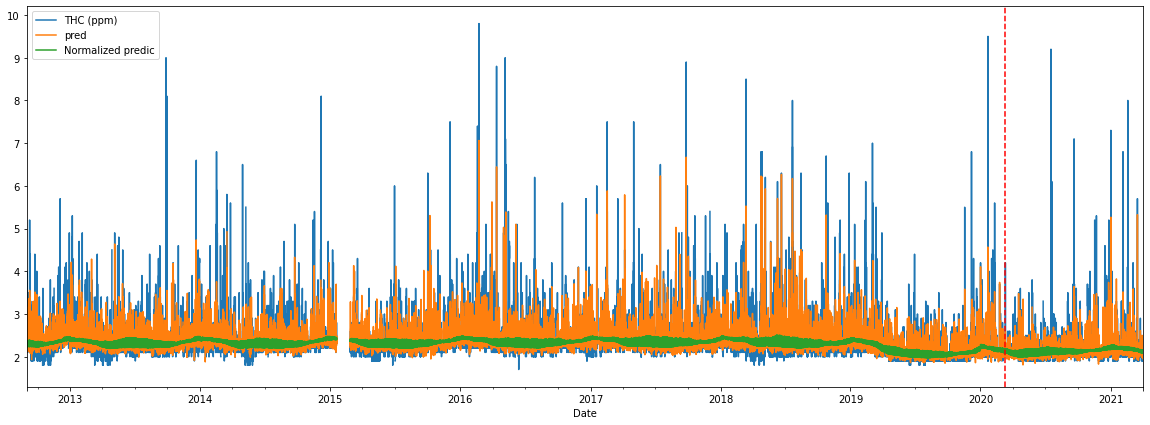

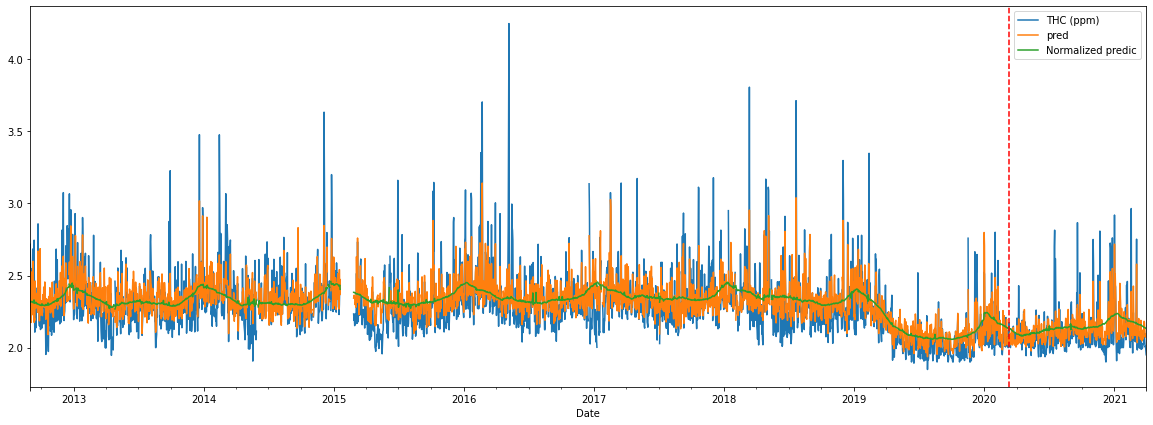

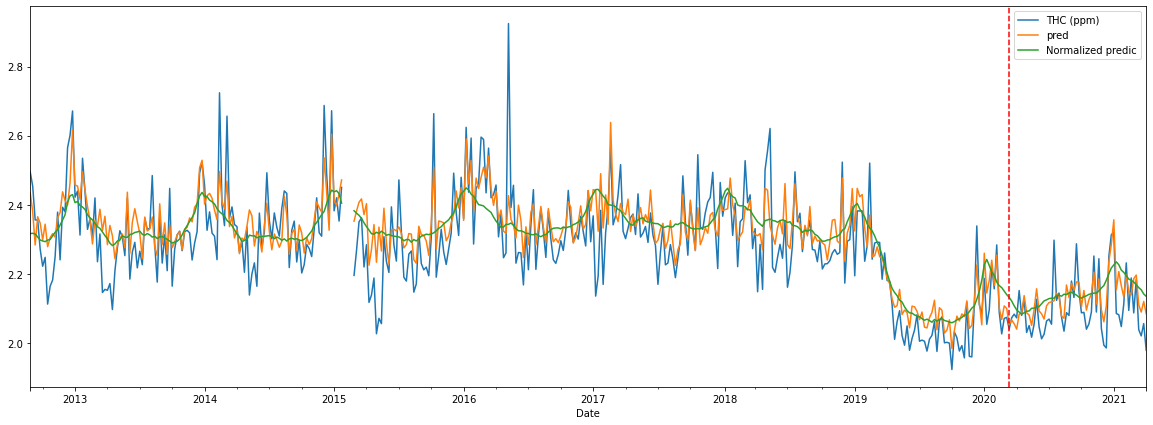

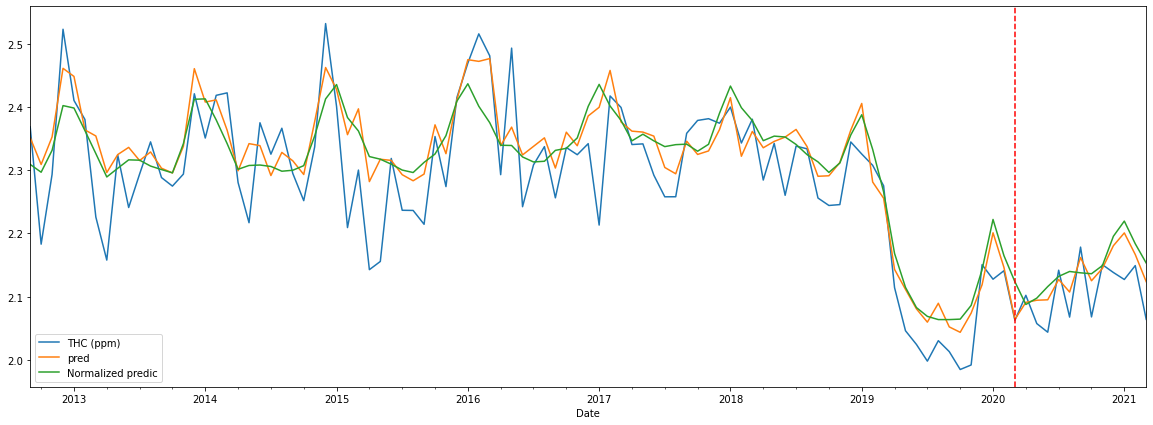

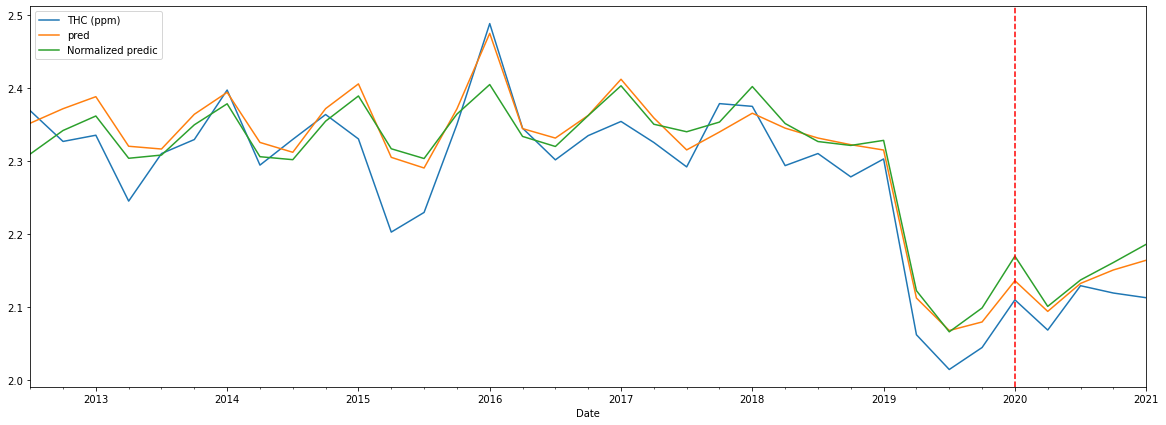

In [ ]:
for i in ['H','D','W','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

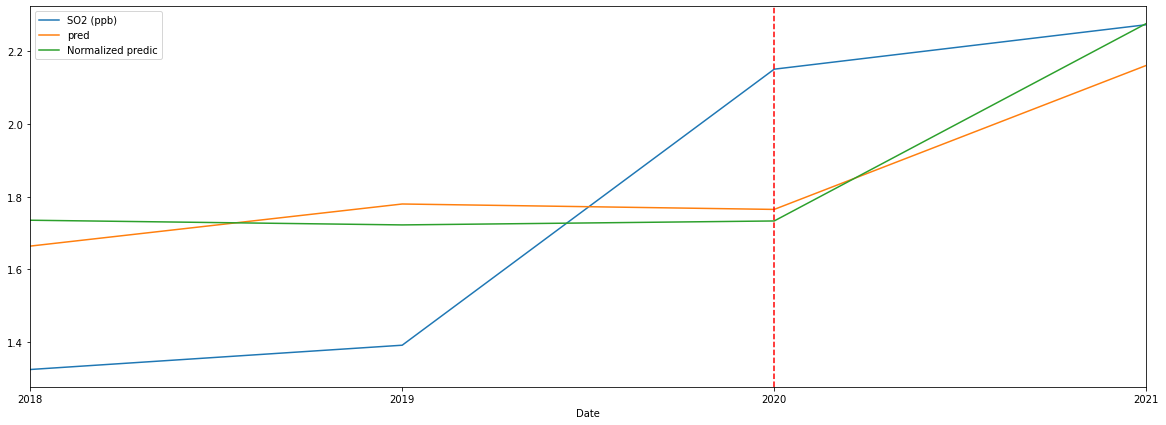

In [ ]:
df4_h['SO2 (ppb)'].resample('Y').mean().loc['2018':].plot(legend= True)
df4_h['pred'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
df4_h['Normalized predic'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ 'CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit','walking',
]]
df2_w_c.columns

Index(['CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'driving', 'transit',
       'walking'],
      dtype='object')

In [ ]:
df2_w_c[['driving', 'transit', 'walking']]=df2_w_c[['driving', 'transit', 'walking']]/100

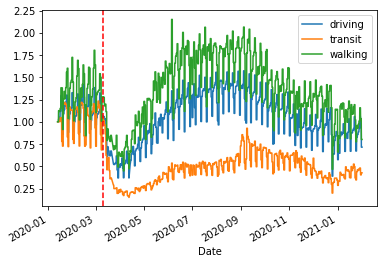

In [ ]:
df2_w_c[['driving', 'transit', 'walking']].plot()
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
a = df2_w_c[['driving', 'transit', 'walking']].loc[:'2020-03-11'].copy()
a.mean()

driving    1.124019
transit    1.025378
walking    1.331329
dtype: float64

In [ ]:
Y_a = df2_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ ['driving', 'transit', 'walking']])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(9075, 12) (9075, 3) (9075, 1)


In [ ]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [ ]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7260, 12) (7260, 3)
(5445, 12) (5445, 3)
(1815, 12) (1815, 3)


In [ ]:
best_params

{'batchsize': 2500.0,
 'drop_out1': 0.0057066589968766,
 'drop_out2': 0.008999530008727568,
 'drop_out3': 0.0006990849923195847,
 'layers': 3,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 28}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 35)                455       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 35)                0         
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                864       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24)                0

In [ ]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'last_layer' :trial.suggest_int('last_layer',0,1),
                        'two_layer' :trial.suggest_int('two_layer',0,1),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,3),
                       'num_dense_nodes2': trial.suggest_int('num_dense_nodes2', 1,8),
                        # 'layers': trial.suggest_int('layers', 2,3),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,2000,100)),
                      #  'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       'layer_back' :-(trial.suggest_int('layer_back', 1,2)),
                       }  
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(3,))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)
        if dict_params['two_layer'] ==1 :
             l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_3])
        else :
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])
        merged2 = BatchNormalization()(merged)

        if dict_params['last_layer'] ==0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] ==1:
            l5 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          
        
        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [ ]:
objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm_CO_p2',storage='sqlite:///east_edm_CO_p2.db',load_if_exists=True)
study2.optimize(objective2, n_trials=300)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/CO_Edmonton_east_Hyperparams_Stations.csv')
study2.best_trial

[I 2021-04-18 06:37:44,453] A new study created in RDB with name: east_edm_CO_p2
[I 2021-04-18 06:40:22,320] Trial 0 finished with value: 0.0047897337392556185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 3, 'batchsize': 1300.0, 'learning_rate': 0.08684742896034063, 'alpha': 0.47486431649895633, 'layer_back': 1}. Best is trial 0 with value: 0.0047897337392556185.


0.0047897337392556185


[I 2021-04-18 06:46:17,741] Trial 1 finished with value: 0.0037995427144006185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 200.0, 'learning_rate': 0.026645640165432177, 'alpha': 0.2464432589680267, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0037995427144006185


[I 2021-04-18 06:49:06,028] Trial 2 finished with value: 0.004990117939045318 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1200.0, 'learning_rate': 0.04246052710121524, 'alpha': 0.14036321226448864, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.004990117939045318


[I 2021-04-18 06:51:38,749] Trial 3 finished with value: 0.004435081840883617 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.08019349670014007, 'alpha': 0.801795208357617, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004435081840883617


[I 2021-04-18 06:55:41,325] Trial 4 finished with value: 0.004397006773851628 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 400.0, 'learning_rate': 0.0922021495386216, 'alpha': 0.8714206976745991, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004397006773851628


[I 2021-04-18 06:58:39,803] Trial 5 finished with value: 0.004472224808431502 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 1, 'batchsize': 900.0, 'learning_rate': 0.054032085513753485, 'alpha': 0.36356263089297863, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004472224808431502


[I 2021-04-18 07:02:19,968] Trial 6 finished with value: 0.004032658481373844 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 500.0, 'learning_rate': 0.0034103388646587085, 'alpha': 0.8298599523597091, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004032658481373844


[I 2021-04-18 07:04:57,913] Trial 7 finished with value: 0.004412881161440907 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1400.0, 'learning_rate': 0.024560851403922612, 'alpha': 0.8657303593335849, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004412881161440907


[I 2021-04-18 07:07:33,362] Trial 8 finished with value: 0.003962766007027832 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1600.0, 'learning_rate': 0.0387484515918348, 'alpha': 0.5935061142207385, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.003962766007027832


[I 2021-04-18 07:10:45,080] Trial 9 finished with value: 0.004464174746733434 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 700.0, 'learning_rate': 0.07156430296741274, 'alpha': 0.6837562117270939, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004464174746733434


[I 2021-04-18 07:20:10,927] Trial 10 finished with value: 0.0047593223285363065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.006393597974084786, 'alpha': 0.09784392044369339, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.0047593223285363065


[I 2021-04-18 07:22:40,517] Trial 11 finished with value: 0.0038559859859853907 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 4, 'batchsize': 1900.0, 'learning_rate': 0.029641261114048665, 'alpha': 0.3455488342982123, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0038559859859853907


[I 2021-04-18 07:25:12,650] Trial 12 finished with value: 0.0037802072596256108 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 2000.0, 'learning_rate': 0.021318248161901757, 'alpha': 0.27421676161966496, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.0037802072596256108


[I 2021-04-18 07:34:39,100] Trial 13 finished with value: 0.003838305552608133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.01618259930894679, 'alpha': 0.2237909588852787, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.003838305552608133


[I 2021-04-18 07:37:13,171] Trial 14 finished with value: 0.0037727934709037452 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 1600.0, 'learning_rate': 0.05463156741271952, 'alpha': 0.023432883667647286, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.0037727934709037452


[I 2021-04-18 07:39:46,194] Trial 15 finished with value: 0.004717376020706112 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.057774493852787316, 'alpha': 0.013468966566860257, 'layer_back': 1}. Best is trial 14 with value: 0.0037727934709037452.


0.004717376020706112


[I 2021-04-18 07:42:17,141] Trial 16 finished with value: 0.003891606393255513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 4, 'batchsize': 1600.0, 'learning_rate': 0.06483099406582218, 'alpha': 0.048701457819810334, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.003891606393255513


[I 2021-04-18 07:44:50,068] Trial 17 finished with value: 0.003705317767648349 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.042981081545902175, 'alpha': 0.17151924705879706, 'layer_back': 2}. Best is trial 17 with value: 0.003705317767648349.


0.003705317767648349


[I 2021-04-18 07:47:22,992] Trial 18 finished with value: 0.003652074267837431 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043120594200074316, 'alpha': 0.15356515832757994, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003652074267837431


[I 2021-04-18 07:49:56,748] Trial 19 finished with value: 0.004855364207538971 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.03948108446690251, 'alpha': 0.1731767923827432, 'layer_back': 1}. Best is trial 18 with value: 0.003652074267837431.


0.004855364207538971


[I 2021-04-18 07:52:46,818] Trial 20 finished with value: 0.0036661417054684184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.045596783441498825, 'alpha': 0.46487314129271234, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0036661417054684184


[I 2021-04-18 07:55:47,695] Trial 21 finished with value: 0.003772814522212643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.04376219782019011, 'alpha': 0.495381372771252, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003772814522212643


[I 2021-04-18 07:58:33,572] Trial 22 finished with value: 0.0037000579251144777 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03235269324681574, 'alpha': 0.40139723428257024, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037000579251144777


[I 2021-04-18 08:01:16,242] Trial 23 finished with value: 0.0037201394146138406 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.0335829823820747, 'alpha': 0.561915944028579, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037201394146138406


[I 2021-04-18 08:04:15,280] Trial 24 finished with value: 0.0037030372913319023 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.01268992251227287, 'alpha': 0.3938061003278891, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037030372913319023


[I 2021-04-18 08:07:38,080] Trial 25 finished with value: 0.003918046517575021 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.04897050026188292, 'alpha': 0.6753399284001078, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003918046517575021


[I 2021-04-18 08:10:15,782] Trial 26 finished with value: 0.0038008433695184197 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.06522149016140043, 'alpha': 0.42163733919230845, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0038008433695184197


[I 2021-04-18 08:13:05,072] Trial 27 finished with value: 0.0036111388857046787 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.03298839085103375, 'alpha': 0.3150552800923347, 'layer_back': 2}. Best is trial 27 with value: 0.0036111388857046787.


0.0036111388857046787


[I 2021-04-18 08:16:08,056] Trial 28 finished with value: 0.003597443791057043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.04885615301916258, 'alpha': 0.29269304131799223, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.003597443791057043


[I 2021-04-18 08:19:12,662] Trial 29 finished with value: 0.0046809329310916956 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.05995146156015323, 'alpha': 0.30446311601011683, 'layer_back': 1}. Best is trial 28 with value: 0.003597443791057043.


0.0046809329310916956


[I 2021-04-18 08:21:45,673] Trial 30 finished with value: 0.004425357656736 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.0759352310855712, 'alpha': 0.21269011576180244, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.004425357656736


[I 2021-04-18 08:24:37,569] Trial 31 finished with value: 0.0036547160400316313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.049811468875869416, 'alpha': 0.510738346787994, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0036547160400316313


[I 2021-04-18 08:27:52,823] Trial 32 finished with value: 0.0037521087301732345 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.049503947678833926, 'alpha': 0.31735277463906175, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037521087301732345


[I 2021-04-18 08:30:36,307] Trial 33 finished with value: 0.0037683419447327986 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.03290226547777786, 'alpha': 0.5286190169685012, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037683419447327986


[I 2021-04-18 08:33:27,324] Trial 34 finished with value: 0.003597358919918322 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.036818841872599595, 'alpha': 0.12570513379804832, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003597358919918322


[I 2021-04-18 08:37:26,272] Trial 35 finished with value: 0.003661138596451478 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 400.0, 'learning_rate': 0.03671876888449163, 'alpha': 0.08397801305678194, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003661138596451478


[I 2021-04-18 08:40:27,101] Trial 36 finished with value: 0.00359203525150731 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.02437141103670945, 'alpha': 0.12749087727003588, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00359203525150731


[I 2021-04-18 08:43:26,782] Trial 37 finished with value: 0.0036756314419160397 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.018931547569790746, 'alpha': 0.2516407308762111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036756314419160397


[I 2021-04-18 08:48:02,902] Trial 38 finished with value: 0.0036545643870157882 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 300.0, 'learning_rate': 0.02603462599572944, 'alpha': 0.14443719906111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036545643870157882


[I 2021-04-18 08:51:18,641] Trial 39 finished with value: 0.004398658143913983 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.02412418866542985, 'alpha': 0.09261962247455818, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.004398658143913983


[I 2021-04-18 08:54:03,235] Trial 40 finished with value: 0.00366032853048446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 1200.0, 'learning_rate': 0.028075997597257207, 'alpha': 0.20259126107498393, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00366032853048446


[I 2021-04-18 08:57:05,594] Trial 41 finished with value: 0.003674477629447893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.03773808729024592, 'alpha': 0.13311556018712936, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.003674477629447893


[I 2021-04-18 08:59:59,665] Trial 42 finished with value: 0.0036705861586692643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.014115297813961467, 'alpha': 0.28611068588955, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036705861586692643


[I 2021-04-18 09:03:13,164] Trial 43 finished with value: 0.0036713389468197555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.04560695580139573, 'alpha': 0.3437569312771207, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036713389468197555


[I 2021-04-18 09:06:35,814] Trial 44 finished with value: 0.0035783836209078556 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.009070889461271204, 'alpha': 0.13887248911600195, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035783836209078556


[I 2021-04-18 09:09:57,729] Trial 45 finished with value: 0.003673148714195081 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 600.0, 'learning_rate': 0.009253166791610645, 'alpha': 0.2451607156425593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003673148714195081


[I 2021-04-18 09:14:01,355] Trial 46 finished with value: 0.004344271113195811 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 400.0, 'learning_rate': 0.001551960808838477, 'alpha': 0.10569886410992255, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004344271113195811


[I 2021-04-18 09:17:39,621] Trial 47 finished with value: 0.0037050254039840223 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.021082510170567333, 'alpha': 0.0668001215058446, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037050254039840223


[I 2021-04-18 09:20:38,142] Trial 48 finished with value: 0.0036692619534721047 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.007585468046031375, 'alpha': 0.2061475495973082, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036692619534721047


[I 2021-04-18 09:23:49,174] Trial 49 finished with value: 0.004457879746783033 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.03483835282389286, 'alpha': 0.018344801879960376, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004457879746783033


[I 2021-04-18 09:26:34,895] Trial 50 finished with value: 0.0035807581552902102 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03005652498704963, 'alpha': 0.11696356203274105, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035807581552902102


[I 2021-04-18 09:29:21,811] Trial 51 finished with value: 0.0036236342891670654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.09983893132352316, 'alpha': 0.11957067974916365, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036236342891670654


[I 2021-04-18 09:32:02,631] Trial 52 finished with value: 0.0036302435793163423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.02754867420830222, 'alpha': 0.05647608660638647, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036302435793163423


[I 2021-04-18 09:34:44,744] Trial 53 finished with value: 0.003627053068071688 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04005811816852655, 'alpha': 0.17080808493297003, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003627053068071688


[I 2021-04-18 09:37:45,884] Trial 54 finished with value: 0.0036920503523068266 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.017979831294330218, 'alpha': 0.2570823577331828, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036920503523068266


[I 2021-04-18 09:40:36,692] Trial 55 finished with value: 0.003612690295076574 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1000.0, 'learning_rate': 0.029552755284063505, 'alpha': 0.18039366495456732, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003612690295076574


[I 2021-04-18 09:43:40,566] Trial 56 finished with value: 0.004012695527376038 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 800.0, 'learning_rate': 0.022565925713046567, 'alpha': 0.03734236499524329, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004012695527376038


[I 2021-04-18 09:47:16,794] Trial 57 finished with value: 0.003698018600704401 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 500.0, 'learning_rate': 0.05338960509962787, 'alpha': 0.35126328332328843, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003698018600704401


[I 2021-04-18 09:50:04,725] Trial 58 finished with value: 0.003619003598112455 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.011669376031158469, 'alpha': 0.2338658479883975, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003619003598112455


[I 2021-04-18 09:53:02,416] Trial 59 finished with value: 0.0036054917675212707 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.031117560438016202, 'alpha': 0.12690434404626497, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036054917675212707


[I 2021-04-18 09:56:06,738] Trial 60 finished with value: 0.003886966241395085 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.003565187588275332, 'alpha': 0.12617304287730674, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003886966241395085


[I 2021-04-18 09:59:11,214] Trial 61 finished with value: 0.003618826532739045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.03119470670070372, 'alpha': 0.06717581966642143, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003618826532739045


[I 2021-04-18 10:02:02,407] Trial 62 finished with value: 0.0037632189106060355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1000.0, 'learning_rate': 0.04059941279624269, 'alpha': 0.16862336495408595, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037632189106060355


[I 2021-04-18 10:05:19,179] Trial 63 finished with value: 0.003794832132947586 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 700.0, 'learning_rate': 0.036734160746832493, 'alpha': 0.01101319432018788, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003794832132947586


[I 2021-04-18 10:08:20,419] Trial 64 finished with value: 0.003758988776972788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.029855268948976825, 'alpha': 0.4386976096021802, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003758988776972788


[I 2021-04-18 10:11:42,186] Trial 65 finished with value: 0.0035876522982958357 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.024552341120126213, 'alpha': 0.20134794489311997, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035876522982958357


[I 2021-04-18 10:15:04,777] Trial 66 finished with value: 0.0036155628523736184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.016447401975405944, 'alpha': 0.14664495950811754, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036155628523736184


[I 2021-04-18 10:18:40,103] Trial 67 finished with value: 0.0037361543406670638 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.02482879535124779, 'alpha': 0.18911509071408622, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037361543406670638


[I 2021-04-18 10:23:14,465] Trial 68 finished with value: 0.004737399253546576 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 300.0, 'learning_rate': 0.045839207163365064, 'alpha': 0.11572139542681772, 'layer_back': 1}. Best is trial 44 with value: 0.0035783836209078556.


0.004737399253546576


[I 2021-04-18 10:26:17,521] Trial 69 finished with value: 0.0035844609162026856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.021759460493932996, 'alpha': 0.08938362393003896, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035844609162026856


[I 2021-04-18 10:29:40,721] Trial 70 finished with value: 0.003647474821726536 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.020584896822209618, 'alpha': 0.08688700495047245, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003647474821726536


[I 2021-04-18 10:32:40,862] Trial 71 finished with value: 0.0036240235360119194 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.026636013810065286, 'alpha': 0.04460753701062606, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036240235360119194


[I 2021-04-18 10:35:57,924] Trial 72 finished with value: 0.003678997217185063 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 700.0, 'learning_rate': 0.02380154186526011, 'alpha': 0.15140441320203327, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003678997217185063


[I 2021-04-18 10:39:01,596] Trial 73 finished with value: 0.003659856745198834 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.015277005770461548, 'alpha': 0.2178303763286192, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003659856745198834


[I 2021-04-18 10:42:16,571] Trial 74 finished with value: 0.0036399907750272265 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.011408912622706538, 'alpha': 0.10321869296892679, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036399907750272265


[I 2021-04-18 10:45:19,285] Trial 75 finished with value: 0.0037281104148537535 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.035323452421033984, 'alpha': 0.2846749869393032, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037281104148537535


[I 2021-04-18 10:48:06,701] Trial 76 finished with value: 0.00361764726075232 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.018785055346852722, 'alpha': 0.08247223174383175, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.00361764726075232


[I 2021-04-18 10:51:06,829] Trial 77 finished with value: 0.0036951690746862827 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.030036815811613576, 'alpha': 0.15370233117847767, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036951690746862827


[I 2021-04-18 10:53:48,194] Trial 78 finished with value: 0.003591197553125669 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.021596734858180668, 'alpha': 0.19705749126102656, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003591197553125669


[I 2021-04-18 10:56:31,899] Trial 79 finished with value: 0.0036875580454355968 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.004996727049177942, 'alpha': 0.19630957319700593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036875580454355968


[I 2021-04-18 10:59:15,173] Trial 80 finished with value: 0.003672630637413495 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.009725768873874269, 'alpha': 0.23904793658858925, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003672630637413495


[I 2021-04-18 11:02:33,338] Trial 81 finished with value: 0.003608277041588192 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.021177055101469718, 'alpha': 0.13273475258504627, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003608277041588192


[I 2021-04-18 11:05:23,493] Trial 82 finished with value: 0.0035357134156083006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03251063586877488, 'alpha': 0.16601335847048496, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035357134156083006


[I 2021-04-18 11:08:10,650] Trial 83 finished with value: 0.0035800395220561315 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027507014638668944, 'alpha': 0.26952999743969175, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035800395220561315


[I 2021-04-18 11:10:53,530] Trial 84 finished with value: 0.003641285084880817 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.024468913257262442, 'alpha': 0.26941083528596615, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003641285084880817


[I 2021-04-18 11:13:33,120] Trial 85 finished with value: 0.003613639352689042 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.027506935493900007, 'alpha': 0.16554636650660334, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003613639352689042


[I 2021-04-18 11:16:13,848] Trial 86 finished with value: 0.0035454609704569555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034075180962035656, 'alpha': 0.19205737194876213, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035454609704569555


[I 2021-04-18 11:18:54,396] Trial 87 finished with value: 0.0036217548071173097 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.018105506543334197, 'alpha': 0.2172761829124636, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036217548071173097


[I 2021-04-18 11:21:32,202] Trial 88 finished with value: 0.0036196131119005967 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.013644839043071016, 'alpha': 0.18554443324755185, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036196131119005967


[I 2021-04-18 11:24:10,911] Trial 89 finished with value: 0.003572944589854708 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02174303974596932, 'alpha': 0.06885902281378707, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003572944589854708


[I 2021-04-18 11:26:50,606] Trial 90 finished with value: 0.003906346283951516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1500.0, 'learning_rate': 0.03323653174387488, 'alpha': 0.03163285232628042, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003906346283951516


[I 2021-04-18 11:29:31,353] Trial 91 finished with value: 0.003578888868218704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.022580602914511808, 'alpha': 0.06713185538847133, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003578888868218704


[I 2021-04-18 11:32:08,581] Trial 92 finished with value: 0.0035789263141083713 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.021256605621501615, 'alpha': 0.06634621015162126, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035789263141083713


[I 2021-04-18 11:34:49,916] Trial 93 finished with value: 0.003544189206426239 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02748340529865124, 'alpha': 0.07868991239964429, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003544189206426239


[I 2021-04-18 11:37:33,179] Trial 94 finished with value: 0.0035499476797488643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02892486834145689, 'alpha': 0.07221984870581319, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035499476797488643


[I 2021-04-18 11:40:14,572] Trial 95 finished with value: 0.0035273632980514285 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.027834554447690413, 'alpha': 0.06732285000688103, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035273632980514285


[I 2021-04-18 11:42:52,853] Trial 96 finished with value: 0.0036086771352365947 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02637530840203316, 'alpha': 0.05953489610216768, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036086771352365947


[I 2021-04-18 11:45:38,794] Trial 97 finished with value: 0.0035684357428775186 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027517728652115728, 'alpha': 0.07593898838347986, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035684357428775186


[I 2021-04-18 11:48:20,507] Trial 98 finished with value: 0.003583852513729412 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03367874759681739, 'alpha': 0.06942447131849512, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003583852513729412


[I 2021-04-18 11:50:57,066] Trial 99 finished with value: 0.003541288425685317 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.041358766423868744, 'alpha': 0.021920382234198947, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003541288425685317


[I 2021-04-18 11:53:42,845] Trial 100 finished with value: 0.0036243488752047467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04030568364072326, 'alpha': 0.02384229949250582, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036243488752047467


[I 2021-04-18 11:56:21,539] Trial 101 finished with value: 0.003627937411450544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.035398043970041676, 'alpha': 0.03950052041260174, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627937411450544


[I 2021-04-18 11:59:00,418] Trial 102 finished with value: 0.003627126043875543 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03832592467033967, 'alpha': 0.10048283220351684, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627126043875543


[I 2021-04-18 12:01:36,789] Trial 103 finished with value: 0.0035408315369076784 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032256016881253326, 'alpha': 0.07030089565296588, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035408315369076784


[I 2021-04-18 12:04:17,971] Trial 104 finished with value: 0.003566082616285739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04262395762710679, 'alpha': 0.01173160141920479, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003566082616285739


[I 2021-04-18 12:06:58,238] Trial 105 finished with value: 0.0035737931205732376 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04227819138674002, 'alpha': 0.010660044984515019, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035737931205732376


[I 2021-04-18 12:09:32,119] Trial 106 finished with value: 0.0035184089995725617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043629287038235834, 'alpha': 0.010426390915745402, 'layer_back': 2}. Best is trial 106 with value: 0.0035184089995725617.


0.0035184089995725617


[I 2021-04-18 12:12:07,413] Trial 107 finished with value: 0.0034912184906821125 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04304162747051637, 'alpha': 0.044280753511746956, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0034912184906821125


[I 2021-04-18 12:14:44,123] Trial 108 finished with value: 0.0036380100736029142 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046899784330746694, 'alpha': 0.011423731168029368, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036380100736029142


[I 2021-04-18 12:17:20,619] Trial 109 finished with value: 0.0035930917231830005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05312662202242775, 'alpha': 0.04766526633420203, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035930917231830005


[I 2021-04-18 12:19:56,882] Trial 110 finished with value: 0.0035019395412586403 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04297554301809757, 'alpha': 0.03108575464071467, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035019395412586403


[I 2021-04-18 12:22:26,683] Trial 111 finished with value: 0.0035799057324392095 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.042791521010711986, 'alpha': 0.033242351358857565, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035799057324392095


[I 2021-04-18 12:25:01,093] Trial 112 finished with value: 0.003567586631908924 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04188075691123601, 'alpha': 0.012902457195305648, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567586631908924


[I 2021-04-18 12:27:37,137] Trial 113 finished with value: 0.003552786707766206 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04705313553365665, 'alpha': 0.024024393886675065, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003552786707766206


[I 2021-04-18 12:30:14,683] Trial 114 finished with value: 0.0035491374611036066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04792414670441766, 'alpha': 0.04942912887788908, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035491374611036066


[I 2021-04-18 12:32:47,942] Trial 115 finished with value: 0.003934744163417141 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.05138779832449931, 'alpha': 0.7678284116404237, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003934744163417141


[I 2021-04-18 12:35:21,813] Trial 116 finished with value: 0.0035480745063304685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04672929967596791, 'alpha': 0.0543681486748597, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035480745063304685


[I 2021-04-18 12:37:57,950] Trial 117 finished with value: 0.003645209428448006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.058597540974892046, 'alpha': 0.054075814336391005, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003645209428448006


[I 2021-04-18 12:40:31,646] Trial 118 finished with value: 0.003635834268763575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04497558570260886, 'alpha': 0.10395749038880057, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003635834268763575


[I 2021-04-18 12:43:09,338] Trial 119 finished with value: 0.0036447334704852665 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1800.0, 'learning_rate': 0.04781462434994531, 'alpha': 0.04268750205527756, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036447334704852665


[I 2021-04-18 12:45:44,270] Trial 120 finished with value: 0.003567690380984065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.037831602089136926, 'alpha': 0.0894939850401166, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567690380984065


[I 2021-04-18 12:48:19,955] Trial 121 finished with value: 0.0036418865284299482 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.049910163797960434, 'alpha': 0.02265761100617698, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036418865284299482


[I 2021-04-18 12:50:50,152] Trial 122 finished with value: 0.003626350371093418 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04409374352769631, 'alpha': 0.04839758470877351, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003626350371093418


[I 2021-04-18 12:53:25,935] Trial 123 finished with value: 0.004068899031879057 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 1900.0, 'learning_rate': 0.04692551724599392, 'alpha': 0.027164865650236767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004068899031879057


[I 2021-04-18 12:56:09,582] Trial 124 finished with value: 0.003549524306460534 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.05601252997839943, 'alpha': 0.08216270418670965, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003549524306460534


[I 2021-04-18 12:58:52,986] Trial 125 finished with value: 0.0036022166677025626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.051026693295636215, 'alpha': 0.08169432284004574, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036022166677025626


[I 2021-04-18 13:01:25,923] Trial 126 finished with value: 0.0036323884269265395 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05755736475611723, 'alpha': 0.10764012747900042, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036323884269265395


[I 2021-04-18 13:04:06,681] Trial 127 finished with value: 0.0035868803510106743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.06484074739859898, 'alpha': 0.04916233098402338, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035868803510106743


[I 2021-04-18 13:06:48,784] Trial 128 finished with value: 0.003632038891645508 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.05481967090549042, 'alpha': 0.09493718561374137, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632038891645508


[I 2021-04-18 13:09:24,704] Trial 129 finished with value: 0.0036332687347207073 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.06164699827462552, 'alpha': 0.11368639196612304, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036332687347207073


[I 2021-04-18 13:12:02,225] Trial 130 finished with value: 0.0036107090038871685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.031913432524153476, 'alpha': 0.07944764608488178, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036107090038871685


[I 2021-04-18 13:14:37,997] Trial 131 finished with value: 0.003543857849946714 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04047866711207972, 'alpha': 0.03334890991576665, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003543857849946714


[I 2021-04-18 13:17:10,956] Trial 132 finished with value: 0.003614544482168527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03927975006627224, 'alpha': 0.05750478466882326, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003614544482168527


[I 2021-04-18 13:19:52,496] Trial 133 finished with value: 0.0036289459230039846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03602600147397279, 'alpha': 0.03879102885756539, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036289459230039846


[I 2021-04-18 13:22:21,926] Trial 134 finished with value: 0.004397730627210862 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04121745337090514, 'alpha': 0.07727507999023213, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004397730627210862


[I 2021-04-18 13:25:09,682] Trial 135 finished with value: 0.0035954891884910044 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.05591938878661566, 'alpha': 0.011489115255243473, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035954891884910044


[I 2021-04-18 13:27:46,099] Trial 136 finished with value: 0.003632190940638184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04473961188420494, 'alpha': 0.05883472932516892, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632190940638184


[I 2021-04-18 13:30:22,676] Trial 137 finished with value: 0.004797824764292689 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03394020855741806, 'alpha': 0.6177230050734727, 'layer_back': 1}. Best is trial 107 with value: 0.0034912184906821125.


0.004797824764292689


[I 2021-04-18 13:32:54,827] Trial 138 finished with value: 0.0035575625191086686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03925631108791122, 'alpha': 0.02976577533102045, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035575625191086686


[I 2021-04-18 13:35:35,526] Trial 139 finished with value: 0.0037383972180743746 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.02925391477758371, 'alpha': 0.13393207397187767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037383972180743746


[I 2021-04-18 13:38:16,882] Trial 140 finished with value: 0.003617621733455551 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03195637257591547, 'alpha': 0.0947751465706642, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003617621733455551


[I 2021-04-18 13:40:50,663] Trial 141 finished with value: 0.003579242154278799 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0485447382823182, 'alpha': 0.01176858180870248, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003579242154278799


[I 2021-04-18 13:43:25,476] Trial 142 finished with value: 0.0035750086655864273 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.046567743860348884, 'alpha': 0.026818371099279946, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035750086655864273


[I 2021-04-18 13:46:00,498] Trial 143 finished with value: 0.003623829402881311 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03742158374219033, 'alpha': 0.04975293319513799, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003623829402881311


[I 2021-04-18 13:48:38,218] Trial 144 finished with value: 0.0036066806414085484 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05148602571649974, 'alpha': 0.010300864640383572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036066806414085484


[I 2021-04-18 13:51:09,839] Trial 145 finished with value: 0.003610979298586066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.043772802510158214, 'alpha': 0.07001141819525372, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003610979298586066


[I 2021-04-18 13:53:44,355] Trial 146 finished with value: 0.0035619962671982527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04082403791540483, 'alpha': 0.035248606443724864, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035619962671982527


[I 2021-04-18 13:56:26,877] Trial 147 finished with value: 0.003548864702878114 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04862893209367515, 'alpha': 0.11504554485639235, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003548864702878114


[I 2021-04-18 13:59:07,487] Trial 148 finished with value: 0.0036127803252306075 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034866037784612974, 'alpha': 0.15803031484071783, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036127803252306075


[I 2021-04-18 14:01:52,630] Trial 149 finished with value: 0.0035717142472204513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04905384303207223, 'alpha': 0.11415311920269179, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035717142472204513


[I 2021-04-18 14:04:32,812] Trial 150 finished with value: 0.0035749882689068164 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04526973875676865, 'alpha': 0.14572957071712894, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035749882689068164


[I 2021-04-18 14:07:16,399] Trial 151 finished with value: 0.0035993304069324022 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.052491361045237814, 'alpha': 0.08397349335013253, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035993304069324022


[I 2021-04-18 14:09:58,621] Trial 152 finished with value: 0.0035685056911281127 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04837346606791395, 'alpha': 0.06310254703879091, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035685056911281127


[I 2021-04-18 14:12:29,525] Trial 153 finished with value: 0.003629879513305761 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0438214208862195, 'alpha': 0.10403865238259322, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003629879513305761


[I 2021-04-18 14:15:14,227] Trial 154 finished with value: 0.0036221795403482207 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03029487512047642, 'alpha': 0.04348614544060133, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036221795403482207


[I 2021-04-18 14:17:57,080] Trial 155 finished with value: 0.0035922583407074988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.03843837268200991, 'alpha': 0.08433177217864488, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035922583407074988


[I 2021-04-18 14:20:36,152] Trial 156 finished with value: 0.003578072413719791 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.046367859672450995, 'alpha': 0.12254720867272155, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003578072413719791


[I 2021-04-18 14:23:15,649] Trial 157 finished with value: 0.0038583845758324883 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0871450624590979, 'alpha': 0.056755344230540905, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0038583845758324883


[I 2021-04-18 14:25:52,255] Trial 158 finished with value: 0.003580582397543033 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.041182684797758676, 'alpha': 0.031335914276621774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003580582397543033


[I 2021-04-18 14:28:31,244] Trial 159 finished with value: 0.003571554999049949 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.050511120203456654, 'alpha': 0.011355553310716315, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003571554999049949


[I 2021-04-18 14:31:10,768] Trial 160 finished with value: 0.0035740442082979025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1300.0, 'learning_rate': 0.054629022232272034, 'alpha': 0.09769506994297086, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035740442082979025


[I 2021-04-18 14:33:46,785] Trial 161 finished with value: 0.0035316717327896836 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03947842688021926, 'alpha': 0.02587334876105694, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035316717327896836


[I 2021-04-18 14:36:22,973] Trial 162 finished with value: 0.003583261784611461 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0426931007941171, 'alpha': 0.06941424492182441, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003583261784611461


[I 2021-04-18 14:38:56,920] Trial 163 finished with value: 0.0035638605296477717 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03698103592588202, 'alpha': 0.02604575458608599, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035638605296477717


[I 2021-04-18 14:41:34,556] Trial 164 finished with value: 0.0036057247992290833 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.033843190233136235, 'alpha': 0.054628128789041205, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036057247992290833


[I 2021-04-18 14:44:05,291] Trial 165 finished with value: 0.0036577139832949667 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.02862847367159879, 'alpha': 0.041190982009615476, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036577139832949667


[I 2021-04-18 14:46:34,411] Trial 166 finished with value: 0.0035796291367728578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.03989602686737119, 'alpha': 0.07720076451956273, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035796291367728578


[I 2021-04-18 14:48:58,970] Trial 167 finished with value: 0.003644684403214736 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.031894620734671836, 'alpha': 0.011244612673171901, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003644684403214736


[I 2021-04-18 14:51:15,955] Trial 168 finished with value: 0.003719212403160626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.061535654734255804, 'alpha': 0.04944139280228774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003719212403160626


[I 2021-04-18 14:53:47,133] Trial 169 finished with value: 0.003569251268532048 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04736210238892834, 'alpha': 0.0924816749854882, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003569251268532048


[I 2021-04-18 14:56:10,412] Trial 170 finished with value: 0.0037302293516410364 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 1800.0, 'learning_rate': 0.042194509368665326, 'alpha': 0.026662365080105572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037302293516410364


[I 2021-04-18 14:58:32,142] Trial 171 finished with value: 0.003412203995094343 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003412203995094343


[I 2021-04-18 15:00:56,204] Trial 172 finished with value: 0.003615212962045835 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.035269743884066396, 'alpha': 0.06515792117672077, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003615212962045835


[I 2021-04-18 15:03:19,432] Trial 173 finished with value: 0.0035065927685166407 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04495904398462532, 'alpha': 0.03706846553808014, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035065927685166407


[I 2021-04-18 15:05:42,080] Trial 174 finished with value: 0.0036824767911479953 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.044788002773288774, 'alpha': 0.04279176989414291, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036824767911479953


[I 2021-04-18 15:07:59,615] Trial 175 finished with value: 0.0036000802274304988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03973925069572923, 'alpha': 0.06946943028331976, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036000802274304988


[I 2021-04-18 15:10:20,601] Trial 176 finished with value: 0.0035611477676499243 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03702719792209683, 'alpha': 0.1178740272614942, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035611477676499243


[I 2021-04-18 15:12:44,718] Trial 177 finished with value: 0.0035568862168302313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04446509916080676, 'alpha': 0.035536762139547574, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035568862168302313


[I 2021-04-18 15:15:03,641] Trial 178 finished with value: 0.0035634161691522025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.02555669877180687, 'alpha': 0.01426667868106541, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035634161691522025


[I 2021-04-18 15:17:27,644] Trial 179 finished with value: 0.0035478477954239184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.041044999411233324, 'alpha': 0.05809175905373737, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035478477954239184


[I 2021-04-18 15:19:49,604] Trial 180 finished with value: 0.003577680895181763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04266781899508782, 'alpha': 0.057332493065063835, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577680895181763


[I 2021-04-18 15:22:18,574] Trial 181 finished with value: 0.0037241810267514214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04124794281390582, 'alpha': 0.08344018331911048, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0037241810267514214


[I 2021-04-18 15:24:42,413] Trial 182 finished with value: 0.003574937953275326 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03909174129413975, 'alpha': 0.04955591990925821, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574937953275326


[I 2021-04-18 15:27:09,745] Trial 183 finished with value: 0.0035062207386055725 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032919202764146074, 'alpha': 0.10296721914045874, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035062207386055725


[I 2021-04-18 15:29:33,614] Trial 184 finished with value: 0.003607310672142692 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03299384364237505, 'alpha': 0.13543758486151475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003607310672142692


[I 2021-04-18 15:31:56,820] Trial 185 finished with value: 0.0035645622965729045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.036200243037322145, 'alpha': 0.10015962959305305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035645622965729045


[I 2021-04-18 15:34:23,869] Trial 186 finished with value: 0.0035128649499357135 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04591334979902456, 'alpha': 0.01300643385682445, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035128649499357135


[I 2021-04-18 15:36:50,059] Trial 187 finished with value: 0.003512579959993758 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.045967118012657425, 'alpha': 0.02955287318190126, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512579959993758


[I 2021-04-18 15:39:17,519] Trial 188 finished with value: 0.003601852298015445 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04515211154273283, 'alpha': 0.02414511899844717, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003601852298015445


[I 2021-04-18 15:41:44,658] Trial 189 finished with value: 0.003551257039072739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.043685650639080496, 'alpha': 0.011272541261604586, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003551257039072739


[I 2021-04-18 15:44:08,778] Trial 190 finished with value: 0.0035124462407048578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04088523362317096, 'alpha': 0.027965921768034883, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035124462407048578


[I 2021-04-18 15:46:32,527] Trial 191 finished with value: 0.0036034748711966606 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04059492734596064, 'alpha': 0.0316931464485652, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036034748711966606


[I 2021-04-18 15:48:52,857] Trial 192 finished with value: 0.0035462040161388982 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038480226797782575, 'alpha': 0.013080349410333715, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035462040161388982


[I 2021-04-18 15:51:15,074] Trial 193 finished with value: 0.003514729419201148 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038804046086792734, 'alpha': 0.01722318588576137, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003514729419201148


[I 2021-04-18 15:53:39,774] Trial 194 finished with value: 0.003530635344402702 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038022625191625484, 'alpha': 0.010260560665283323, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003530635344402702


[I 2021-04-18 15:56:01,357] Trial 195 finished with value: 0.0036120263950969846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.037603653740255726, 'alpha': 0.010350360726464305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036120263950969846


[I 2021-04-18 15:58:21,259] Trial 196 finished with value: 0.0035517522803226497 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03532284563567649, 'alpha': 0.012252207673505294, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035517522803226497


[I 2021-04-18 16:00:42,685] Trial 197 finished with value: 0.0035774729128351572 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03851591509172416, 'alpha': 0.024592933498452187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035774729128351572


[I 2021-04-18 16:03:10,397] Trial 198 finished with value: 0.0036300873338133174 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03161093718448926, 'alpha': 0.011231732922341914, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036300873338133174


[I 2021-04-18 16:05:32,864] Trial 199 finished with value: 0.003594899268962292 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03400517384369343, 'alpha': 0.010987625678645163, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594899268962292


[I 2021-04-18 16:07:55,556] Trial 200 finished with value: 0.003507502110225467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03903066389229184, 'alpha': 0.03436414346888904, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003507502110225467


[I 2021-04-18 16:10:20,454] Trial 201 finished with value: 0.0035410174116621788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0385769119015159, 'alpha': 0.03980816279456982, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035410174116621788


[I 2021-04-18 16:12:45,074] Trial 202 finished with value: 0.003500324891873184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042028674607372564, 'alpha': 0.035300834875109204, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003500324891873184


[I 2021-04-18 16:15:09,269] Trial 203 finished with value: 0.0035591510309502424 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04246721082689016, 'alpha': 0.03438254597895686, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035591510309502424


[I 2021-04-18 16:17:27,832] Trial 204 finished with value: 0.0035809591968109468 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03985309920583796, 'alpha': 0.03051312835022787, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035809591968109468


[I 2021-04-18 16:19:46,336] Trial 205 finished with value: 0.0035329556853449626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04302937726174949, 'alpha': 0.041497953561731075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035329556853449626


[I 2021-04-18 16:22:06,046] Trial 206 finished with value: 0.0035995980573277605 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042934896863311735, 'alpha': 0.039304783000125264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035995980573277605


[I 2021-04-18 16:24:23,248] Trial 207 finished with value: 0.0036285669261463425 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04139101863112104, 'alpha': 0.04261236299648191, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036285669261463425


[I 2021-04-18 16:26:41,935] Trial 208 finished with value: 0.0035261087563540814 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.036838583737843406, 'alpha': 0.010914683684806366, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035261087563540814


[I 2021-04-18 16:28:57,689] Trial 209 finished with value: 0.0036736991070403626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03673113267779741, 'alpha': 0.01411948992981912, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036736991070403626


[I 2021-04-18 16:31:14,218] Trial 210 finished with value: 0.003515510628468558 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0375123413072075, 'alpha': 0.026801330195408788, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003515510628468558


[I 2021-04-18 16:33:31,616] Trial 211 finished with value: 0.0036619003719104474 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03820623138649496, 'alpha': 0.010153124386418449, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036619003719104474


[I 2021-04-18 16:35:49,042] Trial 212 finished with value: 0.003602818230449912 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03959580915067272, 'alpha': 0.027499310441006536, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003602818230449912


[I 2021-04-18 16:38:08,801] Trial 213 finished with value: 0.003561704765028999 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03612046104363647, 'alpha': 0.044035880327440075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003561704765028999


[I 2021-04-18 16:40:34,504] Trial 214 finished with value: 0.003592007871833824 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04370049977603333, 'alpha': 0.02920150412919489, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592007871833824


[I 2021-04-18 16:42:55,087] Trial 215 finished with value: 0.00351462664371098 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454740119732067, 'alpha': 0.010495159169710357, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00351462664371098


[I 2021-04-18 16:45:14,094] Trial 216 finished with value: 0.003586321240898763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04511581530325534, 'alpha': 0.05695382241574087, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003586321240898763


[I 2021-04-18 16:47:33,201] Trial 217 finished with value: 0.003550850628097577 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046083333365054775, 'alpha': 0.010031182438903608, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003550850628097577


[I 2021-04-18 16:49:49,786] Trial 218 finished with value: 0.003574316805279423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03776962442231015, 'alpha': 0.01087974243831754, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574316805279423


[I 2021-04-18 16:52:07,807] Trial 219 finished with value: 0.003592576788837446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04233420788943894, 'alpha': 0.044863914777429736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592576788837446


[I 2021-04-18 16:54:23,320] Trial 220 finished with value: 0.0035791068843512115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03540338546231751, 'alpha': 0.06466753594289008, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035791068843512115


[I 2021-04-18 16:56:45,624] Trial 221 finished with value: 0.0035080006628703977 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04080187257128169, 'alpha': 0.02517051340915846, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035080006628703977


[I 2021-04-18 16:59:10,209] Trial 222 finished with value: 0.003534858951378764 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.039077436368116635, 'alpha': 0.02885009674334453, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003534858951378764


[I 2021-04-18 17:01:32,489] Trial 223 finished with value: 0.0035600183170591336 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04037327285207486, 'alpha': 0.010218259695493757, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035600183170591336


[I 2021-04-18 17:03:59,538] Trial 224 finished with value: 0.00357621728770453 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04402809698710642, 'alpha': 0.030946556782538822, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00357621728770453


[I 2021-04-18 17:06:22,498] Trial 225 finished with value: 0.004343070192053122 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04210862734231485, 'alpha': 0.8978062302113005, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004343070192053122


[I 2021-04-18 17:08:42,266] Trial 226 finished with value: 0.00348994671120034 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.039712978464816924, 'alpha': 0.024397619671189186, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348994671120034


[I 2021-04-18 17:10:59,711] Trial 227 finished with value: 0.0036327829172039363 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03987289215731558, 'alpha': 0.02250455655984187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036327829172039363


[I 2021-04-18 17:13:17,616] Trial 228 finished with value: 0.0035863816006844592 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.045535379101367554, 'alpha': 0.01124262972279364, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035863816006844592


[I 2021-04-18 17:15:35,516] Trial 229 finished with value: 0.003724723343216221 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03704451183437776, 'alpha': 0.04707960454629442, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003724723343216221


[I 2021-04-18 17:17:56,682] Trial 230 finished with value: 0.003542300775869218 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043373142611203674, 'alpha': 0.027741305329135237, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003542300775869218


[I 2021-04-18 17:20:22,682] Trial 231 finished with value: 0.0034967214164662516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.0413254155114597, 'alpha': 0.05450900763386603, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034967214164662516


[I 2021-04-18 17:22:44,729] Trial 232 finished with value: 0.0034902379436158775 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04068791995954499, 'alpha': 0.010222168909410259, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034902379436158775


[I 2021-04-18 17:25:06,837] Trial 233 finished with value: 0.0035696997278384553 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04139126758896274, 'alpha': 0.026033995263578885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035696997278384553


[I 2021-04-18 17:27:27,456] Trial 234 finished with value: 0.0035369994402819037 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03942127208063995, 'alpha': 0.04286247942073264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035369994402819037


[I 2021-04-18 17:29:47,698] Trial 235 finished with value: 0.004392673197272246 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04159869114156704, 'alpha': 0.02367062769838194, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004392673197272246


[I 2021-04-18 17:32:05,575] Trial 236 finished with value: 0.003575454952037897 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04328736011313493, 'alpha': 0.05601924009082433, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003575454952037897


[I 2021-04-18 17:34:26,141] Trial 237 finished with value: 0.0035897550318074005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.038692258908575666, 'alpha': 0.012438389557101647, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035897550318074005


[I 2021-04-18 17:36:45,489] Trial 238 finished with value: 0.0035113323695952704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04512252439416322, 'alpha': 0.03956753671308763, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035113323695952704


[I 2021-04-18 17:39:05,122] Trial 239 finished with value: 0.003584000428339544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.047813674417420904, 'alpha': 0.010920917339477658, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003584000428339544


[I 2021-04-18 17:41:26,047] Trial 240 finished with value: 0.0035293567432161024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04591099537879329, 'alpha': 0.04788686542870845, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035293567432161024


[I 2021-04-18 17:43:44,806] Trial 241 finished with value: 0.0035365143888050027 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454319059745853, 'alpha': 0.04686285373530562, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035365143888050027


[I 2021-04-18 17:46:08,022] Trial 242 finished with value: 0.0035210658084785856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.046339728963809036, 'alpha': 0.010471024026785167, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035210658084785856


[I 2021-04-18 17:48:29,934] Trial 243 finished with value: 0.003556893132441123 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.045764190567635574, 'alpha': 0.011848043731819085, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003556893132441123


[I 2021-04-18 17:50:53,782] Trial 244 finished with value: 0.003512689556017564 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04972302364098935, 'alpha': 0.010679543273126932, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512689556017564


[I 2021-04-18 17:53:13,307] Trial 245 finished with value: 0.0035453134197271506 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04959138720064781, 'alpha': 0.05462870622434733, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035453134197271506


[I 2021-04-18 17:55:33,896] Trial 246 finished with value: 0.0035509187170758008 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04681538132569639, 'alpha': 0.03530358983480915, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035509187170758008


[I 2021-04-18 17:57:53,468] Trial 247 finished with value: 0.0035945304744609613 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0489170612101526, 'alpha': 0.012016072897793495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035945304744609613


[I 2021-04-18 18:00:12,340] Trial 248 finished with value: 0.003594461041794751 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044638671537672245, 'alpha': 0.0639759181815157, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594461041794751


[I 2021-04-18 18:02:34,344] Trial 249 finished with value: 0.0045477205315565955 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046710061525816006, 'alpha': 0.011139267598519425, 'layer_back': 1}. Best is trial 171 with value: 0.003412203995094343.


0.0045477205315565955


[I 2021-04-18 18:04:55,855] Trial 250 finished with value: 0.0035781031672798575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.049944254157000614, 'alpha': 0.032012199626475495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035781031672798575


[I 2021-04-18 18:07:13,728] Trial 251 finished with value: 0.0036355280457136927 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043756771131670855, 'alpha': 0.01035371316557724, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036355280457136927


[I 2021-04-18 18:09:34,549] Trial 252 finished with value: 0.003547550522620159 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04134146453588229, 'alpha': 0.04305486485387794, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003547550522620159


[I 2021-04-18 18:11:55,090] Trial 253 finished with value: 0.0035328942806100686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04722011354069931, 'alpha': 0.05887719313144072, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035328942806100686


[I 2021-04-18 18:14:16,245] Trial 254 finished with value: 0.0035652527257973646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04440826933940222, 'alpha': 0.025686391422111023, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035652527257973646


[I 2021-04-18 18:16:33,284] Trial 255 finished with value: 0.0036024245892215994 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.041749163700951185, 'alpha': 0.03872395194163038, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036024245892215994


[I 2021-04-18 18:18:57,458] Trial 256 finished with value: 0.0043164087416414365 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 1700.0, 'learning_rate': 0.04546093492413028, 'alpha': 0.010251060844410263, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0043164087416414365


[I 2021-04-18 18:21:15,604] Trial 257 finished with value: 0.003591252456109896 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04784028159113087, 'alpha': 0.39811980716193374, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003591252456109896


[I 2021-04-18 18:23:37,528] Trial 258 finished with value: 0.003746425212177314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1500.0, 'learning_rate': 0.04279841819460297, 'alpha': 0.07024407706968394, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003746425212177314


[I 2021-04-18 18:25:58,122] Trial 259 finished with value: 0.00361357732181617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05159560529990878, 'alpha': 0.01020152753447857, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00361357732181617


[I 2021-04-18 18:28:18,035] Trial 260 finished with value: 0.0035362959446181372 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03677053865341993, 'alpha': 0.027761419825134706, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035362959446181372


[I 2021-04-18 18:30:36,058] Trial 261 finished with value: 0.0035777906284825637 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.040310822965333726, 'alpha': 0.049462864350921475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035777906284825637


[I 2021-04-18 18:32:57,401] Trial 262 finished with value: 0.003570475495003743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044139009615794325, 'alpha': 0.027875323408408682, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003570475495003743


[I 2021-04-18 18:35:16,566] Trial 263 finished with value: 0.003522829834462358 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04198898881507155, 'alpha': 0.0580045705131251, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003522829834462358


[I 2021-04-18 18:37:34,064] Trial 264 finished with value: 0.0036007924735055267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.041834497824705524, 'alpha': 0.06335278451503193, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036007924735055267


[I 2021-04-18 18:39:53,735] Trial 265 finished with value: 0.00348047469245996 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046222652876472946, 'alpha': 0.07368192148073911, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348047469245996


[I 2021-04-18 18:42:12,703] Trial 266 finished with value: 0.003568839741377355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04374559623977401, 'alpha': 0.08301680728880435, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003568839741377355


[I 2021-04-18 18:44:32,571] Trial 267 finished with value: 0.0036106532294807115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04856506403341819, 'alpha': 0.059921462082078616, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036106532294807115


[I 2021-04-18 18:46:54,806] Trial 268 finished with value: 0.0035951168812917724 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04059449904679494, 'alpha': 0.07437962110547948, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035951168812917724


[I 2021-04-18 18:49:14,594] Trial 269 finished with value: 0.0038806843614589267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1800.0, 'learning_rate': 0.04228778414610149, 'alpha': 0.040595160927241594, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038806843614589267


[I 2021-04-18 18:51:36,459] Trial 270 finished with value: 0.003508514168830134 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.045758882185338856, 'alpha': 0.01019736087977181, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003508514168830134


[I 2021-04-18 18:53:59,279] Trial 271 finished with value: 0.003553706935151663 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046600657692945004, 'alpha': 0.010547895437206084, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003553706935151663


[I 2021-04-18 18:56:21,879] Trial 272 finished with value: 0.0035704764601707352 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05043397257419762, 'alpha': 0.02650206841715339, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035704764601707352


[I 2021-04-18 18:58:44,313] Trial 273 finished with value: 0.003537743421816448 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04449406510721561, 'alpha': 0.02856531842383624, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003537743421816448


[I 2021-04-18 19:01:02,888] Trial 274 finished with value: 0.0035872021893232162 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04642553813259407, 'alpha': 0.04624146580754622, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035872021893232162


[I 2021-04-18 19:03:22,574] Trial 275 finished with value: 0.0035351187876377214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04065895930001007, 'alpha': 0.023704805099300657, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035351187876377214


[I 2021-04-18 19:05:42,370] Trial 276 finished with value: 0.0035990310487486314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04867882801126025, 'alpha': 0.04208190753853736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035990310487486314


[I 2021-04-18 19:08:03,409] Trial 277 finished with value: 0.003558197358314823 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043930643367720706, 'alpha': 0.013485130866568936, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003558197358314823


[I 2021-04-18 19:10:23,407] Trial 278 finished with value: 0.0035541437503373557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04255502288658978, 'alpha': 0.011078767415770078, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035541437503373557


[I 2021-04-18 19:12:43,428] Trial 279 finished with value: 0.003620482810610077 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03854967804178356, 'alpha': 0.37579417109166946, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003620482810610077


[I 2021-04-18 19:15:07,358] Trial 280 finished with value: 0.0035629539820494893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04529240827319963, 'alpha': 0.05895876175064578, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035629539820494893


[I 2021-04-18 19:17:32,667] Trial 281 finished with value: 0.003644936734817557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.04743933522020218, 'alpha': 0.011229961339488842, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003644936734817557


[I 2021-04-18 19:19:51,695] Trial 282 finished with value: 0.003577890922236646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03634827316862001, 'alpha': 0.03637036111412592, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577890922236646


[I 2021-04-18 19:22:13,904] Trial 283 finished with value: 0.003560479118491405 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04043227290610643, 'alpha': 0.07344504222599207, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003560479118491405


[I 2021-04-18 19:24:43,874] Trial 284 finished with value: 0.0035526678878083024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043180320438559995, 'alpha': 0.028436472804207344, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035526678878083024


[I 2021-04-18 19:27:15,410] Trial 285 finished with value: 0.0036757146176305084 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.052504334338170644, 'alpha': 0.05281089842190032, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036757146176305084


[I 2021-04-18 19:29:40,892] Trial 286 finished with value: 0.0036856981873373005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03862798538332946, 'alpha': 0.5490775185484104, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036856981873373005


[I 2021-04-18 19:32:06,610] Trial 287 finished with value: 0.0035415069069481627 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04570583980728427, 'alpha': 0.02605355475095221, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035415069069481627


[I 2021-04-18 19:34:30,143] Trial 288 finished with value: 0.003740877917673408 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04190653811523166, 'alpha': 0.46924555745458885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003740877917673408


[I 2021-04-18 19:36:56,774] Trial 289 finished with value: 0.0035775193145280654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03972018828716774, 'alpha': 0.011138839350697517, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035775193145280654


[I 2021-04-18 19:39:20,105] Trial 290 finished with value: 0.003692058852467178 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.034729016394914915, 'alpha': 0.010556512764700383, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003692058852467178


[I 2021-04-18 19:41:44,804] Trial 291 finished with value: 0.0035475416741049203 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.049954519743499, 'alpha': 0.04441757839268543, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035475416741049203


[I 2021-04-18 19:44:12,704] Trial 292 finished with value: 0.0036324451159960094 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04430093709294941, 'alpha': 0.010225541250839246, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036324451159960094


[I 2021-04-18 19:46:36,967] Trial 293 finished with value: 0.003543922988091805 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03731682739206002, 'alpha': 0.061919915711980765, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003543922988091805


[I 2021-04-18 19:49:00,478] Trial 294 finished with value: 0.0035996695672530763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0481214227016496, 'alpha': 0.036533457449013804, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035996695672530763


[I 2021-04-18 19:51:28,050] Trial 295 finished with value: 0.00356117903500133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04215437992851492, 'alpha': 0.08474282494115523, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00356117903500133


[I 2021-04-18 19:53:54,926] Trial 296 finished with value: 0.0038629873621217974 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04644820116770873, 'alpha': 0.7525864522902106, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038629873621217974


[I 2021-04-18 19:56:15,892] Trial 297 finished with value: 0.0036611473822737274 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04033473569538667, 'alpha': 0.050588041390175045, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036611473822737274


[I 2021-04-18 19:58:46,046] Trial 298 finished with value: 0.0035034252484806043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04324237328637403, 'alpha': 0.026717366574066884, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035034252484806043


[I 2021-04-18 20:01:13,035] Trial 299 finished with value: 0.003613095679125333 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04407463674017211, 'alpha': 0.06965159817543136, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003613095679125333


FrozenTrial(number=171, values=[0.003412203995094343], datetime_start=datetime.datetime(2021, 4, 18, 14, 56, 10, 420979), datetime_complete=datetime.datetime(2021, 4, 18, 14, 58, 32, 108827), params={'alpha': 0.02422528261030567, 'batchsize': 1800.0, 'last_layer': 1, 'layer_back': 2, 'learning_rate': 0.03982358083063548, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'two_layer': 0}, distributions={'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=2000.0, low=100.0, q=100.0), 'last_layer': IntUniformDistribution(high=1, low=0, step=1), 'layer_back': IntUniformDistribution(high=2, low=1, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'num_dense_nodes1': IntUniformDistribution(high=3, low=1, step=1), 'num_dense_nodes2': IntUniformDistribution(high=8, low=1, step=1), 'two_layer': IntUniformDistribution(high=1, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=172, state=TrialState.COMPLETE, v

In [ ]:
best_params2={'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 
              'num_dense_nodes2': 8, 'batchsize': 1800.0,
              'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}
              #  Best is trial 171 with value: 0.003412203995094343
best_params2['layer_back']=-best_params2['layer_back'] 

In [ ]:
# study2.best_params

In [ ]:
best_params2

{'alpha': 0.02422528261030567,
 'batchsize': 1800.0,
 'last_layer': 1,
 'layer_back': -2,
 'learning_rate': 0.03982358083063548,
 'num_dense_nodes1': 3,
 'num_dense_nodes2': 8,
 'two_layer': 0}

Epoch 1/450
4/4 - 1s - loss: 0.0410 - val_loss: 0.0159
Epoch 2/450
4/4 - 0s - loss: 0.0103 - val_loss: 0.0083
Epoch 3/450
4/4 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 4/450
4/4 - 0s - loss: 0.0078 - val_loss: 0.0097
Epoch 5/450
4/4 - 0s - loss: 0.0074 - val_loss: 0.0086
Epoch 6/450
4/4 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 7/450
4/4 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/450
4/4 - 0s - loss: 0.0051 - val_loss: 0.0071
Epoch 10/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0066
Epoch 12/450
4/4 - 0s - loss: 0.0048 - val_loss: 0.0063
Epoch 13/450
4/4 - 0s - loss: 0.0046 - val_loss: 0.0064
Epoch 14/450
4/4 - 0s - loss: 0.0047 - val_loss: 0.0065
Epoch 15/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 16/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 17/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 18/450
4/4 - 0s - loss: 0.0044 - val_loss: 0.0065
E

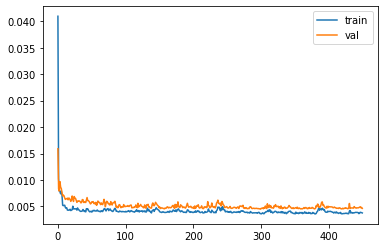

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12)           48          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
dense (Dense)                   (None, 35)           455         batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 35)           0           dense[0][0]                      
______________________________________________________________________________________________

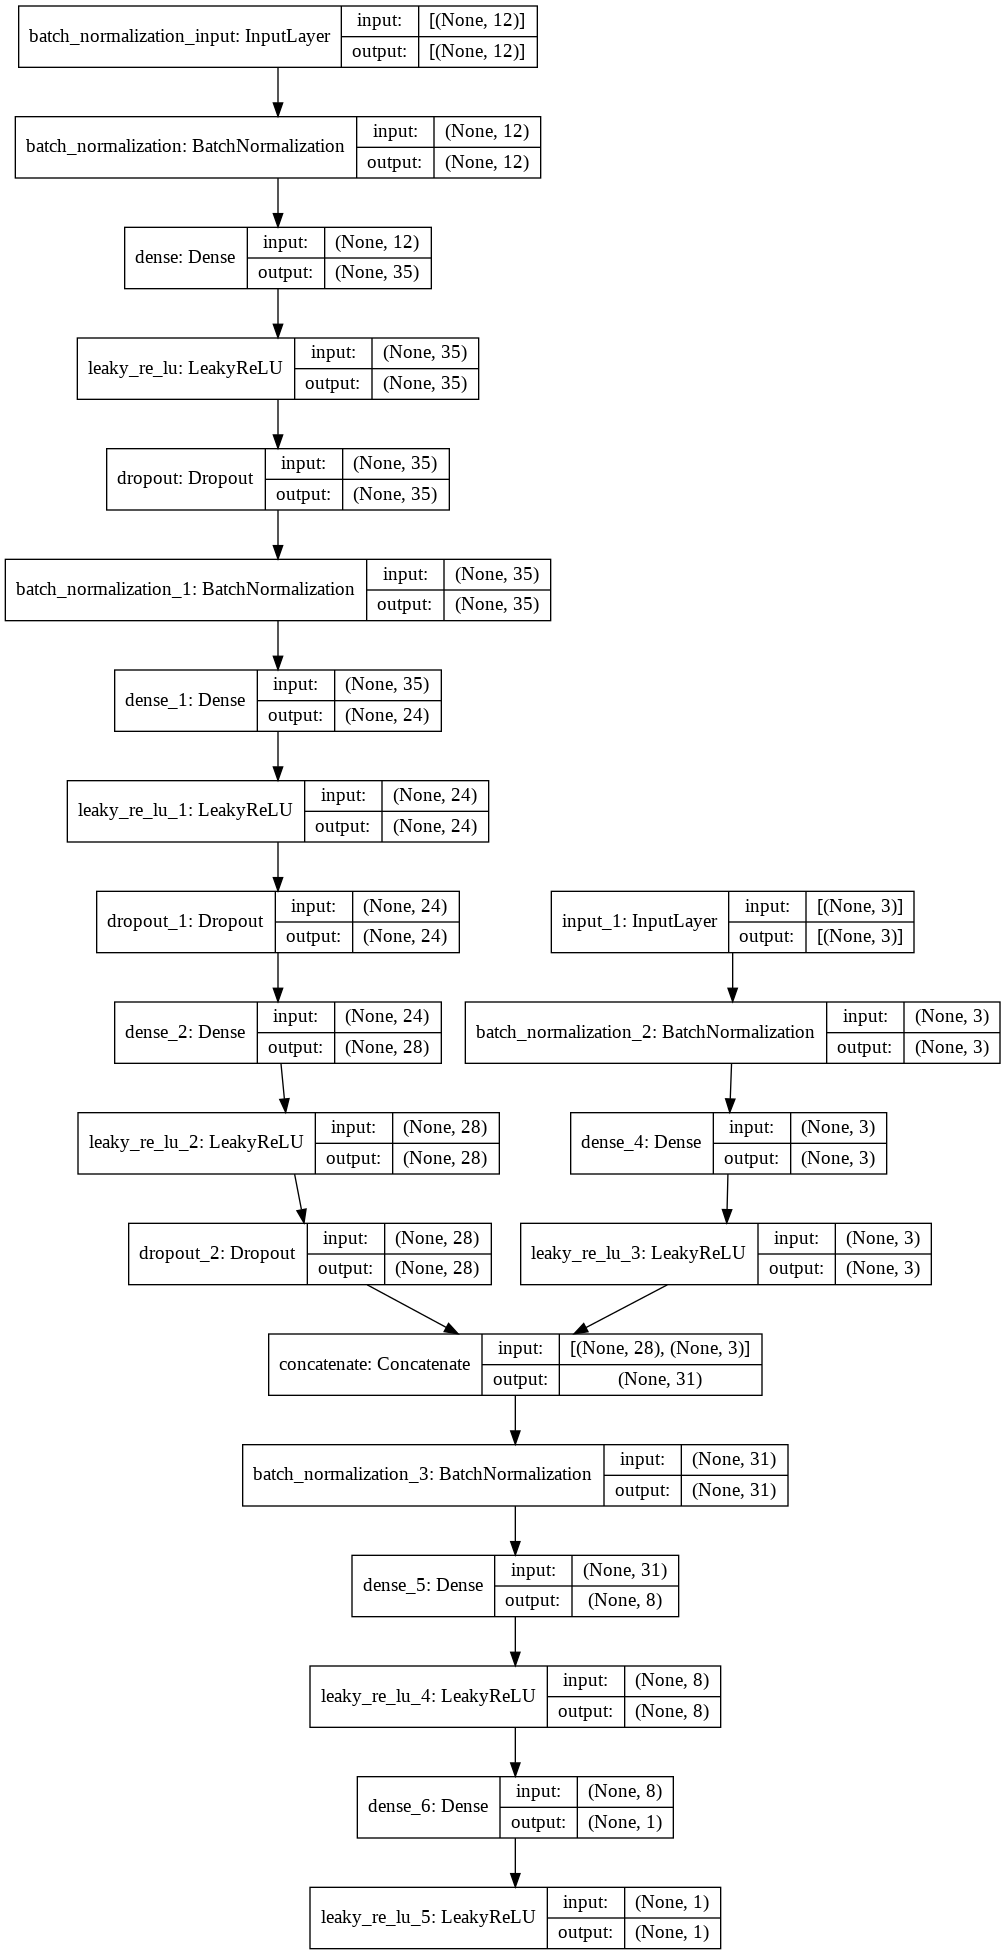

In [ ]:
model_fixed = load_model(precovid_model)
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

for i in range(0,len(model_fixed.layers)):
  model_fixed.layers[i].trainable = False

l1 = Input(shape=(3,))
l1_2 = BatchNormalization()(l1)
l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)
if best_params2['two_layer'] ==1 :
      l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_3])
else :
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])
merged2 = BatchNormalization()(merged)

if best_params2['last_layer'] ==0:
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

if best_params2['last_layer'] ==1:
    l5 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
    l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)

opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
model.compile(loss='mse',optimizer=opt)
fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training_CO_aftercovid.ckpt" 
fnn_f = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=int(best_params2['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

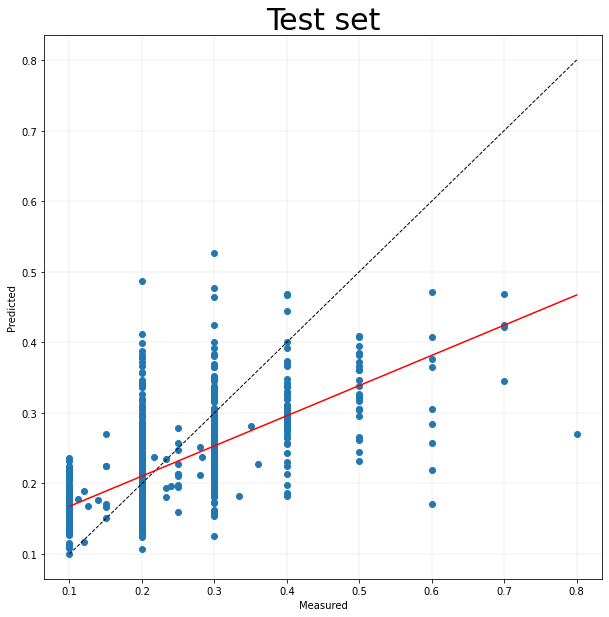

[0.42761824 0.12493499]
RMSE
[0.06297126]
R2
0.42194653306663965


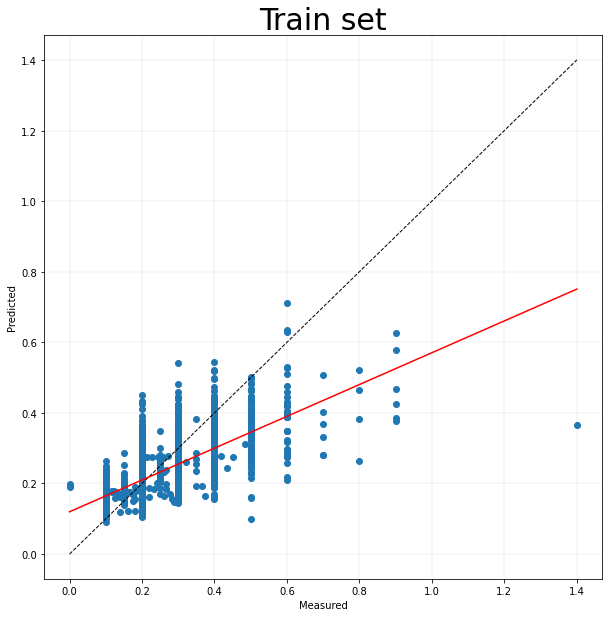

[0.45061179 0.11989867]
RMSE
[0.06110412]
R2
0.47311888956403503


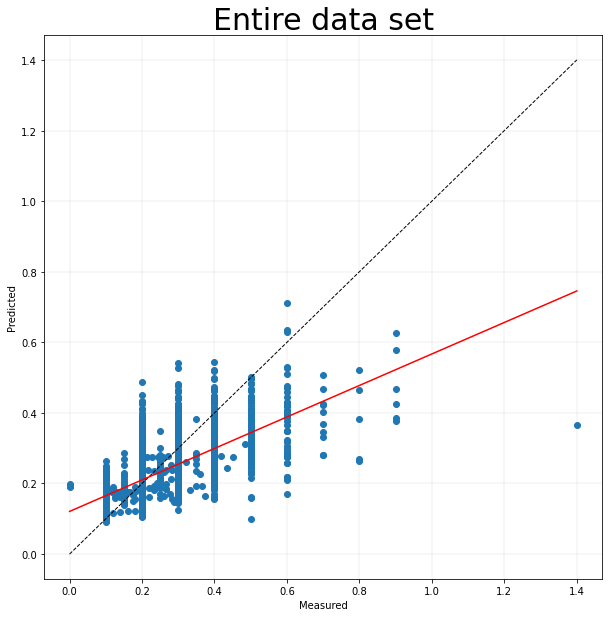

[0.4461315  0.12088052]
RMSE
[0.06148209]
R2
0.4631478722431982


In [ ]:
model.load_weights(fn_f )
model.save('gdrive/My Drive/Colab Notebooks/Model_Edmonton_east_after_Covid.h5')
preds = model.predict([X_test_a,X_test_b]) 
y_real = y_test_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn_f)
preds = model.predict([X_train_a,X_train_b]) 
y_real_t = y_train_a.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn_f)
preds = model.predict([X_a,X_b]) 
y_real_to = Y_a.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

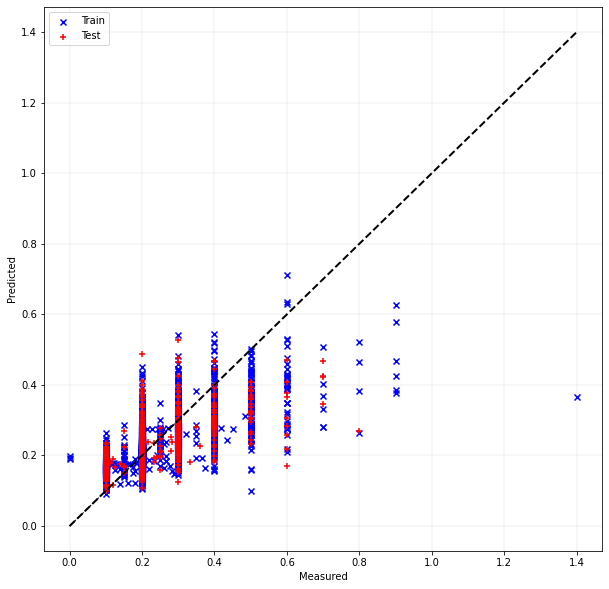

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.3], [0,0.3], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
df2_w_c

CO(ppm)  T( C)  RH(%)  ...  driving  transit  walking
Date                                        ...                           
2020-01-13 00:00:00      0.1  -25.4   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 01:00:00      0.1  -25.7   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 02:00:00      0.1  -25.8   66.0  ...   1.0000   1.0000   1.0000
2020-01-13 03:00:00      0.1  -25.8   65.0  ...   1.0000   1.0000   1.0000
2020-01-13 04:00:00      0.1  -26.0   65.0  ...   1.0000   1.0000   1.0000
...                      ...    ...    ...  ...      ...      ...      ...
2021-01-31 19:00:00      0.4  -15.5   76.0  ...   0.7143   0.4266   0.8011
2021-01-31 20:00:00      0.4  -15.4   78.0  ...   0.7143   0.4266   0.8011
2021-01-31 21:00:00      0.2  -15.5   79.0  ...   0.7143   0.4266   0.8011
2021-01-31 22:00:00      0.2  -16.3   80.0  ...   0.7143   0.4266   0.8011
2021-01-31 23:00:00      0.2  -16.7   81.0  ...   0.7143   0.4266   0.8011

[9075 rows x 16 columns]

In [ ]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

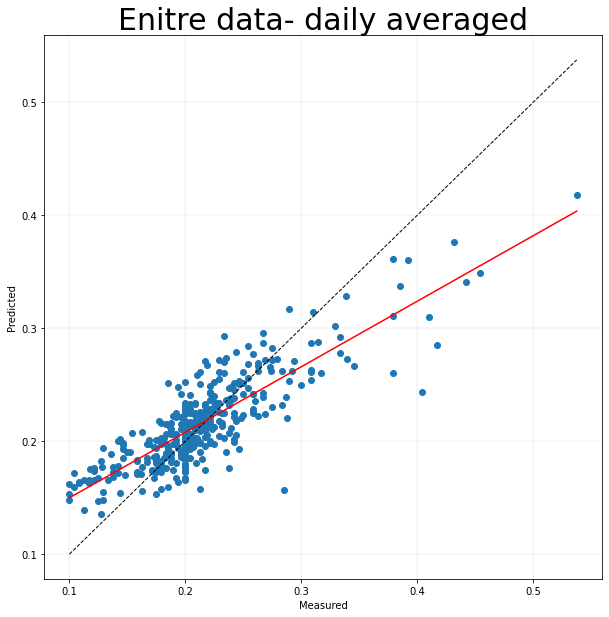

[0.57997188 0.09186987]
RMSE
[0.03240749]
R2
0.6798581783938966


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['CO(ppm)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


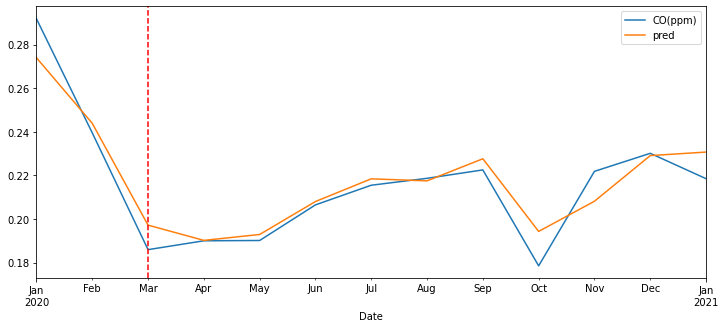

In [ ]:
df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df3_w_c = df2_w_c.copy()
df3_w_c['driving'] = 1.124019
df3_w_c['transit']  = 1.025378
df3_w_c['walking'] = 1.331329

In [ ]:
Y_a = df3_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df3_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df3_w_c[ ['driving', 'transit', 'walking']])




X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
# df3= df3.copy()
df44 = df3_w_c.copy()
df44['No lockdown'] = model.predict([X_a,X_b])
df104 = df44.resample('D').mean()
df104.dropna(inplace= True)

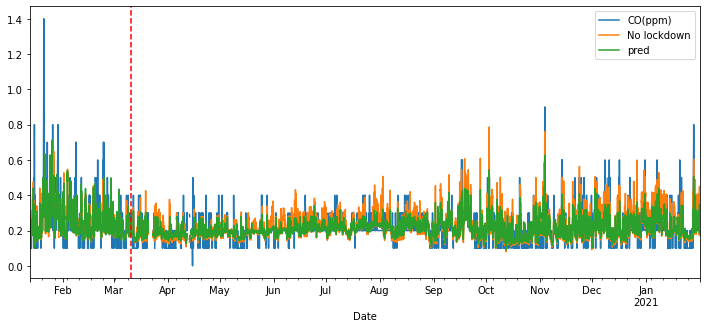

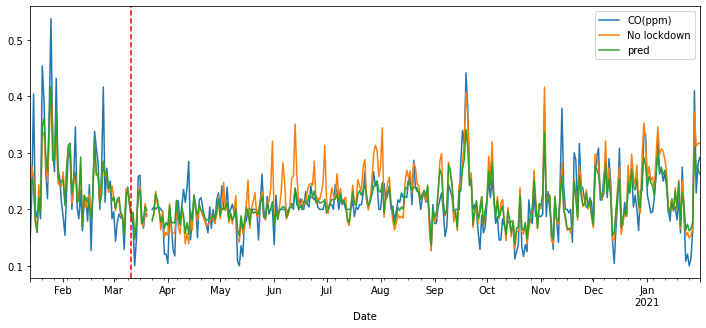

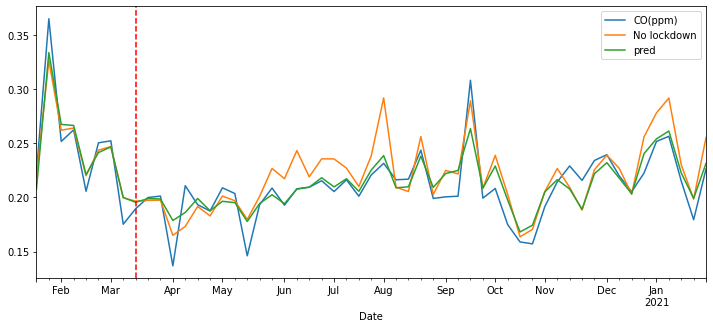

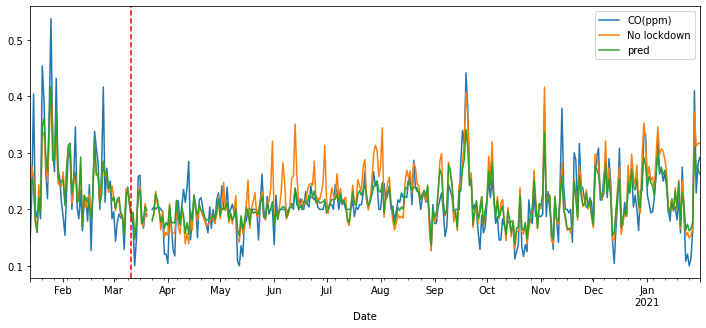

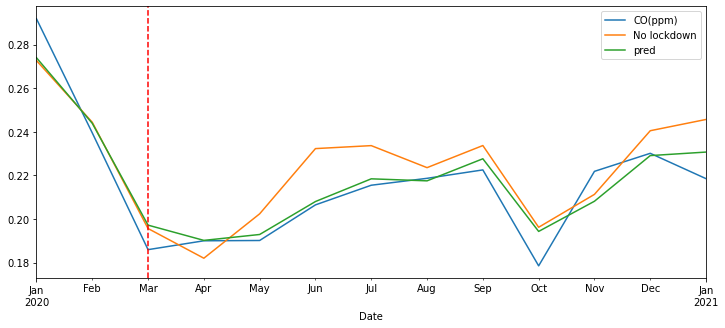

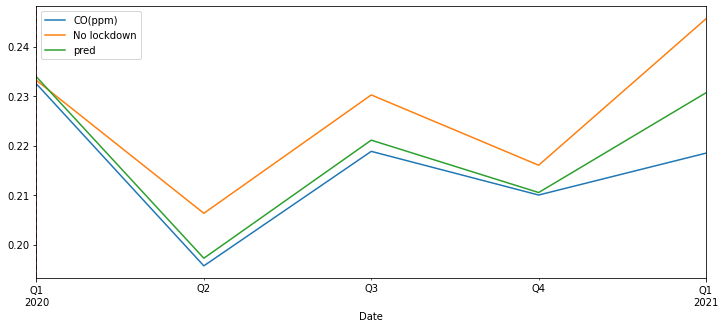

In [ ]:


df4['CO(ppm)'].resample('H').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('H').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('W').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('W').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()
df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('Q').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4['No lockdown']=df44['No lockdown'].copy()
print('No lockdown:',df4['No lockdown'].mean())
print('pred:',df4['pred'].mean())
print('CO(ppm):',df4['CO(ppm)'].mean())

No lockdown: 0.22312191128730774
pred: 0.2163834571838379
CO(ppm): 0.21406886884590973


In [ ]:
df4.head()

CO(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                        ...                                
2020-01-13 00:00:00      0.1  -25.4   68.0  ...      1.0  0.144256     0.140617
2020-01-13 01:00:00      0.1  -25.7   68.0  ...      1.0  0.154986     0.151347
2020-01-13 02:00:00      0.1  -25.8   66.0  ...      1.0  0.158600     0.154960
2020-01-13 03:00:00      0.1  -25.8   65.0  ...      1.0  0.166749     0.168830
2020-01-13 04:00:00      0.1  -26.0   65.0  ...      1.0  0.185634     0.212358

[5 rows x 18 columns]

In [ ]:
df4.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/NOX_mobility_aftercov_Edmonton_east-COVID_hourly_pred.csv')

In [ ]:
df4

NOX(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                         ...                                
2020-01-13 00:00:00    0.0084  -25.4   68.0  ...   1.0000  0.012064     0.011699
2020-01-13 01:00:00    0.0078  -25.7   68.0  ...   1.0000  0.015269     0.014904
2020-01-13 02:00:00    0.0053  -25.8   66.0  ...   1.0000  0.015456     0.015090
2020-01-13 03:00:00    0.0050  -25.8   65.0  ...   1.0000  0.018650     0.018285
2020-01-13 04:00:00    0.0069  -26.0   65.0  ...   1.0000  0.023630     0.023264
...                       ...    ...    ...  ...      ...       ...          ...
2021-01-31 19:00:00    0.1137  -15.5   76.0  ...   0.8011  0.037565     0.041811
2021-01-31 20:00:00    0.1007  -15.4   78.0  ...   0.8011  0.024746     0.028993
2021-01-31 21:00:00    0.0515  -15.5   79.0  ...   0.8011  0.019648     0.023895
2021-01-31 22:00:00    0.0502  -16.3   80.0  ...   0.8011  0.030382     0.034629
2021-01-31 23:00:00    0.0408  -16.7   81.0  ...   0.8011  0.025745     0.029992

[9075 rows x 18 columns]